Notebook for the manuscript: 

*Positive affect modulates memory by regulating the influence of reward prediction errors* (*Communications Psychology*)

In [2]:
# Import the necessary packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import glob as glob
import arviz as az
import pandas as pd
import sys 
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest, proportions_chisquare, proportion_confint, proportion_effectsize
from sklearn.metrics import roc_curve, auc
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
import os
from os.path import join
import arviz as az
import bambi as bmb
import pingouin as pg


from scipy.stats import chi2, ttest_ind, pearsonr, spearmanr, t, norm, zscore, wilcoxon, ranksums, mannwhitneyu
from sklearn import svm
from scipy.ndimage import gaussian_filter
import joblib

from scipy.io import loadmat
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

sys.path.append('/hpc/users/qasims01/resources/ImgRatingSorter/')
from util import dprime
sys.path.append('/hpc/users/qasims01/resources/utils/RLModels_K99/scripts')
from RWModel import RWModel

sns.set_context("paper")

custom_palette = ["#b65975", "#59b675"]
# sns.set_palette(custom_palette)

base_dir = '/sc/arion'
save_dir_plots = f'{base_dir}/projects/guLab/Salman/MemoryBanditManuscript/Figures/Exp1'
save_dir_data = f'{base_dir}/projects/guLab/Salman/MemoryBanditManuscript/Data/Exp1'

In [3]:
# Setting float precision in pytensor
import pytensor  # Graph-based tensor library

pytensor.config.floatX = "float32"

from jax.config import config

import numpyro

numpyro.set_host_device_count(4)

config.update("jax_enable_x64", False)

/tmp/ipykernel_211298/138093872.py:6: DeprecationWarning: Accessing jax.config via the jax.config submodule is deprecated.
  from jax.config import config


In [4]:
import time, sys
from IPython.display import clear_output

def update_progress(progress):
    bar_length = 20
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
    if progress < 0:
        progress = 0
    if progress >= 1:
        progress = 1

    block = int(round(bar_length * progress))

    clear_output(wait = True)
    text = "Progress: [{0}] {1:.1f}%".format( "#" * block + "-" * (bar_length - block), progress * 100)
    print(text)

In [5]:
# def compare_corr(xy, ab, n, n2 = None, twotailed=True):
#     """
#     Calculates the statistic significance between two independent correlation coefficients
#     @param xy: correlation coefficient between x and y
#     @param xz: correlation coefficient between a and b
#     @param n: number of elements in xy
#     @param n2: number of elements in ab (if distinct from n)
#     @param twotailed: whether to calculate a one or two tailed test, only works for 'fisher' method
#     @param conf_level: confidence level, only works for 'zou' method
#     @param method: defines the method uses, 'fisher' or 'zou'
#     @return: z and p-val
#     """

#     xy_z = 0.5 * np.log((1 + xy)/(1 - xy))
#     ab_z = 0.5 * np.log((1 + ab)/(1 - ab))
#     if n2 is None:
#         n2 = n

#     se_diff_r = np.sqrt(1/(n - 3) + 1/(n2 - 3))
#     diff = xy_z - ab_z
#     z = abs(diff / se_diff_r)
#     p = (1 - norm.cdf(z))
#     if twotailed:
#         p *= 2

#     return z, p

In [6]:
# import arviz as az
# import bambi as bmb
# import argparse
# from os.path import join
# import pandas as pd
# from pandas.api.types import CategoricalDtype
# import numpy as np
# import matplotlib.pyplot as plt 

# # import pymc3 as pm
# # import pymc3.sampling_jax
# # import theano

# def run_model(df, y=None, X=None, Intx=None, rand_effect=None, rand_slopes=False, within_subject_X=None,
#               within_subject_Intx=None, priors=None, categorical=None,
#               cores=2, chains=2, tune=1500, draws=2000, target_accept=0.9, model_fam='bernoulli', 
#               output_dir='/home1/salman.qasim/Salman_Project/FR_Emotion/BayesModels', return_model=False,
#               categorical_baseline=True, save_model_res = True, label=None, print_latex=False):
#     """
#     Run the model: 
    
#     Parameters
#     ----------
#     df: pandas dataframe 
#         All the variables 
#     y: str
#         Name of the dependent variable
#     X: list of strings 
#         Names of the independent variables 
#     Intx: list of strings
#         Names of the interactions, formatted as 'a:b' 
#     rand_effect: str
#         Name of variable for random effects (i.e. 'subject') 
#     rand_slopes: bool 
#         Should we fit random slopes in addition to random intercepts? 
#     priors: dict 
#         Prior distribution for any independent variables (i.e. Intercept, random intercept) 
#         Default to weakly informative priors (Gelman et al. 2008) 
#     categorical: list of strings 
#         Names of categorical variables going into model 
    
#     Returns
#     -------
#     results: model
    
    
#     y = 'memory_outcome'
#     X = ['sds_score', 'zrpe', 'zpm', 'gamble_rt_log', 'recog_rt_log', 'img_cat', 'age', 'Sex', 'alpha_pos', 'alpha_neg', 'beta']
#     Intx = ['sds_score:zrpe', 'sds_score:zpm']
#     rand_effect = ['participant']
#     categorical = ['img_cat', 'Sex']

#     # Drop nan data
#     model_df = model_df.dropna(subset=X)

#     model, results = run_model(model_df, y=y, X=X, Intx=Intx, rand_effect=rand_effect, rand_slopes=False, 
#                                priors=None, categorical=categorical, cores=4, chains=4, tune=1500, draws=2000, 
#                                target_accept=0.9, model_fam='bernoulli', 
#                                output_dir='/sc/arion/projects/guLab/Salman/MemoryBanditManuscript/', 
#                                return_model=True,
#                                categorical_baseline=True, 
#                                save_model_res = True, 
#                                label=None)
    
#     """

    
#     # if no label provided, make your own
#     if not label: 
#         label = (f"{y}" + "_{}"*len(X)).format(*X)
        
    
#     if categorical_baseline: # this means we set a baseline for categorical effects 
#         # format random effects properly 
#         rand_term = [f'(1|{x})' for x in rand_effect]
#         if rand_slopes: # do we want a more complex mixed-effects model with random slopes as well as intercepts?
#             if not within_subject_X:
#                 raise ValueError('No within subject variable specified')
#             if not Intx:
#                 formula = f'{y} ~ 1+'+'+'.join(rand_term)+'+'+'+'.join(X)+'+'+'+'.join([f'({x}|{rand_effect[0]})' for x in within_subject_X])
#             elif not within_subject_Intx:
#                 formula = f'{y} ~ 1+'+'+'.join(rand_term)+'+'+'+'.join(X)+'+'+'+'.join([f'({x}|{rand_effect[0]})' for x in within_subject_X])+'+'+'+'.join(Intx)
#             else:
#                 formula = f'{y} ~ 1+'+'+'.join(rand_term)+'+'+'+'.join(X)+'+'+'+'.join([f'({x}|{rand_effect[0]})' for x in within_subject_X])+'+'+'+'.join(Intx)+'+'+'+'.join([f'({intx}|{rand_effect[0]})' for intx in within_subject_Intx])
#         else:
#             if not Intx: 
#                 formula = f'{y} ~ 1+'+'+'.join(rand_term)+'+'+'+'.join(X)
#             else:
#                 formula = f'{y} ~ 1+'+'+'.join(rand_term)+'+'+'+'.join(X)+'+'+'+'.join(Intx)
#     else: # this means all levels of categorical effect are judged absent or present 
#          # format random effects properly 
#         rand_term = [f'(0+1|{x})' for x in rand_effect]
#         if rand_slopes: 
#             formula = f'{y} ~ 0+'+'+'.join(rand_term)+'+'+'+'.join(X)+'+'+'+'.join([f'(0 + {x}|{rand_effect[0]})' for x in X])+'+'+'+'.join(Intx)+'+'+'+'.join([f'(0 + {intx}|{rand_effect[0]})' for intx in Intx])
#         else:
#             if not Intx:
#                 formula = f'{y} ~ 0+'+'+'.join(rand_term)+'+'+'+'.join(X)
#             else:
#                 formula = f'{y} ~ 0+'+'+'.join(rand_term)+'+'+'+'.join(X)+'+'+'+'.join(Intx)        

#     print(formula)
#     # construct the model 
#     model = bmb.Model(formula=formula, 
#                   data=df[rand_effect + [y] + X],
#                  family=model_fam,
#                  priors=priors,
#                  categorical=categorical)
    
#     # Future steps for speedup:
    
# #     if jax: 
# #         model.build() # before fitting using bambi get pymc backend model 
# #         results =  model.backend.model.sampling_jax.sample_numpyro_nuts(draws, tune=tune, target_accept=target_accept)
# #     else:

#     # fit the model 
#     results=model.fit(cores=cores, 
#                           chains=chains, 
#                           tune=tune, 
#                           draws=draws, 
#                           target_accept=target_accept, idata_kwargs={"log_likelihood": True})

#     # save out the CSV with the results 
#     summary = az.summary(results, hdi_prob=0.95)
#     for var in summary.index.values:
#         if var.endswith("]"):  # skip individual subject parameters
#             continue
#         if var.startswith("1"):  # skip random effects.
#             continue
#         summary.loc[var, "P>0"] = np.mean(results.posterior[var].values > 0)
#     summary.to_csv(join(output_dir , f"{label}_summary.csv"))

#     # save out the HDI plot of all the fixed effects 
#     axes = az.plot_forest(results,
#                            kind='ridgeplot',
#                            var_names=[f'^{x}' for x in X],
#                            filter_vars="regex",
#                            colors='black',
#                            combined=True,
#                            hdi_prob=0.95,
#                            figsize=(9, 7))
#     plt.vlines(0, plt.ylim()[0], plt.ylim()[1], color = 'black')
#     # forestplot
# #         plt.xlim([-0.2, 0.1])

#     plt.savefig(join(output_dir, f'{label}_HDIplot.pdf'), dpi=300)
#     plt.close()

#     # print out the latex table for the cell output
#     results_df = summary.loc[:,
#                    ['mean', 'sd', 'hdi_2.5%', 'hdi_97.5%']
#                   ]
#     all_tests = [] 

#     for x in X: 
#         temp = results_df.filter(like=f'{x}', axis=0)
#         all_tests.append(temp)

#     results_df = pd.concat(all_tests)

#     if print_latex:
#         c_string = '|c'*results_df.shape[0] + '|'
#         print(results_df.reset_index().to_latex(index=False, 
#                                                 column_format=c_string).replace("\\\n", "\\ \hline\n"))  

#     if save_model_res:
#         # save out the model for model comparison (THIS WILL BE GB-sized, so really only needed for model comparison)
#         az.to_netcdf(results, join(output_dir , f"{label}_model"))
    
#     if return_model:
#         return model, results 

In [7]:
def run_model(df, y=None, X=None, Intx=None, rand_effect=None, rand_slopes_group=None, rand_slopes_predictor=None, rand_intx=False,
              priors=None, categorical=None, cores=2, chains=2, tune=1500, draws=2000, target_accept=0.95, model_fam='bernoulli', 
              output_dir='/sc/arion/work/qasims01/MemoryBanditData/EMU/BayesModels', return_model=False,
              categorical_baseline=True, save_model_res = True, label=None):
    """
    Run the model: 
    
    Parameters
    ----------
    df: pandas dataframe 
        All the variables 
    y: str
        Name of the dependent variable
    X: list of strings 
        Names of the independent variables 
    Intx: list of strings
        Names of the interactions, formatted as 'a:b' 
    rand_effect: str
        Name of variable for random effects (i.e. 'subject') 
    rand_slopes: bool 
        Should we fit random slopes in addition to random intercepts? 
    priors: dict 
        Prior distribution for any independent variables (i.e. Intercept, random intercept) 
        Default to weakly informative priors (Gelman et al. 2008) 
    categorical: list of strings 
        Names of categorical variables going into model 
    
    Returns
    -------
    results: model
    
    """

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # if no label provided, make your own
    if not label: 
        label = (f"{y}" + "_{}"*len(X)).format(*X)
    
    if rand_effect is not None:
        # mixed/hierarchial/multilevel modeling:
        if categorical_baseline: # this means we set a baseline for categorical effects 
            rand_term = [f'(1|{x})' for x in rand_effect]
            if rand_slopes_group is not None: # do we want a more complex mixed-effects model with random slopes as well as intercepts?
                rand_slope_terms = [f'(1+'+'+'.join(rand_slopes_predictor)+f'|{b})' for b in rand_slopes_group]
                # [f'({a}|{b})' for a in rand_slopes_predictor for b in rand_slopes_group]
                if not Intx:
                    formula = f'{y} ~ 1+'+'+'.join(rand_term)+'+'+'+'.join(X)+'+'+'+'.join(rand_slope_terms)
                else:
                    if rand_intx:
                        rand_slope_terms_Intx = [f'(1+'+'+'.join(Intx)+f'|{b})' for b in rand_slopes_group]
                        formula = f'{y} ~ 1+'+'+'.join(rand_term)+'+'+'+'.join(X)+'+'+'+'.join(rand_slope_terms)+'+'+'+'.join(Intx)+'+'+'+'.join(rand_slope_terms_Intx)
                    else:
                        formula = f'{y} ~ 1+'+'+'.join(rand_term)+'+'+'+'.join(X)+'+'+'+'.join(rand_slope_terms)+'+'+'+'.join(Intx)
            else:
                if not Intx: 
                    formula = f'{y} ~ 1+'+'+'.join(rand_term)+'+'+'+'.join(X)
                else:
                    formula = f'{y} ~ 1+'+'+'.join(rand_term)+'+'+'+'.join(X)+'+'+'+'.join(Intx)
        else: # this means all levels of categorical effect are judged absent or present 
             # format random effects properly 
            rand_term = [f'(0+1|{x})' for x in rand_effect]
            if rand_slopes_group is not None: 
                rand_slope_terms = [f'(0+'+'+'.join(rand_slopes_predictor)+f'|{b})' for b in rand_slopes_group]
                if not Intx:
                    formula = f'{y} ~ 0+'+'+'.join(rand_term)+'+'+'+'.join(X)+'+'+'+'.join(rand_slope_terms)
                else:
                    rand_slope_terms_Intx = [f'(0+'+'+'.join(Intx)+f'|{b})' for b in rand_slopes_group]
                    formula = f'{y} ~ 0+'+'+'.join(rand_term)+'+'+'+'.join(X)+'+'+'+'.join(rand_slope_terms)+'+'+'+'.join(Intx)+'+'+'+'.join(rand_slope_terms_Intx)
            else:
                if not Intx:
                    formula = f'{y} ~ 0+'+'+'.join(rand_term)+'+'+'+'.join(X)
                else:
                    formula = f'{y} ~ 0+'+'+'.join(rand_term)+'+'+'+'.join(X)+'+'+'+'.join(Intx)   
        # construct the model 
        model = bmb.Model(formula=formula, 
                  data=df[rand_effect + [y] + X],
                 family=model_fam,
                 priors=priors,
                 categorical=categorical)
        
        
    else:
        if categorical_baseline:
            if not Intx:
                formula = f'{y} ~ 1+'+'+'.join(X)
            else:
                formula = f'{y} ~ 1+'+'+'.join(X)+'+'+'+'.join(Intx)     
        else:
            if not Intx:
                formula = f'{y} ~ 0+'+'+'.join(X)
            else:
                formula = f'{y} ~ 0+'+'+'.join(X)+'+'+'+'.join(Intx)  
        
        # construct the model 
        model = bmb.Model(formula=formula, 
                  data=df[[y] + X],
                 family=model_fam,
                 priors=priors,
                 categorical=categorical)


    
    # fit the model 
    results=model.fit(cores=cores, 
                          chains=chains, 
                          tune=tune, 
                          draws=draws, 
                          target_accept=target_accept,
                         inference_method='nuts_numpyro',
                      idata_kwargs={"log_likelihood": True})
    # ,init="advi+adapt_diag"

    # save out the CSV with the results 
    summary = az.summary(results, hdi_prob=0.95)
    for var in summary.index.values:
        if var.endswith("]"):  # skip individual subject parameters
            continue
        if var.startswith("1"):  # skip random effects.
            continue
        summary.loc[var, "P>0"] = np.mean(results.posterior[var].values > 0)
    summary.to_csv(join(output_dir , f"{label}_summary.csv"))

    # save out the HDI plot of all the fixed effects 
    axes = az.plot_forest(results,
                           kind='ridgeplot',
                           var_names=[f'^{x}' for x in X],
                           filter_vars="regex",
                           colors='black',
                           combined=True,
                           hdi_prob=0.95,
                           figsize=(9, 7))
    plt.vlines(0, plt.ylim()[0], plt.ylim()[1], color = 'black')
    # forestplot
#         plt.xlim([-0.2, 0.1])

    plt.savefig(join(output_dir, f'{label}_HDIplot.pdf'), dpi=300)
    plt.close()

    # print out the latex table for the cell output
    results_df = summary.loc[:,
                   ['mean', 'sd', 'hdi_2.5%', 'hdi_97.5%']
                  ]
    all_tests = [] 

    for x in X: 
        temp = results_df.filter(like=f'{x}', axis=0)
        all_tests.append(temp)

    results_df = pd.concat(all_tests)

    c_string = '|c'*results_df.shape[0] + '|'
    
    if save_model_res:
        # save out the model for model comparison (THIS WILL BE GB-sized, so really only needed for model comparison)
        az.to_netcdf(results, join(output_dir , f"{label}_model"))
    
    if return_model:
        return model, results 

def print_latex_table(fitted_model, X):
    """
    Code for printing the pub-friendly table of model details from model csv table
    """
    summary = az.summary(fitted_model, hdi_prob=0.95)
    
    # print out the latex table for the cell output
    results_df = summary.loc[:,
                   ['mean', 'sd', 'hdi_2.5%', 'hdi_97.5%']
                  ]
    all_tests = [] 
    for x in X: 
        temp = results_df.filter(like=f'{x}', axis=0)
        all_tests.append(temp)

    results_df = pd.concat(all_tests)

    c_string = '|c'*results_df.shape[0] + '|'
    print(results_df.reset_index().to_latex(index=False, 
                                            column_format=c_string).replace("\\\n", "\\ \hline\n"))  
    
def plot_predictions(df, model, fitted_model, X, y='recalled',  
                    save_dir='/home1/salman.qasim/Salman_Project/FR_Emotion/BayesModels'):
    """
    Code for plotting the model predictions 
    """
    
    # sample from posterior-predictive distribution to make in-sample predictions 
    model.predict(fitted_model, kind="pps")
    y_posterior = fitted_model.posterior[f"{y}_mean"].stack(samples=("chain", "draw")).values
    # Select 25% of the values in the posterior, making sure we take values from both chains.
    y_posterior = recall_posterior[:, ::4]

    for x in X:
        save_file = join(save_dir, f'{x}_PredictRecallplot.pdf')
        with PdfPages(save_file) as pdf:
            f, ax = plt.subplots(1, 1, figsize=[3,3], dpi=300)
            for pps in y_posterior.T:
                sns.regplot(data=df, x=x, y=pps, ci=None, scatter=False, line_kws={'alpha':0.1}, color='k')
            sns.regplot(data=df, x=x, y=y_posterior.mean(axis=1), ci=None, scatter=False, color='r')
            pdf.savefig()
            plt.close()

In [8]:
def plot_res(fitted_model, X, ax=None, save_label=None, ): 
    """
    Code for plotting select beta weights in a publication friendly manner from saved csv
    """

    axes = az.plot_forest(fitted_model,
                           kind='ridgeplot',
                           var_names=[f'^(?!.*\|).*{x}.*$' for x in X],
                           filter_vars="regex",
                           colors='gray',
                           combined=True,
                           ridgeplot_overlap=2,
                           ridgeplot_truncate=False,
                           ridgeplot_alpha=0.4,
                           hdi_prob=0.95,
                           figsize=(9, 7),
                           ax=ax)
    # 'forestplot'
    plt.vlines(0, plt.ylim()[0], plt.ylim()[1], color = 'black')
    plt.show()
#     plt.savefig(save_label, dpi=300)
#     plt.close()

In [9]:
def balance(seq):
    """
    https://stats.stackexchange.com/questions/239973/a-general-measure-of-data-set-imbalance
    Compute data set class balance using Shannon entropy divided by log(k) for k classes 
    
    """
    from collections import Counter
    from numpy import log
    
    n = len(seq)
    classes = [(clas,float(count)) for clas,count in Counter(seq).items()]
    k = len(classes)
    
    H = -sum([ (count/n) * log((count/n)) for clas,count in classes]) #shannon entropy
    return H/log(k)

In [10]:
def eq_test(model, regressor=None, equivalence_margin=0.1, alpha=0.05):
    """
    Compute equivalence test for regressor of interest
    """
        
    # Extract regressor info from model object
    beta = model.params[regressor]
    beta_se = model.bse[regressor] 
    regressor_ix = np.where(model.params.keys()==regressor)[0][0]
    lower_bound = model.conf_int().values[regressor_ix][0]
    upper_bound = model.conf_int().values[regressor_ix][1]
    df = model.df_resid

    # Compute one-sided critical values for equivalence bounds
    lower_critical = -equivalence_margin
    upper_critical = equivalence_margin

    # Check if confidence interval falls within equivalence bounds
    equivalent = lower_bound > lower_critical and upper_bound < upper_critical

    # Perform two one-sided hypothesis tests (TOST)
    less_than_critical = beta < lower_critical
    greater_than_critical = beta > upper_critical

    t1 = (beta-equivalence_margin)/ beta_se
    t2 = (equivalence_margin - beta)/ beta_se
    
    # Calculate p-value
    p1 = (1 - scipy.stats.t.cdf(abs(t1), df))
    p2 = (1 - scipy.stats.t.cdf(abs(t2), df))


    return t1, p1, t2, p2

## Load Prolific Data

In [13]:
full_data = pd.read_csv('/sc/arion/work/qasims01/MemoryBanditData/Prolific/ManuscriptData/full_data.csv')
full_data_psych = pd.read_csv('/sc/arion/work/qasims01/MemoryBanditData/Prolific/ManuscriptData/full_data_psych.csv')
model_comparisons = pd.read_csv('/sc/arion/work/qasims01/MemoryBanditData/Prolific/ManuscriptData/model_comparisons.csv')
param_recovery = pd.read_csv('/sc/arion/work/qasims01/MemoryBanditData/Prolific/ManuscriptData/param_recovery.csv')
confusion_mat = pd.read_csv('/sc/arion/work/qasims01/MemoryBanditData/Prolific/ManuscriptData/confusion_mat.csv')



/tmp/ipykernel_211298/2446700141.py:2: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  full_data_psych = pd.read_csv('/sc/arion/work/qasims01/MemoryBanditData/Prolific/ManuscriptData/full_data_psych.csv')


## Extract participant information

In [14]:
num_all_pts = full_data.participant.unique().shape[0]
print(f'There are {num_all_pts} pts total in this study')

There are 206 pts total in this study


In [85]:
full_data.drop_duplicates(subset=['participant'])['Sex'].value_counts()

Female    109
Male       97
Name: Sex, dtype: int64

In [86]:
full_data.drop_duplicates(subset=['participant']).age.std()

14.230803588661711

Reaction Time (Fig. S1B)

/tmp/ipykernel_199683/1783844080.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.regplot(data=full_data.groupby('participant').mean(), x='gamble_rt_log', y='recog_rt_log', order=1, ax=ax[2],


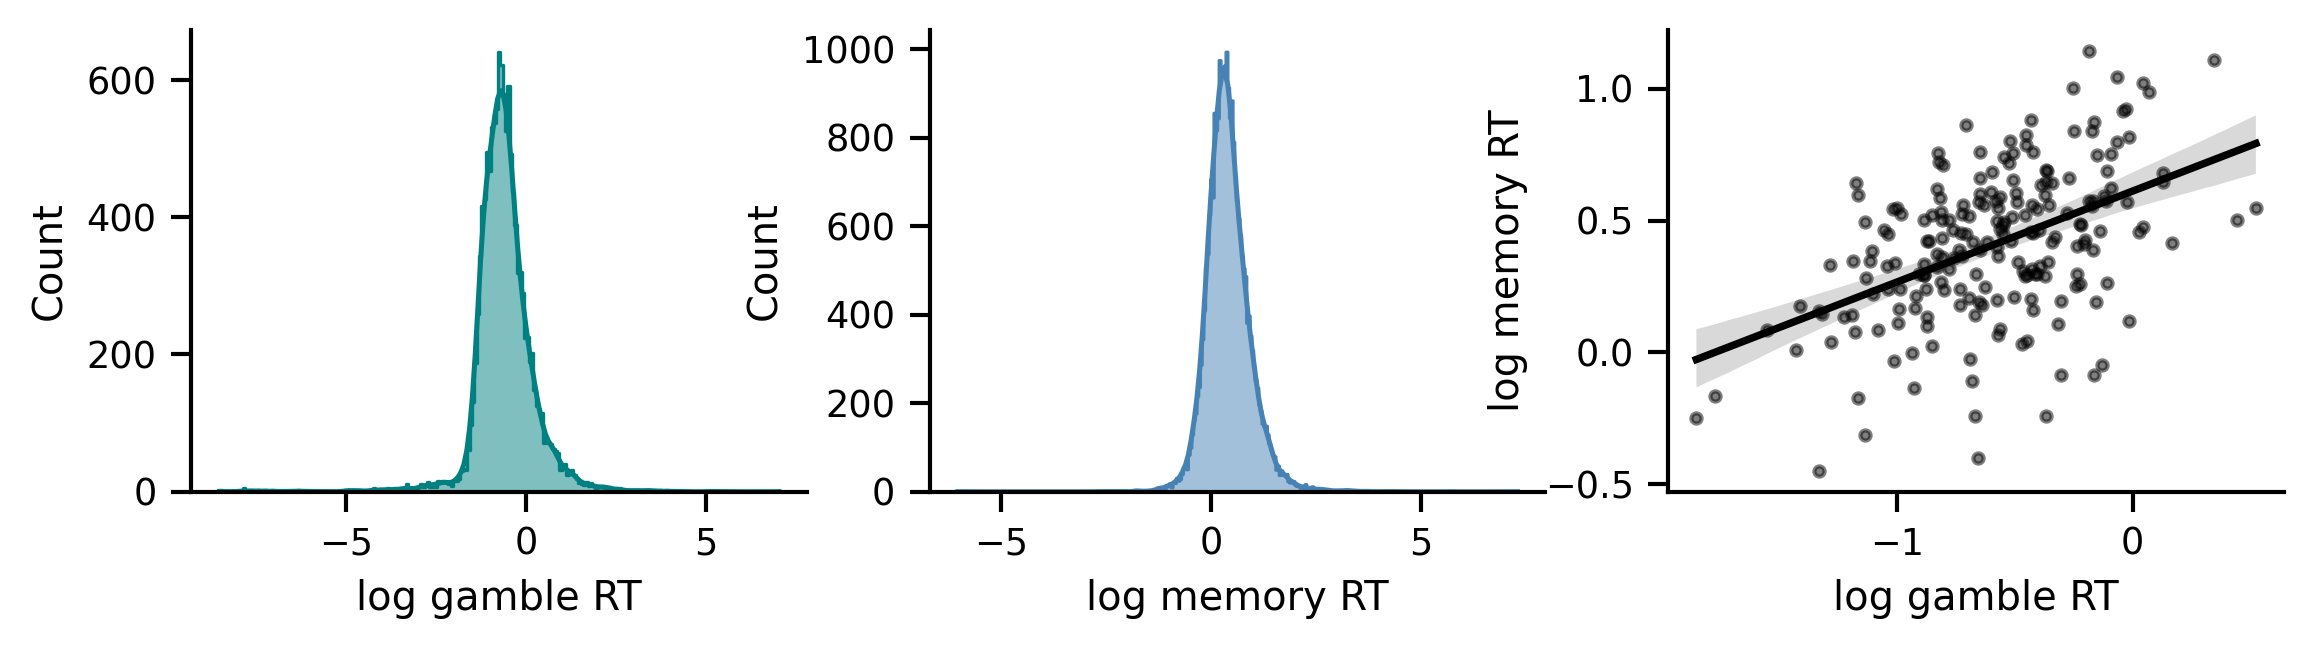

In [581]:

f, ax = plt.subplots(1,3, dpi=300, figsize=(9,2))
sns.histplot(data=full_data, x='gamble_rt_log', ax=ax[0], kde=True, color='teal', element='step', label='gambling')
sns.histplot(data=full_data, x='recog_rt_log', ax=ax[1], kde=True, color='steelblue', element='step', label='memory')
sns.regplot(data=full_data.groupby('participant').mean(), x='gamble_rt_log', y='recog_rt_log', order=1, ax=ax[2], 
            scatter_kws={'s':6, 'alpha':0.5}, color='black')
ax[0].set_xlabel('log gamble RT')
ax[1].set_xlabel('log memory RT')            
ax[2].set_xlabel('log gamble RT')
ax[2].set_ylabel('log memory RT')
sns.despine()




In [585]:
pg.ttest(full_data.groupby('participant').mean().gamble_rt_log, 
         full_data.groupby('participant').mean().recog_rt_log)

/tmp/ipykernel_199683/474158690.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pg.ttest(full_data.groupby('participant').mean().gamble_rt_log,
/tmp/ipykernel_199683/474158690.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  full_data.groupby('participant').mean().recog_rt_log)


T  dof alternative          p-val           CI95%   cohen-d  \
T-test -29.447338  410   two-sided  3.313272e-103  [-1.07, -0.93]  2.901532   

             BF10  power  
T-test  1.593e+99    1.0

In [ ]:
# Compute effect size (Cohen's d)
n1, n2 = len(x), len(y)
pooled_std = sqrt(((n1 - 1) * x.std()**2 + (n2 - 1) * y.std()**2) / (n1 + n2 - 2))
effect_size = (x.mean() - y.mean()) / pooled_std

In [96]:
subj_level_df_mean = full_data.groupby('participant').mean().reset_index()
subj_level_df_mean['num_trials'] = full_data.groupby('participant').count().reset_index().trials_gamble
subj_level_df_mean['points'] = subj_level_df_mean.apply(lambda x: (x.reward * 100 * 60) / 6000, axis=1)

/tmp/ipykernel_199683/2628836122.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subj_level_df_mean = full_data.groupby('participant').mean().reset_index()


Performance (Fig S1A, D)

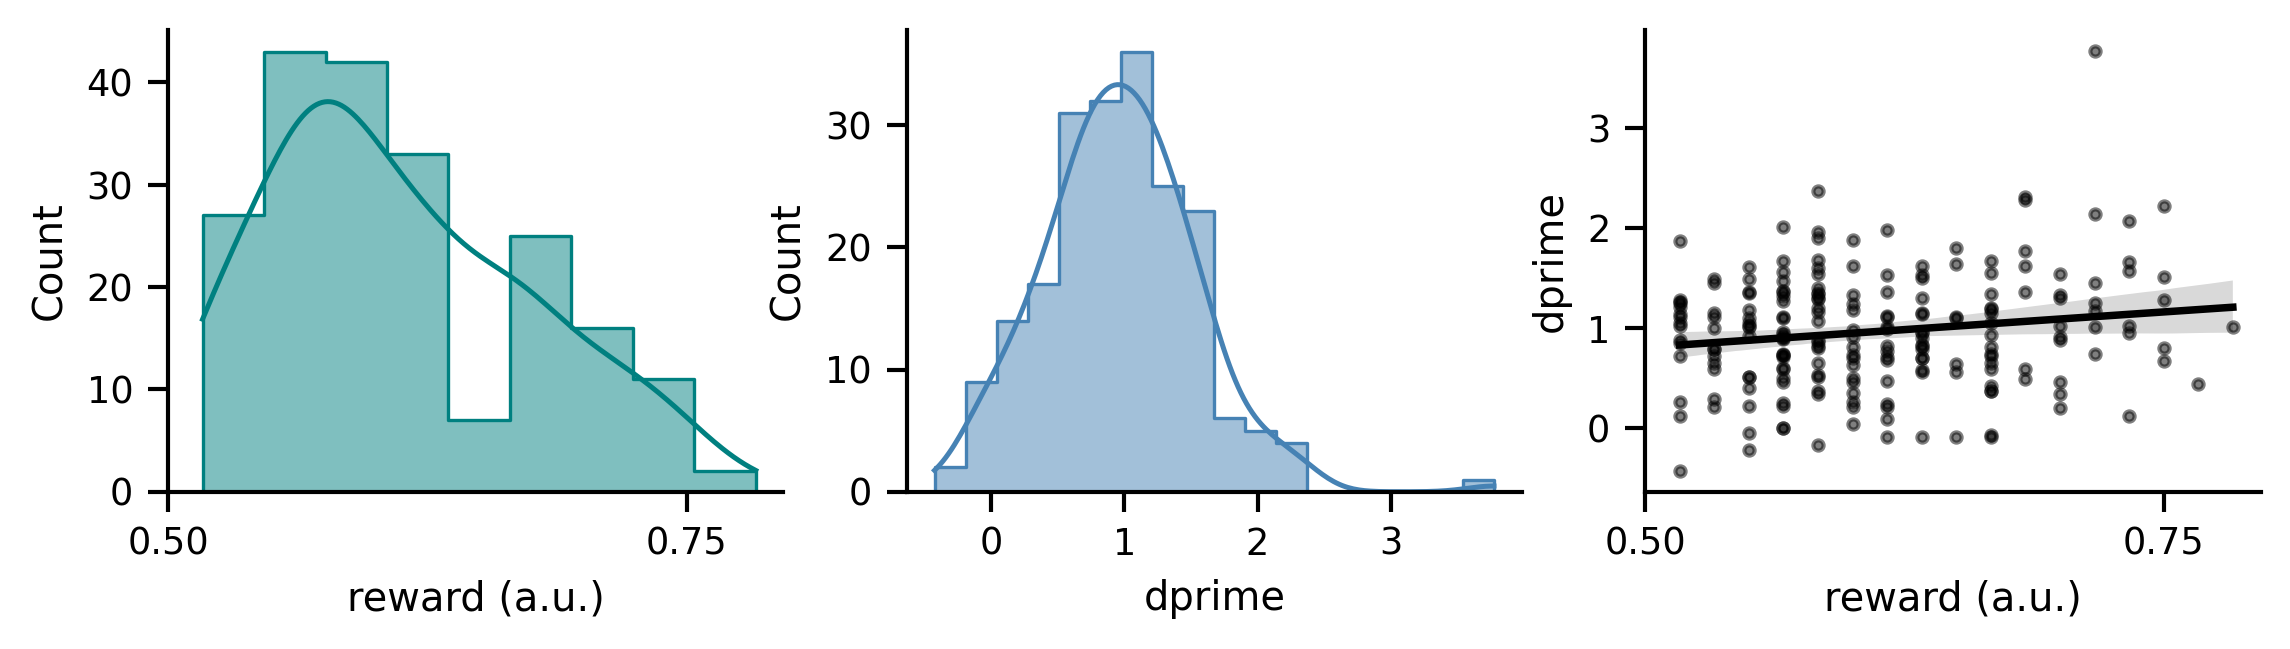

In [102]:
f, ax = plt.subplots(1,3, dpi=300, figsize=(9,2))
sns.histplot(data=subj_level_df_mean, x='points', ax=ax[0], kde=True, color='teal', element='step', label='gambling')
sns.histplot(data=subj_level_df_mean, x='dprime', ax=ax[1], kde=True, color='steelblue', element='step', label='memory')
sns.regplot(data=subj_level_df_mean, x='points', y='dprime', order=1, ax=ax[2], 
            scatter_kws={'s':6, 'alpha':0.5}, color='black')
ax[0].set(xlabel='reward (a.u.)', xticks=[0.5, 0.75])
ax[2].set(xlabel='reward (a.u.)', xticks=[0.5, 0.75])
ax[2].set_ylabel('dprime')
sns.despine()


**Figure 1B**

[Text(0, 0.5, 'p(draw)'), Text(0.5, 0, 'trials (2-arm bandit)')]

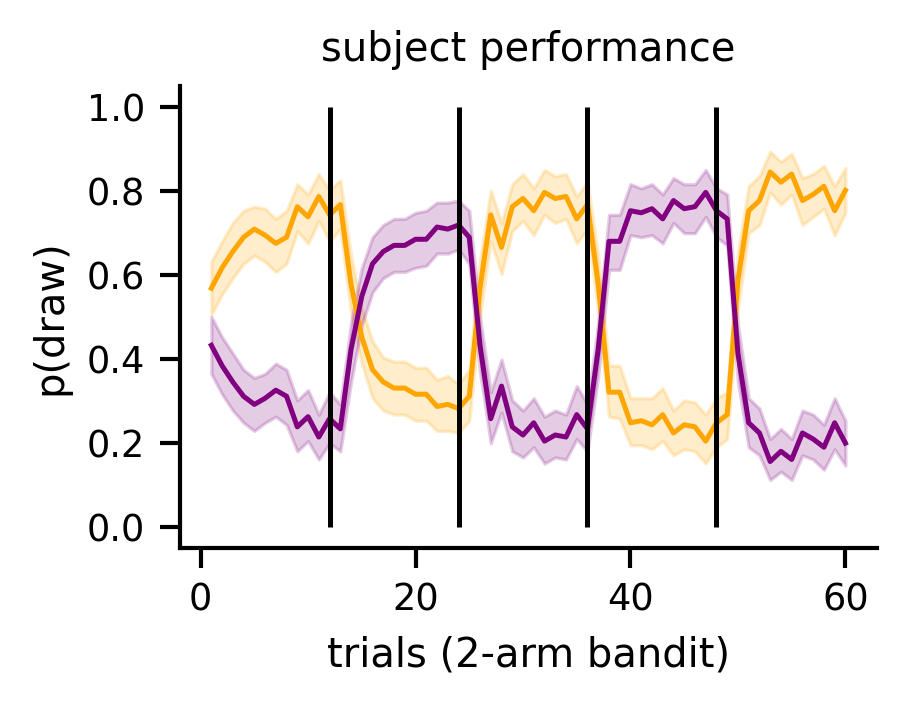

In [107]:
# Plot subject behavior: 
f, ax = plt.subplots(1,1, dpi=300, figsize=(3,2))
sns.despine()
sns.lineplot(data=full_data, x='trials_gamble', y= 'male', color='orange', ax=ax, errorbar=('ci', 95))
sns.lineplot(data=full_data, x='trials_gamble', y= 'female', color='purple', ax=ax, errorbar=('ci', 95))    
plt.vlines([12, 24, 36, 48], 0, 1, color = 'black')
plt.ylabel('p(draw)')
plt.title(f'subject performance')
ax.set(ylabel='p(draw)', xlabel='trials (2-arm bandit)')


**Figure 1C**

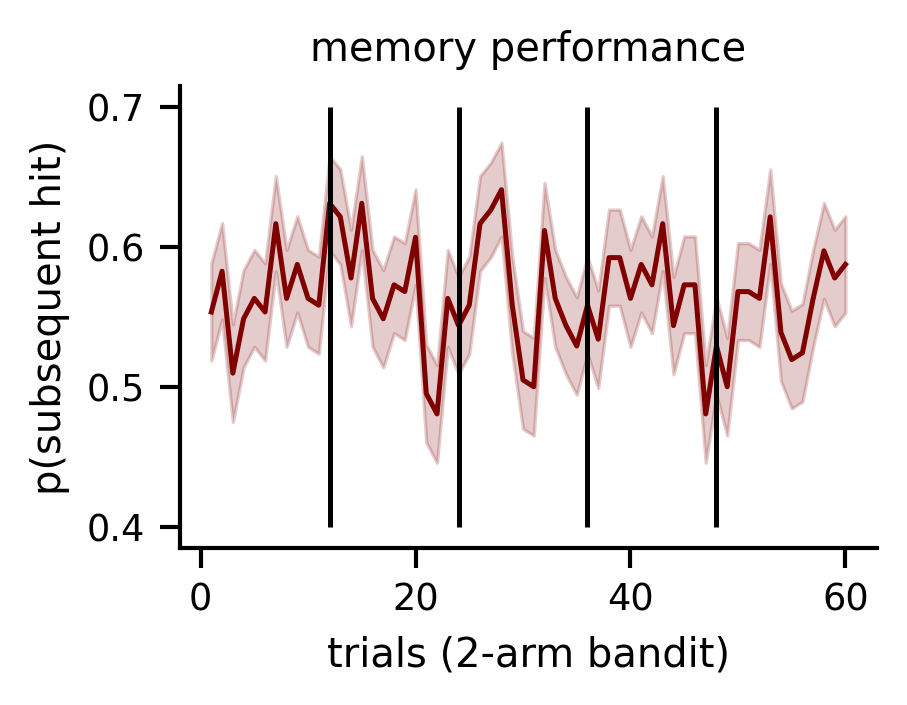

In [109]:
f, ax = plt.subplots(1,1, dpi=300, figsize=(3,2))
sns.lineplot(data=full_data, x='trials_gamble', y='hits', errorbar='se', ax=ax, color='maroon')
plt.vlines([12, 24, 36, 48], 0, 1, color = 'black')
# plt.hlines(0.5, 1, 60, color = 'red')
ax.set(ylabel='p(subsequent hit)', xlabel='trials (2-arm bandit)')
plt.title(f'memory performance')
sns.despine()

**Figure 2A**

/tmp/ipykernel_199683/3228349323.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax = sns.jointplot(data = full_data.groupby('participant').mean(),
/hpc/users/qasims01/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:1832: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


Text(63.54166666666667, 0.5, 'β')

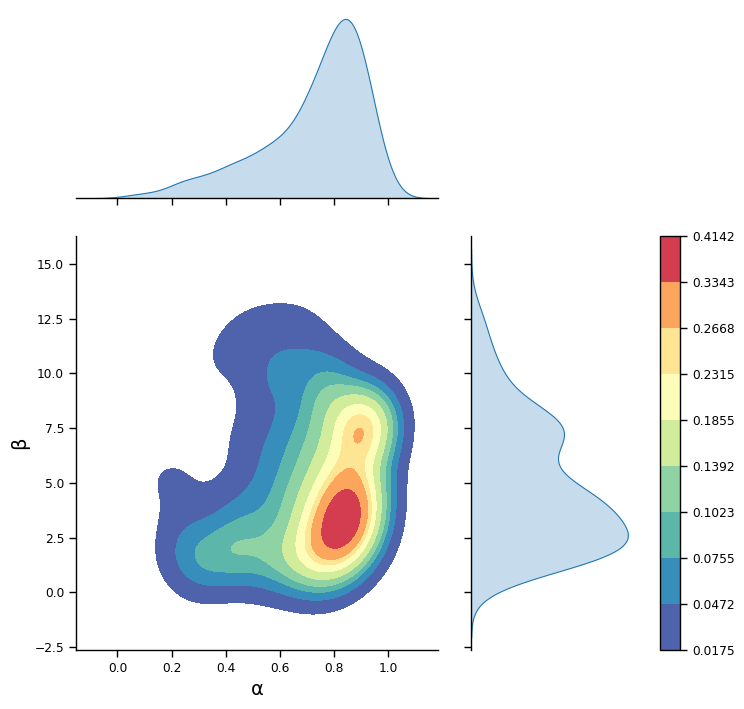

In [110]:
ax = sns.jointplot(data = full_data.groupby('participant').mean(), 
                   x='alpha', y='beta', height=8, ratio=2, kind='kde', shade=True, cmap='Spectral_r', 
                   fill=True, cbar=True)

plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1)
# get the current positions of the joint ax and the ax for the marginal x
pos_joint_ax = ax.ax_joint.get_position()
pos_marg_x_ax = ax.ax_marg_x.get_position()
# reposition the joint ax so it has the same width as the marginal x ax
ax.ax_joint.set_position([pos_joint_ax.x0, pos_joint_ax.y0, pos_marg_x_ax.width, pos_joint_ax.height])
# reposition the colorbar using new x positions and y positions of the joint ax
ax.fig.axes[-1].set_position([.83, pos_joint_ax.y0, .07, pos_joint_ax.height])
ax.ax_joint.set_xlabel(u"\u03B1", fontsize=14)
ax.ax_joint.set_ylabel(u"\u03B2", fontsize=14)

In [38]:
full_data['trials_in_block'] = np.nan
for trial in full_data.trials_gamble.unique():
    if (trial < 13):
        full_data['trials_in_block'][full_data.trials_gamble==trial] = full_data['trials_gamble'][full_data.trials_gamble==trial] 
    if (trial > 13 ) & (trial < 25):
        full_data['trials_in_block'][full_data.trials_gamble==trial] = full_data['trials_gamble'][full_data.trials_gamble==trial] - 13
    elif (trial > 24 ) & (trial < 36):
        full_data['trials_in_block'][full_data.trials_gamble==trial] = full_data['trials_gamble'][full_data.trials_gamble==trial] - 24
    elif (trial > 35 ) & (trial < 49):
        full_data['trials_in_block'][full_data.trials_gamble==trial] = full_data['trials_gamble'][full_data.trials_gamble==trial] - 35
    elif (trial > 48 ):
        full_data['trials_in_block'][full_data.trials_gamble==trial] = full_data['trials_gamble'][full_data.trials_gamble==trial] - 48
    
full_data['correct'] = 0
full_data.loc[((full_data.block==1) | (full_data.block==3) | (full_data.block==5)) & (full_data.male==1), 'correct'] = 1
full_data.loc[((full_data.block==2) | (full_data.block==4)) & (full_data.female==1), 'correct'] = 1



Participants do not sample a very diverse joint parameter space. Here, we split participants into quantiles and contrast the highest quantile with the lowest quantile to assess if reward differences emerge as a function of joint parameter space. 

In [122]:
full_data['alpha_cat'] = pd.qcut(full_data.alpha, q=4, labels=['low', 'lowmed', 'highmed', 'high'])
full_data['beta_cat'] = pd.qcut(full_data.beta, q=4, labels=['low', 'lowmed', 'highmed', 'high'])
full_data['RL_subj_cat'] = np.nan
full_data.loc[(full_data.alpha_cat=='high') & (full_data.beta_cat=='high'), 'RL_subj_cat'] = 'high_params'
full_data.loc[(full_data.alpha_cat=='low') & (full_data.beta_cat=='low'), 'RL_subj_cat'] = 'low_params'

high_subj_df = full_data[(full_data.alpha_cat=='high') & (full_data.beta_cat=='high')]
low_subj_df = full_data[(full_data.alpha_cat=='low') & (full_data.beta_cat=='low')]


**Figure 2B**

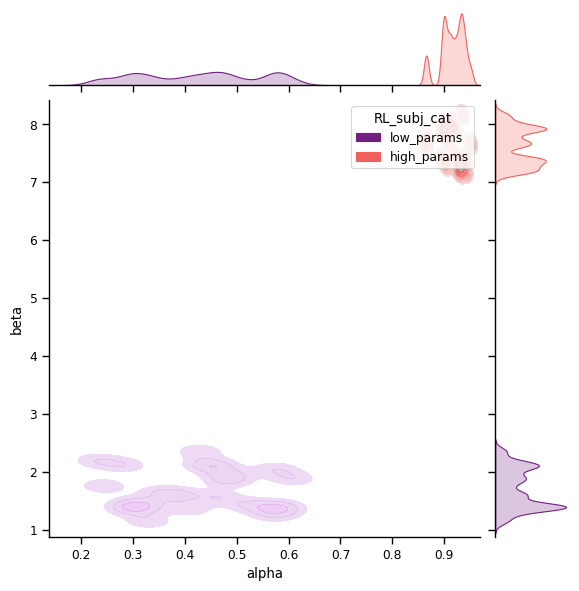

In [124]:
sns.jointplot(x='alpha', y='beta', hue = 'RL_subj_cat', palette='magma',
          data=full_data, kind='kde', fill=True, alpha=0.5)

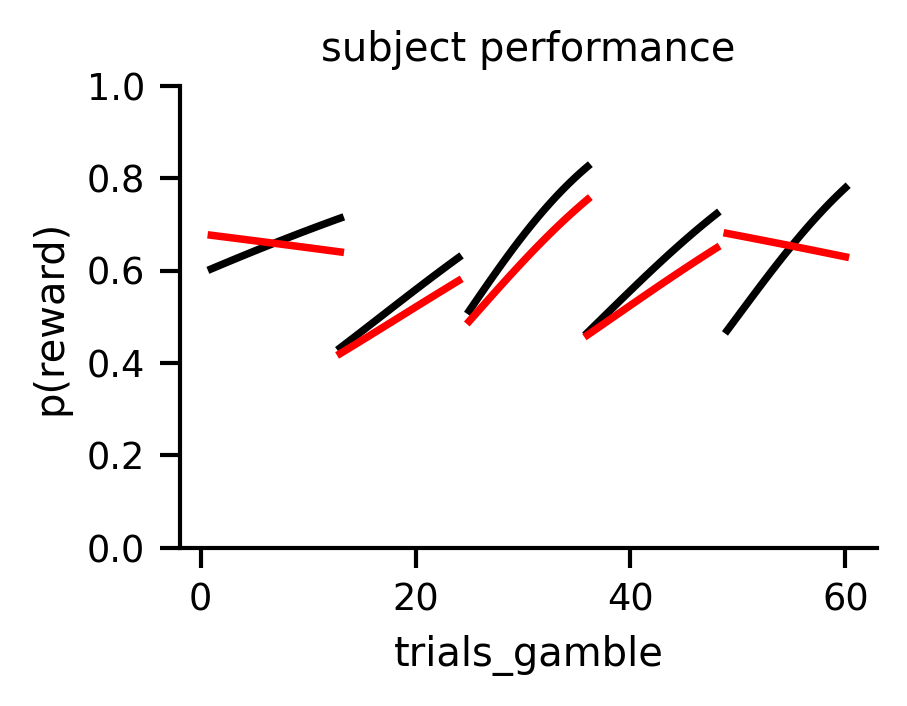

In [127]:

f, ax = plt.subplots(1,1, dpi=300, figsize=(3,2))
for block in high_subj_df.block.unique():
    sns.regplot(data=high_subj_df[(high_subj_df.block==block)], x='trials_gamble', y= 'reward', color='black', ax=ax, logistic=True, ci=None, scatter=False)
    sns.regplot(data=low_subj_df[(low_subj_df.block==block)], x='trials_gamble', y= 'reward', color='red', ax=ax, logistic=True, ci=None, scatter=False)    
# plt.vlines([13, 24, 35, 48], 0, 1, color = 'black')
ax.set(ylim=[0,1])
plt.ylabel('p(reward)')
plt.title(f'subject performance')
sns.despine()


In [676]:
# ttest_ind(high_subj_df[high_subj_df.trials_in_block > 6].reward, 
#           low_subj_df[low_subj_df.trials_in_block > 6].reward)
count_a = high_subj_df[high_subj_df.trials_in_block > 6].reward.sum()
count_b = low_subj_df[low_subj_df.trials_in_block > 6].reward.sum()
nobs_a = high_subj_df[high_subj_df.trials_in_block > 6].reward.shape[0]
nobs_b = low_subj_df[low_subj_df.trials_in_block > 6].reward.shape[0]

z, p = proportions_ztest([count_a, count_b], 
                                    [nobs_a, nobs_b], value=None)


In [679]:
# Compute effect size (Cohen's h)
pooled_prob = (count_a + count_b) / (nobs_a + nobs_b)
effect_size = 2 * np.arcsin(np.sqrt(pooled_prob))  # Cohen's h

# Compute confidence interval for z-statistic
z_critical = stats.norm.ppf(1 - 0.05/2)  # Two-tailed test
standard_error = np.sqrt(count_a/nobs_a + count_b/nobs_b)
ci_low = z - z_critical * standard_error
ci_high = z + z_critical * standard_error

In [682]:
ci_low, ci_high

(-0.2567622692637901, 4.232000746659462)

In [135]:
ttest_ind(high_subj_df[high_subj_df.trials_in_block  > 6].groupby('participant').mean().reward, 
          low_subj_df[low_subj_df.trials_in_block > 6].groupby('participant').mean().reward)


/tmp/ipykernel_199683/1249356907.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ttest_ind(high_subj_df[high_subj_df.trials_in_block  > 6].groupby('participant').mean().reward,
/tmp/ipykernel_199683/1249356907.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  low_subj_df[low_subj_df.trials_in_block > 6].groupby('participant').mean().reward)


Ttest_indResult(statistic=1.53646040095557, pvalue=0.13229879165319963)

/tmp/ipykernel_199683/2897660095.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.stripplot(x=low_subj_df[low_subj_df.trials_in_block > 6].groupby('participant').mean().reset_index().reward,
/tmp/ipykernel_199683/2897660095.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.stripplot(x=high_subj_df[high_subj_df.trials_in_block > 6].groupby('participant').mean().reset_index().reward,


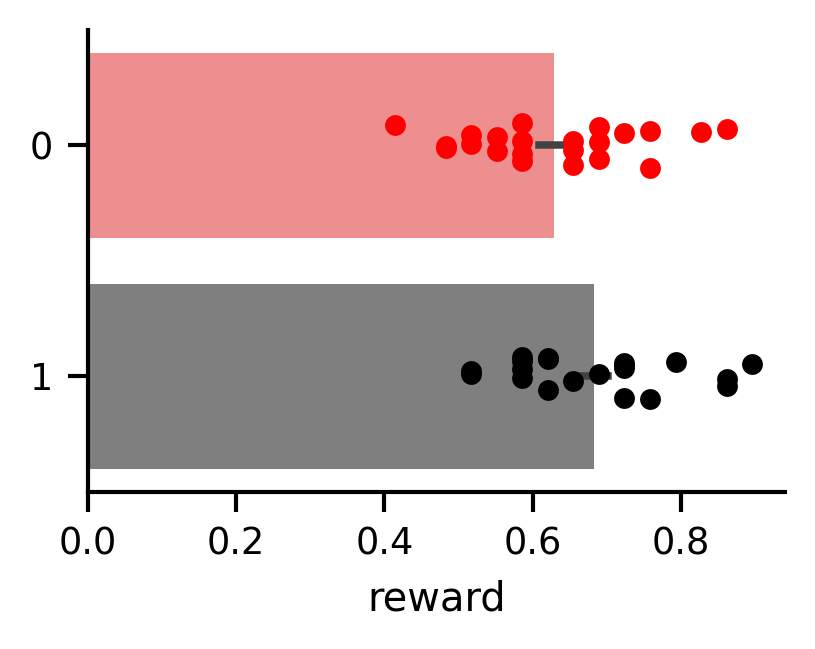

In [136]:
f, ax = plt.subplots(1,1, dpi=300, figsize=(3,2))
sns.barplot(x=low_subj_df[low_subj_df.trials_in_block > 6].reward, y=0, errorbar='se', orient='h', ax=ax, alpha = 0.5, color = 'red')
sns.stripplot(x=low_subj_df[low_subj_df.trials_in_block > 6].groupby('participant').mean().reset_index().reward, 
              y=0, orient='h', ax=ax, color = 'red')

sns.barplot(x=high_subj_df[high_subj_df.trials_in_block > 6].reward, y=1, errorbar='se', orient='h', ax=ax, alpha = 0.5, color = 'black')
sns.stripplot(x=high_subj_df[high_subj_df.trials_in_block > 6].groupby('participant').mean().reset_index().reward, 
              y=1, orient='h', ax=ax, color = 'black')
sns.despine()


In [591]:
# CODE THE VARIABLES: 
# Make a new response variable, memory outcome 
full_data['memory_outcome'] = full_data[['hits', 'misses', 'correct_rejections', 
                                       'false_alarms']].idxmax(1).to_frame('memory_outcome')
full_data['memory_outcome'][full_data['memory_outcome'].isin(['misses', 'false_alarms'])] = 0
full_data['memory_outcome'][full_data['memory_outcome'].isin(['hits', 'correct_rejections'])] = 1
full_data.memory_outcome =full_data.memory_outcome.astype(int)

**Figure S2A**

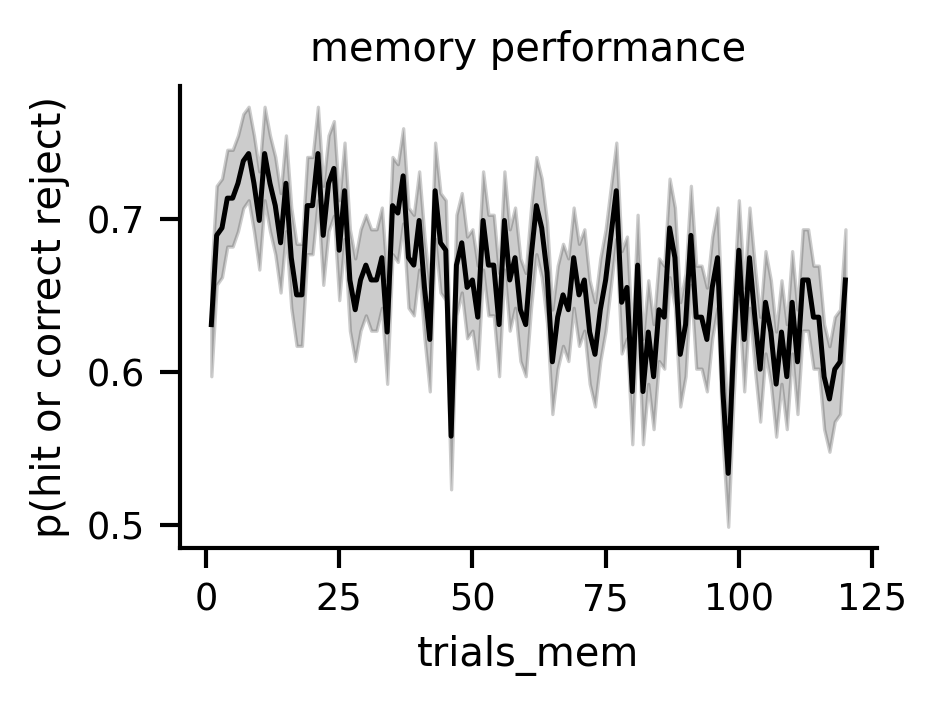

In [139]:

f, ax = plt.subplots(1,1, dpi=300, figsize=(3,2))
sns.lineplot(data=full_data, x='trials_mem', y='memory_outcome', errorbar='se', ax=ax, color='black')
# plt.vlines([12, 24, 36, 48], 0.4, 0.7, color = 'black')
# plt.hlines(0.5, 1, 60, color = 'red')
plt.ylabel('p(hit or correct reject)')
plt.title(f'memory performance')
sns.despine()



**Figure S2B**

/tmp/ipykernel_199683/1295425276.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.stripplot(data=full_data.groupby(['participant', 'image_type']).mean().reset_index(), x='image_type', y='memory_outcome')


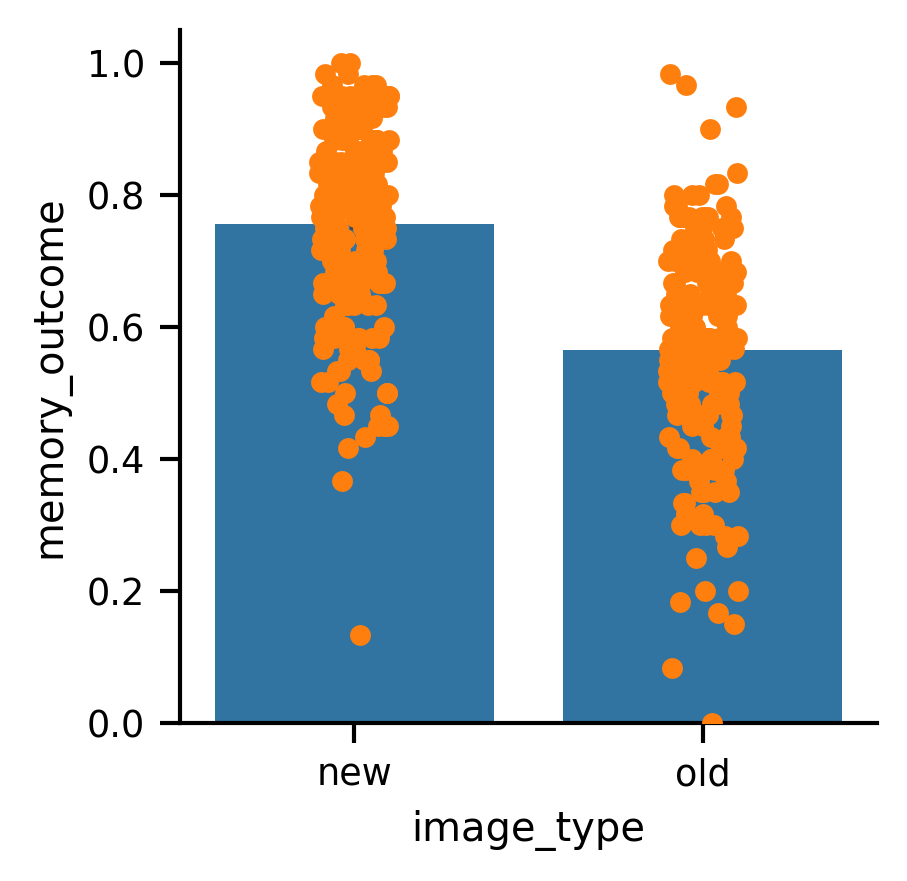

In [160]:
f, ax = plt.subplots(1,1, dpi=300, figsize=(3,3))
sns.barplot(data=full_data, x='image_type', y='memory_outcome', errorbar='se')
sns.stripplot(data=full_data.groupby(['participant', 'image_type']).mean().reset_index(), x='image_type', y='memory_outcome')
sns.despine()


In [592]:
full_data.memory_outcome = full_data.memory_outcome.astype(int)

In [611]:
count_a = np.sum(full_data[full_data.image_type=='new'].memory_outcome)
count_b = np.sum(full_data[full_data.image_type=='old'].memory_outcome)
nobs_a = len(full_data[full_data.image_type=='new'].memory_outcome)
nobs_b = len(full_data[full_data.image_type=='old'].memory_outcome)
z, p = proportions_ztest([count_a, count_b], 
         [nobs_a, nobs_b])

In [602]:
# Compute effect size (Cohen's h)
pooled_prob = (count_a + count_b) / (nobs_a + nobs_b)
effect_size = 2 * np.arcsin(np.sqrt(pooled_prob))  # Cohen's h

# Compute confidence interval for z-statistic
z_critical = stats.norm.ppf(1 - 0.05/2)  # Two-tailed test
standard_error = np.sqrt(count_a/nobs_a + count_b/nobs_b)
ci_low = z - z_critical * standard_error
ci_high = z + z_critical * standard_error

In [613]:
ci_low

29.515376610068557

In [614]:
ci_high

34.02121115919077

**Figure S3A**

/tmp/ipykernel_211298/2962419438.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(ylabel='model', xlabel='win count', yticklabels=['RW', 'Bayesian', 'WSLS'])


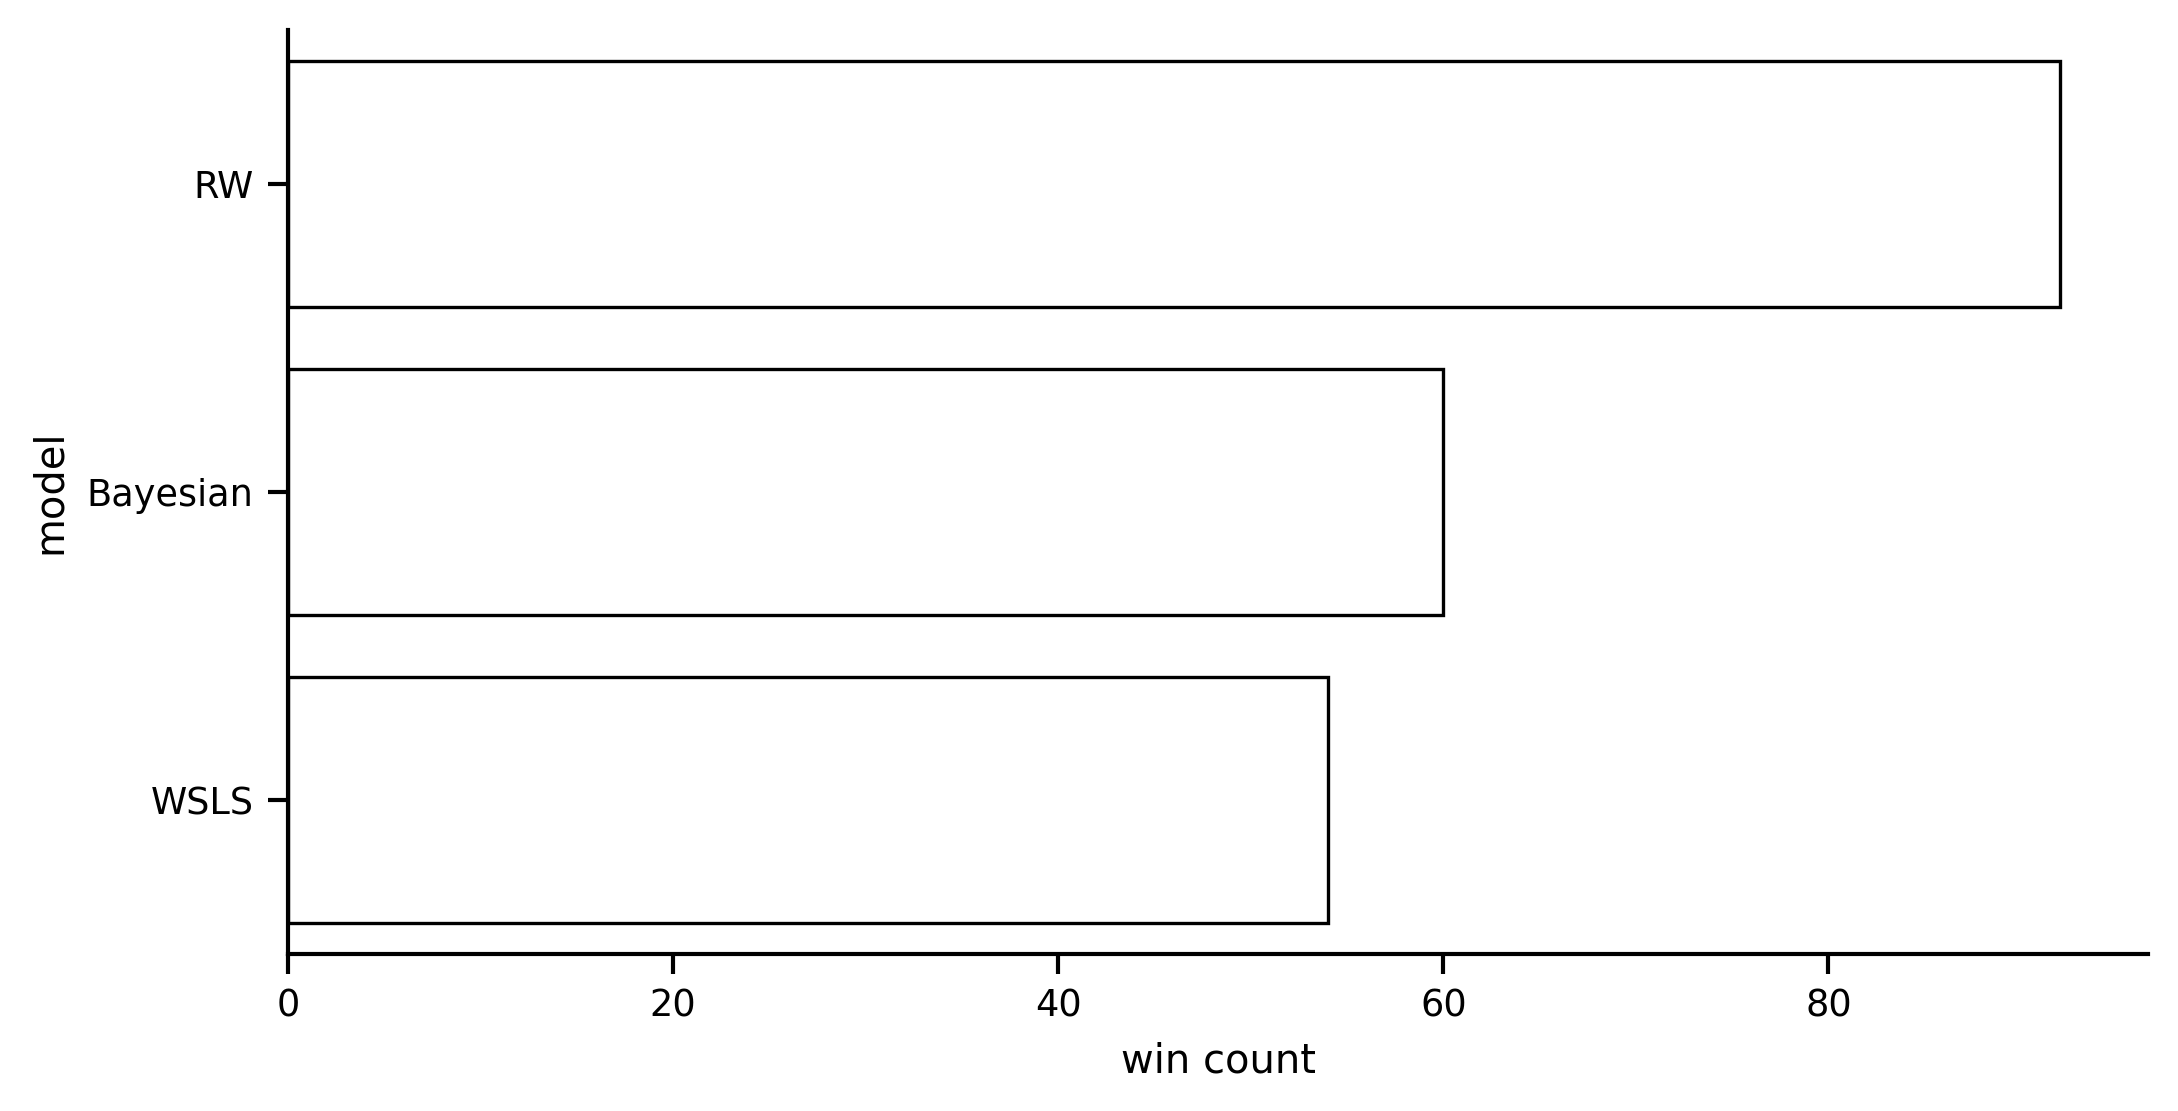

In [15]:
f, ax = plt.subplots(1,1, dpi=300, figsize=(8,4))
sns.countplot(data=model_comparisons[model_comparisons['rank']==0], y='model', orient='h', facecolor='white', 
              edgecolor='black', order=['RWModel', 'Bayes', 'WSLS'])
handles, labels = ax.get_legend_handles_labels()
ax.set(ylabel='model', xlabel='win count', yticklabels=['RW', 'Bayesian', 'WSLS'])
sns.despine()

In [28]:
model_comparisons[(model_comparisons['rank']==0) & (model_comparisons.model=='Bayes')].shape[0]

60

In [29]:
count_a = model_comparisons[(model_comparisons['rank']==0) & (model_comparisons.model=='RWModel')].shape[0]
count_b = model_comparisons[(model_comparisons['rank']==0) & (model_comparisons.model=='Bayes')].shape[0]
count_c = model_comparisons[(model_comparisons['rank']==0) & (model_comparisons.model=='WSLS')].shape[0]
nobs_a = 206
nobs_b = 206
nobs_c = 206

In [31]:
# Perform chi-square test of proportions
chi2_stat, p_value, _ = proportions_chisquare([count_a, count_b, count_c], [nobs_a, nobs_b, nobs_c])

# Compute effect size (Cramer's V)
n = sum([count_a, count_b, count_c])
phi = np.sqrt(chi2_stat / n)
cramer_v = phi / np.sqrt(min([nobs_a, nobs_b, nobs_c]) - 1)

print("Effect size (Cramer's V):", cramer_v)


Effect size (Cramer's V): 0.020778712825185057


**Figure S3B**

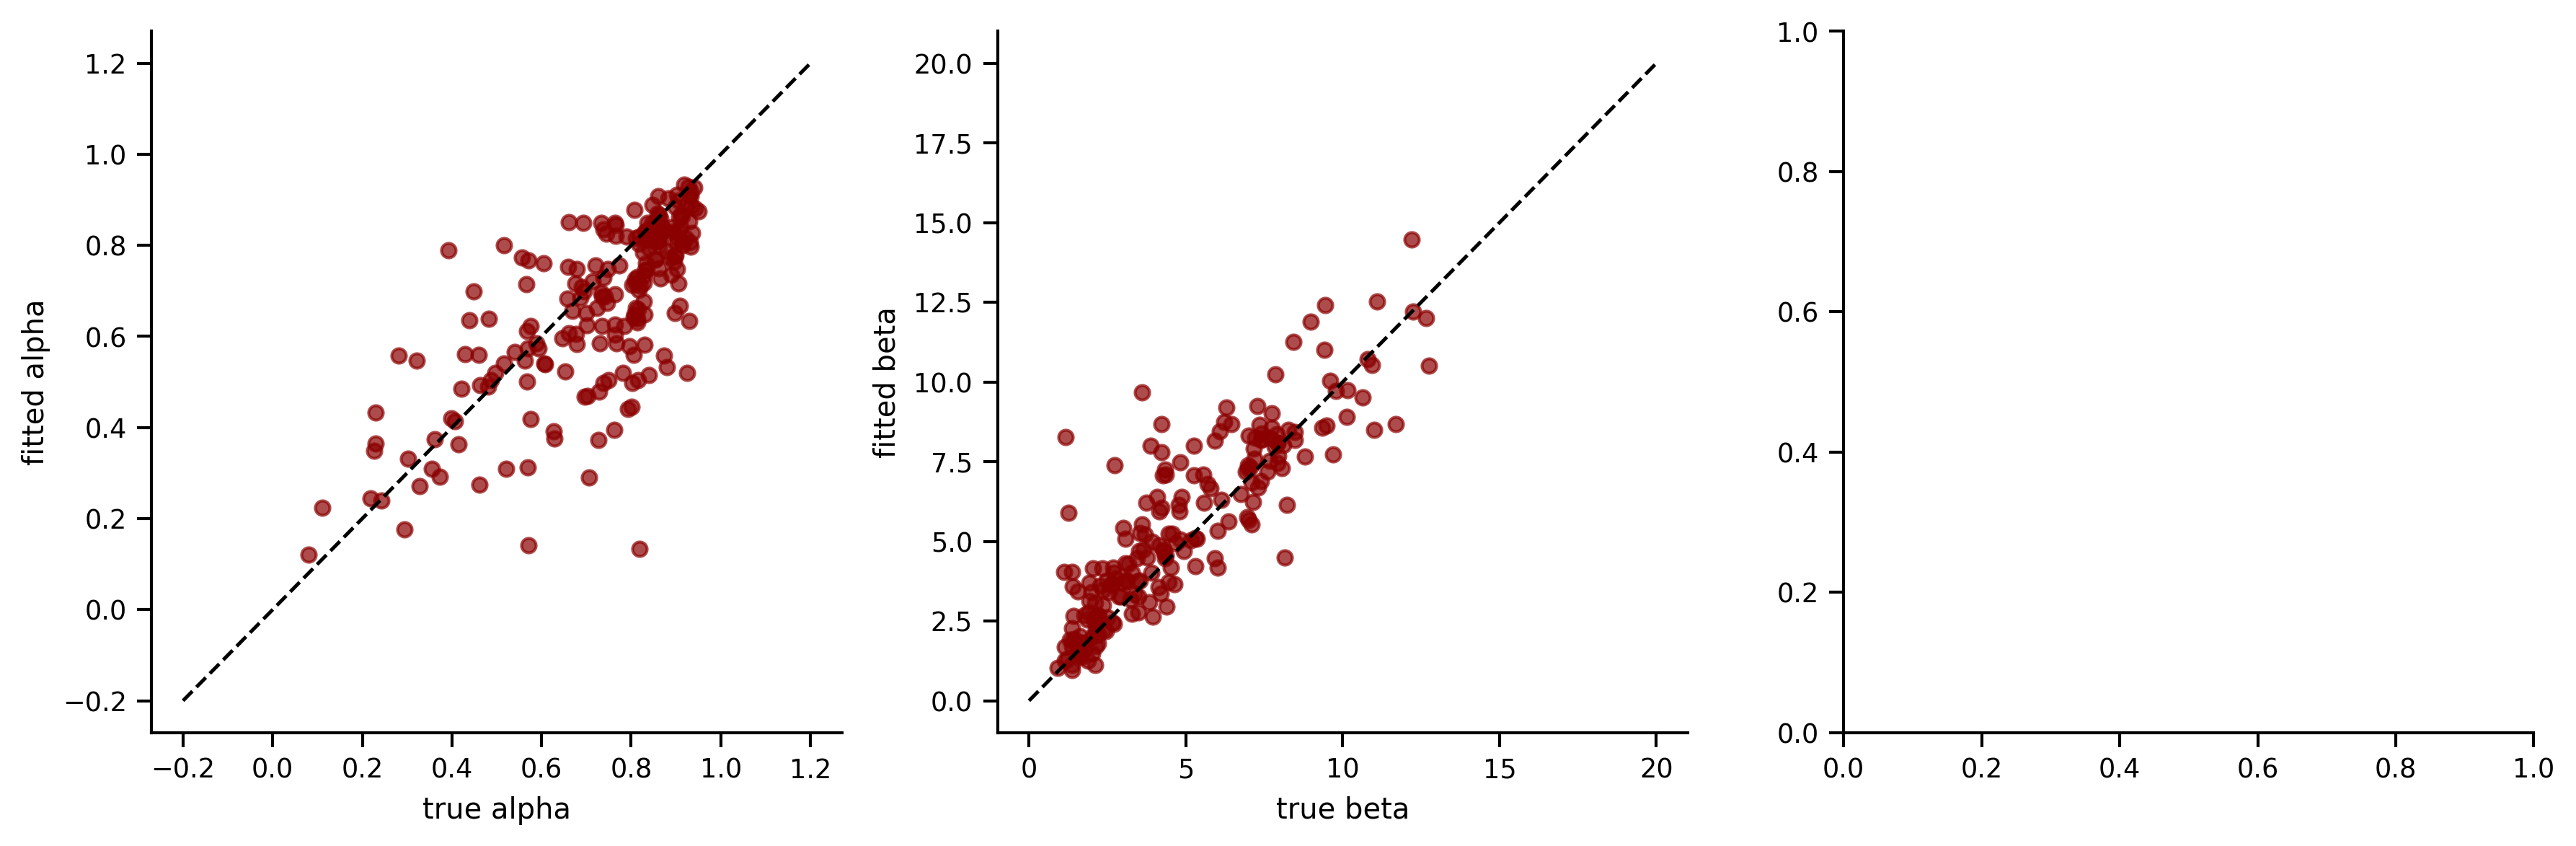

In [175]:

f, ax = plt.subplots(1, 3, dpi=300, figsize=(12,4))
num_params=2
for ix, param in enumerate(param_recovery.columns[:num_params].tolist()): 
    if num_params > 1:
        ax[ix].plot(param_recovery[f'sim_{param}'], param_recovery[f'{param}'], 'o', color='darkred', alpha=.7)
        if 'beta' in param: 
            ax[ix].plot([0, 20], [0, 20], 'k--')
        else: 
            ax[ix].plot([-0.2, 1.2], [-0.2, 1.2], 'k--')
        ax[ix].set(xlabel=f'true {param}', ylabel=f'fitted {param}')
        f.tight_layout()
    else: 
        ax[ix].plot(param_recovery[f'sim_{param}'], param_recovery[f'{param}'], 'o', color='darkred', alpha=.7)
        if 'beta' in param: 
            ax[ix].plot([0, 20], [0, 20], 'k--')
        else: 
            ax[ix].plot([-0.2, 1.2], [-0.2, 1.2], 'k--')
        ax[ix].set(xlabel=f'true {param}', ylabel=f'fitted {param}')
        f.tight_layout
    sns.despine()



In [176]:
pearsonr(param_recovery.sim_alpha,
        param_recovery.alpha)

PearsonRResult(statistic=0.7170401463828912, pvalue=8.177430967199898e-34)

In [177]:
pearsonr(param_recovery.sim_beta,
        param_recovery.beta)

PearsonRResult(statistic=0.8725503059671176, pvalue=2.177296500094584e-65)

**Figure S3C**

[[Text(0.5, 0, 'RWModel'), Text(1.5, 0, 'WSLS'), Text(2.5, 0, 'Bayes')],
 [Text(0, 0.5, 'RWModel'), Text(0, 1.5, 'WSLS'), Text(0, 2.5, 'Bayes')]]

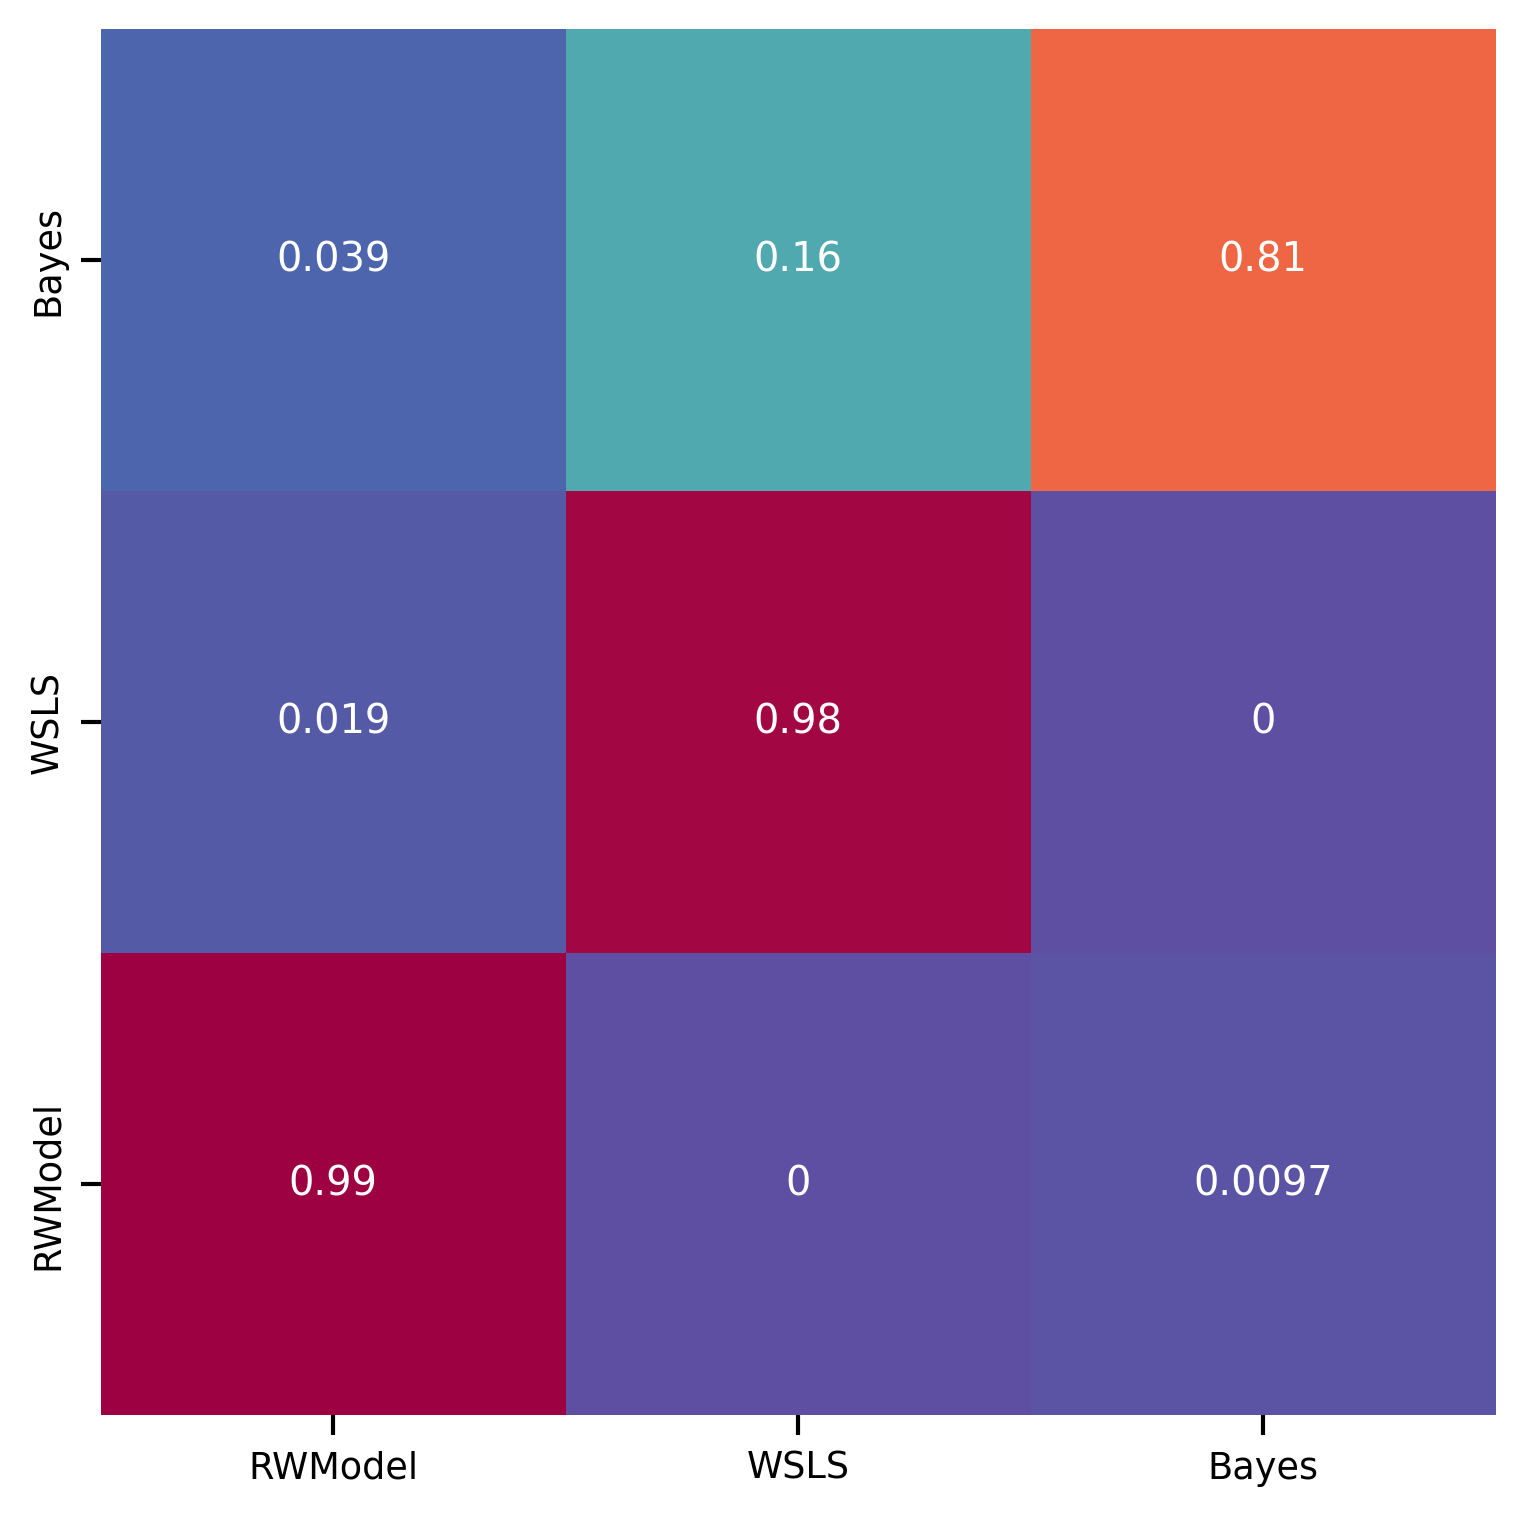

In [184]:
model_names_in_order = ['RWModel', 'WSLS', 'Bayes']

f, ax = plt.subplots(1,1, dpi=300, figsize=(6, 6))
sns.heatmap(data=confusion_mat.drop(columns=['Unnamed: 0']), cmap='Spectral_r', annot=True, cbar=False)
plt.gca().invert_yaxis()
ax.set(xticklabels=model_names_in_order, yticklabels=model_names_in_order)


Do a grid search to simulate actions/rewards across the parameter space 

In [139]:
# Grid-search:
model = RWModel()
T = 60
alphas = []
betas = []
rewards = []
for alpha in np.arange(0,1, 0.01):
    for beta in np.arange(0,15,0.5):
        params = {'alpha': alpha,
                  'beta': beta}
        # simulate actions and outcomes  
        actions, offers = model.simulate(n_trials=T, params=params)
        rewards.append(np.sum(offers))
        alphas.append(alpha)
        betas.append(beta)
        

In [148]:
params = {'alpha': 0.1,
          'beta': 1}
actions_low, offers_low = model.simulate(n_trials=T, params=params)

In [150]:
params = {'alpha': 0.9,
          'beta': 10}
actions_high, offers_high = model.simulate(n_trials=T, params=params)

In [140]:
grid_df = pd.DataFrame(columns=['alpha', 'beta', 'reward'])
grid_df['alpha'] = alphas
grid_df['beta'] = betas 
grid_df['reward'] = rewards

In [141]:
grid_df['alpha_bin'] = pd.cut(grid_df['alpha'], bins=10)
grid_df['beta_bin'] = pd.cut(grid_df['beta'], bins=10)

In [142]:
grid_df['beta_bin']

0       (-0.0145, 1.45]
1       (-0.0145, 1.45]
2       (-0.0145, 1.45]
3           (1.45, 2.9]
4           (1.45, 2.9]
             ...       
2995      (11.6, 13.05]
2996      (11.6, 13.05]
2997      (13.05, 14.5]
2998      (13.05, 14.5]
2999      (13.05, 14.5]
Name: beta_bin, Length: 3000, dtype: category
Categories (10, interval[float64, right]): [(-0.0145, 1.45] < (1.45, 2.9] < (2.9, 4.35] < (4.35, 5.8] ... (8.7, 10.15] < (10.15, 11.6] < (11.6, 13.05] < (13.05, 14.5]]

/tmp/ipykernel_134617/4079824120.py:1: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


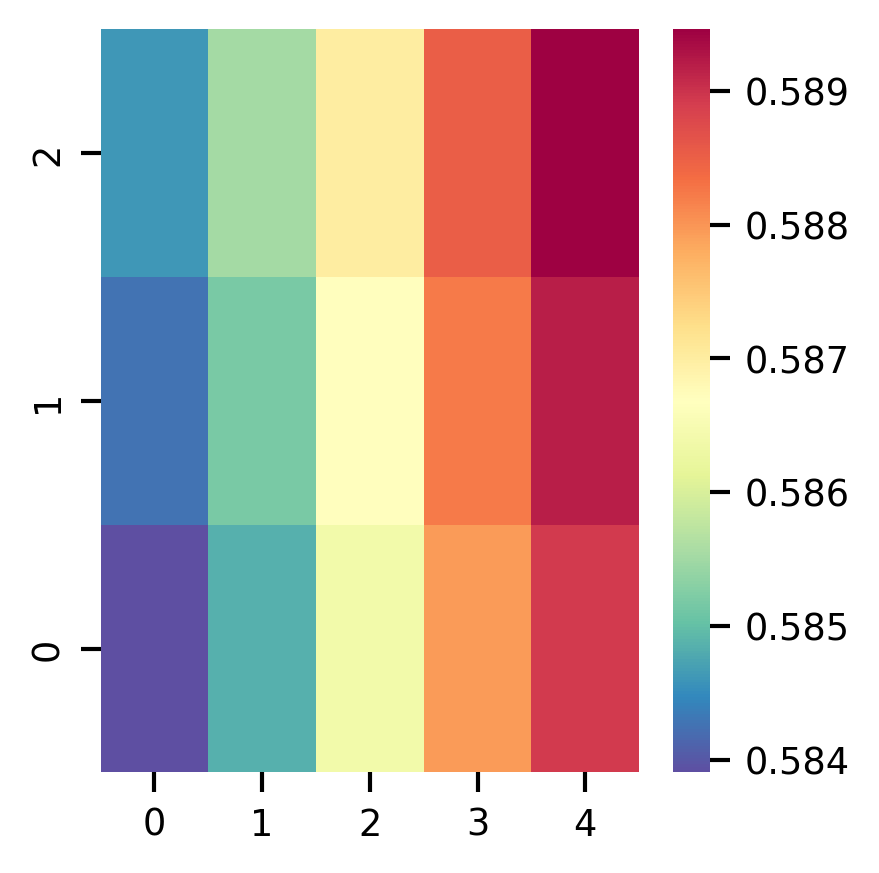

In [133]:
from scipy.ndimage.filters import gaussian_filter
df3_smooth = gaussian_filter(heatmap_data, sigma=3)
f, ax = plt.subplots(1,1, dpi=300, figsize=(3,3))
sns.heatmap(df3_smooth, cmap = 'Spectral_r', ax=ax)
ax.invert_yaxis()
f.tight_layout()

/tmp/ipykernel_134617/3444077723.py:15: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


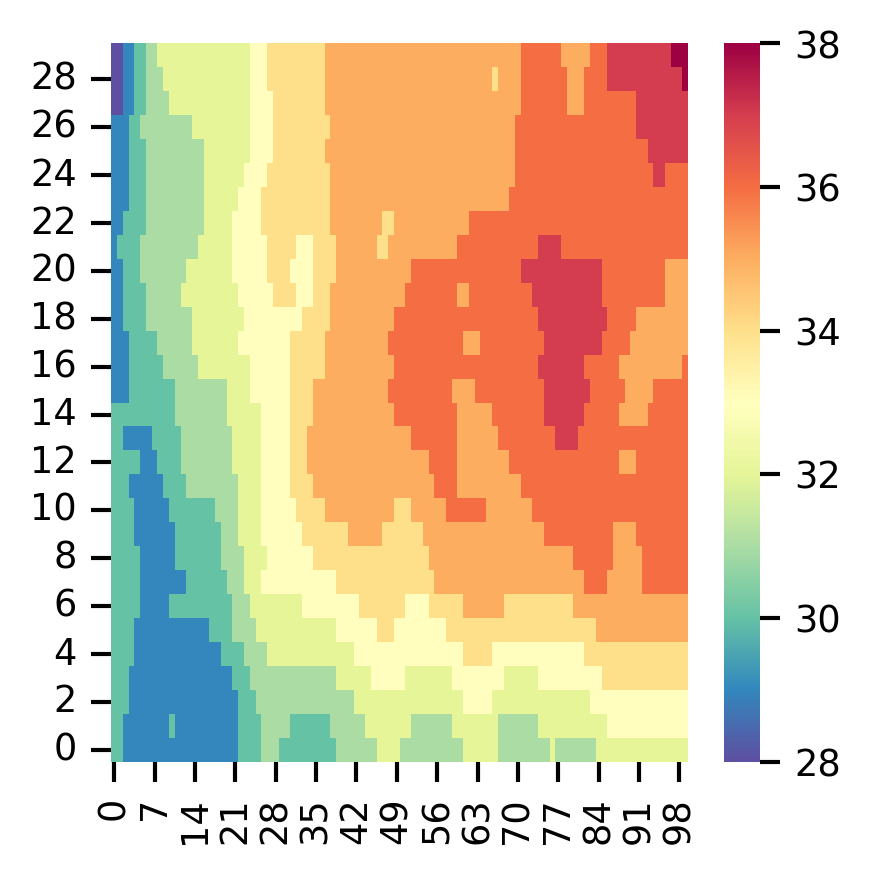

In [143]:
heatmap_data = grid_df.pivot_table(values='reward', index='beta', columns='alpha', aggfunc='mean')

df3_smooth = gaussian_filter(heatmap_data, sigma=3)
f, ax = plt.subplots(1,1, dpi=300, figsize=(3,3))
sns.heatmap(df3_smooth, cmap = 'Spectral_r', ax=ax)
ax.invert_yaxis()
f.tight_layout()



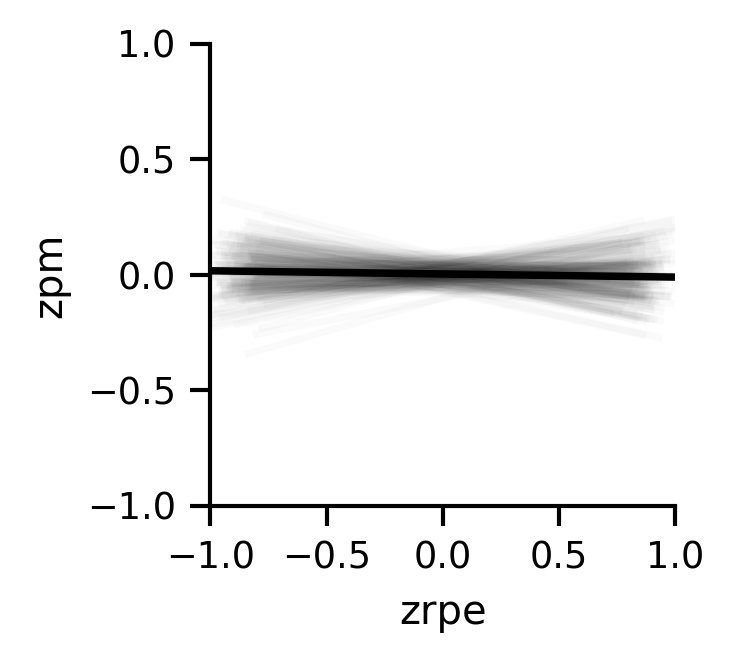

In [32]:
f, ax = plt.subplots(1,1, dpi=300, figsize=(2,2))
for subj in full_data.participant.unique():
    sns.regplot(data=full_data[full_data.participant==subj].dropna(subset='rpe'), x='zrpe', y='zpm', scatter=False, color= 'k', ci=None, line_kws={'alpha':0.02})

ax.set(xlabel='rpe (z-scored)', ylabel='pm (z-scored)', xlim=[-1, 1], ylim=[-1, 1])
sns.regplot(data=full_data.dropna(subset='rpe'), x='zrpe', y='zpm', scatter=False, color= 'k', ci=None)
sns.despine()


In [33]:
mod_ = smf.ols(formula='zpm ~ 1 + zrpe', 
                     data=full_data).fit()
print(mod_.summary())
print(eq_test(mod_, regressor='zrpe', equivalence_margin=0.1, alpha=0.05))


                            OLS Regression Results                            
Dep. Variable:                    zpm   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.276
Date:                Mon, 13 May 2024   Prob (F-statistic):              0.131
Time:                        14:32:09   Log-Likelihood:                -9082.7
No. Observations:               12360   AIC:                         1.817e+04
Df Residuals:                   12358   BIC:                         1.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0035      0.005      0.768      0.4

In [281]:
subj_level_df_mean['zalpha'] = zscore(subj_level_df_mean['alpha'])
subj_level_df_mean['zbeta'] = zscore(subj_level_df_mean['beta'])


In [317]:
subj_level_df_mean['zpoints'] = zscore(subj_level_df_mean['points'])

In [318]:
test_model = smf.ols(formula='zpoints ~ zalpha + zbeta + zalpha*zbeta', 
                     data=subj_level_df_mean).fit()
# test_model = smf.glm(formula="C(points_bin) ~ alpha + beta + alpha*beta", family=sm.families.Binomial(), data=subj_level_df_mean).fit()

test_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                zpoints   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                   0.08274
Date:                Mon, 08 Jan 2024   Prob (F-statistic):              0.969
Time:                        17:53:13   Log-Likelihood:                -292.17
No. Observations:                 206   AIC:                             592.3
Df Residuals:                     202   BIC:                             605.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0011      0.071     -0.015      0.988      -0.140       0.138
zalpha           0.0322      0.071      0.456      0.649      -0.107       0.172
zbeta            0.0073      0.075      0.097      0.923      -0.141       0.155
zalpha:zbeta     0.0107      0.065      0.165      0.869      -0.117       0.138
==============================================================================
Omnibus:                       13.039   Durbin-Watson:                   2.206
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               11.714
Skew:                           0.513   Prob(JB):                      0.00286
Kurtosis:                       2.441   Cond. No.                         1.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
memory_metrics = ['dprime', 'hit_rate', 'false_alarm_rate']

coeffs = {x: np.nan for x in memory_metrics}

dfs = {x: np.nan for x in memory_metrics}

# group over subjects because this is a population-level model, not a 
model_df = full_data[['participant', 'dprime', 'hit_rate', 'false_alarm_rate', 'alpha', 'beta', 'age', 'Sex']].dropna().drop_duplicates(subset=['participant'])



factors = ['alpha', 'beta']

for mem_metric in memory_metrics:
    models = {} 

    full_model = smf.ols(formula=f'{mem_metric} ~ alpha + beta + age*C(Sex)', 
                         data=model_df).fit()
    models[factors[1]] = smf.ols(formula=f'{mem_metric} ~ alpha + age*C(Sex)',  
                                 data=model_df).fit()
    models[factors[0]]  = smf.ols(formula=f'{mem_metric} ~ beta + age*C(Sex)',  
                                      data=model_df).fit()
    
    coeffs[mem_metric] = full_model.params
    model_df[f'{mem_metric}_resid_after_beta'] = models[factors[0]].resid    
    model_df[f'{mem_metric}_resid_after_alpha']  = models[factors[1]].resid


    df_temp = pd.DataFrame(columns = ['chi_squared', 'p', 'df', 'factor'])
    df_temp['factor'] = factors 
    for i in factors: 
        chi_stat = 2*(full_model.llf - models[i].llf)
        df = (full_model.df_model - models[i].df_model)
        p = chi2.sf(chi_stat, df)
        df_temp['chi_squared'][(df_temp.factor==i)] = chi_stat
        df_temp['p'][(df_temp.factor==i)] = p
        df_temp['df'][(df_temp.factor==i)] = df
        
    dfs[mem_metric] = df_temp
    

Neither alpha nor beta has any bearing on overall memory, unlike the effect that beta has on reward in the first task. 

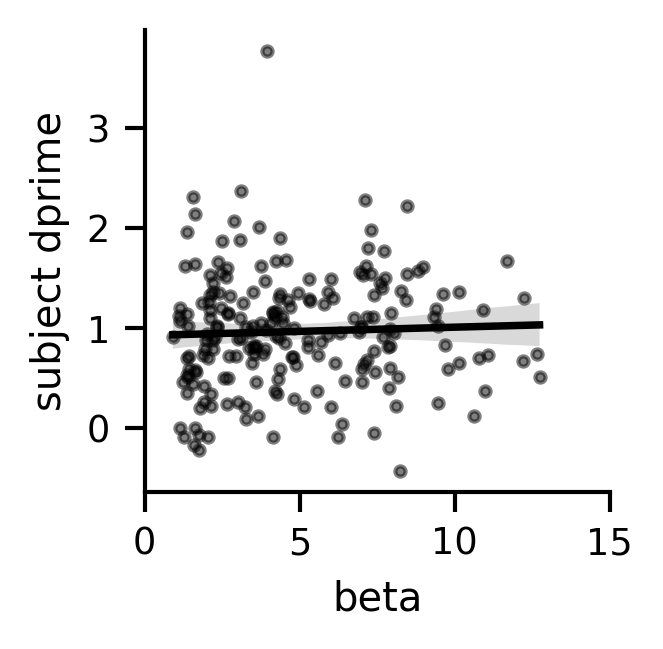

In [30]:
# subject-level RL-memory correlations

with PdfPages(f'{save_dir_plots}/Exp1_Fig_MemoryBetaCorr.pdf') as pdf:    
    f, ax = plt.subplots(1,1, dpi=300, figsize=(2,2))
    sns.regplot(data=subj_level_df_mean, x='beta', y='dprime', color = 'black', ci=95, scatter_kws={'s':6, 'alpha':0.5})
#     sns.regplot(data=plot_df[plot_df._merge=='both'], x='reward_x', y='hits', color = 'blue', logistic=True, ci=68)
#     sns.regplot(data=plot_df[plot_df._merge=='both'], x='gamble_x', y='hits', color = 'green', logistic=True, ci=68)

    sns.despine()
    ax.set(xticks=np.linspace(0,15, 4), ylabel="subject d'")
    ax.set_ylabel('subject dprime')
    pdf.savefig()


In [683]:
pearsonr(subj_level_df_mean.dropna(subset='dprime').beta, 
         subj_level_df_mean.dropna(subset='dprime').dprime)

PearsonRResult(statistic=0.0795410253108903, pvalue=0.25692562787773626)

**Caption**: Individual memory performance (d') as a function of inverse-temperature ($\beta$) estimates. Line denotes linear model fit, and shading denotes bootstrapped 95% confidence interval.  

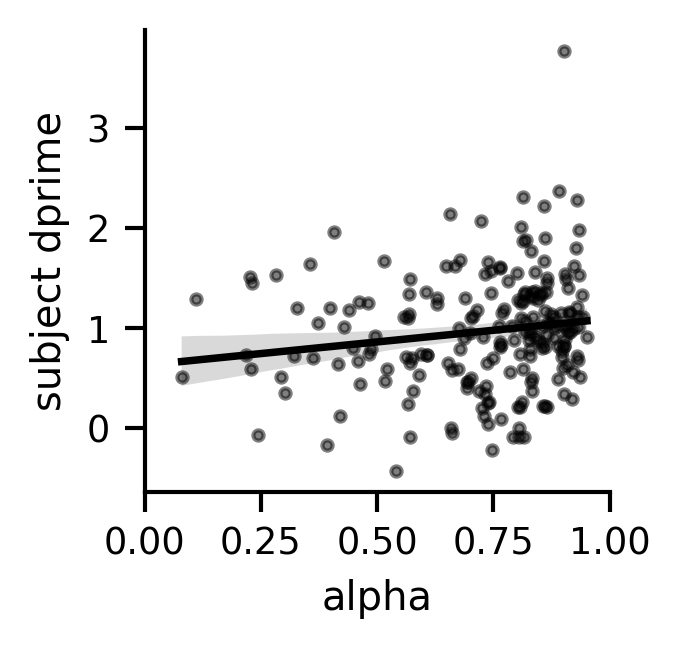

In [20]:
# subject-level RL-memory correlations

with PdfPages(f'{save_dir_plots}/Exp1_Fig_MemoryAlphaCorr.pdf') as pdf:    
    f, ax = plt.subplots(1,1, dpi=300, figsize=(2,2))
    sns.regplot(data=subj_level_df_mean, x='alpha', y='dprime', color = 'black', ci=95, scatter_kws={'s':6, 'alpha':0.5})
#     sns.regplot(data=plot_df[plot_df._merge=='both'], x='reward_x', y='hits', color = 'blue', logistic=True, ci=68)
#     sns.regplot(data=plot_df[plot_df._merge=='both'], x='gamble_x', y='hits', color = 'green', logistic=True, ci=68)
    sns.despine()
    ax.set(xticks=np.linspace(0,1,5), ylabel="subject d'")
    ax.set_ylabel('subject dprime')
    pdf.savefig()


In [86]:
r1, p1 = spearmanr(subj_level_df_mean.dropna(subset='dprime').alpha, 
         subj_level_df_mean.dropna(subset='dprime').dprime)

In [87]:
r1

0.17696934409675547

In [88]:
p1

0.01113641045093051

In [15]:
pearsonr(subj_level_df_mean.dropna(subset='dprime').alpha_neg, 
         subj_level_df_mean.dropna(subset='dprime').dprime)

PearsonRResult(statistic=0.17633042297449927, pvalue=0.011436261395034513)

In [16]:
spearmanr(subj_level_df_mean.dropna(subset='dprime').alpha_neg, 
         subj_level_df_mean.dropna(subset='dprime').dprime)

SignificanceResult(statistic=0.17585081014231585, pvalue=0.011665999049825689)

In [77]:
compare_corr(r1, r2, 
            subj_level_df_mean.dropna(subset='dprime').dprime.shape[0],
            subj_level_df_mean.dropna(subset='dprime').dprime.shape[0])

(1.451574689991086, 0.14661990050552576)

**Caption**: Individual memory performance (d') as a function of learning rate ($\alpha$) estimates. Line denotes linear model fit, and shading denotes bootstrapped 95% confidence interval.  

NameError: name 'plot_df' is not defined

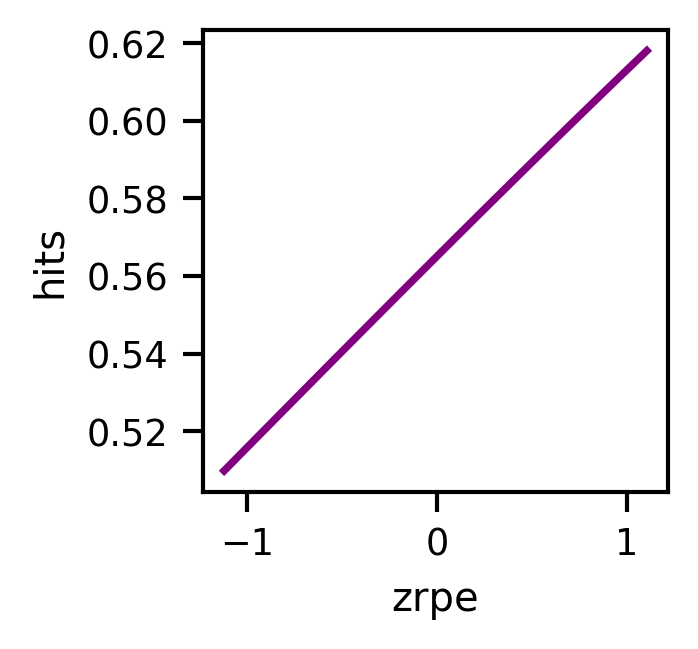

In [36]:
# trial-level rpe-memory correlation

f, ax = plt.subplots(1,1, dpi=300, figsize=(2,2))
sns.regplot(data=full_data[full_data.image_type=='old'], x='zrpe', y='hits', color = 'purple', 
            logistic=True, ci=None, scatter=False)
for pid in plot_df[plot_df.image_type=='both'].participant.unique():
    sns.regplot(data=plot_df[(plot_df.image_type=='old') & (plot_df.participant==pid)], 
                x='zrpe', y='hits', color = 'purple', 
            logistic=True, ci=None, scatter=False, line_kws={'alpha':0.03})
ax.set_xlim([-2, 2])
ax.set_ylabel('p(hit)')
sns.despine()


**Caption**:  Logistic regression model prediction of probability of hits as a function of RPEs. Shading denotes bootstrapped 95% confidence interval. 

 As we (mostly) expected, positive RPEs enhance subsequent memory **for the stimuli associated with such RPEs**. This was known, but does not answer how RPEs might affect the overall recognition memory process **beyond just fostering greater memory for stimuli associated with RPEs**. 

In [218]:
plot_df['hits'] = plot_df['hits'].astype(int)
base_log_model = smf.glm(formula="hits ~ rpe", family=sm.families.Binomial(), data=plot_df[['hits', 'rpe']].dropna()).fit()
base_log_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   hits   No. Observations:                12360
Model:                            GLM   Df Residuals:                    12358
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8448.4
Date:                Thu, 27 Jul 2023   Deviance:                       16897.
Time:                        15:49:31   Pearson chi2:                 1.24e+04
No. Iterations:                     4   Pseudo R-squ. (CS):           0.002307
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2624      0.018     14.444      0.000       0.227       0.298
rpe            0.1718      0.032      5.337      0.000       0.109       0.235
==============================================================================
"""

Below are confidence correlations that I don't quite need/want right now. 

1) Confidence measurements dropped in >60 people - ugh. 

2) The relationship between memory and anxiety is now observable in just memory score, which is good enough for me.

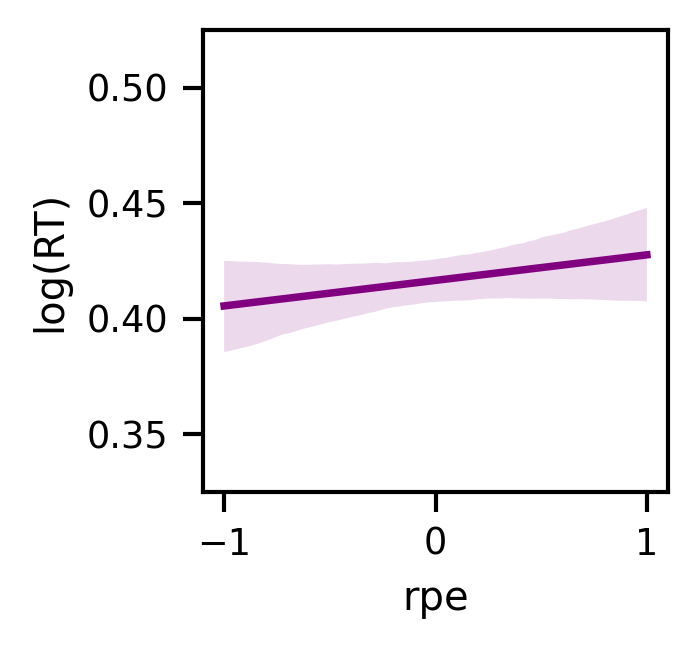

In [49]:
# trial-level rpe-memory correlation

with PdfPages(f'{save_dir_plots}/Exp1_Fig_RTRPECorr.pdf') as pdf:    
    f, ax = plt.subplots(1,1, dpi=300, figsize=(2,2))
    sns.regplot(data=plot_df[plot_df.image_type=='old'], x='rpe', y='recog_rt_log', color = 'purple', ci=95, scatter=False)
#     sns.regplot(data=plot_df[plot_df._merge=='both'], x='rpe', y='hits', color = 'black', logistic=True, ci=95, n_boot=100, scatter_kws={'s':1, 'alpha':0.2}, y_jitter=.05, x_jitter=.05)
#     sns.regplot(data=plot_df[plot_df._merge=='both'], x='reward_x', y='hits', color = 'blue', logistic=True, ci=68)
#     sns.regplot(data=plot_df[plot_df._merge=='both'], x='gamble_x', y='hits', color = 'green', logistic=True, ci=68)

    ax.set_ylim([0.325, 0.525])
    ax.set_ylabel('log(RT)')
    pdf.savefig()


In [91]:
plot_df['hits'] = plot_df['hits'].astype(int)
base_log_model = smf.glm(formula="recog_rt_log ~ rpe", data=plot_df[['recog_rt_log', 'rpe']].dropna()).fit()
base_log_model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           recog_rt_log   No. Observations:                12358
Model:                            GLM   Df Residuals:                    12356
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                         0.28741
Method:                          IRLS   Log-Likelihood:                -9829.9
Date:                Mon, 10 Apr 2023   Deviance:                       3551.2
Time:                        16:20:51   Pearson chi2:                 3.55e+03
No. Iterations:                     3   Pseudo R-squ. (CS):          4.014e-06
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4161      0.005     86.288      0.000       0.407       0.426
rpe            0.0019      0.009      0.222      0.824      -0.015       0.019
==============================================================================
"""

In [75]:
# with PdfPages(f'{save_dir_plots}/Fig_ConfRPECorr.pdf') as pdf:    
#     f, ax = plt.subplots(1,1, dpi=300, figsize=(2,2))
#     sns.regplot(data=plot_df, x='rpe', y='conf_choice', color = 'black', ci=68, scatter=False)
# #     sns.regplot(data=plot_df[plot_df._merge=='both'], x='reward_x', y='hits', color = 'blue', logistic=True, ci=68)
# #     sns.regplot(data=plot_df[plot_df._merge=='both'], x='gamble_x', y='hits', color = 'green', logistic=True, ci=68)

#     ax.set_ylim([3.3, 4.3])
#     ax.set_ylabel('confidence')
#     pdf.savefig()


In [76]:
# with PdfPages(f'{save_dir_plots}/Fig_ConfRTRPECorr.pdf') as pdf:    
#     f, ax = plt.subplots(1,1, dpi=300, figsize=(2,2))
#     sns.regplot(data=plot_df, x='rpe', y='conf_rt', color = 'black', ci=68, scatter=False)
# #     sns.regplot(data=plot_df[plot_df._merge=='both'], x='reward_x', y='hits', color = 'blue', logistic=True, ci=68)
# #     sns.regplot(data=plot_df[plot_df._merge=='both'], x='gamble_x', y='hits', color = 'green', logistic=True, ci=68)

#     ax.set_ylim([2.5, 3.5])
#     ax.set_ylabel('confidence reaction time')
#     pdf.savefig()


So, we know that over the whole group, the way you learn or make decisions about rewards does not affect your overall memory score, BUT people still have better memory for the images associated with RPEs. How do we understand this? It's possible that RPEs are stacking on top of the perceptual information for each stimuli they are associated with, strengthening the encoding of that stimulus. Can we untangle how, exactly, RPEs interact with perceptual information to enhance memory? Do some people use this information more than others in memory? 

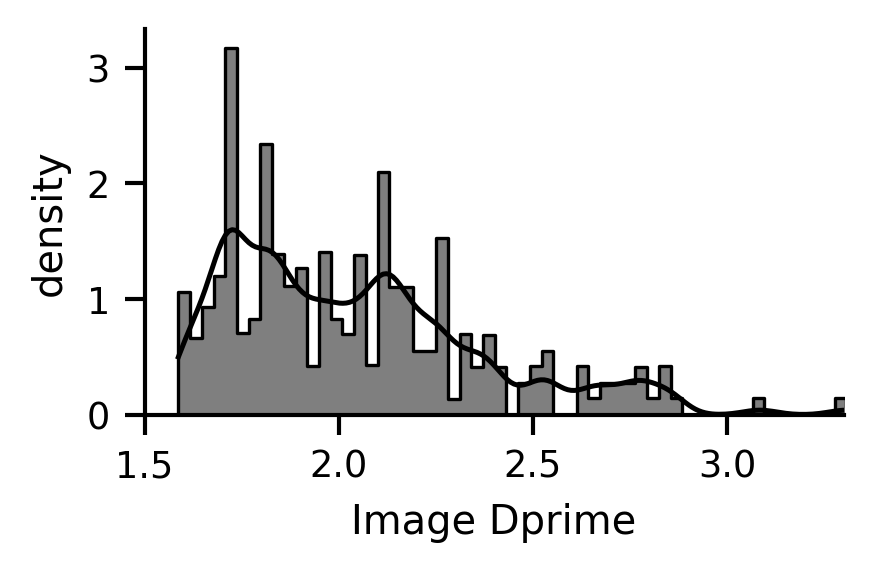

In [51]:
with PdfPages(f'{save_dir_plots}/Exp1_Fig_AllImDprime.pdf') as pdf:
    f, ax = plt.subplots(1,1, dpi=300, figsize=(3,2))
    sns.histplot(data=full_data, x='image_dprime', ax=ax, element="step", kde=True,
    stat="density", common_norm=False, color='k')
    plt.tight_layout()
#     ax.legend(labels=['pos', 'med pos', 'zero', 'med neg', 'neg'], bbox_to_anchor=(1, 1), loc='upper left')
    plt.ylabel('density')
    plt.xlabel('Image Dprime')
    plt.xlim([1.5, 3.3])
    sns.despine()
    pdf.savefig()

In [222]:
bins = [-1,-0.01, 0.01,1]
full_data['RPE_discrete'] = pd.cut(full_data.rpe, bins=bins, labels=['neg', 'zero', 'pos'])

In [29]:
spearmanr(full_data.dropna(subset='rpe').rpe,
          full_data.dropna(subset='rpe').image_dprime)

SignificanceResult(statistic=-0.007142510180314506, pvalue=0.4271941387487136)

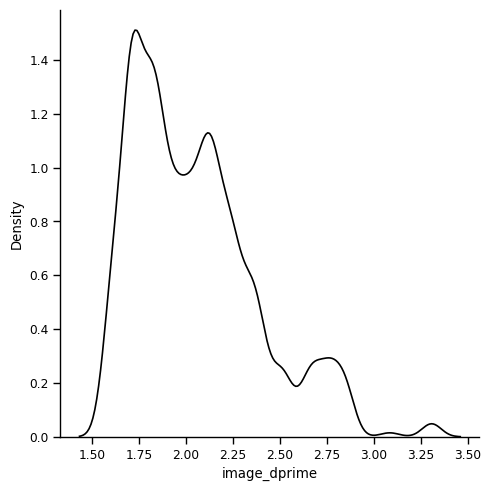

In [229]:
sns.displot(data=full_data.dropna(subset='rpe'), x='image_dprime', kind='kde', color= 'k')

Reviewer 3 wants this plot with the z-scored values

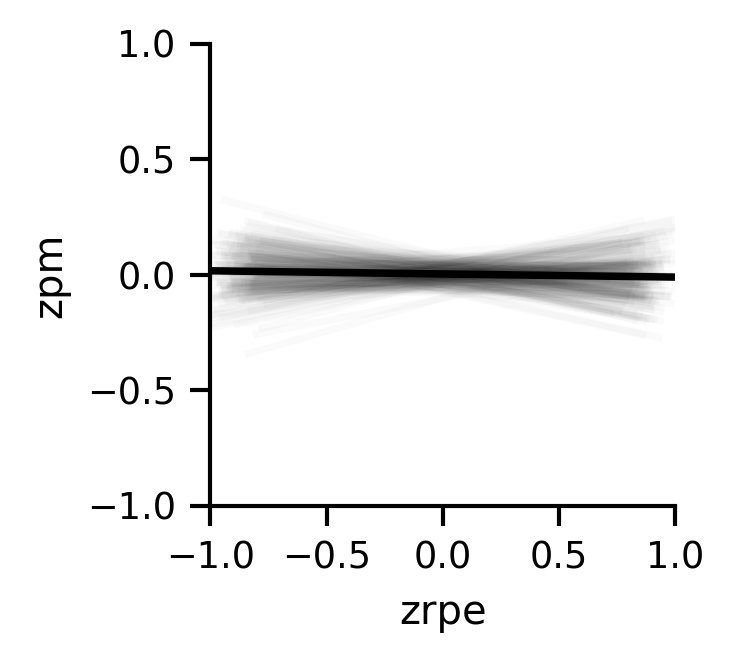

                            OLS Regression Results                            
Dep. Variable:                    zpm   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.276
Date:                Fri, 10 May 2024   Prob (F-statistic):              0.131
Time:                        18:06:23   Log-Likelihood:                -9082.7
No. Observations:               12360   AIC:                         1.817e+04
Df Residuals:                   12358   BIC:                         1.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0035      0.005      0.768      0.4

In [28]:
test = smf.ols(formula='image_dprime ~ rpe', data=full_data.dropna(subset='rpe')).fit()
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           image_dprime   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.140
Date:                Tue, 09 Jan 2024   Prob (F-statistic):             0.0764
Time:                        16:26:10   Log-Likelihood:                -3980.4
No. Observations:               12360   AIC:                             7965.
Df Residuals:                   12358   BIC:                             7980.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0465      0.003    681.347      0.000       2.041       2.052
rpe           -0.0094      0.005     -1.772      0.076      -0.020       0.001
==============================================================================
Omnibus:                     1497.719   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2105.679
Skew:                           0.955   Prob(JB):                         0.00
Kurtosis:                       3.662   Cond. No.                         1.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Caption**: Linear model fit of relationship between image d' and RPE indicating that these two measures capture orthogonal intrinsic and extrinsic features of the stimulus, respectively. 

In [241]:
pearsonr(full_data.dropna(subset='rpe').rpe,
        full_data.dropna(subset='rpe').image_dprime)

PearsonRResult(statistic=-0.015936906135974756, pvalue=0.07643981765271161)

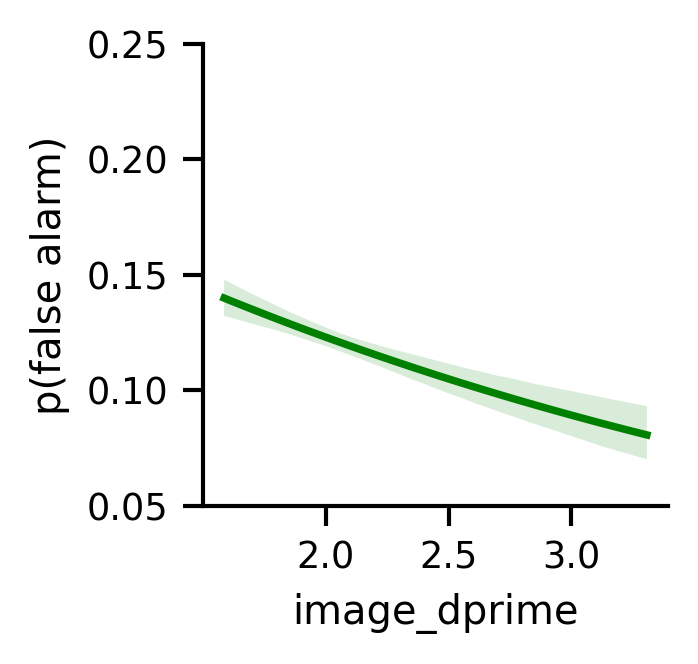

In [57]:
with PdfPages(f'{save_dir_plots}/Exp1_Fig_ImageDprimeFACorr.pdf') as pdf:    
    f, ax = plt.subplots(1,1, dpi=300, figsize=(2,2))
    sns.regplot(data=plot_df, x='image_dprime', y='false_alarms', logistic=True, ci=95, color='green')
    sns.despine()
    ax.set_ylim([0.05, .25])
    ax.set_ylabel('p(false alarm)')
    pdf.savefig()


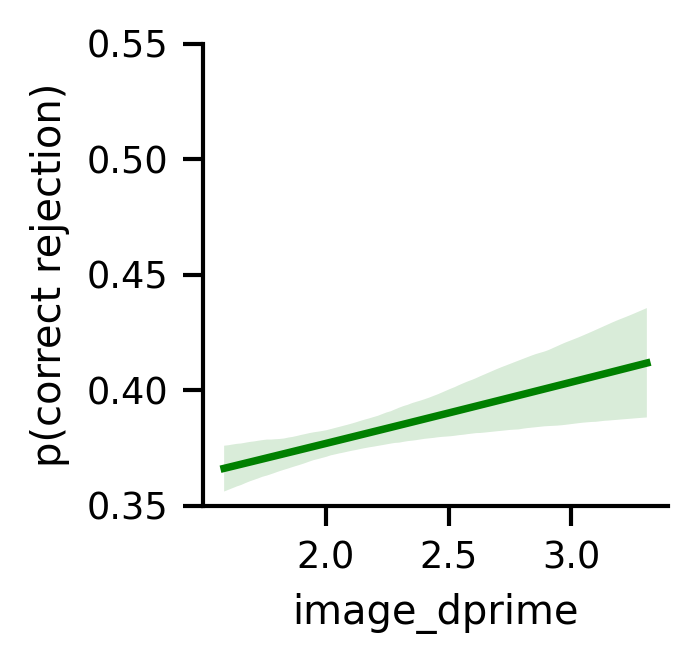

In [58]:
with PdfPages(f'{save_dir_plots}/Exp1_Fig_ImageDprimeCRCorr.pdf') as pdf:    
    f, ax = plt.subplots(1,1, dpi=300, figsize=(2,2))
    sns.regplot(data=plot_df, x='image_dprime', y='correct_rejections', color = 'green',  logistic=True, ci=95, scatter=False)
    sns.despine()
    ax.set_ylim([0.35, .55])
    ax.set_ylabel('p(correct rejection)')
    pdf.savefig()

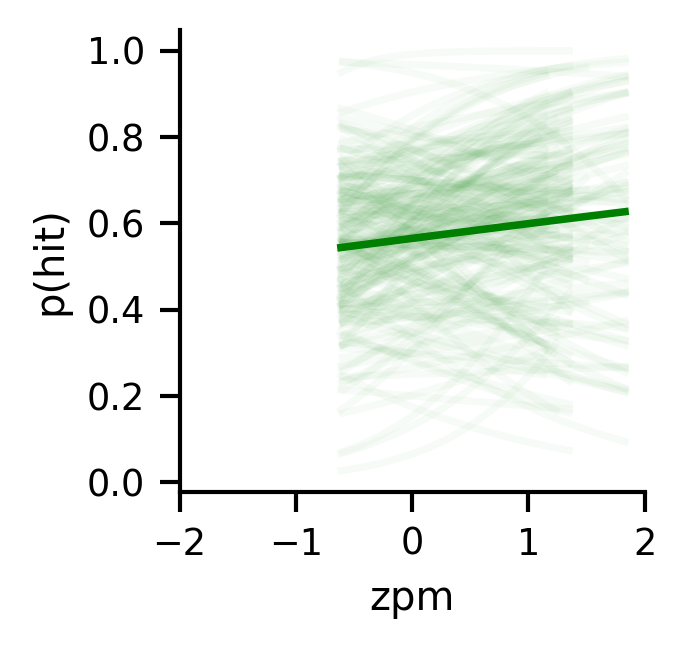

In [35]:
with PdfPages(f'{save_dir_plots}/Exp1_Fig_ImageDprimeHRCorr_Z.pdf') as pdf:    
    f, ax = plt.subplots(1,1, dpi=300, figsize=(2,2))
    sns.regplot(data=plot_df[plot_df._merge=='both'], x='zpm', y='hits', color = 'green', 
                logistic=True, ci=None, scatter=False)
    for pid in plot_df[plot_df._merge=='both'].participant.unique():
        sns.regplot(data=plot_df[(plot_df._merge=='both') & (plot_df.participant==pid)], 
                    x='zpm', y='hits', color = 'green', 
                logistic=True, ci=None, scatter=False, line_kws={'alpha':0.03})
    ax.set_xlim([-2, 2])
    ax.set_ylabel('p(hit)')
    sns.despine()
    pdf.savefig()
    
    

In [17]:
plot_df['hits'] = plot_df['hits'].astype(int)
base_log_model = smf.glm(formula="hits ~ image_dprime", family=sm.families.Binomial(), data=plot_df[['hits', 'image_dprime']].dropna()).fit()
base_log_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   hits   No. Observations:                24720
Model:                            GLM   Df Residuals:                    24718
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14708.
Date:                Thu, 28 Mar 2024   Deviance:                       29417.
Time:                        15:20:07   Pearson chi2:                 2.47e+04
No. Iterations:                     5   Pseudo R-squ. (CS):          0.0005684
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.2577      0.088    -14.314      0.000      -1.430      -1.085
image_dprime     0.1589      0.042      3.760      0.000       0.076       0.242
================================================================================
"""

In [19]:
plot_df['rpe_bin'] = pd.cut(plot_df.zrpe, bins=[-1.5, -0.5, 0, 0.5, 1, 1.5])

In [21]:
plot_df['pm_bin'] = pd.cut(plot_df.zpm, bins=[-1.5,  -0.5, 0.5,  1.5])

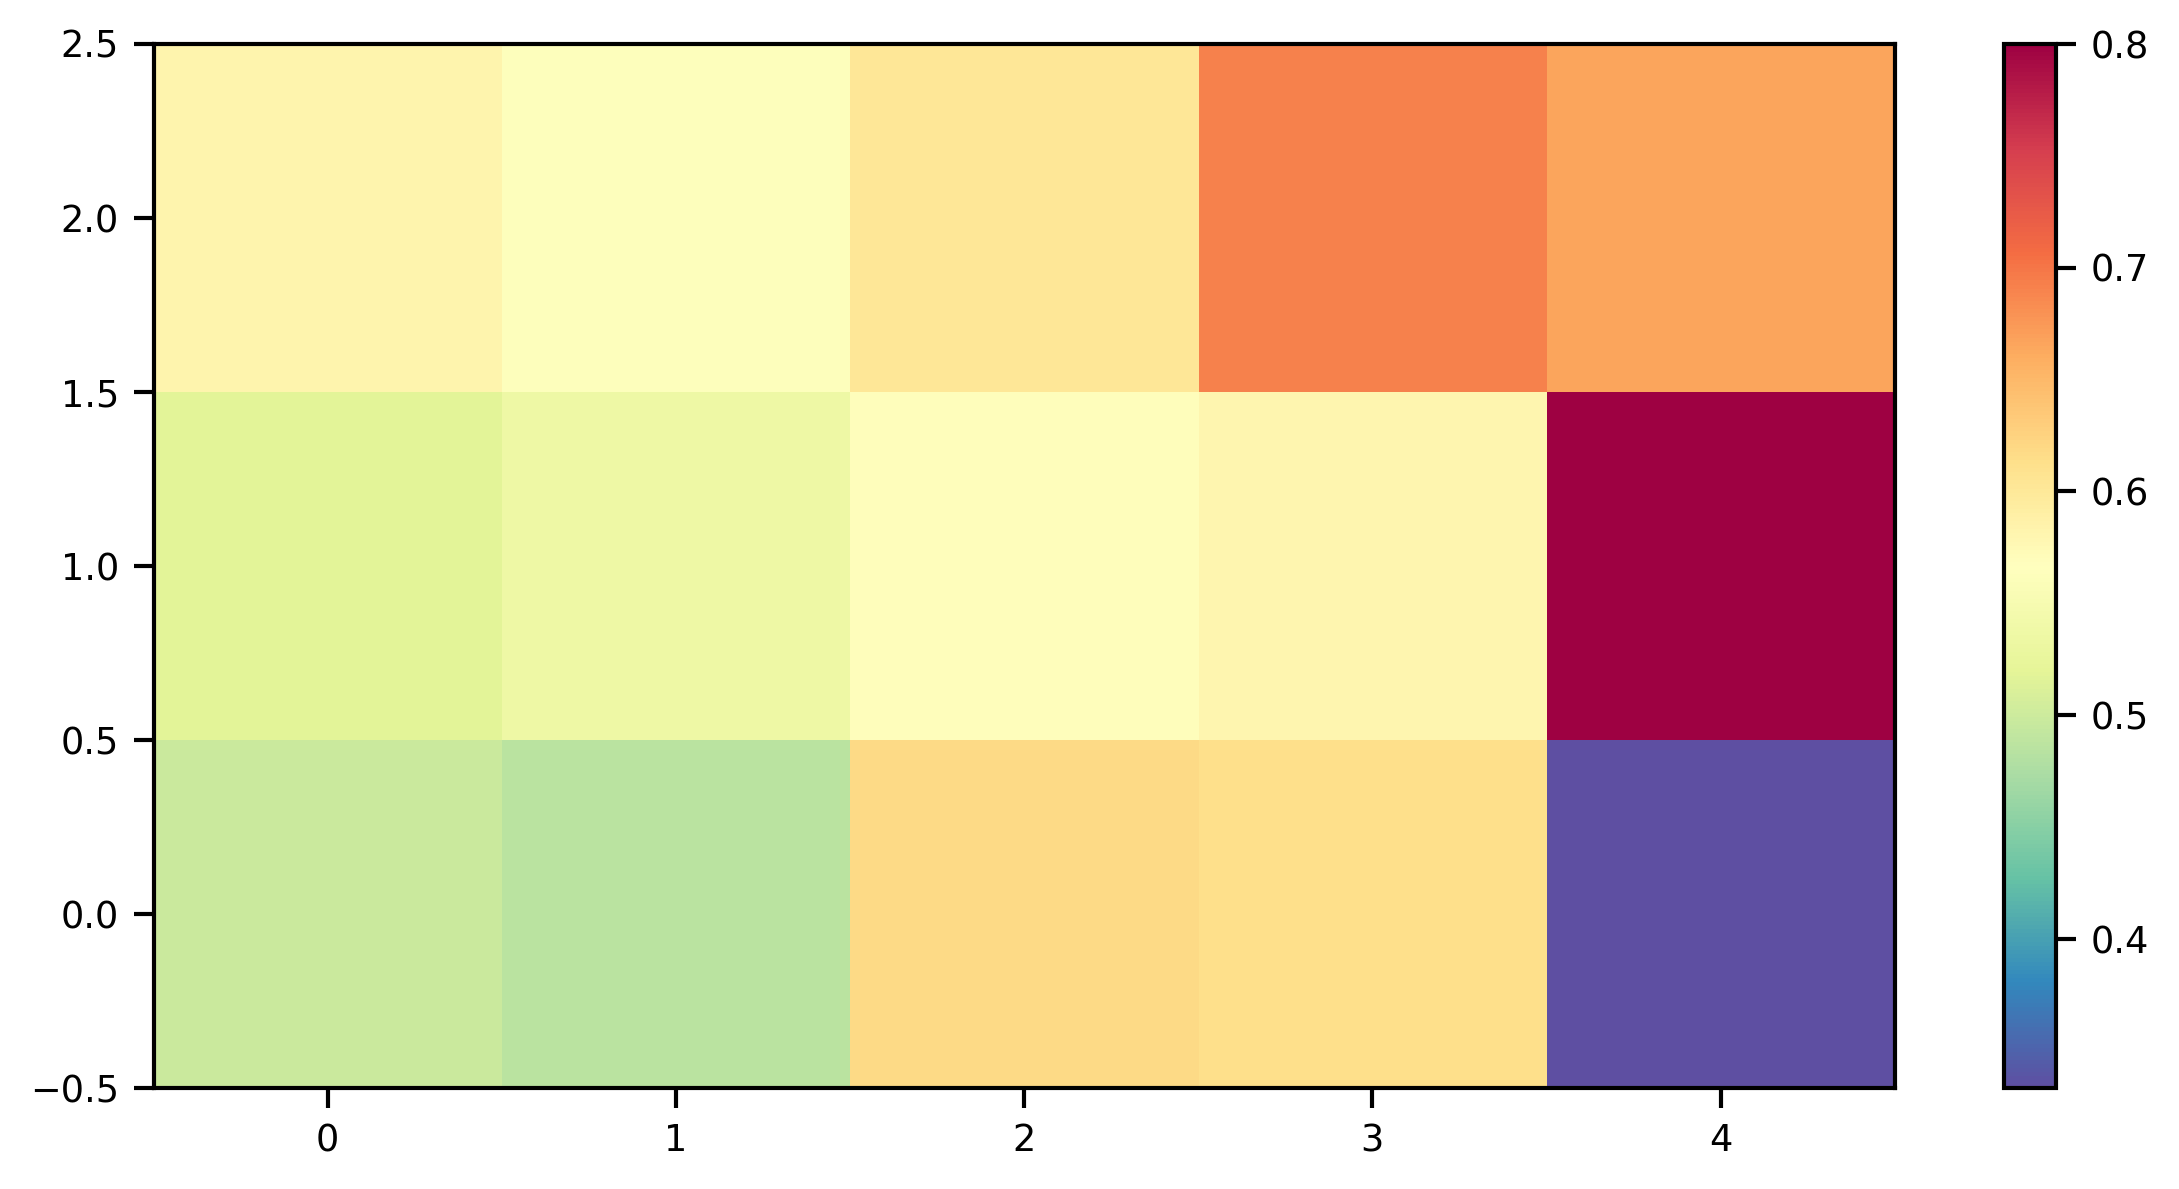

In [23]:
heatmap_data = plot_df.pivot_table(values='hits', index='pm_bin', columns='rpe_bin', aggfunc=np.nanmean)

f, ax = plt.subplots(1,1, dpi=300, figsize=(8,4))
ax.set_aspect('equal', adjustable='box')
pos = ax.imshow(heatmap_data, cmap = 'Spectral_r', aspect='equal')
ax.invert_yaxis()
f.colorbar(pos, ax=ax)
f.tight_layout()




Original smoothed plot:

In [58]:
plot_df['rpe_bin'] = pd.cut(plot_df.zrpe, bins=15)
plot_df['pm_bin'] = pd.cut(plot_df.zpm, bins=15)

heatmap_data = plot_df.pivot_table(values='hits', index='pm_bin', columns='rpe_bin', aggfunc=np.nanmean)

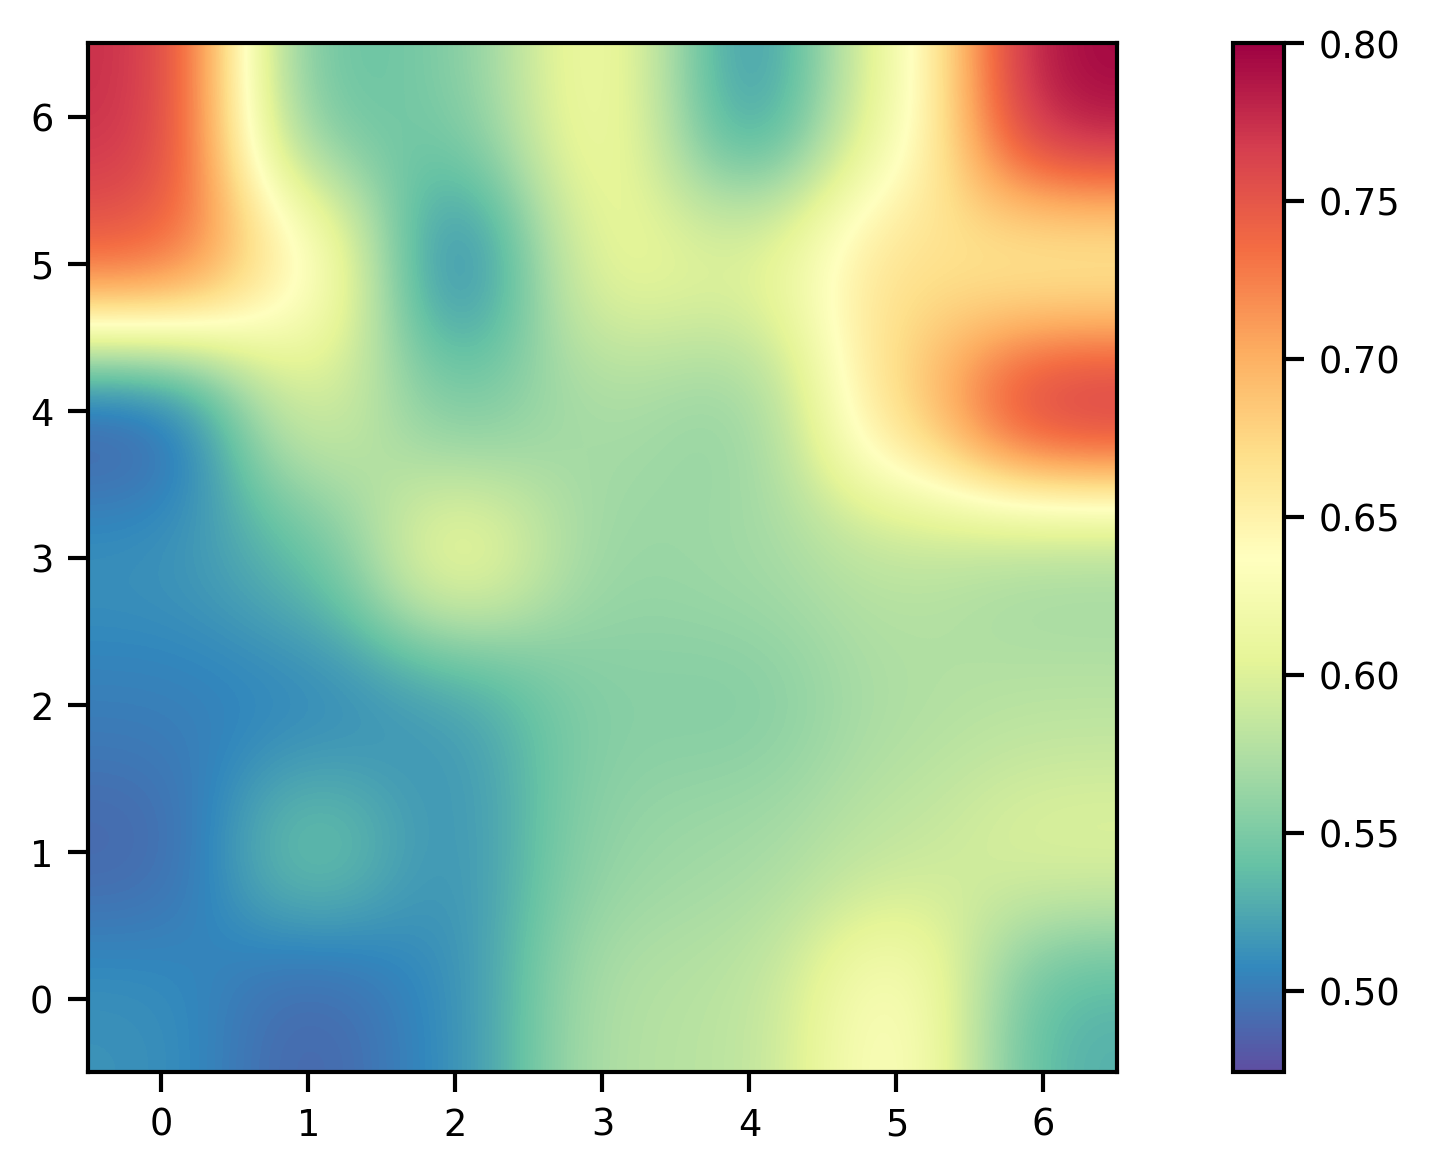

In [88]:
plot_df['rpe_bin'] = pd.cut(plot_df.zrpe, bins=np.linspace(-1.5, 1.5, 10))
plot_df['pm_bin'] = pd.cut(plot_df.zpm, bins=np.linspace(-1.5, 1.5, 10))

heatmap_data = plot_df.pivot_table(values='hits', index='pm_bin', columns='rpe_bin', aggfunc=np.nanmean)

f, ax = plt.subplots(1,1, dpi=300, figsize=(8,4))
pos = ax.imshow(heatmap_data, cmap = 'Spectral_r', interpolation='gaussian', aspect='equal')
ax.invert_yaxis()
f.colorbar(pos, ax=ax)
f.tight_layout()



In [40]:
# Prep a list to store results 
all_res = []     
        
        
# Get reward percentage per person 
full_data['reward_percentage'] = np.nan
grouped_df = full_data.groupby('participant')['reward'].sum()
for pid in full_data['participant'].unique():
    full_data['reward_percentage'][full_data.participant==pid] = grouped_df[pid]

model_df = full_data[['hits', 'false_alarms', 'misses', 'correct_rejections', 'rpe', 'pm', 'dprime', 'trials_in_block',
                           'alpha', 'beta', 'age', 'Sex', 'reward', 'participant', 'hit_rate', 'reward_percentage',
                           'false_alarm_rate', 'gamble_rt_log', 'recog_rt_log', 'image_type']].copy()



# Make a new response variable, memory outcome 
model_df['memory_outcome'] = model_df[['hits', 'misses', 'correct_rejections', 
                                       'false_alarms']].idxmax(1).to_frame('memory_outcome')

print(f"Dataset has a balance of {balance(model_df['memory_outcome'])} between memory choices")

# CODE THE VARIABLES: 
model_df['memory_outcome'][model_df['memory_outcome'].isin(['misses', 'false_alarms'])] = 0
model_df['memory_outcome'][model_df['memory_outcome'].isin(['hits', 'correct_rejections'])] = 1


# Subject level traits need to be filled across NaNs
model_df['alpha'] = model_df.groupby('participant')['alpha'].ffill()
model_df['alpha'] = model_df.groupby('participant')['alpha'].bfill()
# model_df['alpha_neg'] = model_df.groupby('participant')['alpha_neg'].ffill()
# model_df['alpha_neg'] = model_df.groupby('participant')['alpha_neg'].bfill()
model_df['beta'] = model_df.groupby('participant')['beta'].ffill()
model_df['beta'] = model_df.groupby('participant')['beta'].bfill()

# 1/2/24: add in the 'absolute_error'
model_df['abs_rpe'] = np.abs(model_df.rpe)
            
# Define the dependent variable and the independent variables
dependent_var = 'memory_outcome'
independent_vars = ['rpe', 'pm', 'age', 'alpha', 'beta', 'Sex', 'trials_in_block', 'reward_percentage', 'abs_rpe', 'reward']

# Set response variable as int
model_df[dependent_var] = model_df[dependent_var].astype(int)
# Zscore independent variables: 
for factor in independent_vars: 
    if factor not in ['Sex', 'reward']:
        # Set nan's to 0 to capture the LACK of RPE 
        if factor == 'rpe':
            model_df[f'{factor}'] = model_df[f'{factor}'].fillna(0)        
        if factor in ['pm', 'rpe', 'abs_rpe']:
            model_df[f'z{factor}'] = np.nan
            for subj in model_df.participant.unique(): 
                model_df[f'z{factor}'][model_df.participant==subj] = (model_df[factor][model_df.participant==subj].values - np.nanmean(model_df[factor][model_df.participant==subj].values)) / (2*np.nanstd(model_df[factor][model_df.participant==subj].values))
        else: 
            model_df[f'z{factor}'] = (model_df[factor].values - np.nanmean(model_df[factor].values)) / (2*np.nanstd(model_df[factor].values))

                

Dataset has a balance of 0.947227177292692 between memory choices


Figure S1C

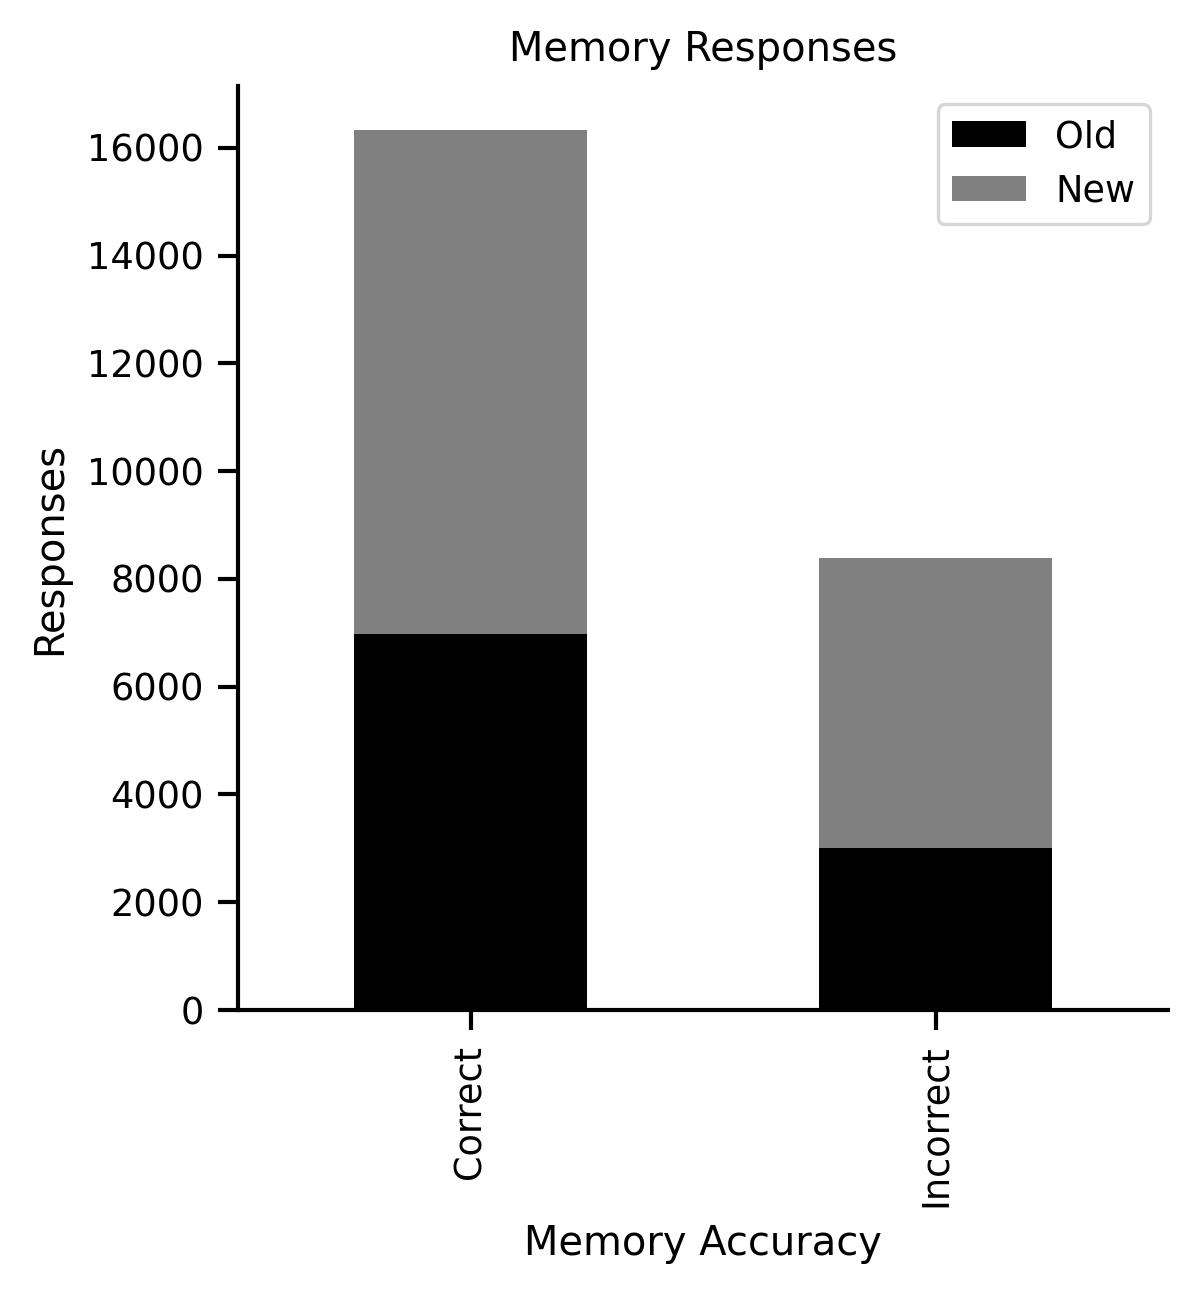

In [11]:
# create DataFrame
with PdfPages(f'{save_dir_plots}/Exp1_MemoryChoiceBalance.pdf') as pdf:    

    f, ax = plt.subplots(1,1, dpi=300, figsize=(4,4))

    df = pd.DataFrame({'Old': [model_df.hits.sum(), model_df.false_alarms.sum()],
                       'New': [model_df.correct_rejections.sum(), model_df.misses.sum()]},
                      index=['Correct', 'Incorrect'])

    df.plot(kind='bar', stacked=True, color=['black', 'grey'], ax=ax)

    ax.set(xlabel='Memory Accuracy', ylabel='Responses', title='Memory Responses')
    sns.despine()
    pdf.savefig(f)


In [94]:
y = 'memory_outcome'
X = ['zrpe', 'zpm', 'zage', 'Sex', 'zalpha', 'zbeta', 'zreward_percentage', 'ztrials_in_block']
# ztrials_gamble
within_subject_X = ['zrpe', 'zpm']
Intx = None
# ['zreward_percentage:zrpe', 'zreward_percentage:zpm']
rand_effect = ['participant']
categorical = ['Sex']

# Drop nan data
model_df = model_df.dropna(subset=X)

if __name__ == "__main__":
    model1, results1 = run_model(model_df, y=y, X=X, Intx=Intx, rand_effect=rand_effect, rand_slopes=True, within_subject_X=within_subject_X,
                               priors=None, categorical=categorical, cores=1, chains=4, tune=1000, draws=1000, 
                               target_accept=0.85, model_fam='bernoulli', 
                               output_dir='/sc/arion/projects/guLab/Salman/MemoryBanditManuscript/', 
                               return_model=True,
                               categorical_baseline=True, 
                               save_model_res = True, 
                               label=None)


memory_outcome ~ 1+(1|participant)+zrpe+zpm+zage+Sex+zalpha+zbeta+zreward_percentage+ztrials_in_block+(zrpe|participant)+(zpm|participant)


Modeling the probability that memory_outcome==1
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [Intercept, zrpe, zpm, zage, Sex, zalpha, zbeta, zreward_percentage, ztrials_in_block, 1|participant_sigma, 1|participant_offset, zrpe|participant_sigma, zrpe|participant_offset, zpm|participant_sigma, zpm|participant_offset]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 459 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


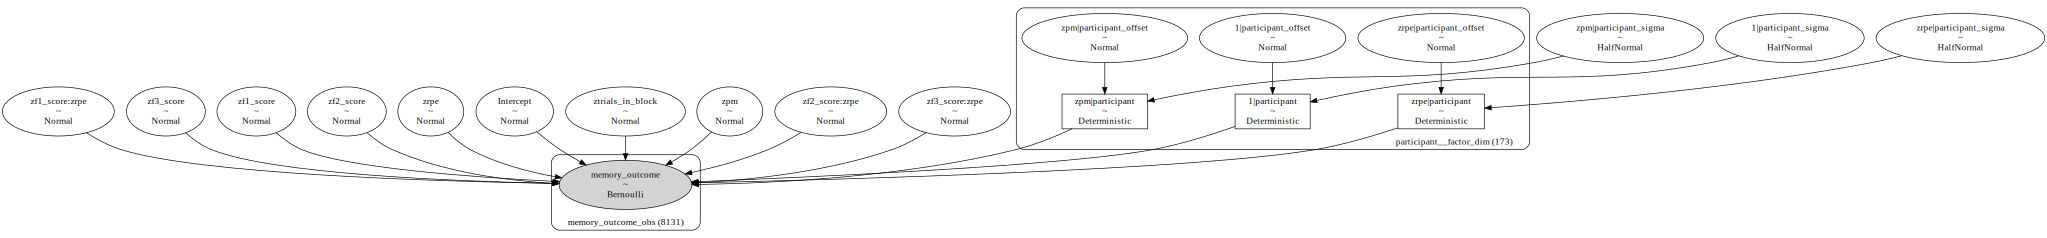

In [175]:
model1.graph(name='/sc/arion/projects/guLab/Salman/MemoryBanditManuscript/Figures/Exp1_graphical_model_big', 
            dpi=300, 
           fmt = 'pdf')

**Figure 3A**

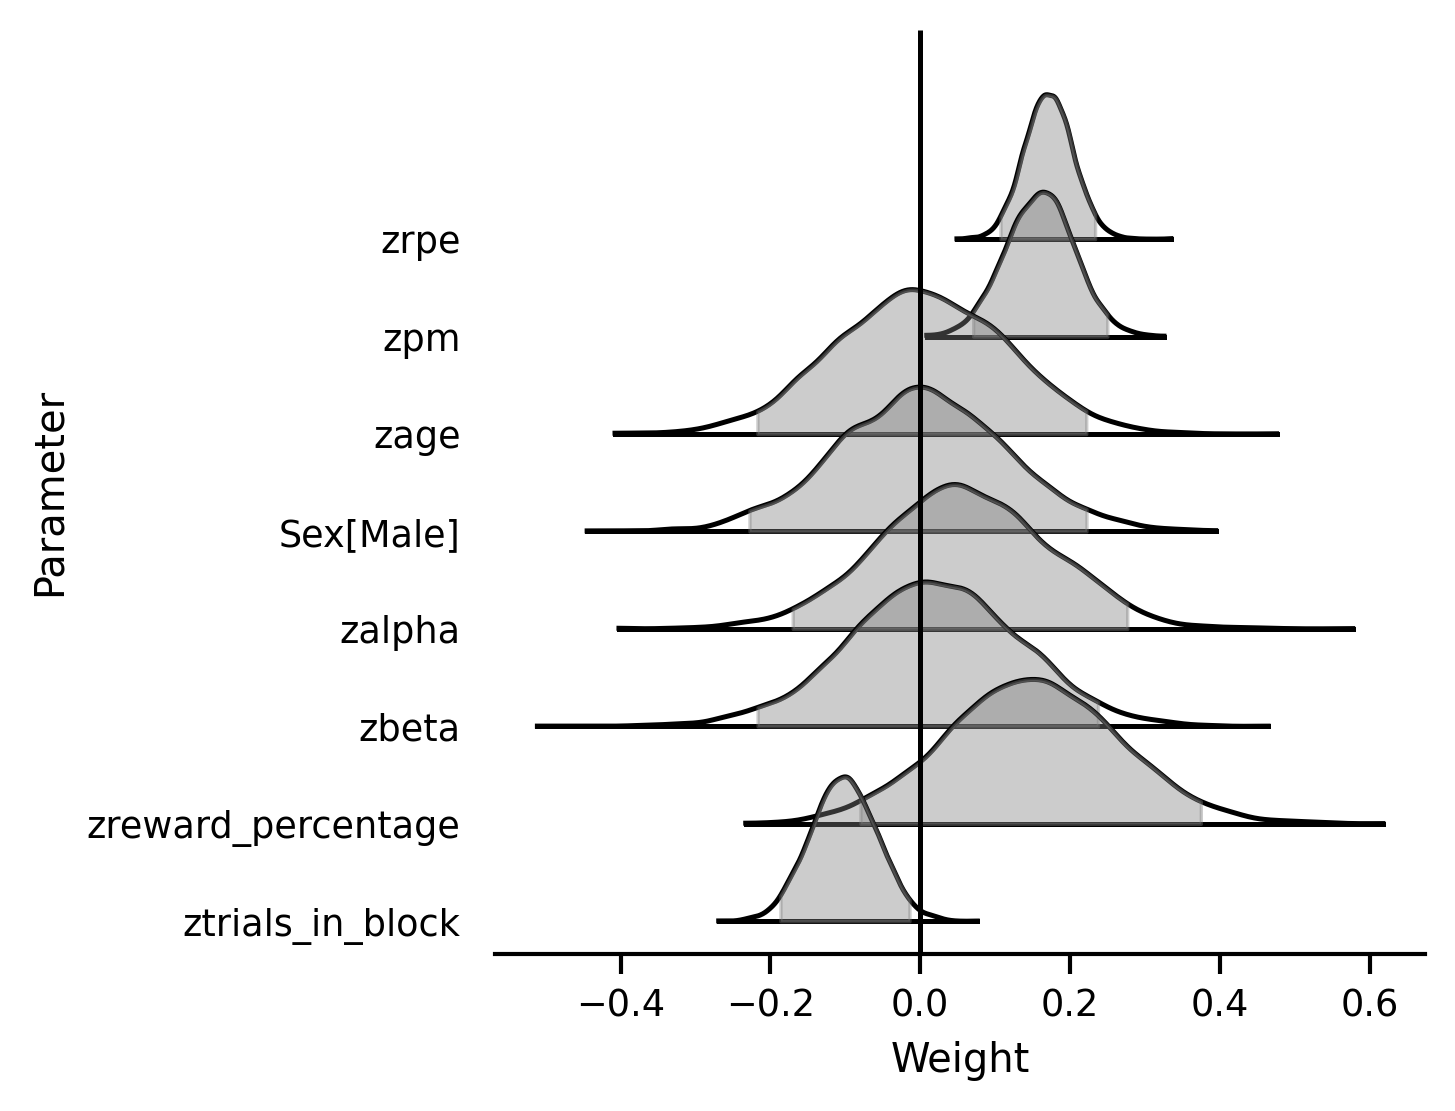

In [142]:

f, ax = plt.subplots(1,1, dpi=300, figsize=(4,4))
ax.set(xlabel='Weight', ylabel='Parameter')
sns.despine()
plot_res(results, X, ax=ax)




## Model 1:

Now we do the individual subject level models to get a sense of individual 

In [144]:
# Prep a list to store results 
all_res = [] 

full_data['img_cat'] = full_data.apply(lambda x: 'male' if x.male==1 else 'female', axis=1)

model_df = full_data[['hits', 'false_alarms', 'misses', 'correct_rejections', 'rpe', 'image_dprime', 'dprime', 
                      'alpha', 'beta', 'age', 'Sex', 'reward', 'participant', 'hit_rate', 
                      'false_alarm_rate', 'gamble_rt_log', 'recog_rt_log', '_merge', 'img_cat']].copy()


model_df.rename(columns={'image_dprime':'pm'}, inplace=True)


# Make a new response variable, memory outcome 
model_df['memory_outcome'] = model_df[['hits', 'misses', 'correct_rejections', 
                                       'false_alarms']].idxmax(1).to_frame('memory_outcome')

# CODE THE VARIABLES: 
model_df['memory_outcome'][model_df['memory_outcome'].isin(['misses', 'false_alarms'])] = 0
model_df['memory_outcome'][model_df['memory_outcome'].isin(['hits', 'correct_rejections'])] = 1


# Define the dependent variable and the independent variables
dependent_var = 'hits'
independent_vars = ['rpe', 'pm']

# Set response variable as in 
model_df[dependent_var] = model_df[dependent_var].astype(int)
# Zscore independent variables: 
for factor in independent_vars: 
    model_df[f'z{factor}'] = zscore(model_df[factor], nan_policy='omit').values 
    # Set nan's to 0 to capture the LACK of RPE 
#     model_df[f'z{factor}'] = model_df[f'z{factor}'].fillna(0)

independent_vars = ['zrpe', 'zpm']

all_participants = model_df.participant.unique()
model_betas = [] 

for pid in all_participants:
    dfs = [] 
    models = {} 
    subj_df = model_df[model_df.participant==pid]
    
    # make regression weights based on response var frequency
    y_ind = subj_df[dependent_var].astype(int)
    recip_freq = 1. / np.bincount(y_ind)
    recip_freq /= np.mean(recip_freq)
    wts = recip_freq[y_ind]
    
    if (y_ind.sum()<10)  | (y_ind.sum()>110):
        print(subj_df.dprime.mean(), y_ind.sum())
        print('model failure - not enough successes')
        continue
    else:
        # Make the model formula
        formula = f'{dependent_var} ~ 1+'+'+'.join(independent_vars)
        # Make the model
        model = smf.glm(formula = formula, 
                        family=sm.families.Binomial(), 
                        data=subj_df, 
                        freq_weights=wts)
        # Set the baseline 
        model._ynames_map = {0: 0, 1: 1}
        # Fit the model 
        try:
            results = model.fit()
        except:
            print('model failure - perfect separation')
            continue

    # Collect the individual subject model results. 
    glm_df_temp = results.params.to_dict()
    glm_df = pd.DataFrame(columns=['subj_dprime', 'participant', 'alpha_pos', 'alpha_neg', 'beta'])
    glm_df['GLMBeta'] = list(glm_df_temp.values())
    glm_df['GLMFactor'] = list(glm_df_temp.keys())
    glm_df['subj_dprime'] = subj_df.dprime.mean()
    glm_df['subj_reward'] = subj_df.reward.sum()
    glm_df['subj_rpe'] = subj_df.rpe.mean() 
    glm_df['subj_HR'] = subj_df.hit_rate.mean()
    glm_df['subj_FAR'] = subj_df.false_alarm_rate.mean()
    glm_df['subj_gamble_rt'] = subj_df.gamble_rt_log.mean()
    glm_df['subj_recog_rt'] = subj_df.recog_rt_log.mean()
#     glm_df['alpha_pos'] = subj_df.alpha_pos.mean()
#     glm_df['alpha_neg'] = subj_df.alpha_neg.mean()
    glm_df['alpha'] = subj_df.alpha.mean()
    glm_df['beta'] = subj_df.beta.mean()
    glm_df['participant'] = pid
    glm_df['zrpe_weight'] = glm_df_temp['zrpe']
    glm_df['zpm_weight'] = glm_df_temp['zpm']
    glm_df['zrpe_weight_mm'] = result_csv[(result_csv['participant'].str.contains(pid)) & (result_csv.parameter=='zrpe_weight')]['mean'].values[0]
    glm_df['zpm_weight_mm'] = result_csv[(result_csv['participant'].str.contains(pid)) & (result_csv.parameter=='zpm_weight')]['mean'].values[0]


    model_betas.append(glm_df)
model1_df = pd.concat(model_betas)
model1_df.reset_index(drop=True, inplace=True)

# # Group the data by participant 
model1_df_subj = model1_df.groupby(['participant']).mean().reset_index()
model1_df_subj = model1_df_subj.merge(model1_df['participant'], on='participant').drop_duplicates()





nan 0
model failure - not enough successes
0.2618594998508348 5
model failure - not enough successes
0.7974812463221248 9
model failure - not enough successes


/tmp/ipykernel_176264/2918800535.py:101: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  model1_df_subj = model1_df.groupby(['participant']).mean().reset_index()


Text(0, 0.5, 'coefficient (subject-level)')

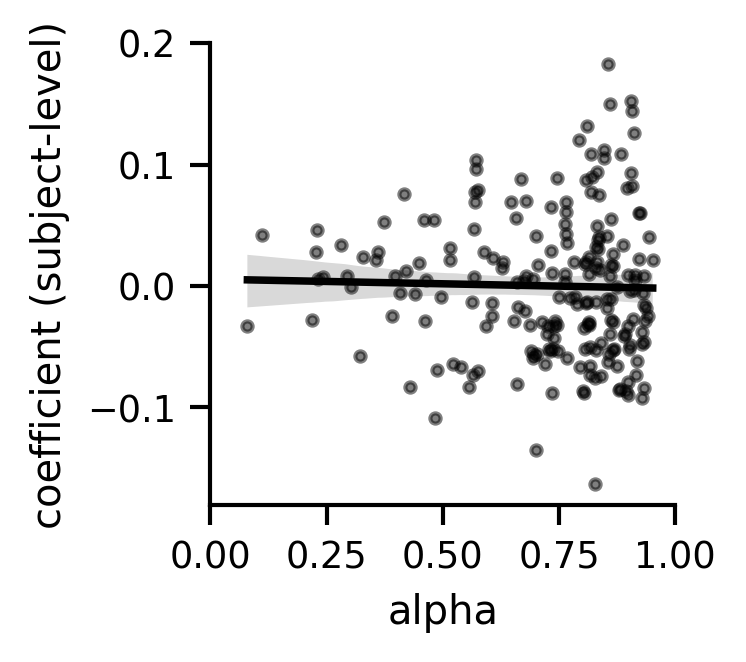

In [127]:
f, ax = plt.subplots(1,1, dpi=300, figsize=(2,2))
sns.regplot(data=model1_df_subj, x='alpha', y='zrpe_weight_mm', 
            color = 'black', ci=95, scatter_kws={'s':6, 'alpha':0.5})
sns.despine()
ax.set(xticks=np.linspace(0,1,5), ylabel="subject d'")
ax.set_ylabel('coefficient (subject-level)')

In [38]:
spearmanr(model1_df_subj.alpha, 
         model1_df_subj.zrpe_weight_mm)

SignificanceResult(statistic=-0.04136703300984701, pvalue=0.5559174433069654)

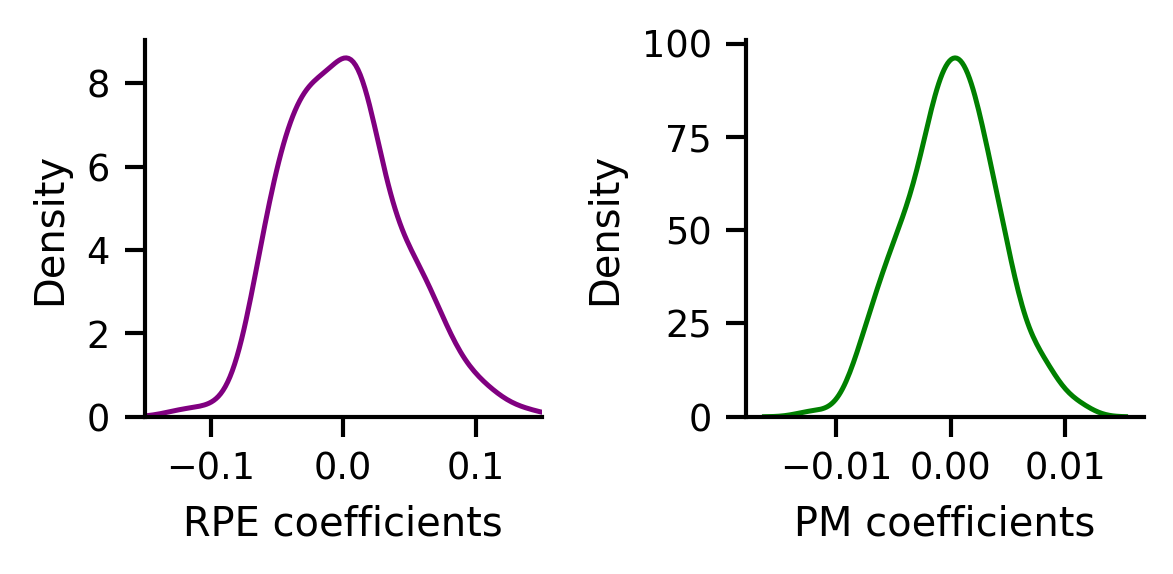

In [534]:
with PdfPages(f'{save_dir_plots}/Exp1_Posteriors_Individ.pdf') as pdf:    
    f, ax = plt.subplots(1,2, dpi=300, figsize=(4,2))
    sns.kdeplot(data=model1_df_subj, x='zrpe_weight_mm', ax=ax[0], color = 'purple')
    sns.kdeplot(data=model1_df_subj, x='zpm_weight_mm', ax=ax[1], color = 'green')
    sns.despine()
    ax[0].set(xlabel='RPE coefficients', xlim=[-0.15, 0.15])
    ax[1].set(xlabel='PM coefficients')
    f.tight_layout()
    pdf.savefig()

In [119]:
from scipy.stats import ttest_1samp

In [120]:
ttest_1samp(model1_df_subj.zpm_weight_mm, popmean=0)

TtestResult(statistic=0.11004194745158469, pvalue=0.9124842849236784, df=204)

<AxesSubplot: xlabel='zrpe_weight', ylabel='zrpe_weight_mm'>

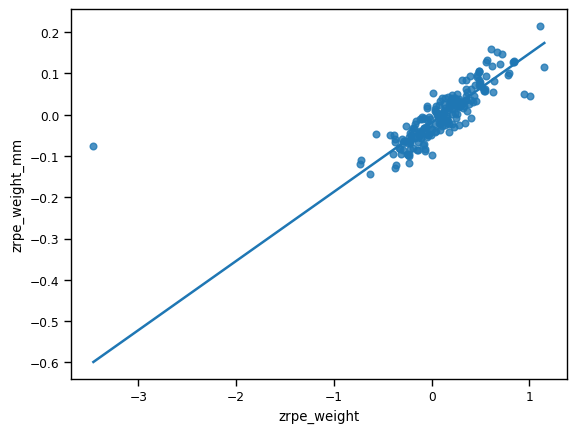

In [145]:
sns.regplot(data=model1_df_subj, x='zrpe_weight', y='zrpe_weight_mm', robust=True, ci=None)

<AxesSubplot: xlabel='zpm_weight', ylabel='zpm_weight_mm'>

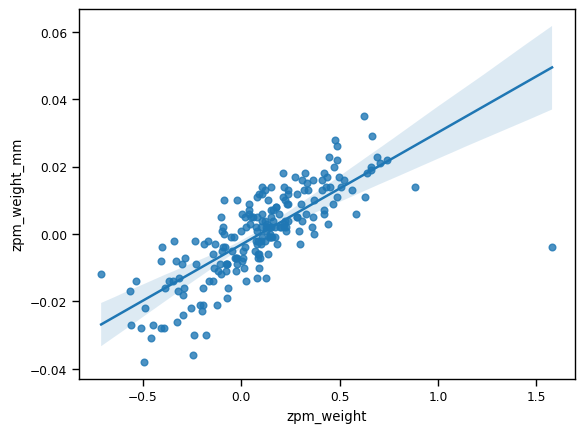

In [146]:
sns.regplot(data=model1_df_subj, x='zpm_weight', y='zpm_weight_mm')

[Text(0.5, 0, 'Model Factor'), Text(0, 0.5, 'Coefficient')]

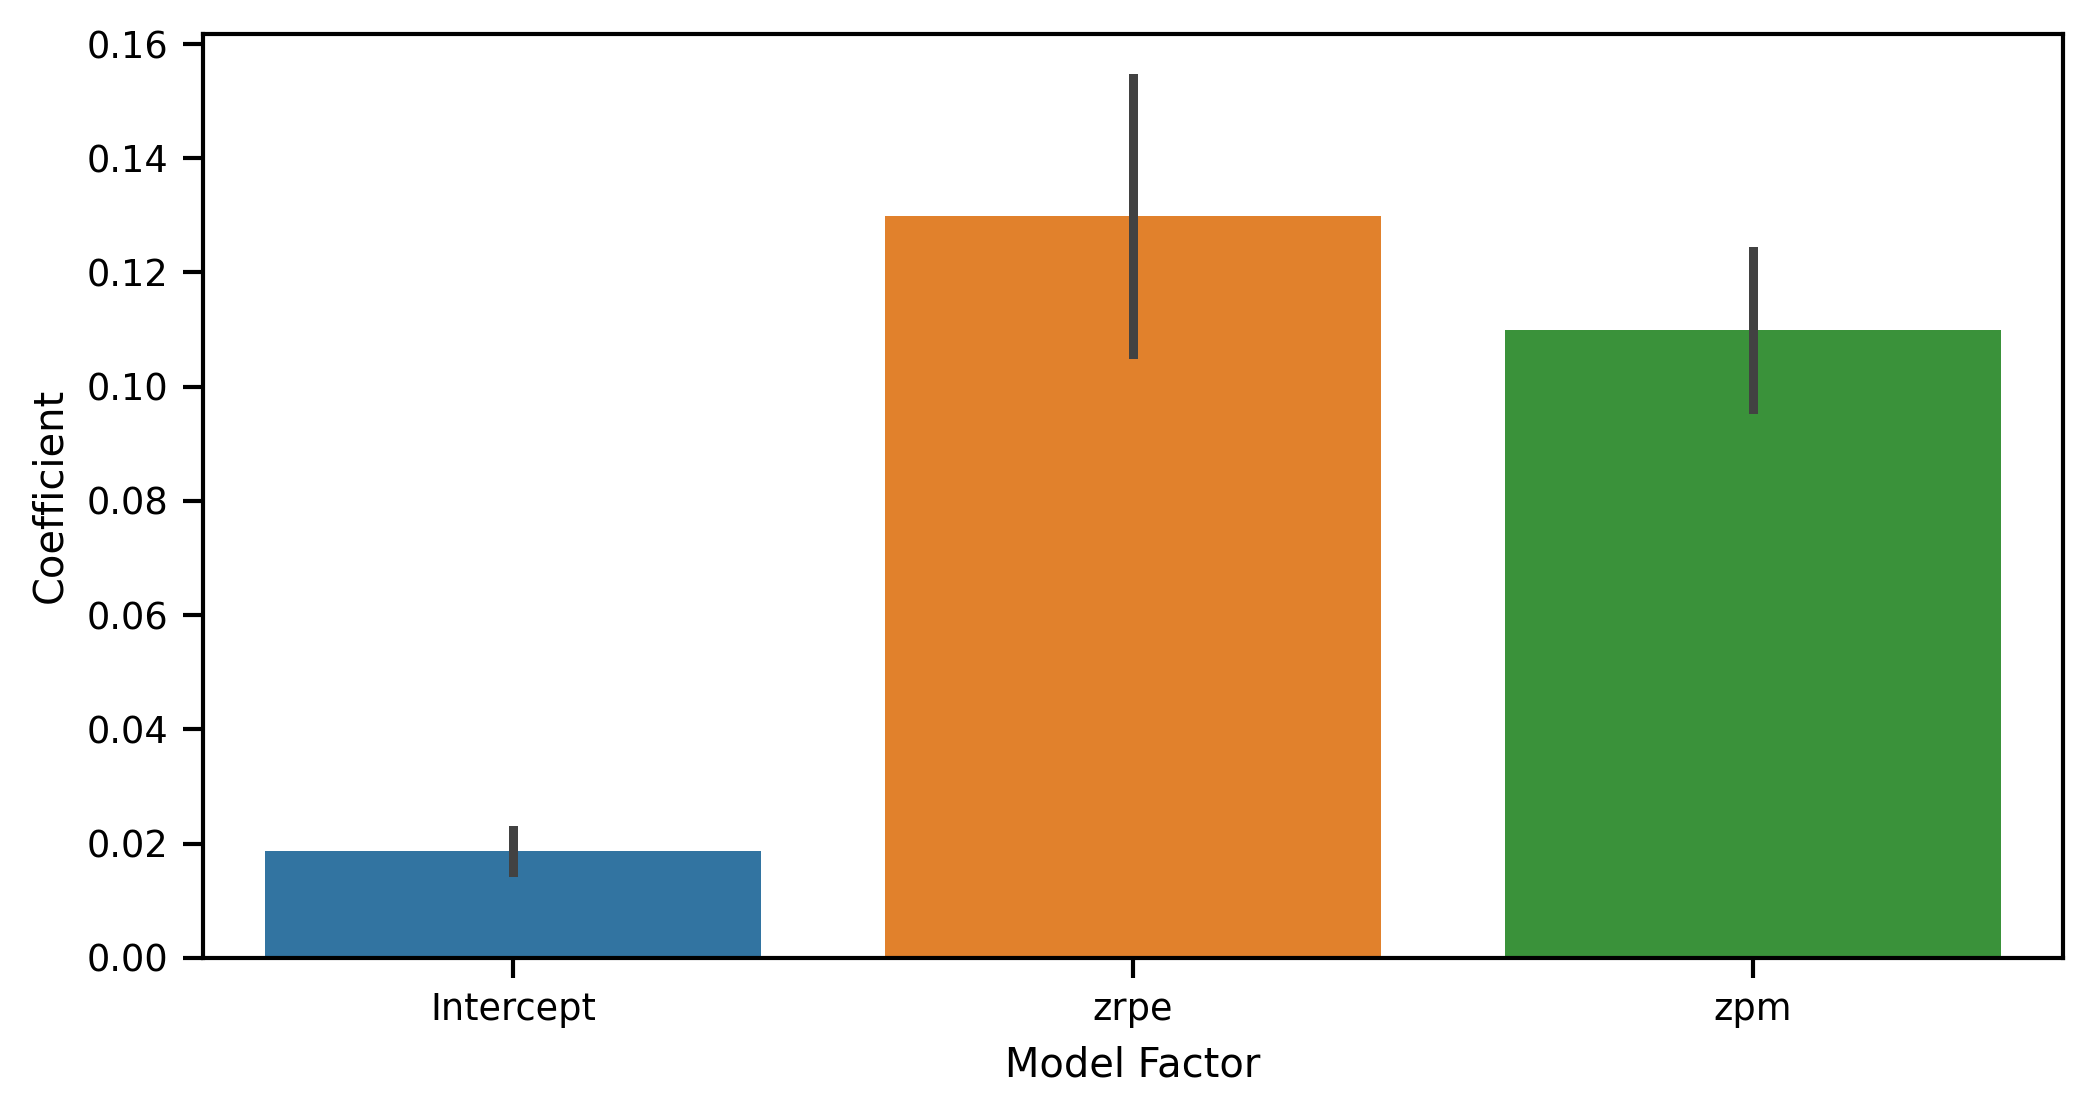

In [116]:
f, ax = plt.subplots(1,1, dpi=300, figsize=(8,4))
sns.barplot(data=model1_df, x='GLMFactor', y='GLMBeta', errorbar='se')
ax.set(xlabel='Model Factor', ylabel='Coefficient')

In [421]:
save_dir_plots

'/sc/arion/projects/guLab/Salman/MemoryBanditManuscript/Figures/Exp1'

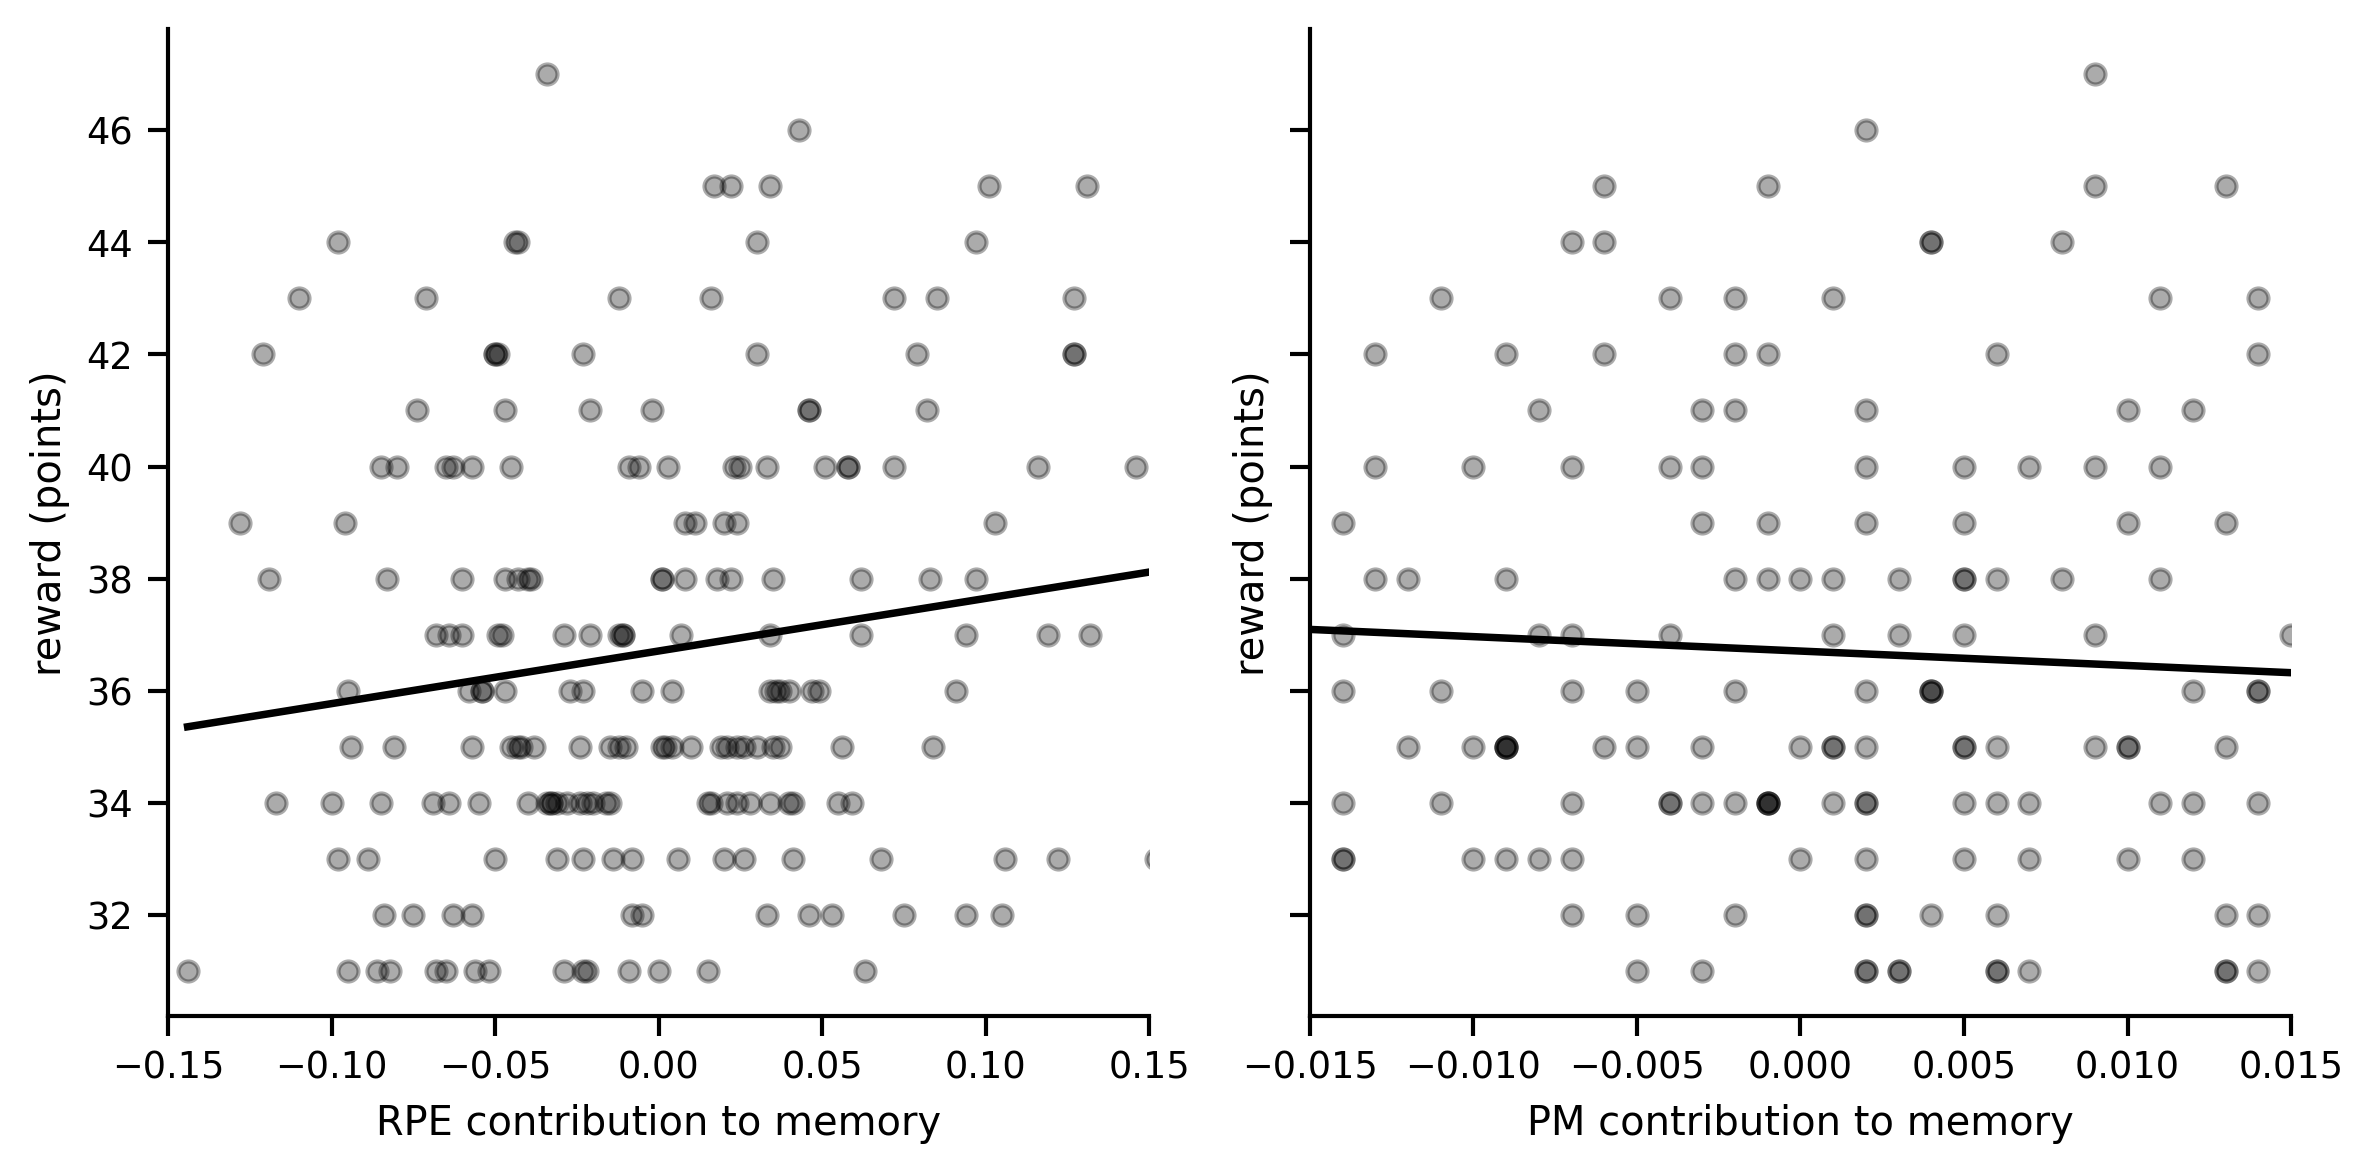

In [147]:
# sns.regplot(data=subj_mean_df, x='subj_dprime', y='aucs')
# with PdfPages(f'{save_dir_plots}/Exp1_Model1_Reward_Weights.pdf') as pdf:    
f, ax = plt.subplots(1,2, dpi=300, figsize=(8,4), sharey=True)
sns.regplot(data=model1_df_subj, y='subj_reward', x='zrpe_weight_mm', ci=None, ax=ax[0], scatter_kws={'alpha':0.33}, color='k')
sns.regplot(data=model1_df_subj, y='subj_reward', x='zpm_weight_mm', ci=None, ax=ax[1], scatter_kws={'alpha':0.33}, color='k')
ax[0].set(ylabel = 'reward (points)', xlabel='RPE contribution to memory', xlim=[-0.15, 0.15])
ax[1].set(ylabel = 'reward (points)', xlabel='PM contribution to memory', xlim=[-0.015, 0.015])
sns.despine()
f.tight_layout()
#     pdf.savefig()

In [148]:
r1, p1 = pearsonr(model1_df_subj.zrpe_weight_mm, 
        model1_df_subj.subj_reward)
r2, p2 = pearsonr(model1_df_subj.zpm_weight_mm, 
        model1_df_subj.subj_reward)
F, p = compare_corr(r1, r2, 
                    model1_df_subj.subj_reward.shape[0], model1_df_subj.subj_reward.shape[0])
print(F, p )

2.45637855962898 0.014034522812861994


In [149]:
r1

0.15565017398673034

In [150]:
p1

0.026588138513233515

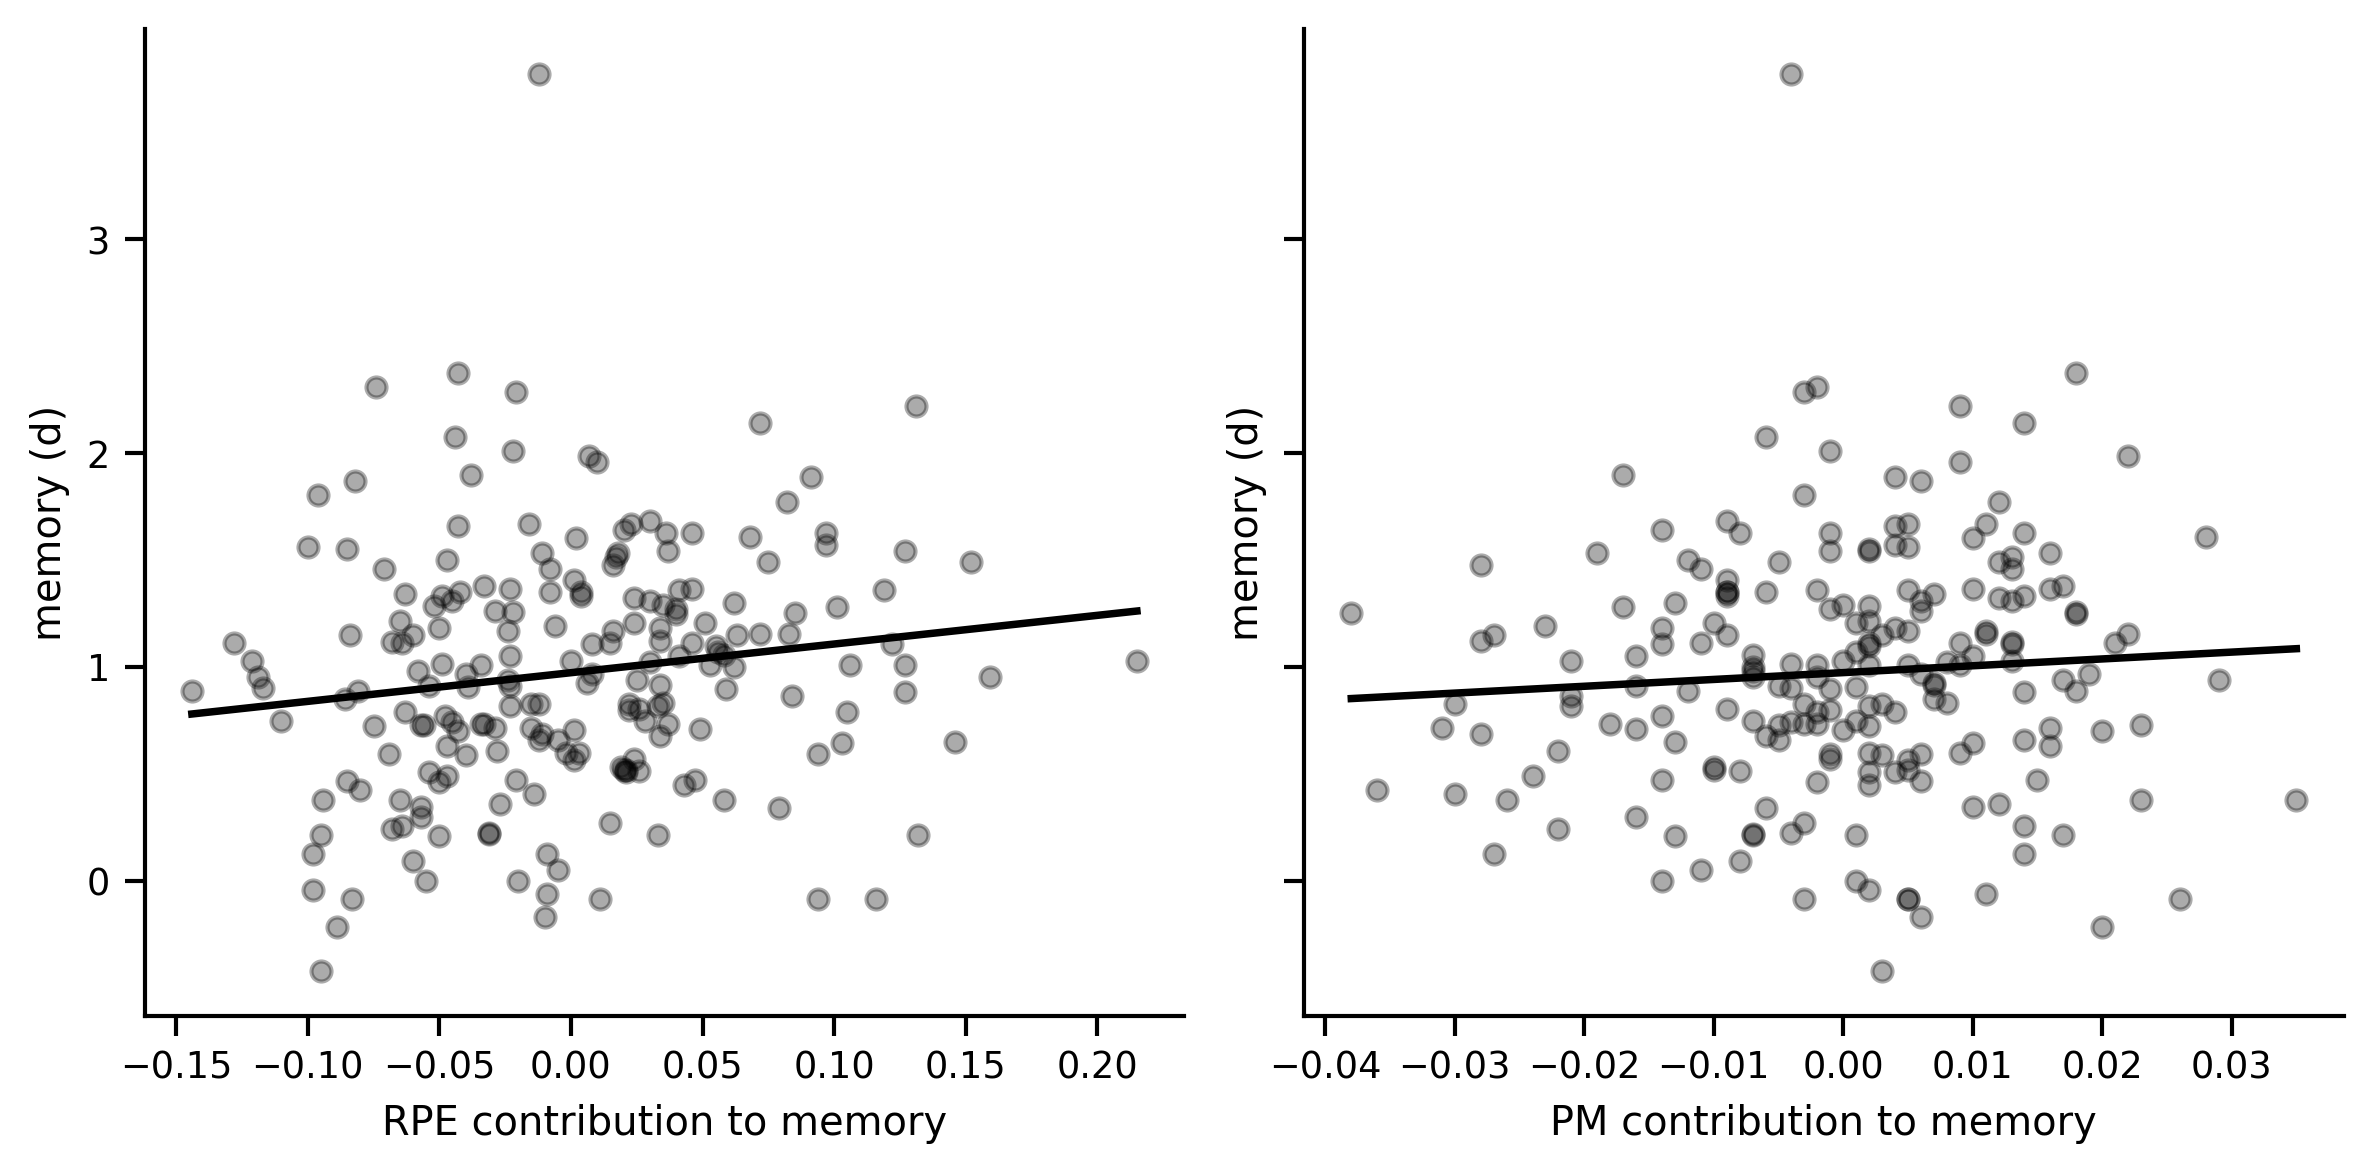

In [151]:
# sns.regplot(data=subj_mean_df, x='subj_dprime', y='aucs')
# with PdfPages(f'{save_dir_plots}/Exp1_Fig_LogRegress_WeightsvMemory.pdf') as pdf:    
f, ax = plt.subplots(1,2, dpi=300, figsize=(8,4), sharey=True)
sns.regplot(data=model1_df_subj, x='zrpe_weight_mm', y='subj_dprime', ci=None, ax=ax[0], scatter_kws={'alpha':0.33}, color='k')
sns.regplot(data=model1_df_subj, x='zpm_weight_mm', y='subj_dprime', ci=None, ax=ax[1], scatter_kws={'alpha':0.33}, color='k')
ax[0].set(xlabel = 'RPE contribution to memory', ylabel='memory (d)')
ax[1].set(xlabel = 'PM contribution to memory', ylabel='memory (d)')
sns.despine()
f.tight_layout()
#     pdf.savefig()

In [152]:
r1, p1 = pearsonr(model1_df_subj.dropna(subset='subj_dprime').zrpe_weight_mm, 
        model1_df_subj.dropna(subset='subj_dprime').subj_dprime)

In [153]:
r1

0.14934762894026324

In [154]:
p1

0.03344685025207338

In [155]:
r1, p1 = pearsonr(model1_df_subj.dropna(subset='subj_dprime').zrpe_weight_mm, 
        model1_df_subj.dropna(subset='subj_dprime').subj_dprime)
r2, p2 = pearsonr(model1_df_subj.dropna(subset='subj_dprime').zpm_weight_mm, 
        model1_df_subj.dropna(subset='subj_dprime').subj_dprime)
F, p = compare_corr(r1, r2, 
                    model1_df_subj.dropna(subset='subj_dprime').subj_dprime.shape[0], 
                    model1_df_subj.dropna(subset='subj_dprime').subj_dprime.shape[0])
print(F, p )

0.7657682511914774 0.4438142083462602


In [435]:
r2

-0.011062787283838905

Let's look at other relationships between the model coefficients and other stuff:

<AxesSubplot: xlabel='zpm_weight_mm', ylabel='zrpe_weight_mm'>

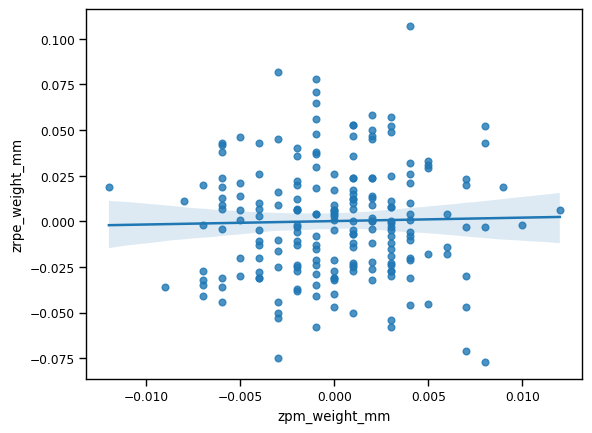

In [50]:
sns.regplot(data=model1_df_subj, x='zpm_weight_mm', y='zrpe_weight_mm')

In [68]:
pearsonr(model1_df_subj.zrpe_weight_mm, 
        model1_df_subj.subj_rpe)

PearsonRResult(statistic=0.19776392735775997, pvalue=0.004478071147050726)

More reward = more rpe, but reward is more predictive of RPE weight than total RPE. 

## Model 2: 

This model has two models, combined. I didn't go this route

In [81]:
# # Prep a list to store results 
# all_res = [] 

# # full_data['img_cat'] = full_data.apply(lambda x: 'male' if x.male==1 else 'female', axis=1)

# model_df = full_data[['hits', 'false_alarms', 'misses', 'correct_rejections', 'rpe', 'image_dprime', 'dprime', 
#                       'alpha_pos', 'alpha_neg', 'beta', 'age', 'Sex', 'reward', 'participant', 'hit_rate', 
#                       'false_alarm_rate', 'gamble_rt_log', 'recog_rt_log', '_merge']].copy()

# model_df.rename(columns={'image_dprime':'pm'}, inplace=True)


# # Make a new response variable, memory outcome 
# model_df['memory_outcome'] = model_df[['hits', 'misses', 'correct_rejections', 
#                                        'false_alarms']].idxmax(1).to_frame('memory_outcome')

# # CODE THE VARIABLES: 
# model_df['memory_outcome'][model_df['memory_outcome'].isin(['hits'])] = 1
# model_df['memory_outcome'][model_df['memory_outcome'].isin(['correct_rejections'])] = 0

# # Get rid of bad memory
# model_df['memory_outcome'][model_df['memory_outcome'].isin(['misses', 'false_alarms'])] = np.nan
# model_df = model_df[~model_df.memory_outcome.isna()]

# # Define the dependent variable and the independent variables
# dependent_var = 'memory_outcome'
# independent_vars = ['rpe', 'pm']

# # Set response variable as in 
# model_df[dependent_var] = model_df[dependent_var].astype(int)
# # Zscore independent variables: 
# for factor in independent_vars: 
#     model_df[f'z{factor}'] = zscore(model_df[factor], nan_policy='omit').values 
#     # Set nan's to 0 to capture the LACK of RPE 
#     model_df[f'z{factor}'] = model_df[f'z{factor}'].fillna(0)

# independent_vars = ['zrpe', 'zpm']

# all_participants = model_df.participant.unique()
# model_betas = [] 

# for pid in all_participants:
#     dfs = [] 
#     models = {} 
#     subj_df = model_df[model_df.participant==pid]
    
#     # make regression weights based on response var frequency
#     y_ind = subj_df.memory_outcome.astype(int)
#     recip_freq = 1. / np.bincount(y_ind)
#     recip_freq /= np.mean(recip_freq)
#     wts = recip_freq[y_ind]
    
#     if y_ind.sum()<10:
#         print(subj_df.dprime.mean(), y_ind.sum())
#         print('model failure - not enough successes')
#         continue
#     else:
#         # Make the model formula
#         formula = f'{dependent_var} ~ 1+'+'+'.join(independent_vars)
#         # Make the model
#         model = smf.glm(formula = formula, family=sm.families.Binomial(), data=subj_df, freq_weights=wts)
#         # Set the baseline 
#         model._ynames_map = {0: 0, 1: 1}
#         # Fit the model 
#         results = model.fit()

#     # Collect the individual subject model results. 
#     glm_df_temp = results.params.to_dict()
#     glm_df = pd.DataFrame(columns=['subj_dprime', 'participant', 'alpha_pos', 'alpha_neg', 'beta'])
#     glm_df['GLMBeta'] = list(glm_df_temp.values())
#     glm_df['GLMFactor'] = list(glm_df_temp.keys())
#     glm_df['subj_dprime'] = subj_df.dprime.mean()
#     glm_df['subj_reward'] = subj_df.reward.sum()
#     glm_df['subj_rpe'] = subj_df.rpe.mean() 
#     glm_df['subj_HR'] = subj_df.hit_rate.mean()
#     glm_df['subj_FAR'] = subj_df.false_alarm_rate.mean()
#     glm_df['subj_gamble_rt'] = subj_df.gamble_rt_log.mean()
#     glm_df['subj_recog_rt'] = subj_df.recog_rt_log.mean()
#     glm_df['alpha_pos'] = subj_df.alpha_pos.mean()
#     glm_df['alpha_neg'] = subj_df.alpha_neg.mean()
#     glm_df['beta'] = subj_df.beta.mean()
#     glm_df['participant'] = pid
#     glm_df['zrpe_weight'] = glm_df_temp['zrpe']
#     glm_df['zrpe_bse'] = results.bse['zrpe']
#     glm_df['zpm_weight'] = glm_df_temp['zpm']
#     glm_df['zpm_bse'] = results.bse['zpm']

#     model_betas.append(glm_df)
# model2_df1 = pd.concat(model_betas)
# model2_df1.reset_index(drop=True, inplace=True)

# # # Group the data by participant 
# model2_df1_subj = model2_df1.groupby(['participant']).mean().reset_index()
# model2_df1_subj = model2_df1_subj.merge(model2_df1['participant'], on='participant').drop_duplicates()





In [82]:
# # Prep a list to store results 
# all_res = [] 

# # full_data['img_cat'] = full_data.apply(lambda x: 'male' if x.male==1 else 'female', axis=1)

# model_df = full_data[['hits', 'false_alarms', 'misses', 'correct_rejections', 'rpe', 'image_dprime', 'dprime', 
#                       'alpha_pos', 'alpha_neg', 'beta', 'age', 'Sex', 'reward', 'participant', 'hit_rate', 
#                       'false_alarm_rate', 'gamble_rt_log', 'recog_rt_log', '_merge']].copy()

# model_df.rename(columns={'image_dprime':'pm'}, inplace=True)


# # Make a new response variable, memory outcome 
# model_df['memory_outcome'] = model_df[['hits', 'misses', 'correct_rejections', 
#                                        'false_alarms']].idxmax(1).to_frame('memory_outcome')

# # CODE THE VARIABLES: 
# model_df['memory_outcome'][model_df['memory_outcome'].isin(['misses'])] = 1
# model_df['memory_outcome'][model_df['memory_outcome'].isin(['false_alarms'])] = 0

# # Get rid of bad memory
# model_df['memory_outcome'][model_df['memory_outcome'].isin(['hits', 'correct_rejections'])] = np.nan
# model_df = model_df[~model_df.memory_outcome.isna()]

# # Define the dependent variable and the independent variables
# dependent_var = 'memory_outcome'
# independent_vars = ['rpe', 'pm']

# # Set response variable as in 
# model_df[dependent_var] = model_df[dependent_var].astype(int)
# # Zscore independent variables: 
# for factor in independent_vars: 
#     model_df[f'z{factor}'] = zscore(model_df[factor], nan_policy='omit').values 
#     # Set nan's to 0 to capture the LACK of RPE 
#     model_df[f'z{factor}'] = model_df[f'z{factor}'].fillna(0)

# independent_vars = ['zrpe', 'zpm']

# all_participants = model_df.participant.unique()
# model_betas = [] 

# for pid in all_participants:
#     dfs = [] 
#     models = {} 
#     subj_df = model_df[model_df.participant==pid]
    
#     # make regression weights based on response var frequency
#     y_ind = subj_df.memory_outcome.astype(int)
#     recip_freq = 1. / np.bincount(y_ind)
#     recip_freq /= np.mean(recip_freq)
#     wts = recip_freq[y_ind]
    
#     if y_ind.sum()<10:
#         print(subj_df.dprime.mean(), y_ind.sum())
#         print('model failure - not enough successes')
#         continue
#     else:
#         # Make the model formula
#         formula = f'{dependent_var} ~ 1+'+'+'.join(independent_vars)
#         # Make the model
#         model = smf.glm(formula = formula, family=sm.families.Binomial(), data=subj_df, freq_weights=wts)
#         # Set the baseline 
#         model._ynames_map = {0: 0, 1: 1}
#         # Fit the model 
#         results = model.fit()

#     # Collect the individual subject model results. 
#     glm_df_temp = results.params.to_dict()
#     glm_df = pd.DataFrame(columns=['subj_dprime', 'participant', 'alpha_pos', 'alpha_neg', 'beta'])
#     glm_df['GLMBeta'] = list(glm_df_temp.values())
#     glm_df['GLMFactor'] = list(glm_df_temp.keys())
#     glm_df['subj_dprime'] = subj_df.dprime.mean()
#     glm_df['subj_reward'] = subj_df.reward.sum()
#     glm_df['subj_rpe'] = subj_df.rpe.mean() 
#     glm_df['subj_HR'] = subj_df.hit_rate.mean()
#     glm_df['subj_FAR'] = subj_df.false_alarm_rate.mean()
#     glm_df['subj_gamble_rt'] = subj_df.gamble_rt_log.mean()
#     glm_df['subj_recog_rt'] = subj_df.recog_rt_log.mean()
#     glm_df['alpha_pos'] = subj_df.alpha_pos.mean()
#     glm_df['alpha_neg'] = subj_df.alpha_neg.mean()
#     glm_df['beta'] = subj_df.beta.mean()
#     glm_df['participant'] = pid
#     glm_df['zrpe_weight'] = glm_df_temp['zrpe']
#     glm_df['zrpe_bse'] = results.bse['zrpe']
#     glm_df['zpm_weight'] = glm_df_temp['zpm']
#     glm_df['zpm_bse'] = results.bse['zpm']

#     model_betas.append(glm_df)
# model2_df2 = pd.concat(model_betas)
# model2_df2.reset_index(drop=True, inplace=True)

# # # Group the data by participant 
# model2_df2_subj = model2_df2.groupby(['participant']).mean().reset_index()
# model2_df2_subj = model2_df2_subj.merge(model2_df2['participant'], on='participant').drop_duplicates()





In [83]:
# combined_df = model2_df1_subj.merge(model2_df2_subj, on=['participant'])


# combined_df['rpe_contribution'] = (combined_df['zrpe_weight_x'] - combined_df['zrpe_weight_y']) / np.sqrt(combined_df['zrpe_bse_x']**2 + combined_df['zrpe_bse_y']**2)
# combined_df['pm_contribution'] = (combined_df['zpm_weight_x'] - combined_df['zpm_weight_y']) / np.sqrt(combined_df['zpm_bse_x']**2 + combined_df['zpm_bse_y']**2)




<AxesSubplot: xlabel='zrpe_weight', ylabel='rpe_contribution'>

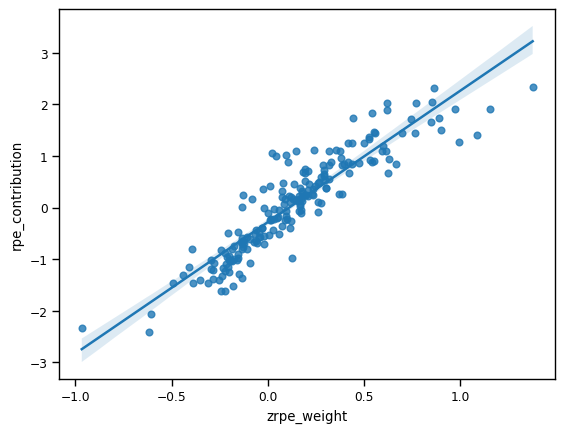

In [203]:
# # How correlated are the two measures? 
# combined_df_new = model1_df_subj.merge(combined_df, on=['participant'])

# sns.regplot(data=combined_df_new, x='zrpe_weight', y='rpe_contribution')
# # plt.plot([-3, 1.5], [-3, 4], 'k--')

[Text(0.5, 0, 'reward (points)'), Text(0, 0.5, 'pm weight')]

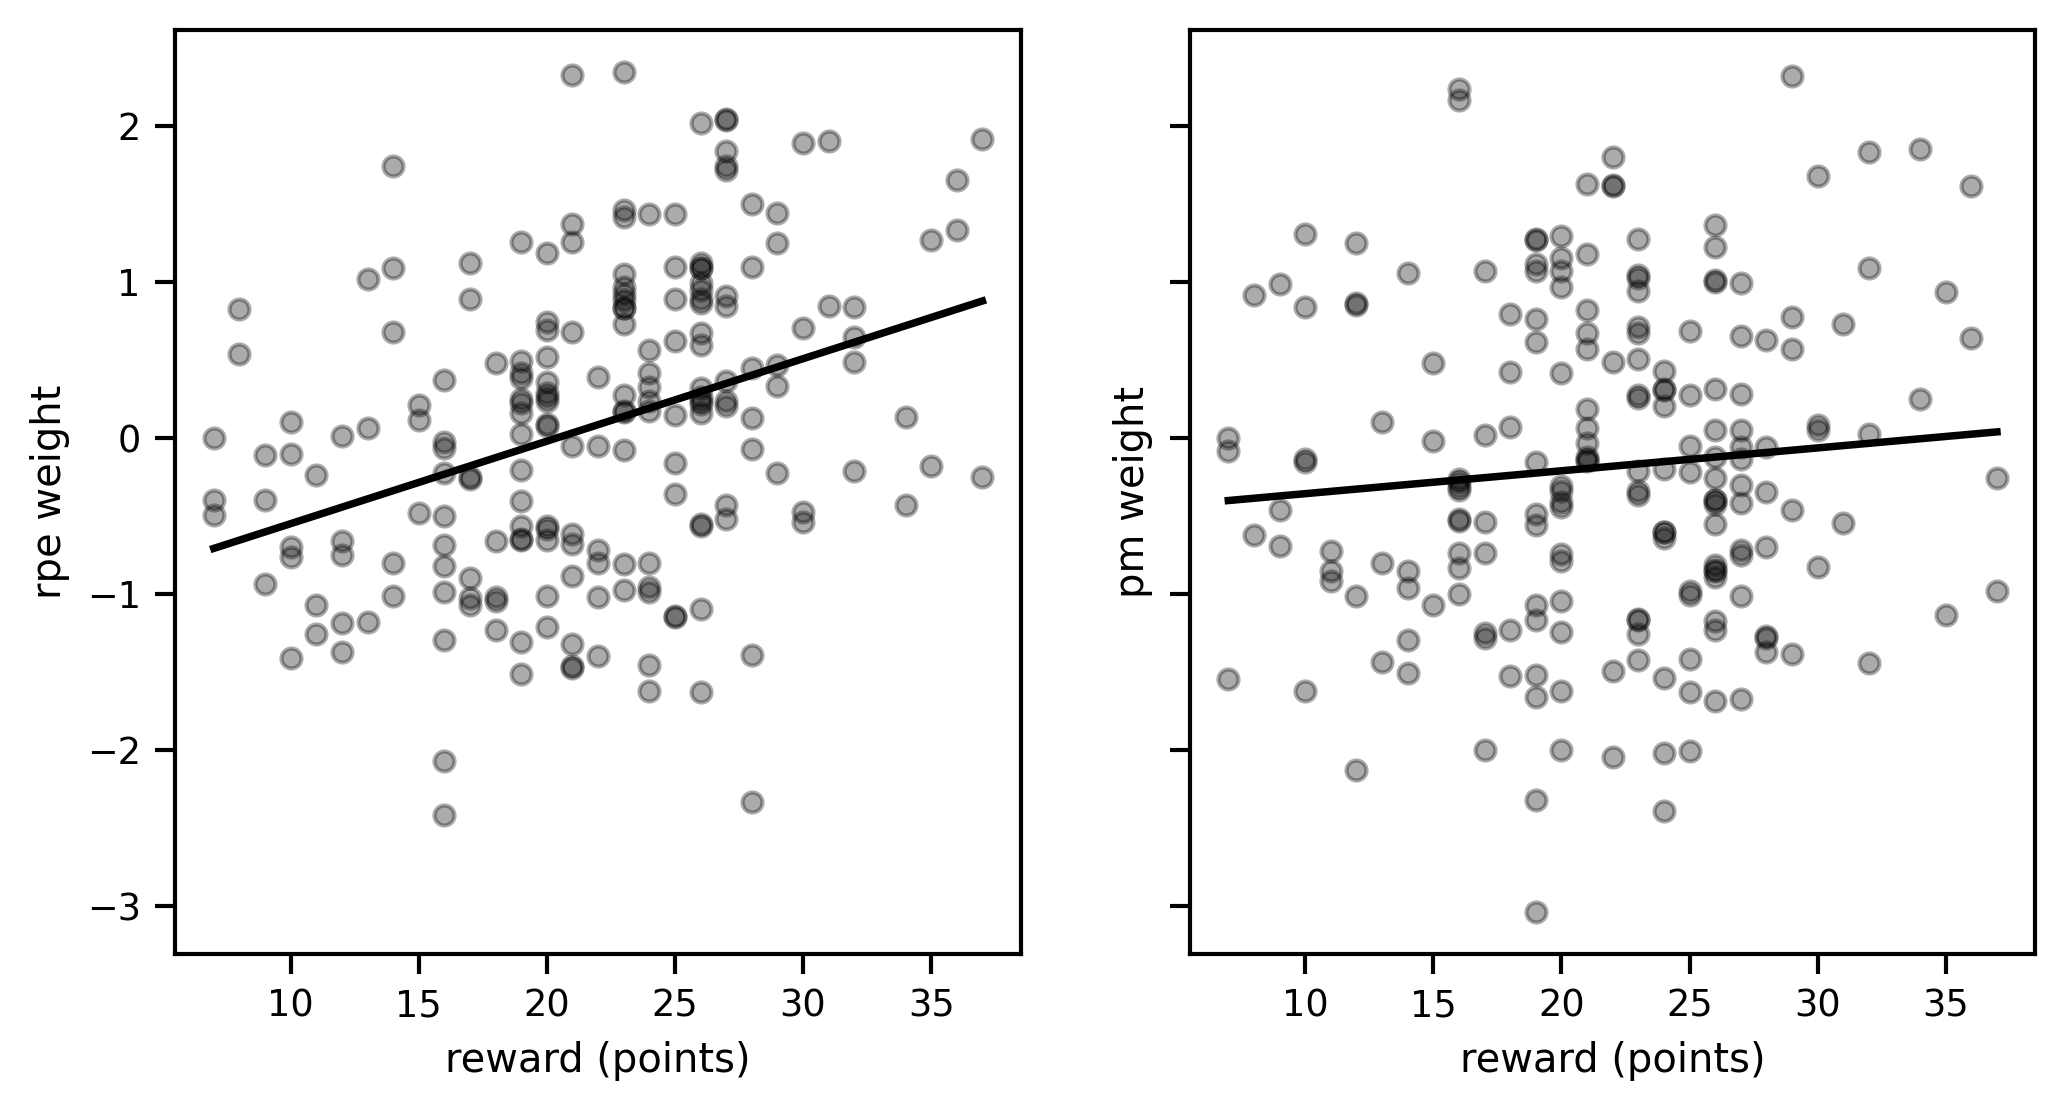

In [205]:
# # Which one works "better"?
# f, ax = plt.subplots(1,2, dpi=300, figsize=(8,4), sharey=True)
# sns.regplot(data=combined_df_new, x='subj_reward_x', y='rpe_contribution', ci=None, ax=ax[0], scatter_kws={'alpha':0.33}, color='k')
# sns.regplot(data=combined_df_new, x='subj_reward_x', y='pm_contribution', ci=None, ax=ax[1], scatter_kws={'alpha':0.33}, color='k')
# ax[0].set(xlabel = 'reward (points)', ylabel='rpe weight')
# ax[1].set(xlabel = 'reward (points)', ylabel='pm weight')

[Text(0.5, 0, 'reward (points)'), Text(0, 0.5, 'pm weight')]

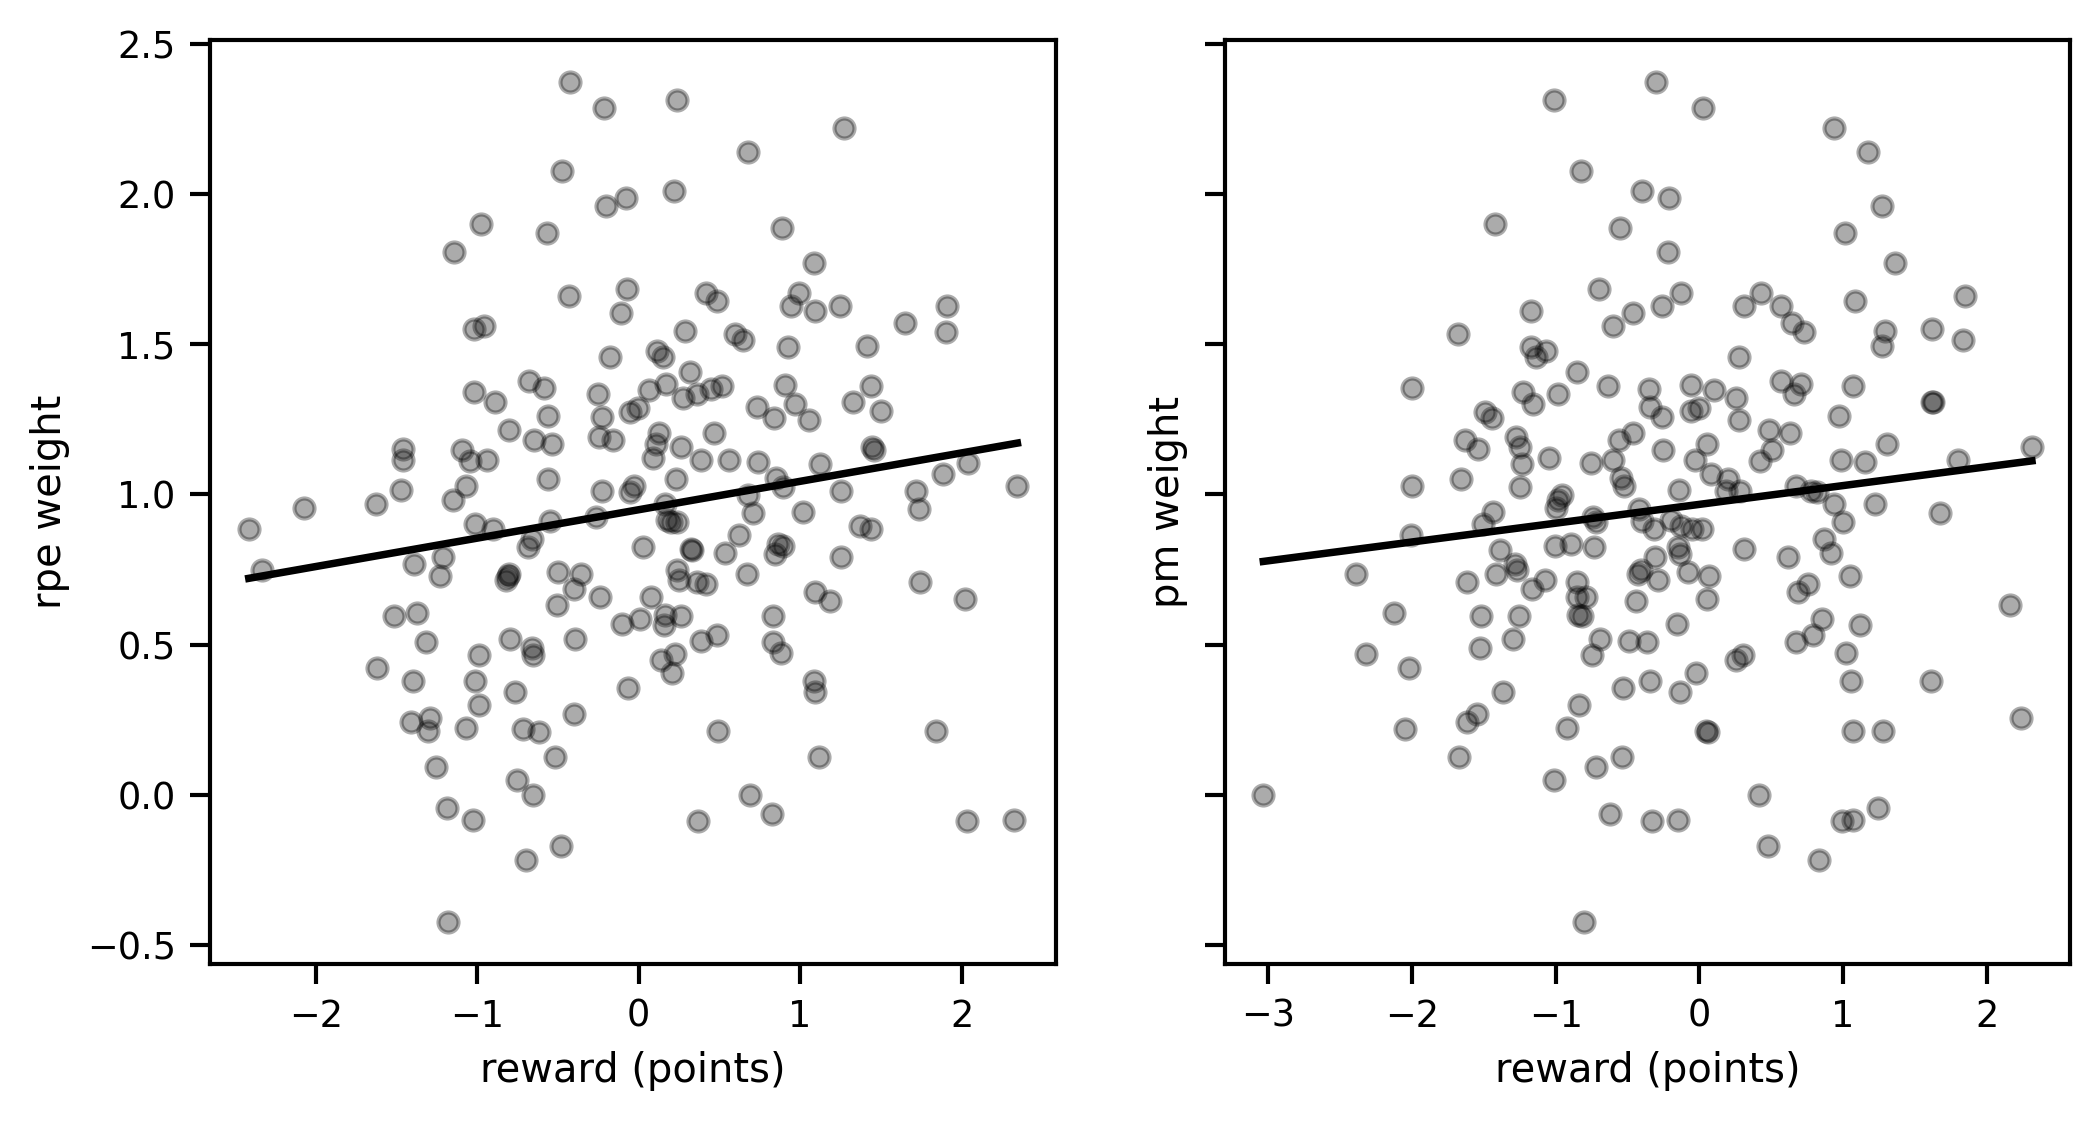

In [206]:
# # Which one works "better"?
# f, ax = plt.subplots(1,2, dpi=300, figsize=(8,4), sharey=True)
# sns.regplot(data=combined_df_new, x='rpe_contribution', y='subj_dprime_x', ci=None, ax=ax[0], scatter_kws={'alpha':0.33}, color='k')
# sns.regplot(data=combined_df_new, x='pm_contribution', y='subj_dprime_x', ci=None, ax=ax[1], scatter_kws={'alpha':0.33}, color='k')
# ax[0].set(xlabel = 'reward (points)', ylabel='rpe weight')
# ax[1].set(xlabel = 'reward (points)', ylabel='pm weight')

[Text(0.5, 0, 'reward (points)'), Text(0, 0.5, 'pm weight')]

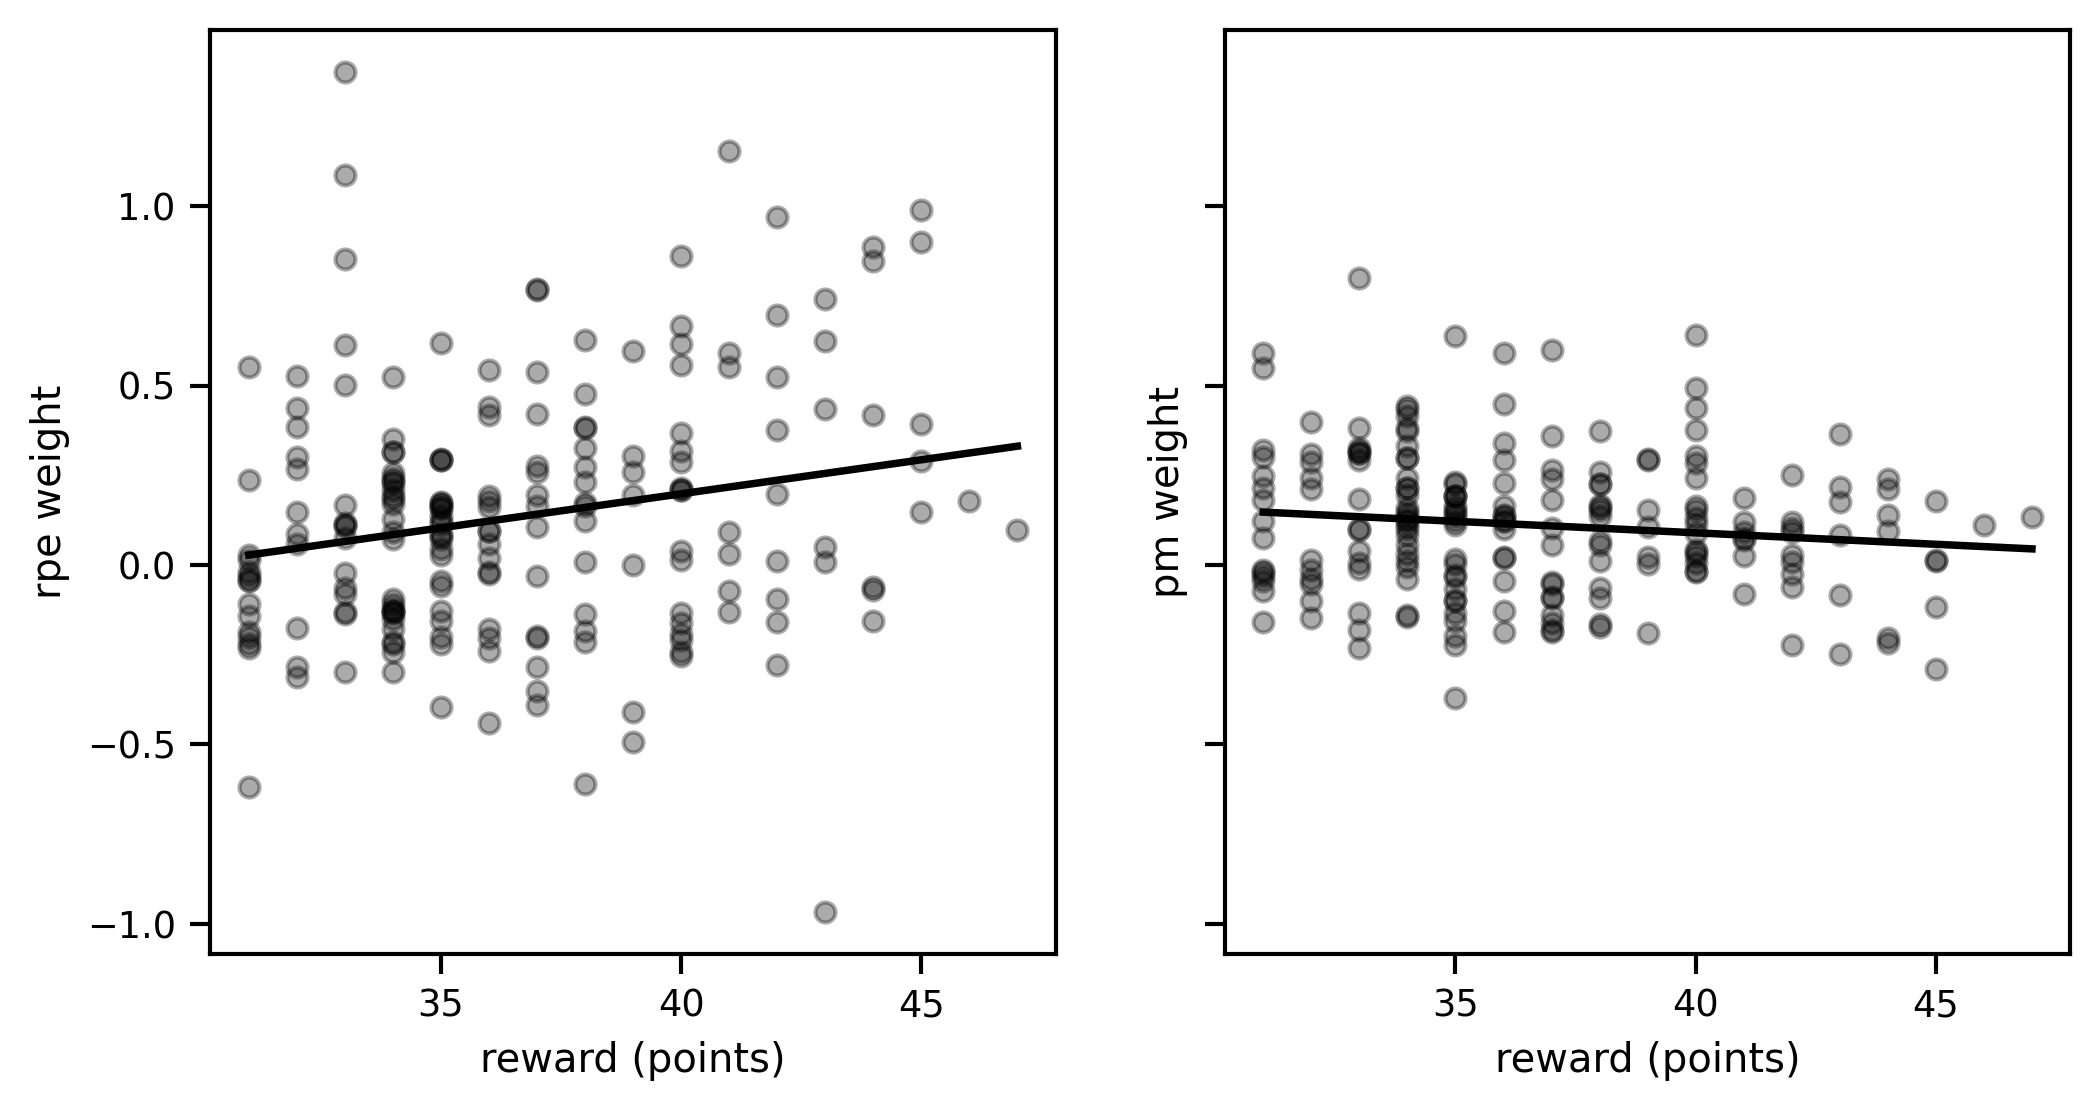

In [201]:
#     f, ax = plt.subplots(1,2, dpi=300, figsize=(8,4), sharey=True)
#     sns.regplot(data=combined_df_new, x='subj_reward', y='zrpe_weight', ci=None, ax=ax[0], scatter_kws={'alpha':0.33}, color='k')
#     sns.regplot(data=combined_df_new, x='subj_reward', y='zpm_weight', ci=None, ax=ax[1], scatter_kws={'alpha':0.33}, color='k')
#     ax[0].set(xlabel = 'reward (points)', ylabel='rpe weight')
#     ax[1].set(xlabel = 'reward (points)', ylabel='pm weight')

In [14]:
sub_level_df_psych = full_data_psych.groupby('participant').mean().reset_index()
sub_level_df_psych['points'] = sub_level_df_psych.reward*100*60

sub_level_df_psych['depr_state'] = pd.qcut(sub_level_df_psych['sds_score'], q=3, labels=['low', 'med', 'high'])
sub_level_df_psych['anx_s_state'] = pd.qcut(sub_level_df_psych['stai_s_score'],  q=3, labels=['low', 'med', 'high'])
sub_level_df_psych['anx_t_state'] = pd.qcut(sub_level_df_psych['stai_t_score'],  q=3, labels=['low', 'med', 'high'])
sub_level_df_psych['ocd_state'] = pd.qcut(sub_level_df_psych['ocirscore'],  q=3, labels=['low', 'med', 'high'])
sub_level_df_psych['f1_state'] = pd.qcut(sub_level_df_psych['f1_score'], q=3, labels=['low', 'med', 'high'])
sub_level_df_psych['f2_state'] = pd.qcut(sub_level_df_psych['f2_score'], q=3, labels=['low', 'med', 'high'])
sub_level_df_psych['f3_state'] = pd.qcut(sub_level_df_psych['f3_score'], q=3, labels=['low', 'med', 'high'])


/tmp/ipykernel_167202/2523499692.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sub_level_df_psych = full_data_psych.groupby('participant').mean().reset_index()


In [393]:
full_data_psych.groupby(['participant', 'Sex', 'age']).mean().reset_index()[['participant', 'Sex', 'age']].Sex.value_counts()


/tmp/ipykernel_38681/1859910732.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  full_data_psych.groupby(['participant', 'Sex', 'age']).mean().reset_index()[['participant', 'Sex', 'age']].Sex.value_counts()


Female    94
Male      79
Name: Sex, dtype: int64

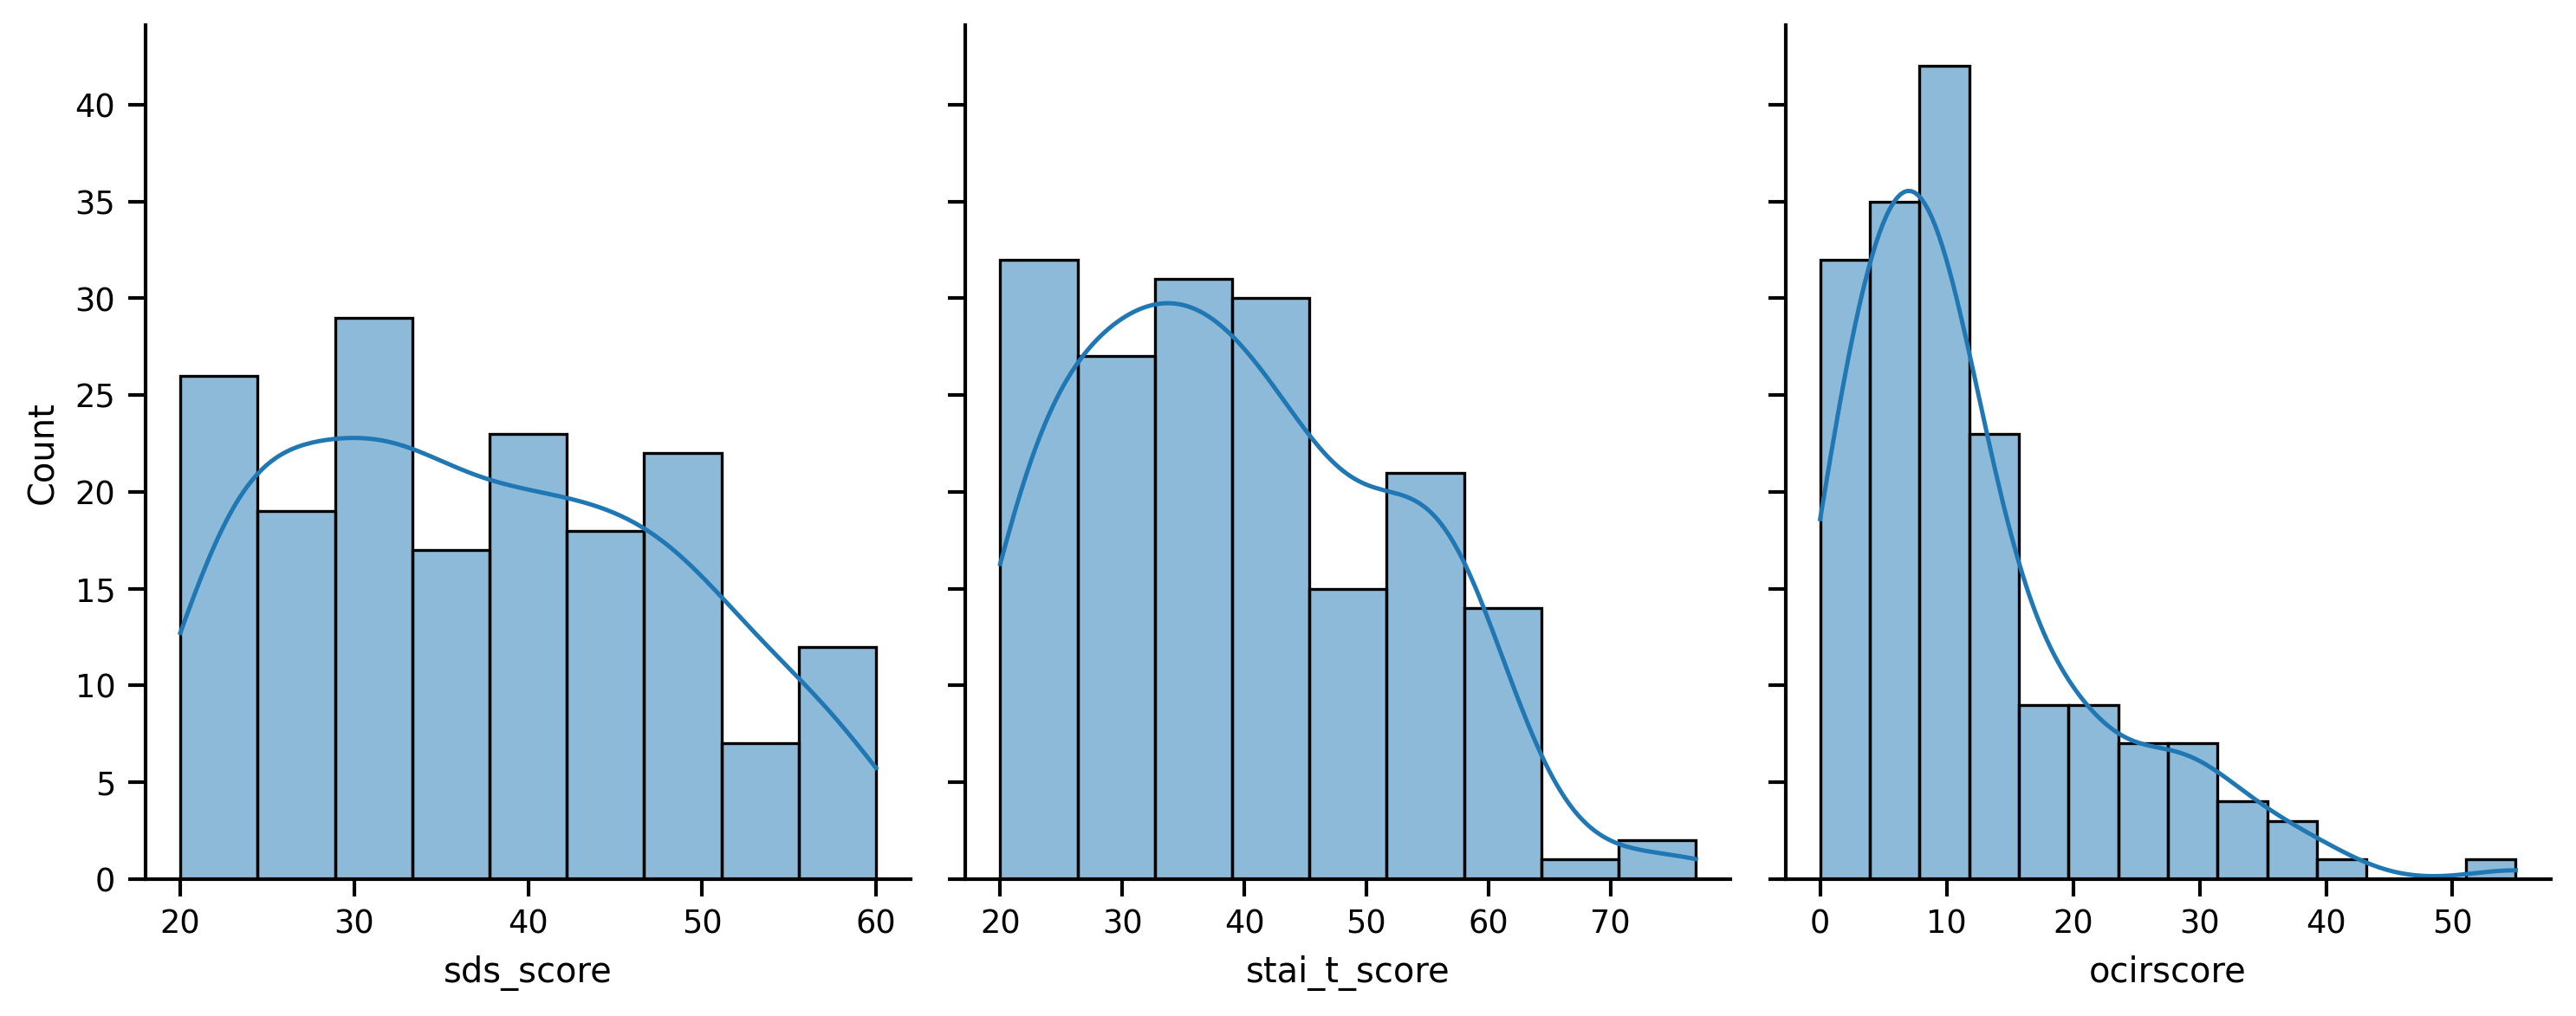

In [374]:
# sns.regplot(data=subj_mean_df, x='subj_dprime', y='aucs')
with PdfPages(f'{save_dir_plots}/Exp1_all_psych.pdf') as pdf:    
    f, ax = plt.subplots(1,3, dpi=300, figsize=(10,4), sharey=True)
    sns.histplot(data=sub_level_df_psych, x='sds_score', ax=ax[0], kde=True)
    sns.histplot(data=sub_level_df_psych, x='stai_t_score', ax=ax[1],  kde=True)
    sns.histplot(data=sub_level_df_psych, x='ocirscore',  ax=ax[2], kde=True)
    sns.despine()
    f.tight_layout()
    pdf.savefig()


In [392]:
sns.pairplot?

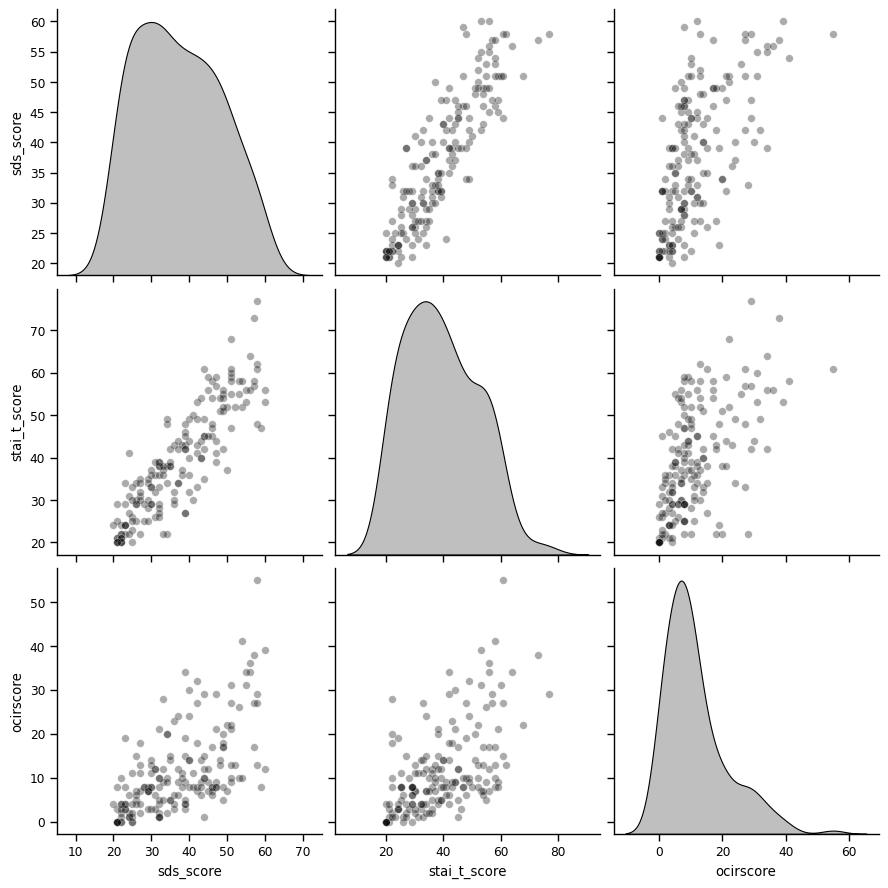

In [394]:
with PdfPages(f'{save_dir_plots}/Exp1_all_psych.pdf') as pdf:    
    sns.pairplot(data=sub_level_df_psych[['sds_score', 'stai_t_score', 'ocirscore']], 
                 plot_kws ={'alpha':0.33, 'color':'k', 's':30}, diag_kws ={'color':'k'}, height=3, diag_kind='kde')
    pdf.savefig()
    
    

In [399]:
f'{save_dir_plots}/Exp1_all_factors_expanded.pdf'

'/sc/arion/projects/guLab/Salman/MemoryBanditManuscript/Figures/Exp1/Exp1_all_factors_expanded.pdf'

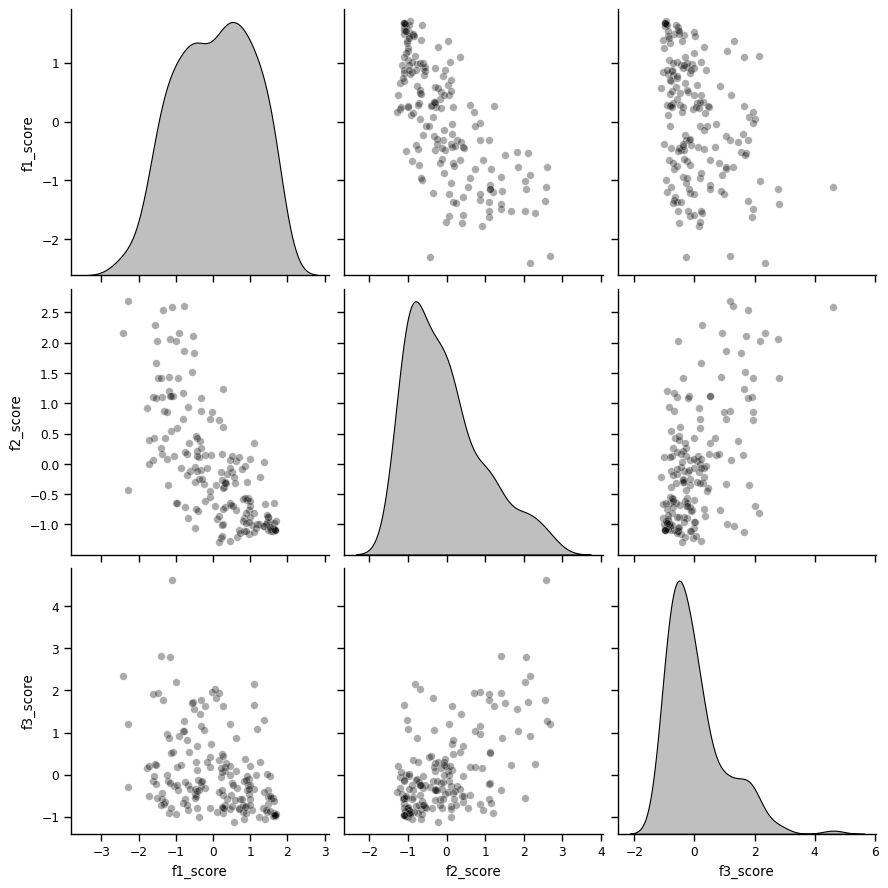

In [395]:
with PdfPages(f'{save_dir_plots}/Exp1_all_factors_expanded.pdf') as pdf:    
    sns.pairplot(data=sub_level_df_psych[['f1_score', 'f2_score', 'f3_score']], 
                 plot_kws ={'alpha':0.33, 'color':'k', 's':30}, diag_kws ={'color':'k'}, height=3, diag_kind='kde')
    pdf.savefig()
    

In [396]:
pearsonr(sub_level_df_psych.f1_score, 
         sub_level_df_psych.f2_score)

PearsonRResult(statistic=-0.714219247912209, pvalue=2.704522184495202e-28)

In [397]:
pearsonr(sub_level_df_psych.f1_score, 
         sub_level_df_psych.f3_score)

PearsonRResult(statistic=-0.35828105395016735, pvalue=1.298790155968054e-06)

In [398]:
pearsonr(sub_level_df_psych.f2_score, 
         sub_level_df_psych.f3_score)

PearsonRResult(statistic=0.5651888390202635, pvalue=5.46491714807427e-16)

First, let's establish whether anxiety has **holistic** effects on decision-making performance, memory performance, model fit or model parameters . 

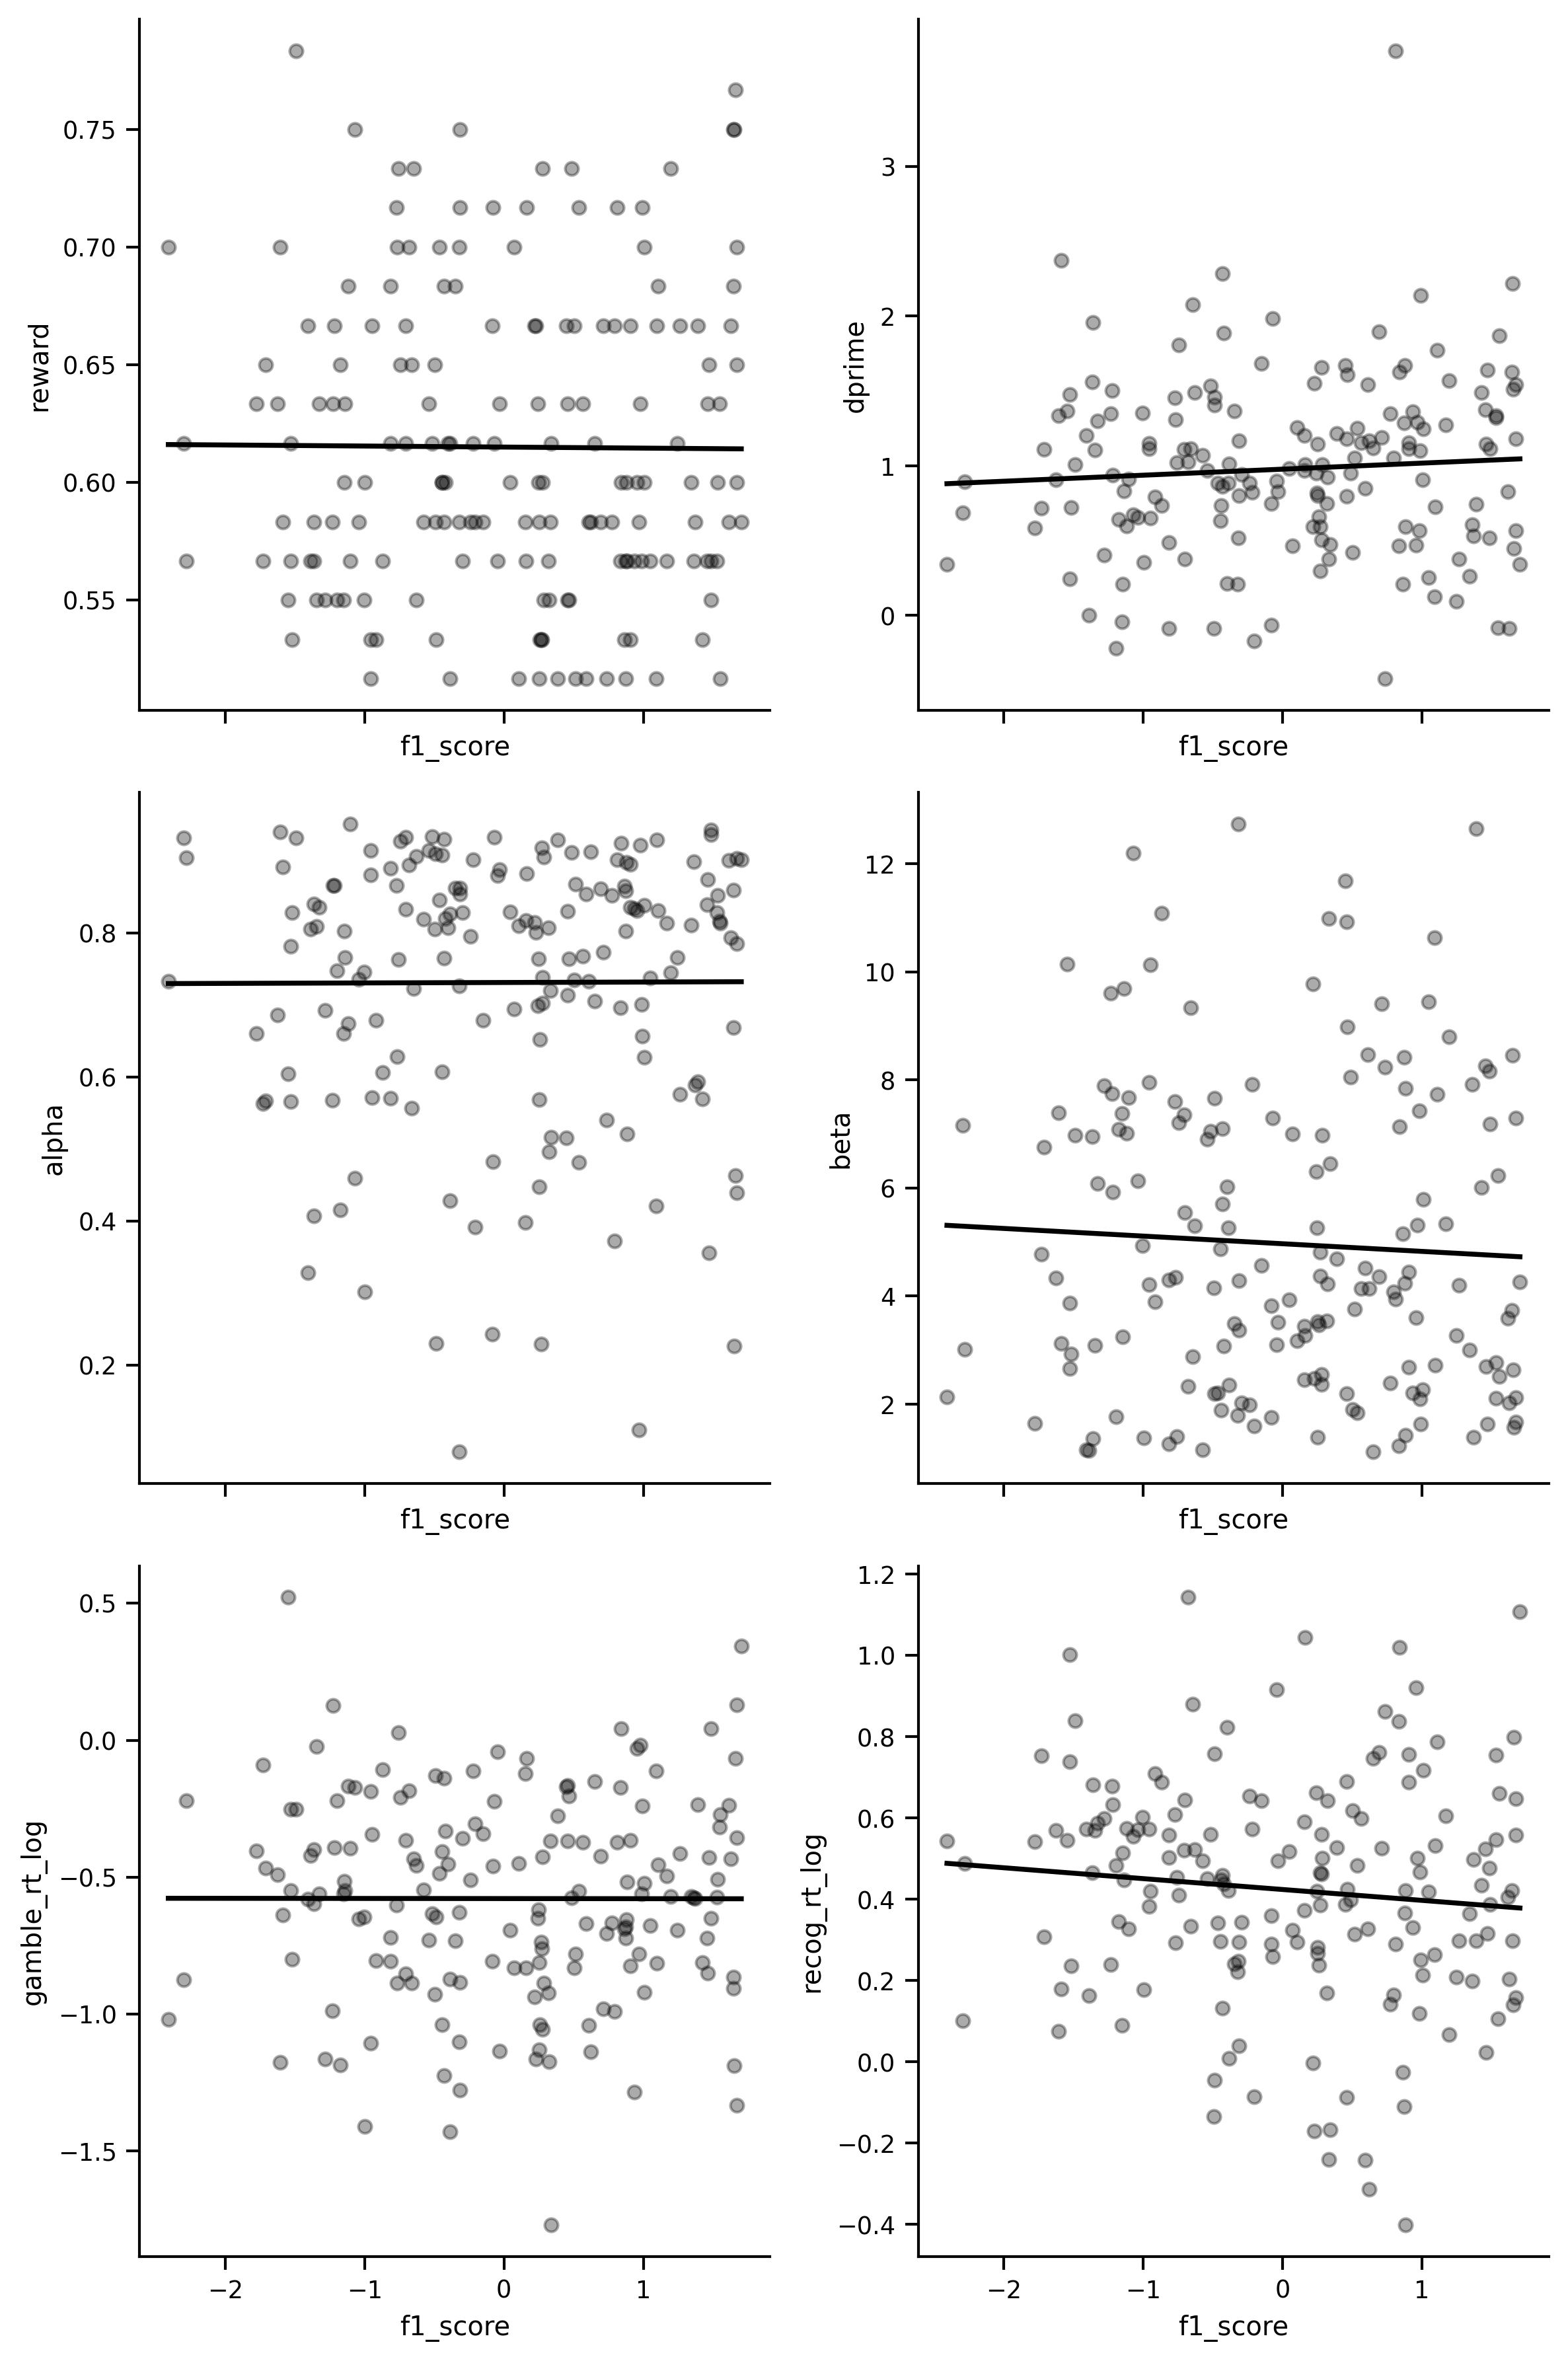

In [15]:
# sns.regplot(data=subj_mean_df, x='subj_dprime', y='aucs')
with PdfPages(f'{save_dir_plots}/Exp1_F1_correlations_Expanded.pdf') as pdf:    
    f, ax = plt.subplots(3,2, dpi=300, figsize=(8,12), sharex=True)
    sns.regplot(data=sub_level_df_psych, x='f1_score', y='reward', ci=None, ax=ax[0, 0], scatter_kws={'alpha':0.33}, color='black')
    sns.regplot(data=sub_level_df_psych, x='f1_score', y='dprime', ci=None, ax=ax[0, 1], scatter_kws={'alpha':0.33}, color='black')
    sns.regplot(data=sub_level_df_psych, x='f1_score', y='alpha', ci=None, ax=ax[1, 0], scatter_kws={'alpha':0.33}, color='black')
    sns.regplot(data=sub_level_df_psych, x='f1_score', y='beta', ci=None, ax=ax[1, 1], scatter_kws={'alpha':0.33}, color='black')
    sns.regplot(data=sub_level_df_psych, x='f1_score', y='gamble_rt_log', ci=None, ax=ax[2,0], scatter_kws={'alpha':0.33}, color='black')
    sns.regplot(data=sub_level_df_psych, x='f1_score', y='recog_rt_log', ci=None, ax=ax[2,1], scatter_kws={'alpha':0.33}, color='black')

    sns.despine()
    f.tight_layout()
    pdf.savefig()


In [23]:
f1_regress = smf.ols(formula='recog_rt_log ~ f1_score', 
                     data=sub_level_df_psych).fit()
f1_regress.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           recog_rt_log   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.694
Date:                Tue, 09 Jan 2024   Prob (F-statistic):              0.195
Time:                        16:19:39   Log-Likelihood:                -22.038
No. Observations:                 173   AIC:                             48.08
Df Residuals:                     171   BIC:                             54.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4243      0.021     20.179      0.000       0.383       0.466
f1_score      -0.0267      0.021     -1.302      0.195      -0.067       0.014
==============================================================================
Omnibus:                        2.601   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.272   Jarque-Bera (JB):                2.198
Skew:                          -0.193   Prob(JB):                        0.333
Kurtosis:                       3.395   Cond. No.                         1.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [343]:
f1_regress = smf.ols(formula='dprime ~ f1_score', 
                     data=sub_level_df_psych).fit()
f1_regress.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 dprime   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.188
Date:                Tue, 20 Jun 2023   Prob (F-statistic):              0.277
Time:                        13:25:51   Log-Likelihood:                -149.88
No. Observations:                 172   AIC:                             303.8
Df Residuals:                     170   BIC:                             310.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9790      0.044     22.069      0.000       0.891       1.067
f1_score       0.0491      0.045      1.090      0.277      -0.040       0.138
==============================================================================
Omnibus:                       21.536   Durbin-Watson:                   2.204
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.735
Skew:                           0.564   Prob(JB):                     1.93e-10
Kurtosis:                       5.229   Cond. No.                         1.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
f1_regress = smf.ols(formula='alpha ~ f1_score', 
                     data=sub_level_df_psych).fit()
f1_regress.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  alpha   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                   0.04376
Date:                Mon, 26 Jun 2023   Prob (F-statistic):              0.835
Time:                        10:22:25   Log-Likelihood:                 45.175
No. Observations:                 173   AIC:                            -86.35
Df Residuals:                     171   BIC:                            -80.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7312      0.014     51.310      0.000       0.703       0.759
f1_score       0.0031      0.015      0.209      0.835      -0.026       0.032
==============================================================================
Omnibus:                       36.356   Durbin-Watson:                   2.245
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.654
Skew:                          -1.231   Prob(JB):                     6.07e-12
Kurtosis:                       4.052   Cond. No.                         1.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
f1_regress = smf.ols(formula='beta ~ f1_score', 
                     data=sub_level_df_psych).fit()
f1_regress.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beta   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.2036
Date:                Mon, 26 Jun 2023   Prob (F-statistic):              0.652
Time:                        10:22:30   Log-Likelihood:                -425.13
No. Observations:                 173   AIC:                             854.3
Df Residuals:                     171   BIC:                             860.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.9645      0.216     22.981      0.000       4.538       5.391
f1_score      -0.1008      0.223     -0.451      0.652      -0.542       0.340
==============================================================================
Omnibus:                       12.476   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.380
Skew:                           0.654   Prob(JB):                      0.00124
Kurtosis:                       2.617   Cond. No.                         1.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Caption**: Effect of trait anxiety characterization on task performance and RW_model parameter estimates. 

## Model 1 with Depression Data

In [176]:
# # Prep a list to store results 
# all_res = [] 

# full_data['trials_in_block'] = np.nan
# for trial in full_data.trials_gamble.unique():
#     if (trial > 13 ) & (trial < 25):
#         full_data['trials_in_block'][full_data.trials_gamble==trial] = full_data['trials_gamble'][full_data.trials_gamble==trial] - 13
#     elif (trial > 24 ) & (trial < 36):
#         full_data['trials_in_block'][full_data.trials_gamble==trial] = full_data['trials_gamble'][full_data.trials_gamble==trial] - 24
#     elif (trial > 35 ) & (trial < 49):
#         full_data['trials_in_block'][full_data.trials_gamble==trial] = full_data['trials_gamble'][full_data.trials_gamble==trial] - 35
#     elif (trial > 48 ):
#         full_data['trials_in_block'][full_data.trials_gamble==trial] = full_data['trials_gamble'][full_data.trials_gamble==trial] - 48
    
        
        
# # Get reward percentage per person 
# full_data['reward_percentage'] = np.nan
# grouped_df = full_data.groupby('participant')['reward'].sum()
# for pid in full_data['participant'].unique():
#     full_data['reward_percentage'][full_data.participant==pid] = grouped_df[pid]

# model_df = full_data[['hits', 'false_alarms', 'misses', 'correct_rejections', 'rpe', 'image_dprime', 'dprime', 'trials_in_block',
#                            'alpha', 'beta', 'age', 'Sex', 'reward', 'participant', 'hit_rate', 'reward_percentage',
#                            'false_alarm_rate', 'gamble_rt_log', 'recog_rt_log', '_merge']].copy()

# model_df.rename(columns={'image_dprime':'pm'}, inplace=True)


# # Make a new response variable, memory outcome 
# model_df['memory_outcome'] = model_df[['hits', 'misses', 'correct_rejections', 
#                                        'false_alarms']].idxmax(1).to_frame('memory_outcome')

# print(f"Dataset has a balance of {balance(model_df['memory_outcome'])} between memory choices")

# # CODE THE VARIABLES: 
# model_df['memory_outcome'][model_df['memory_outcome'].isin(['misses', 'false_alarms'])] = 0
# model_df['memory_outcome'][model_df['memory_outcome'].isin(['hits', 'correct_rejections'])] = 1


# # Subject level traits need to be filled across NaNs
# model_df['alpha'] = model_df.groupby('participant')['alpha'].ffill()
# model_df['alpha'] = model_df.groupby('participant')['alpha'].bfill()
# # model_df['alpha_neg'] = model_df.groupby('participant')['alpha_neg'].ffill()
# # model_df['alpha_neg'] = model_df.groupby('participant')['alpha_neg'].bfill()
# model_df['beta'] = model_df.groupby('participant')['beta'].ffill()
# model_df['beta'] = model_df.groupby('participant')['beta'].bfill()
            
# # Define the dependent variable and the independent variables
# dependent_var = 'memory_outcome'
# independent_vars = ['rpe', 'pm', 'age', 'alpha', 'beta', 'Sex', 'trials_in_block', 'reward_percentage']

# # Set response variable as int
# model_df[dependent_var] = model_df[dependent_var].astype(int)
# # Zscore independent variables: 
# for factor in independent_vars: 
#     if factor not in ['Sex', 'winning_model']:
#         # Set nan's to 0 to capture the LACK of RPE 
#         if factor == 'rpe':
#             model_df[f'{factor}'] = model_df[f'{factor}'].fillna(0)
# #         model_df[f'z{factor}'] = zscore(model_df[factor], nan_policy='omit').values 
#       # Gelman standardization: http://www.stat.columbia.edu/~gelman/research/published/standardizing7.pdf
#         model_df[f'z{factor}'] = (model_df[factor].values - np.nanmean(model_df[factor].values)) / (2*np.nanstd(model_df[factor].values))
# #     if factor == 'rpe':
# #         model_df[f'z{factor}'] = model_df[f'z{factor}'].fillna(0)
# # test2 = model_df['zrpe'].values
# # model_df[f'z{factor}']

1/3/24: Can I cut out the middle-man (factor analysis) and just directly examine the questions that are predictive of memory? 

My approach to doing this: 

1. identify the psych questions that predict memory (forward linear model) 

2. identify trans-survey structure to find specific factors (2-3) that specify different categories of symptoms affecting memory (factor analysis) 

3. identify which of these factors, if any, act by regulating RPE-mediated memory

In [19]:
sds_cols = [col for col in full_data_psych.columns if col.endswith('sds')]
stai_cols = [col for col in full_data_psych.columns if col.startswith('stait')]
oci_cols = [col for col in full_data_psych.columns if col.endswith('oci')]
rel_cols = sds_cols + stai_cols + oci_cols

In [20]:
rel_cols = sds_cols + stai_cols + oci_cols

In [399]:
model_df = full_data_psych[rel_cols + ['participant', 'dprime']].copy().groupby('participant').mean().reset_index()


def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model



res_model = forward_selected(model_df[rel_cols + ['dprime']], 'dprime')
rel_survey_items = list(res_model.params.to_dict().keys())
rel_survey_items.remove('Intercept')

In [398]:
reward_predictive_items = rel_survey_items

In [400]:
memory_predictive_items = rel_survey_items

Here we are going to run the big bayesian logistic regression model to see how the different factors affect memory and its relation with RPE/PM. 

However, as Reviewer 2 (rightly) pointed out, these factor scores are way too correlated to include as covariates in the same model so let's run three separate models and do model comparison 

In [17]:
# Prep a list to store results 
all_res = [] 

full_data_psych['trials_in_block'] = np.nan
for trial in full_data_psych.trials_gamble.unique():
#     if (trial < 13):
#         full_data_psych['trials_in_block'][full_data_psych.trials_gamble==trial] = full_data_psych['trials_gamble'][full_data_psych.trials_gamble==trial] 
    if (trial > 13 ) & (trial < 25):
        full_data_psych['trials_in_block'][full_data_psych.trials_gamble==trial] = full_data_psych['trials_gamble'][full_data_psych.trials_gamble==trial] - 13
    elif (trial > 24 ) & (trial < 36):
        full_data_psych['trials_in_block'][full_data_psych.trials_gamble==trial] = full_data_psych['trials_gamble'][full_data_psych.trials_gamble==trial] - 24
    elif (trial > 35 ) & (trial < 49):
        full_data_psych['trials_in_block'][full_data_psych.trials_gamble==trial] = full_data_psych['trials_gamble'][full_data_psych.trials_gamble==trial] - 35
    elif (trial > 48 ):
        full_data_psych['trials_in_block'][full_data_psych.trials_gamble==trial] = full_data_psych['trials_gamble'][full_data_psych.trials_gamble==trial] - 48
    
        
        
# Get reward percentage per person 
full_data_psych['reward_percentage'] = np.nan
grouped_df = full_data_psych.groupby('participant')['reward'].sum()
for pid in full_data_psych['participant'].unique():
    full_data_psych['reward_percentage'][full_data_psych.participant==pid] = grouped_df[pid]

model_df = full_data_psych[['hits', 'false_alarms', 'misses', 'correct_rejections', 'rpe', 'image_dprime', 'dprime', 'reward_percentage', 'trials_in_block',
                           'alpha', 'beta', 'age', 'Sex', 'reward', 'participant', 'hit_rate', 'sds_score', 'ocirscore', 'stai_t_score', 'f1_score', 'f2_score', 'f3_score',
                            'depr_state', 'false_alarm_rate', 'gamble_rt_log', 'recog_rt_log', '_merge']].copy()

model_df.rename(columns={'image_dprime':'pm'}, inplace=True)


# Make a new response variable, memory outcome 
model_df['memory_outcome'] = model_df[['hits', 'misses', 'correct_rejections', 
                                       'false_alarms']].idxmax(1).to_frame('memory_outcome')

print(f"Dataset has a balance of {balance(model_df['memory_outcome'])} between memory choices")

# CODE THE VARIABLES: 
model_df['memory_outcome'][model_df['memory_outcome'].isin(['misses', 'false_alarms'])] = 0
model_df['memory_outcome'][model_df['memory_outcome'].isin(['hits', 'correct_rejections'])] = 1


# Subject level traits need to be filled across NaNs
model_df['alpha'] = model_df.groupby('participant')['alpha'].ffill()
model_df['alpha'] = model_df.groupby('participant')['alpha'].bfill()
# model_df['alpha_neg'] = model_df.groupby('participant')['alpha_neg'].ffill()
# model_df['alpha_neg'] = model_df.groupby('participant')['alpha_neg'].bfill()
model_df['beta'] = model_df.groupby('participant')['beta'].ffill()
model_df['beta'] = model_df.groupby('participant')['beta'].bfill()
      
# Define the dependent variable and the independent variables
dependent_var = 'memory_outcome'
independent_vars = ['age', 'Sex', 'reward_percentage', 'rpe', 'pm', 'alpha', 'beta', 'reward_percentage', 'trials_in_block', 'ocirscore', 'stai_t_score', 'sds_score', 'f1_score', 'f2_score', 'f3_score']

# Zscore independent variables: 
for factor in independent_vars: 
    if factor not in ['Sex', 'reward']:
        # Set nan's to 0 to capture the LACK of RPE 
        if factor == 'rpe':
            model_df[f'{factor}'] = model_df[f'{factor}'].fillna(0)        
        if factor in ['pm', 'rpe']:
            model_df[f'z{factor}'] = np.nan
            for subj in model_df.participant.unique(): 
                model_df[f'z{factor}'][model_df.participant==subj] = (model_df[factor][model_df.participant==subj].values - np.nanmean(model_df[factor][model_df.participant==subj].values)) / (2*np.nanstd(model_df[factor][model_df.participant==subj].values))
        else: 
            model_df[f'z{factor}'] = (model_df[factor].values - np.nanmean(model_df[factor].values)) / (2*np.nanstd(model_df[factor].values))


Dataset has a balance of 0.9462797191322204 between memory choices


In [21]:
model1.graph(name='/sc/arion/projects/guLab/Salman/MemoryBanditManuscript/Figures/Psych_Model', 
            dpi=300, 
           fmt = 'pdf')

In [20]:
model_comp = {'zf1_score': np.nan,
              'zf2_score': np.nan,
              'zf3_score': np.nan}

for factor in model_comp.keys(): 
    y = 'memory_outcome'
    X = ['zrpe', 'zpm', f'{factor}']
    # 'Sex', 'zalpha', 'zbeta', 'zreward_percentage',
    Intx = [f'{factor}:zrpe']
    rand_intercept = ['participant'] 
    rand_slopes_group = ['participant'] 
    rand_slopes_predictor = ['zrpe', 'zpm']
    label = f'expanded_factor_analysis_regression_R_oblique_{factor}'

    model_df = model_df.dropna(subset=X)

    model_df.memory_outcome = model_df.memory_outcome.astype(int)

    model, results = run_model(model_df, y=y, X=X, Intx=Intx, rand_effect=rand_intercept, rand_slopes_group=rand_slopes_group, 
              rand_slopes_predictor = rand_slopes_predictor, cores=1, chains=4, tune=4000, draws=2000, target_accept=0.8, 
              model_fam='bernoulli', output_dir='/sc/arion/projects/guLab/Salman/MemoryBanditManuscript/', return_model=True,
              categorical_baseline=True, save_model_res = True, label=label)

    model_comp[factor] = results

Modeling the probability that memory_outcome==1
Compiling...
Compilation time = 0:00:03.484930
Sampling...
/hpc/users/qasims01/.local/lib/python3.11/site-packages/jax/_src/numpy/array_methods.py:66: UserWarning: Explicitly requested dtype float64 requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return lax_numpy.astype(arr, dtype)
/hpc/users/qasims01/.local/lib/python3.11/site-packages/jax/_src/numpy/array_methods.py:66: UserWarning: Explicitly requested dtype float64 requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return lax_numpy.astype(arr, dtype)
Compiling.. :   0%|        

Running chain 1:  25%|██▌       | 1500/6000 [00:39<01:15, 59.82it/s]


Running chain 0:  30%|███       | 1800/6000 [00:42<01:06, 63.39it/s]

Running chain 1:  30%|███       | 1800/6000 [00:43<01:04, 65.11it/s]


Running chain 0:  35%|███▌      | 2100/6000 [00:46<00:58, 66.79it/s]

Running chain 2:  30%|███       | 1800/6000 [00:46<01:16, 55.13it/s]


Running chain 0:  40%|████      | 2400/6000 [00:49<00:51, 70.19it/s]


Running chain 3:  40%|████      | 2400/6000 [00:50<00:47, 76.32it/s]

Running chain 0:  45%|████▌     | 2700/6000 [00:53<00:43, 75.39it/s]


Running chain 3:  45%|████▌     | 2700/6000 [00:53<00:40, 81.45it/s]

Running chain 1:  45%|████▌     | 2700/6000 [00:54<00:43, 75.36it/s]


Running chain 0:  50%|█████     | 3000/6000 [00:56<00:37, 79.39it/s]

Running chain 1:  50%|█████     | 3000/6000 [00:58<00:38, 77.63it/s]


Running chain 3:  55%|█████▌    | 3300/6000 [00:59<00:29, 90.19it/s]

Running chain 1:  55%|█████▌    | 3300/6000 [01:01<00:34, 79.17it/s]


Running chai

In [31]:
# Load the models 
model_comp = {'zf1_score': np.nan,
              'zf2_score': np.nan,
              'zf3_score': np.nan}
for factor in model_comp.keys(): 
    label = f'expanded_factor_analysis_regression_R_oblique_{factor}'
    idata = az.from_netcdf(f'/sc/arion/projects/guLab/Salman/MemoryBanditManuscript/{label}_model')
    model_comp[factor] = idata

In [32]:
save_dir_plots

'/sc/arion/projects/guLab/Salman/MemoryBanditManuscript/Figures/Exp1'

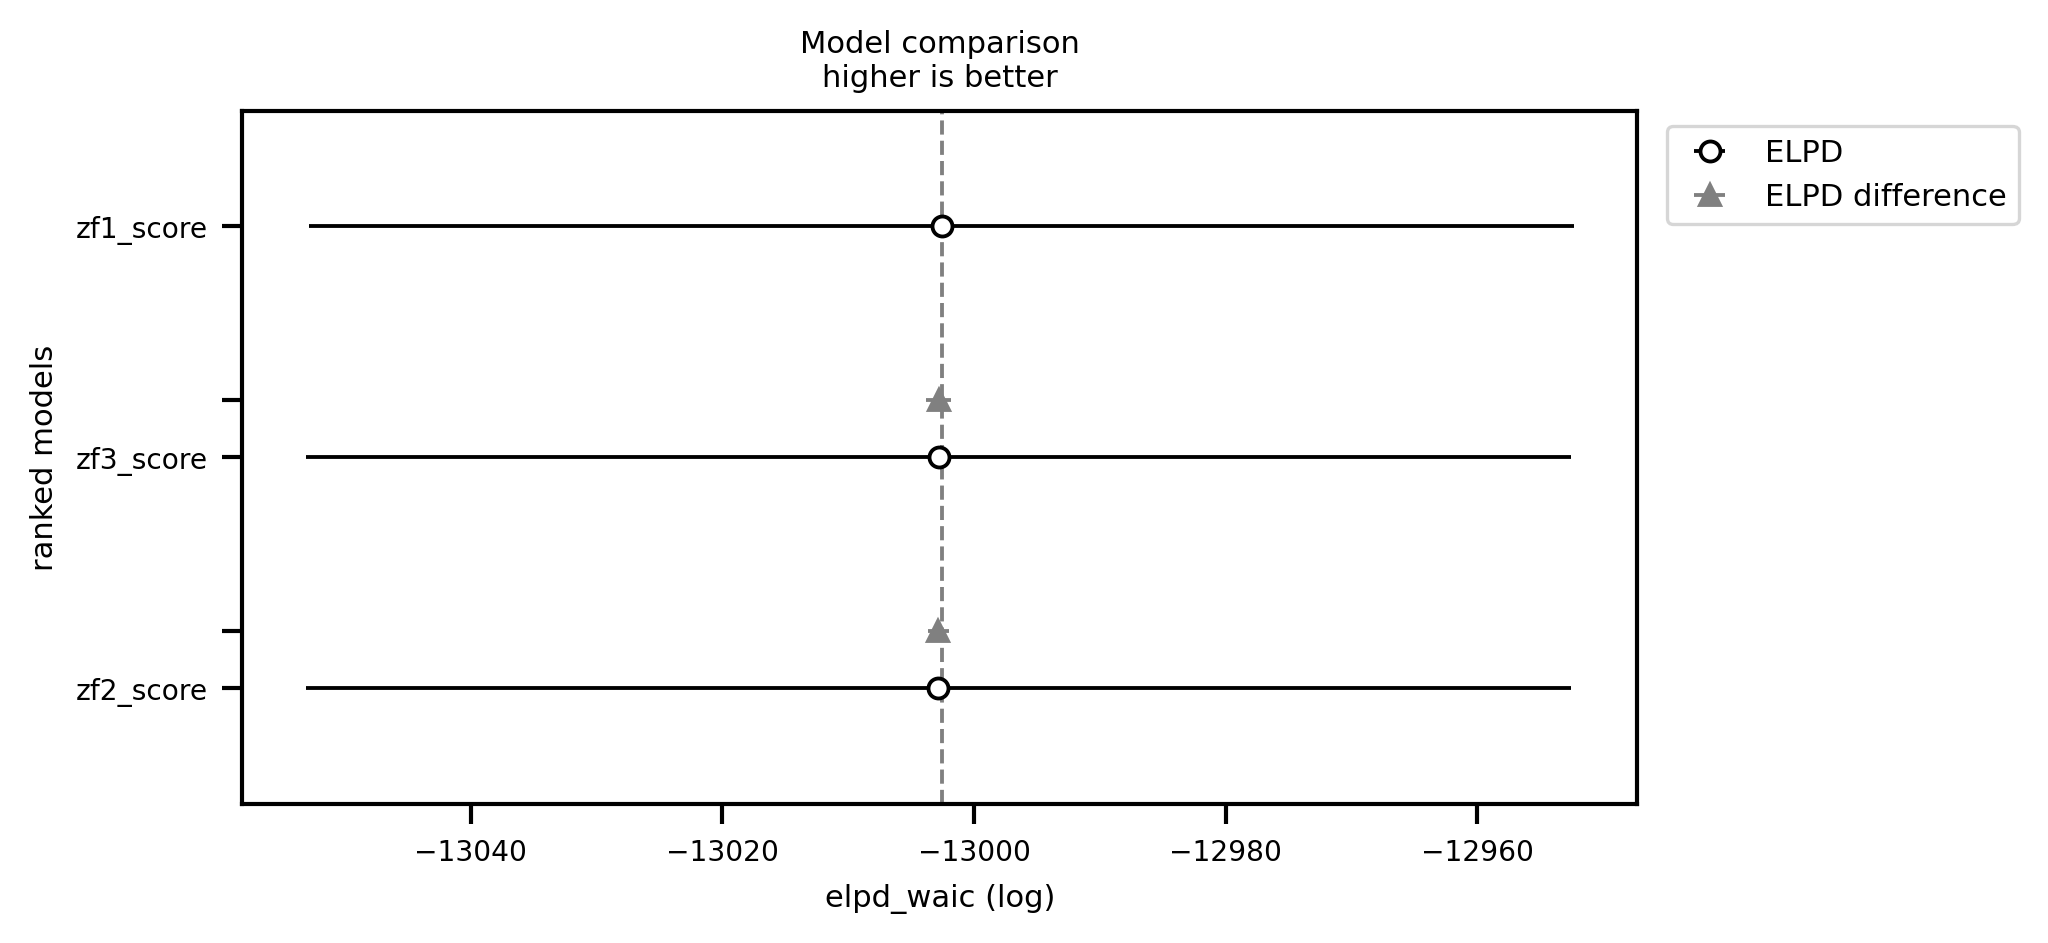

In [33]:
with PdfPages(f'{save_dir_plots}/Exp1_ModelComparison_AllFactors.pdf') as pdf:    

    f, ax = plt.subplots(1,1, dpi=300, figsize=(6,3))
    df_comp = az.compare(model_comp, ic='waic')
    az.plot_compare(df_comp, ax=ax)
#     ax.set(xlim=[-6540, -6492])
    
    pdf.savefig()


In [34]:
df_comp

rank     elpd_waic      p_waic  elpd_diff        weight         se  \
zf1_score     0 -13002.573935  179.767410    0.00000  7.331791e-01  50.278872   
zf3_score     1 -13002.804455  181.082520    0.23052  2.668209e-01  50.293572   
zf2_score     2 -13002.838355  180.640594    0.26442  1.110223e-16  50.285680   

                dse  warning scale  
zf1_score  0.000000    False   log  
zf3_score  0.994287    False   log  
zf2_score  0.853059    False   log

In [55]:
# y = 'memory_outcome'
# X = ['zrpe', 'zpm', 'zf1_score', 'zf2_score', 'zf3_score', 'ztrials_in_block']
# # 'Sex', 'zalpha', 'zbeta', 'zreward_percentage',
# Intx = ['zf1_score:zrpe', 'zf2_score:zrpe', 'zf3_score:zrpe']
# rand_intercept = ['participant'] 
# rand_slopes_group = ['participant'] 
# rand_slopes_predictor = ['zrpe', 'zpm']
# label = 'expanded_factor_analysis_regression_R_oblique'

# model_df = model_df.dropna(subset=X)

# model_df.memory_outcome = model_df.memory_outcome.astype(int)

# model1, results1 = run_model(model_df, y=y, X=X, Intx=Intx, rand_effect=rand_intercept, rand_slopes_group=rand_slopes_group, 
#           rand_slopes_predictor = rand_slopes_predictor, cores=1, chains=4, tune=4000, draws=2000, target_accept=0.8, 
#           model_fam='bernoulli', output_dir='/sc/arion/projects/guLab/Salman/MemoryBanditManuscript/', return_model=True,
#           categorical_baseline=True, save_model_res = True, label=label)



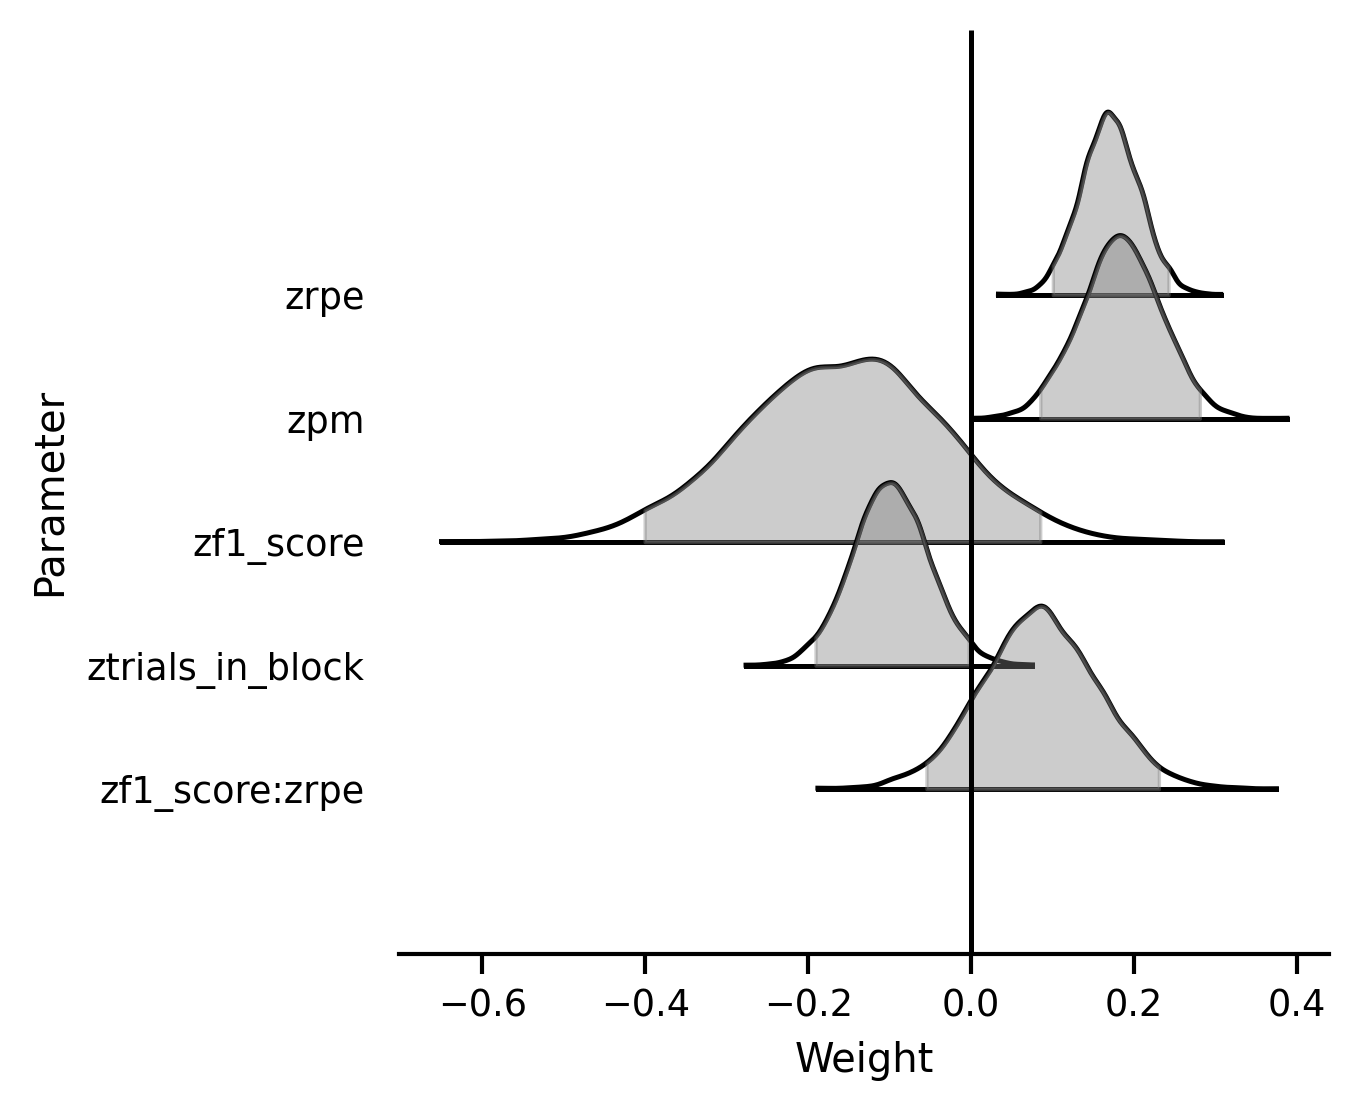

In [59]:
with PdfPages(f'{save_dir_plots}/Exp1_Posteriors_FactorAnalysis_F1.pdf') as pdf:    
    X = ['zrpe', 'zpm', 'zf1_score', 'ztrials_in_block', 'zf1_score:rpe']

    f, ax = plt.subplots(1,1, dpi=300, figsize=(4,4))
    ax.set(xlabel='Weight', ylabel='Parameter')
    sns.despine()
    plot_res(model_comp['zf1_score'], X, ax=ax)
    
    pdf.savefig(f)

Modeling the probability that memory_outcome==0


memory_outcome ~ 1+(1|participant)+zrpe+zpm+zf1_score+zf2_score+zf3_score+ztrials_in_block+(zrpe|participant)+(zpm|participant)+(ztrials_in_block|participant)+zf1_score:zrpe+zf2_score:zrpe+zf3_score:zrpe


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [Intercept, zrpe, zpm, zf1_score, zf2_score, zf3_score, ztrials_in_block, zf1_score:zrpe, zf2_score:zrpe, zf3_score:zrpe, 1|participant_sigma, 1|participant_offset, zrpe|participant_sigma, zrpe|participant_offset, zpm|participant_sigma, zpm|participant_offset, ztrials_in_block|participant_sigma, ztrials_in_block|participant_offset]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 555 seconds.


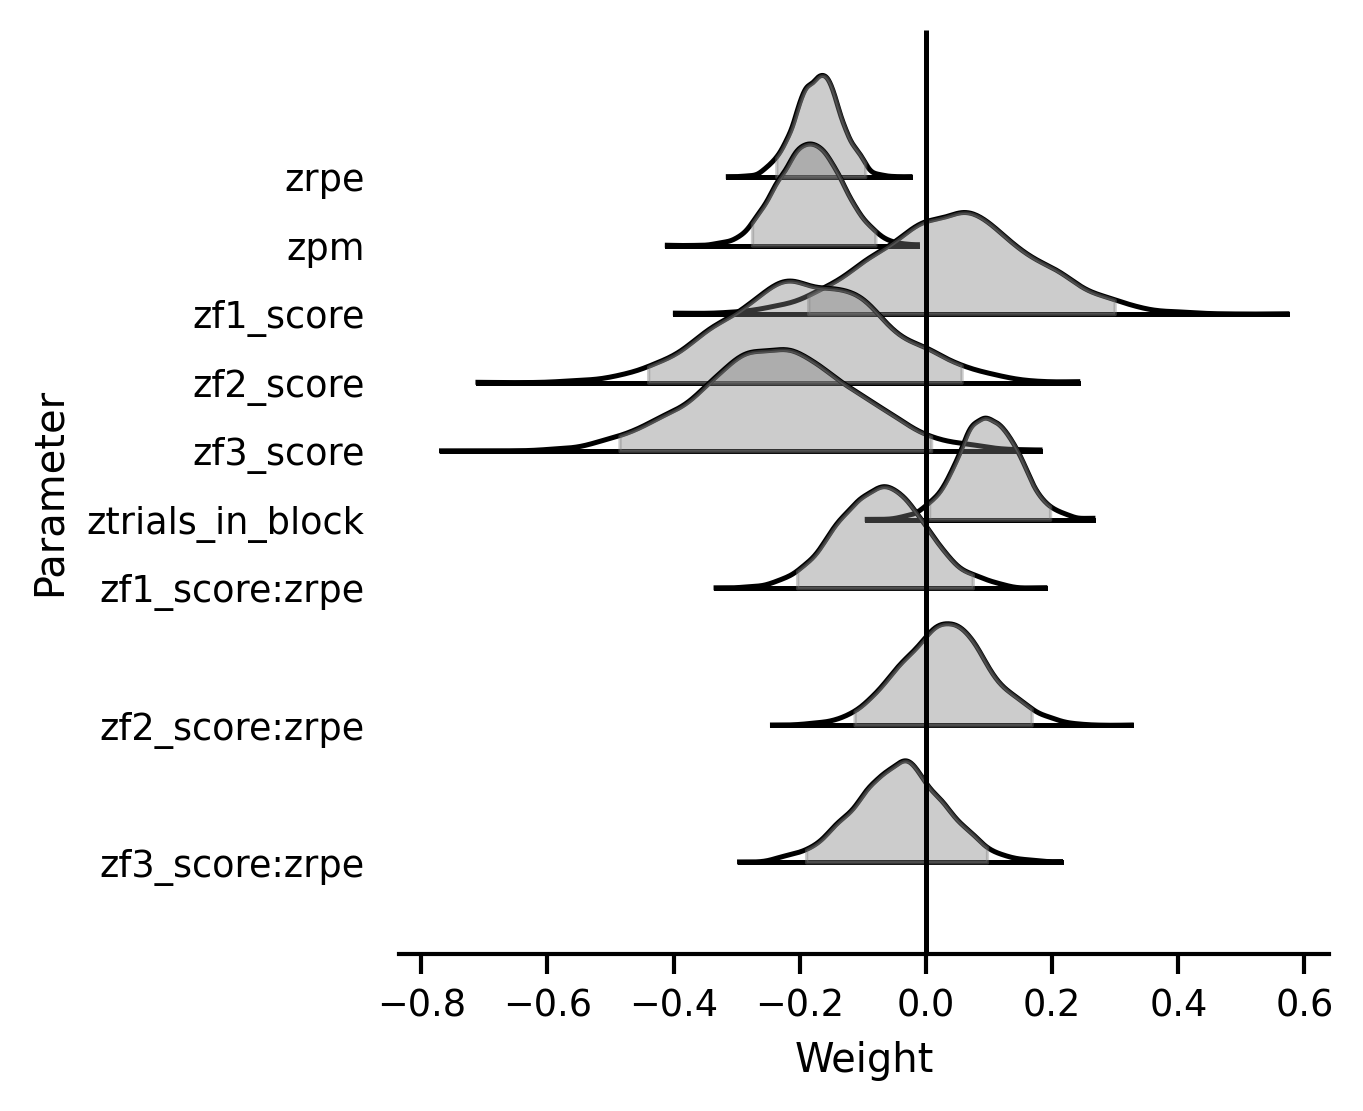

In [129]:
y = 'memory_outcome'
X = ['zrpe', 'zpm', 'zf1_score', 'zf2_score', 'zf3_score', 'ztrials_in_block']
within_subject_X = ['zrpe', 'zpm', 'ztrials_in_block']
Intx = ['zf1_score:zrpe', 'zf2_score:zrpe', 'zf3_score:zrpe']
rand_effect = ['participant']
categorical = None

# Drop nan data
model_df = model_df.dropna(subset=X)

model1, results1 = run_model(model_df, y=y, X=X, Intx=Intx, rand_effect=rand_effect, rand_slopes=True, within_subject_X=within_subject_X,
                           priors=None, categorical=categorical, cores=1, chains=4, tune=1000, draws=1000, 
                           target_accept=0.9, model_fam='bernoulli', 
                           output_dir='/sc/arion/projects/guLab/Salman/MemoryBanditManuscript/', 
                           return_model=True,
                           categorical_baseline=True, 
                           save_model_res = True, 
                           label=None)


f, ax = plt.subplots(1,1, dpi=300, figsize=(4,4))
ax.set(xlabel='Weight', ylabel='Parameter')
sns.despine()
plot_res(results1, X, ax=ax)

memory_outcome ~ 1+(1|participant)+zrpe+zpm+zf2_score+zalpha+zbeta+zf3_score+(zrpe|participant)+(zpm|participant)+zf2_score:zrpe+zf2_score:zpm


Modeling the probability that memory_outcome==1
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, zrpe, zpm, zf2_score, zalpha, zbeta, zf3_score, zf2_score:zrpe, zf2_score:zpm, 1|participant_sigma, 1|participant_offset, zrpe|participant_sigma, zrpe|participant_offset, zpm|participant_sigma, zpm|participant_offset]


Sampling 4 chains for 1_500 tune and 1_500 draw iterations (6_000 + 6_000 draws total) took 1371 seconds.


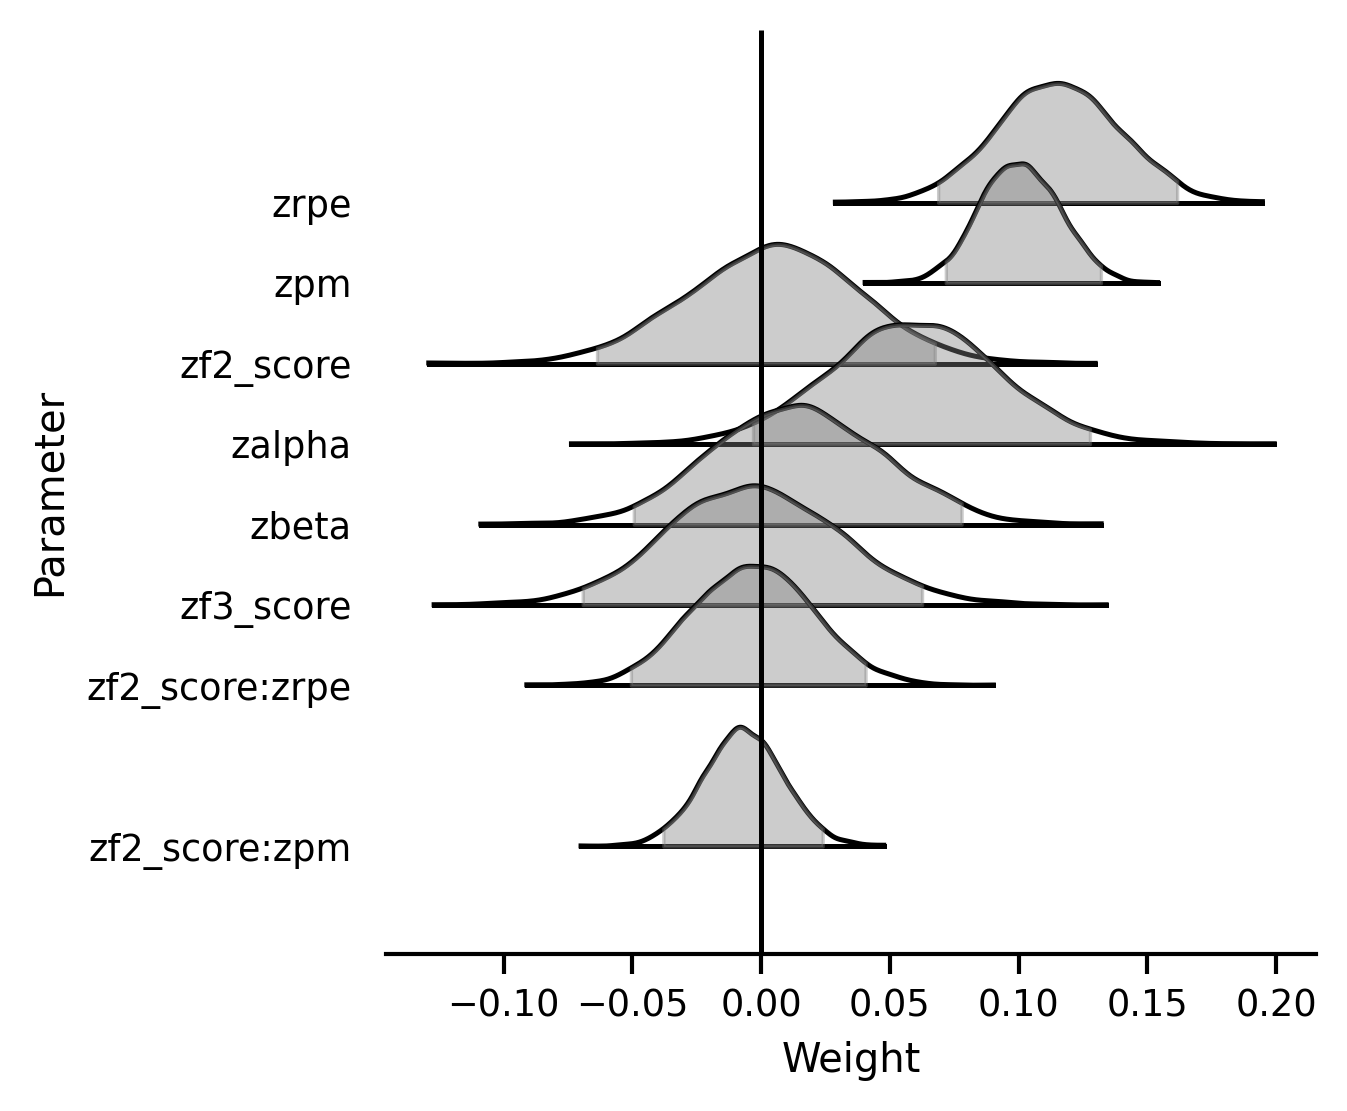

In [44]:
y = 'memory_outcome'
X = ['zrpe', 'zpm', 'zf2_score', 'zalpha', 'zbeta', 'zf3_score']
within_subject_X = ['zrpe', 'zpm']
Intx = ['zf2_score:zrpe', 'zf2_score:zpm']
rand_effect = ['participant']
categorical = None

# Drop nan data
model_df = model_df.dropna(subset=X)

model2, results2 = run_model(model_df, y=y, X=X, Intx=Intx, rand_effect=rand_effect, rand_slopes=True, within_subject_X=within_subject_X,
                           priors=None, categorical=categorical, cores=None, chains=4, tune=1500, draws=1500, 
                           target_accept=0.92, model_fam='bernoulli', 
                           output_dir='/sc/arion/projects/guLab/Salman/MemoryBanditManuscript/', 
                           return_model=True,
                           categorical_baseline=True, 
                           save_model_res = True, 
                           label=None)


f, ax = plt.subplots(1,1, dpi=300, figsize=(4,4))
ax.set(xlabel='Weight', ylabel='Parameter')
sns.despine()
plot_res(results2, X, ax=ax)

Because Factors 1 and 2 are collinear, let's compare which is better for the modeling of memory, and use that one moving forward. Factor 3 (OCD) can be contained in the model regardless. 

<AxesSubplot: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

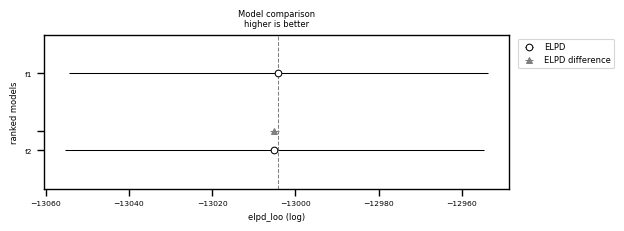

In [45]:
model_compare = az.compare({'f1':results1, 
            'f2':results2})
az.plot_compare(model_compare)

In [46]:
model_compare

rank      elpd_loo       p_loo  elpd_diff        weight         se  \
f1     0 -13004.187403  185.261119   0.000000  1.000000e+00  50.342288   
f2     1 -13005.073327  185.256722   0.885925  1.110223e-16  50.340472   

         dse  warning scale  
f1  0.000000    False   log  
f2  1.004566    False   log

Factor 1 is better by the tiniest amount

In [248]:
# y = 'memory_outcome'
# X = ['zrpe', 'zpm', 'zsds_score', 'zalpha', 'zbeta']
# within_subject_X = ['zrpe', 'zpm']
# Intx = ['zsds_score:zrpe', 'zsds_score:zpm']
# rand_effect = ['participant']
# categorical = None

# # Drop nan data
# model_df = model_df.dropna(subset=X)

# model, results = run_model(model_df, y=y, X=X, Intx=Intx, rand_effect=rand_effect, rand_slopes=True, within_subject_X=within_subject_X,
#                            priors=None, categorical=categorical, cores=None, chains=4, tune=1500, draws=1500, 
#                            target_accept=0.9, model_fam='bernoulli', 
#                            output_dir='/sc/arion/projects/guLab/Salman/MemoryBanditManuscript/', 
#                            return_model=True,
#                            categorical_baseline=True, 
#                            save_model_res = True, 
#                            label=None)


# f, ax = plt.subplots(1,1, dpi=300, figsize=(4,4))
# ax.set(xlabel='Weight', ylabel='Parameter')
# sns.despine()
# plot_res(results, X, ax=ax)

In [293]:
# # Load the already-run model: 
# X = ['zrpe', 'zpm', 'zsds_score', 'zalpha', 'zbeta']
# y= 'memory_outcome'
# label =(f"{y}" + "_{}"*len(X)).format(*X)
# results = az.from_netcdf(f'/sc/arion/projects/guLab/Salman/MemoryBanditManuscript/{label}_model')


In [408]:
save_dir_plots

'/sc/arion/projects/guLab/Salman/MemoryBanditManuscript/Figures/Exp1'

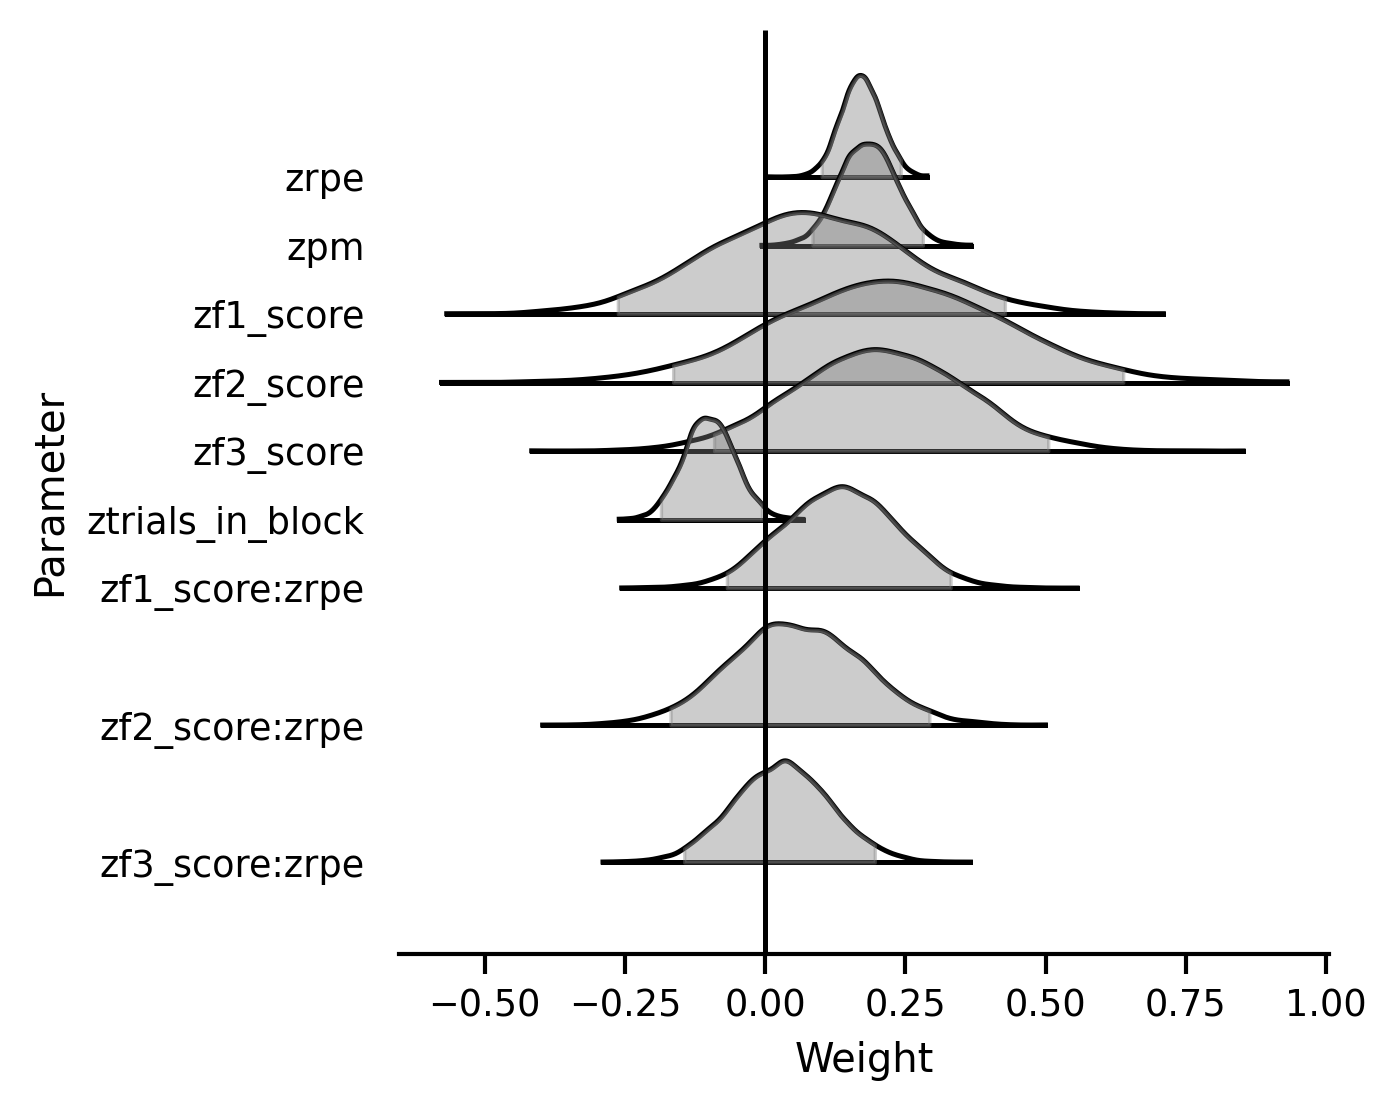

In [406]:
with PdfPages(f'{save_dir_plots}/Exp1_Posteriors_FactorAnalysis.pdf') as pdf:    

    f, ax = plt.subplots(1,1, dpi=300, figsize=(4,4))
    ax.set(xlabel='Weight', ylabel='Parameter')
    sns.despine()
    plot_res(results1, X, ax=ax)
    
    pdf.savefig(f)

Text(0, 0.5, 'subject dprime')

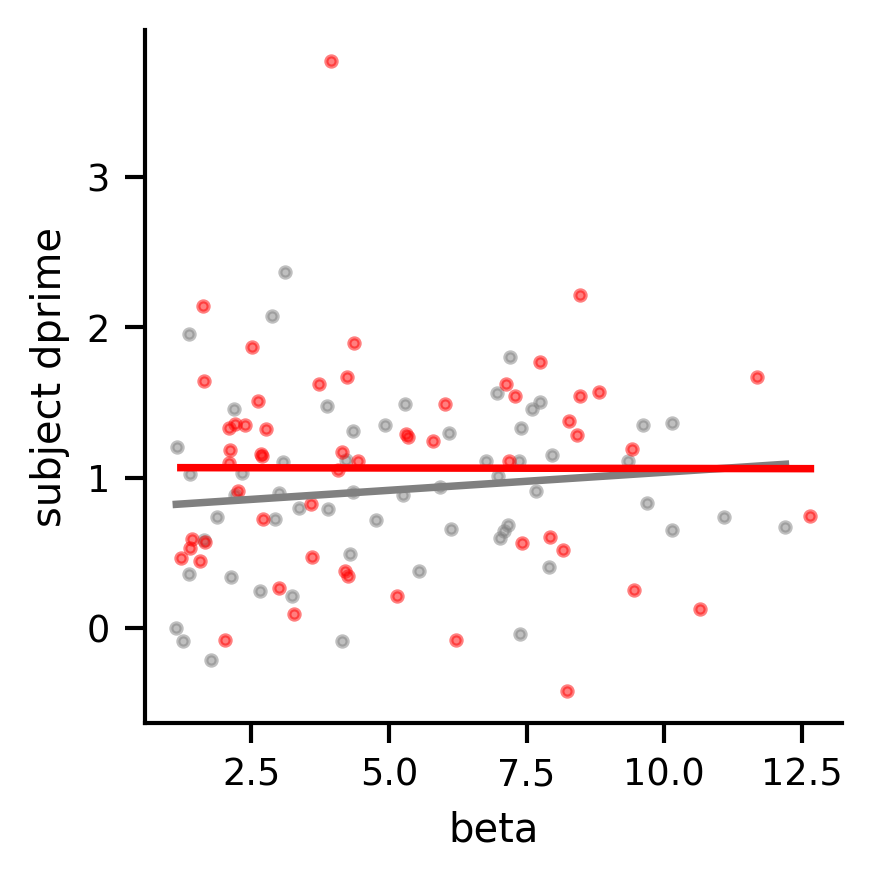

In [295]:
f, ax = plt.subplots(1,1, dpi=300, figsize=(3,3))
sns.regplot(data=sub_level_df_psych[sub_level_df_psych.f1_state=='low'], x='beta', y='dprime', color = 'gray',
            ci=None, scatter_kws={'s':6, 'alpha':0.5})
sns.regplot(data=sub_level_df_psych[sub_level_df_psych.f1_state=='high'], x='beta', y='dprime', color = 'red', 
            ci=None, scatter_kws={'s':6, 'alpha':0.5})
sns.despine()
# ax.set(xticks=np.linspace(0,1,5), ylabel="subject d'")
ax.set_ylabel('subject dprime')

In [23]:
# y = 'memory_outcome'
# X = ['zrpe', 'zpm', 'zf1_score', 'zf2_score', 'zf3_score', 'ztrials_in_block']

# label = (f"{y}" + "_{}"*len(X)).format(*X)


# label = 'expanded_factor_analysis_regression_R_oblique'
factor = 'zf1_score'
label = f'expanded_factor_analysis_regression_R_oblique_{factor}'
# idata = az.from_netcdf(f'/sc/arion/projects/guLab/Salman/MemoryBanditManuscript/{label}_model')

result_csv = pd.read_csv(f'/sc/arion/projects/guLab/Salman/MemoryBanditManuscript/{label}_summary.csv')
result_csv.rename(columns={'Unnamed: 0': 'parameter'}, inplace=True)
# # pattern = r'\[(.*?)\]'
pattern = r'\[(\d.*?)]'

# use the re.search() function to search for the first occurrence of the pattern
# match = re.search(pattern, input_string)
result_csv['participant'] = result_csv.parameter.str.extract(pattern)

pm_index = result_csv[result_csv.parameter.str.contains('zpm')].dropna(subset=['participant'])['parameter'].index 
result_csv.loc[pm_index, 'parameter'] = 'zpm_weight'
rpe_index = result_csv[result_csv.parameter.str.contains('zrpe')].dropna(subset=['participant'])['parameter'].index 
result_csv.loc[rpe_index, 'parameter'] = 'zrpe_weight'
rpe_index = result_csv[result_csv.parameter.str.contains('ztrials_in_block')].dropna(subset=['participant'])['parameter'].index 
result_csv.loc[rpe_index, 'parameter'] = 'ztrials_in_block_weight'


In [24]:
# Prep a list to store results 
all_res = [] 

full_data_psych['img_cat'] = full_data_psych.apply(lambda x: 'male' if x.male==1 else 'female', axis=1)

model_df = full_data_psych[['hits', 'false_alarms', 'misses', 'correct_rejections', 'rpe', 'pm', 'dprime', 
                           'alpha', 'beta', 'age', 'Sex', 'reward', 'participant', 'hit_rate', 'f1_score', 'f2_score', 'f3_score',
                           'false_alarm_rate', 'gamble_rt_log', 'recog_rt_log', 'image_type', 'img_cat', 'sds_score',
                           'depr_state', 'f1_state', 'f2_state', 'f3_state']].copy()

# Make a new response variable, memory outcome 
model_df['memory_outcome'] = model_df[['hits', 'misses', 'correct_rejections', 
                                       'false_alarms']].idxmax(1).to_frame('memory_outcome')

# CODE THE VARIABLES: 
model_df['memory_outcome'][model_df['memory_outcome'].isin(['misses', 'false_alarms'])] = 0
model_df['memory_outcome'][model_df['memory_outcome'].isin(['hits', 'correct_rejections'])] = 1


# Define the dependent variable and the independent variables
dependent_var = 'hits'
independent_vars = ['rpe', 'pm']

# Set response variable as in 
model_df[dependent_var] = model_df[dependent_var].astype(int)
# Zscore independent variables: 
for factor in independent_vars: 
    if factor not in ['Sex', 'reward']:
        # Set nan's to 0 to capture the LACK of RPE 
        if factor == 'rpe':
            model_df[f'{factor}'] = model_df[f'{factor}'].fillna(0)        
        if factor in ['pm', 'rpe']:
            model_df[f'z{factor}'] = np.nan
            for subj in model_df.participant.unique(): 
                model_df[f'z{factor}'][model_df.participant==subj] = (model_df[factor][model_df.participant==subj].values - np.nanmean(model_df[factor][model_df.participant==subj].values)) / (2*np.nanstd(model_df[factor][model_df.participant==subj].values))
        else: 
            model_df[f'z{factor}'] = (model_df[factor].values - np.nanmean(model_df[factor].values)) / (2*np.nanstd(model_df[factor].values))


independent_vars = ['zrpe', 'zpm']

# , 'gamble_rt_log', 'recog_rt_log', 'C(img_cat)'

# model_df = model_df[model_df.depr_state!='med']
      
# cat_type = CategoricalDtype(categories=['low', 'high'], ordered=True)
# model_df.depr_state = model_df.depr_state.astype(cat_type)

all_participants = model_df.participant.unique()
model_betas = [] 

for pid in all_participants:
    dfs = [] 
    models = {} 
    subj_df = model_df[model_df.participant==pid]
    
    # make regression weights based on response var frequency
    y_ind = subj_df[dependent_var].astype(int)
    recip_freq = 1. / np.bincount(y_ind)
    recip_freq /= np.mean(recip_freq)
    wts = recip_freq[y_ind]
    
    if (y_ind.sum()<10) | (y_ind.sum()>110):
        print(subj_df.dprime.mean(), y_ind.sum())
        print('model failure - imbalanced data')
        continue
    else:
        # Make the model formula
        formula = f'{dependent_var} ~ 1+'+'+'.join(independent_vars)
        # Make the model
        model = smf.glm(formula = formula, family=sm.families.Binomial(), data=subj_df, freq_weights=wts)
        # Set the baseline 
        model._ynames_map = {0: 0, 1: 1}
        # Fit the model 
        try:
            results = model.fit()
        except:
            print('model failure - perfect separation')
            continue

    # Collect the individual subject model results. 
    glm_df_temp = results.params.to_dict()
    glm_df = pd.DataFrame(columns=['subj_dprime', 'participant', 'alpha_pos', 'alpha_neg', 'beta'])
    glm_df['GLMBeta'] = list(glm_df_temp.values())
    glm_df['GLMFactor'] = list(glm_df_temp.keys())
    glm_df['subj_dprime'] = subj_df.dprime.mean()
    glm_df['subj_reward'] = subj_df.reward.sum()
    glm_df['subj_rpe'] = subj_df.rpe.mean() 
    glm_df['subj_HR'] = subj_df.hit_rate.mean()
    glm_df['subj_FAR'] = subj_df.false_alarm_rate.mean()
    glm_df['subj_gamble_rt'] = subj_df.gamble_rt_log.mean()
    glm_df['subj_recog_rt'] = subj_df.recog_rt_log.mean()
    glm_df['alpha'] = subj_df.alpha.mean()
    glm_df['beta'] = subj_df.beta.mean()
    glm_df['participant'] = pid
    glm_df['zrpe_weight'] = glm_df_temp['zrpe']
    glm_df['zpm_weight'] = glm_df_temp['zpm']
    # glm_df['ztimereversal_weight'] = result_csv[(result_csv['participant'].str.contains(pid)) & (result_csv.parameter=='ztrials_in_block_weight')]['mean'].values[0]
    glm_df['zrpe_weight_mm'] = result_csv[(result_csv['participant'].str.contains(pid)) & (result_csv.parameter=='zrpe_weight')]['mean'].values[0]
    glm_df['zpm_weight_mm'] = result_csv[(result_csv['participant'].str.contains(pid)) & (result_csv.parameter=='zpm_weight')]['mean'].values[0]
    glm_df['f1_score'] = subj_df.f1_score.iloc[0]
    glm_df['f2_score'] = subj_df.f2_score.iloc[0]
    glm_df['f3_score'] = subj_df.f3_score.iloc[0]
    glm_df['depr_state'] = subj_df.depr_state.iloc[0]
    glm_df['f1_state'] = subj_df.f1_state.iloc[0]
    glm_df['f2_state'] = subj_df.f2_state.iloc[0]
    glm_df['f3_state'] = subj_df.f3_state.iloc[0]


    model_betas.append(glm_df)
model1_df = pd.concat(model_betas)
model1_df.reset_index(drop=True, inplace=True)

# # Group the data by participant 
model1_df_subj = model1_df.groupby(['participant']).mean().reset_index()
model1_df_subj = model1_df_subj.merge(model1_df['participant'], on='participant').drop_duplicates()
model1_df_subj = model1_df_subj.merge(full_data_psych[['participant', 
                                                   'anx_t_state', 'stai_t_score', 'f1_state',
                                                   'depr_state', 'sds_score', 'f2_state', 'f3_state',
                                                   'anx_s_state', 'stai_s_score', 'ocirscore',
                                                   'ocd_state']], on='participant').drop_duplicates()




nan 0
model failure - imbalanced data
0.2618594998508348 5
model failure - imbalanced data
0.7974812463221248 9
model failure - imbalanced data


/tmp/ipykernel_21776/3842412014.py:115: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  model1_df_subj = model1_df.groupby(['participant']).mean().reset_index()


In [42]:
mod_ = smf.ols(formula='subj_reward ~ f1_score', 
                     data=model1_df_subj).fit()
print(mod_.summary())
print(eq_test(mod_, regressor='f1_score', equivalence_margin=0.1, alpha=0.05))

                            OLS Regression Results                            
Dep. Variable:            subj_reward   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                  0.004073
Date:                Fri, 10 May 2024   Prob (F-statistic):              0.949
Time:                        18:13:04   Log-Likelihood:                -472.21
No. Observations:                 170   AIC:                             948.4
Df Residuals:                     168   BIC:                             954.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.9062      0.300    122.908      0.0

In [43]:
mod_ = smf.ols(formula='subj_dprime ~ f1_score', 
                     data=model1_df_subj).fit()
print(mod_.summary())
print(eq_test(mod_, regressor='f1_score', equivalence_margin=0.1, alpha=0.05))

                            OLS Regression Results                            
Dep. Variable:            subj_dprime   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.140
Date:                Fri, 10 May 2024   Prob (F-statistic):              0.287
Time:                        18:13:51   Log-Likelihood:                -148.34
No. Observations:                 170   AIC:                             300.7
Df Residuals:                     168   BIC:                             306.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9833      0.045     22.008      0.0

In [44]:
mod_ = smf.ols(formula='alpha ~ f1_score', 
                     data=model1_df_subj).fit()
print(mod_.summary())
print(eq_test(mod_, regressor='f1_score', equivalence_margin=0.1, alpha=0.05))

                            OLS Regression Results                            
Dep. Variable:                  alpha   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                  0.005217
Date:                Fri, 10 May 2024   Prob (F-statistic):              0.943
Time:                        18:14:04   Log-Likelihood:                 43.521
No. Observations:                 170   AIC:                            -83.04
Df Residuals:                     168   BIC:                            -76.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7292      0.014     50.452      0.0

In [45]:
mod_ = smf.ols(formula='beta ~ f1_score', 
                     data=model1_df_subj).fit()
print(mod_.summary())
print(eq_test(mod_, regressor='f1_score', equivalence_margin=0.1, alpha=0.05))

                            OLS Regression Results                            
Dep. Variable:                   beta   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.4088
Date:                Fri, 10 May 2024   Prob (F-statistic):              0.523
Time:                        18:14:20   Log-Likelihood:                -417.92
No. Observations:                 170   AIC:                             839.8
Df Residuals:                     168   BIC:                             846.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.9776      0.218     22.815      0.0

In [46]:
mod_ = smf.ols(formula='subj_gamble_rt ~ f1_score', 
                     data=model1_df_subj).fit()
print(mod_.summary())
print(eq_test(mod_, regressor='f1_score', equivalence_margin=0.1, alpha=0.05))

                            OLS Regression Results                            
Dep. Variable:         subj_gamble_rt   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                  0.001660
Date:                Fri, 10 May 2024   Prob (F-statistic):              0.968
Time:                        18:14:41   Log-Likelihood:                -72.996
No. Observations:                 170   AIC:                             150.0
Df Residuals:                     168   BIC:                             156.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5801      0.029    -20.224      0.0

In [47]:
mod_ = smf.ols(formula='subj_recog_rt ~ f1_score', 
                     data=model1_df_subj).fit()
print(mod_.summary())
print(eq_test(mod_, regressor='f1_score', equivalence_margin=0.1, alpha=0.05))

                            OLS Regression Results                            
Dep. Variable:          subj_recog_rt   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.134
Date:                Fri, 10 May 2024   Prob (F-statistic):              0.288
Time:                        18:16:29   Log-Likelihood:                -17.019
No. Observations:                 170   AIC:                             38.04
Df Residuals:                     168   BIC:                             44.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4320      0.021     20.935      0.0

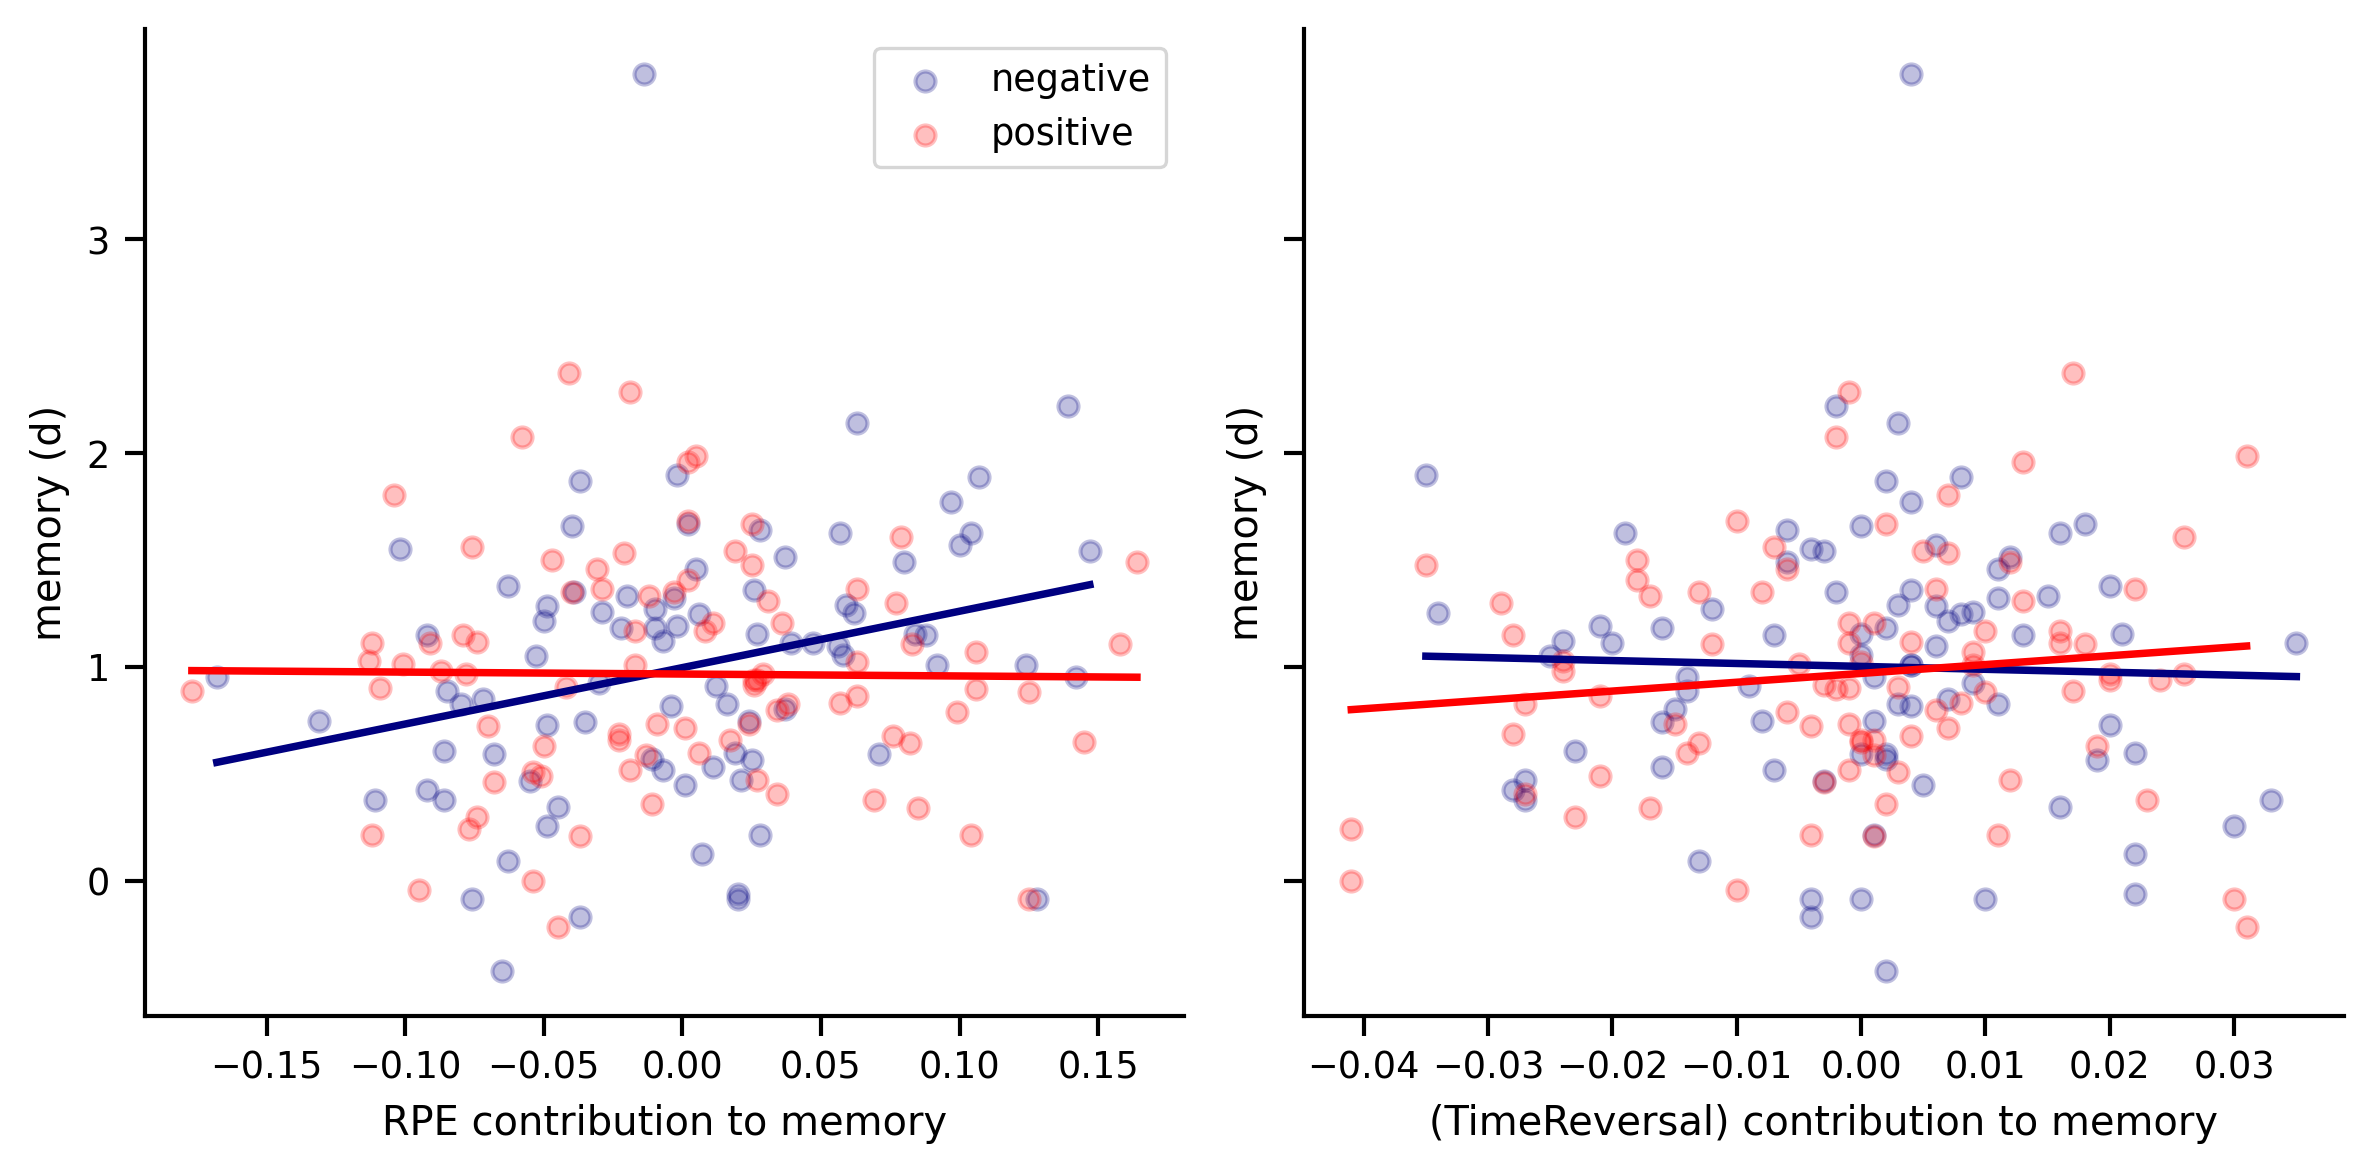

In [40]:
    f, ax = plt.subplots(1,2, dpi=300, figsize=(8,4), sharey=True)
    sns.regplot(data=model1_df_subj[model1_df_subj.depr_state=='low'], x='zrpe_weight_mm', y='subj_dprime', label='negative',
                ci=None, ax=ax[0], scatter_kws={'alpha':0.25}, color='navy')
    sns.regplot(data=model1_df_subj[model1_df_subj.depr_state=='low'], x='zpm_weight_mm', y='subj_dprime', 
                ci=None, ax=ax[1], scatter_kws={'alpha':0.25}, color='navy')
    sns.regplot(data=model1_df_subj[model1_df_subj.depr_state=='high'], x='zrpe_weight_mm', y='subj_dprime', label='positive',
                ci=None, ax=ax[0], scatter_kws={'alpha':0.25}, color='red')
    sns.regplot(data=model1_df_subj[model1_df_subj.depr_state=='high'], x='zpm_weight_mm', y='subj_dprime', 
                ci=None, ax=ax[1], scatter_kws={'alpha':0.25}, color='red')
    ax[0].set(xlabel = 'RPE contribution to memory', ylabel='memory (d)')
    ax[1].set(xlabel = '(TimeReversal) contribution to memory', ylabel='memory (d)')
    ax[0].legend()
    sns.despine()
    f.tight_layout()

Do people with higher F1 scores have higher RPE reliance (betas)? 


In [60]:
ttest_ind(model1_df_subj[model1_df_subj.f1_state=='high'].zrpe_weight_mm,
         model1_df_subj[model1_df_subj.f1_state=='low'].zrpe_weight_mm)

Ttest_indResult(statistic=0.46706438318513005, pvalue=0.6413776534521662)

Nope

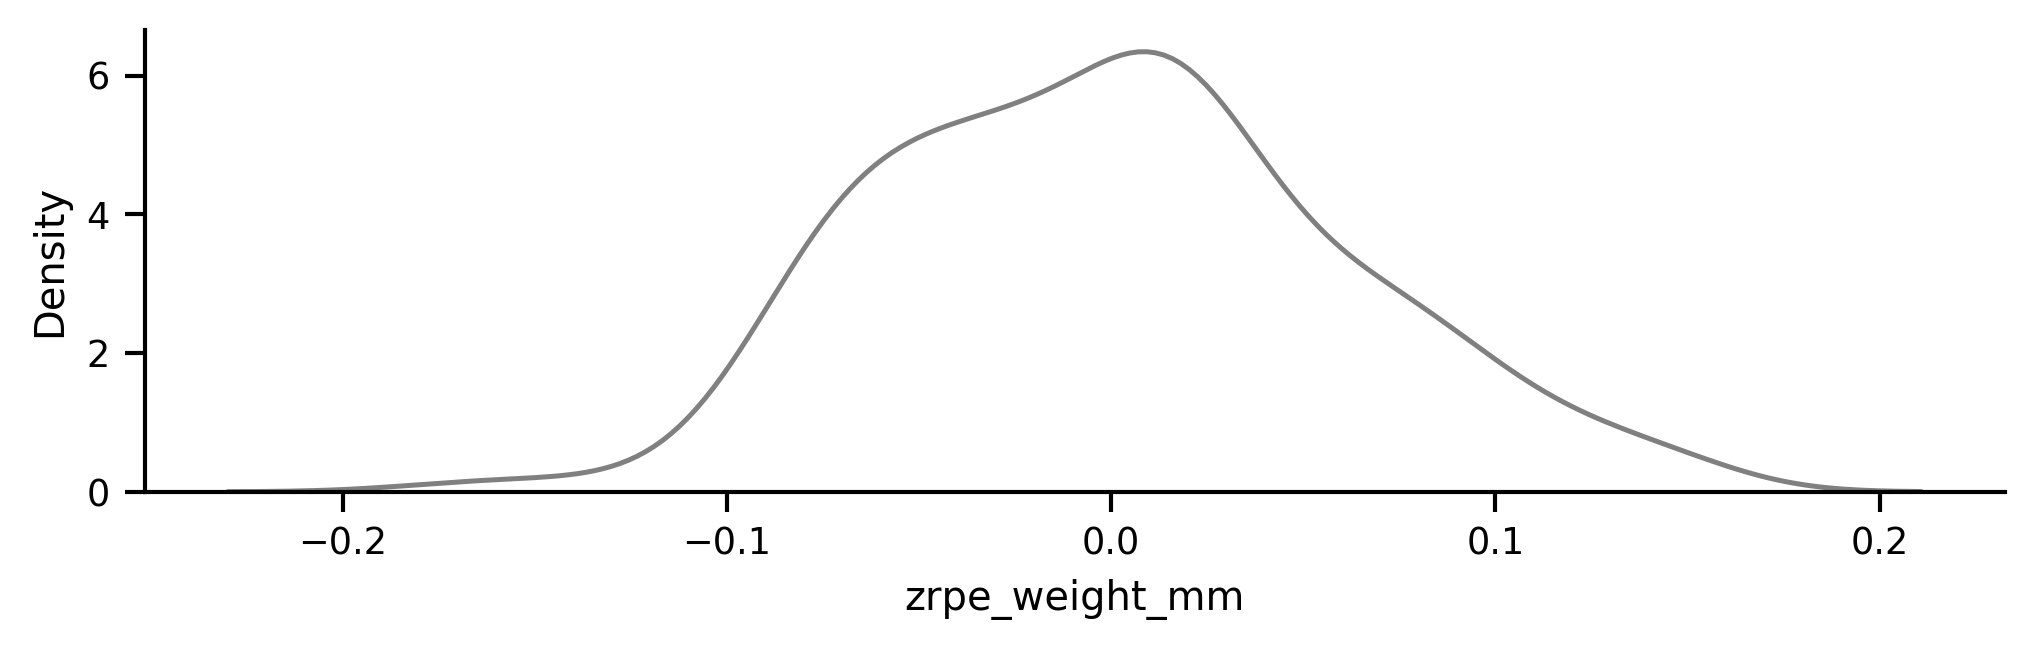

In [529]:
with PdfPages(f'{save_dir_plots}/RPE_Weight_Dist_F1.pdf') as pdf:    
    f, ax = plt.subplots(1,1, dpi=300, figsize=(8,2))
    sns.kdeplot(data=model1_df_subj, x='zrpe_weight_mm', color='gray')
    sns.despine()
    pdf.savefig()

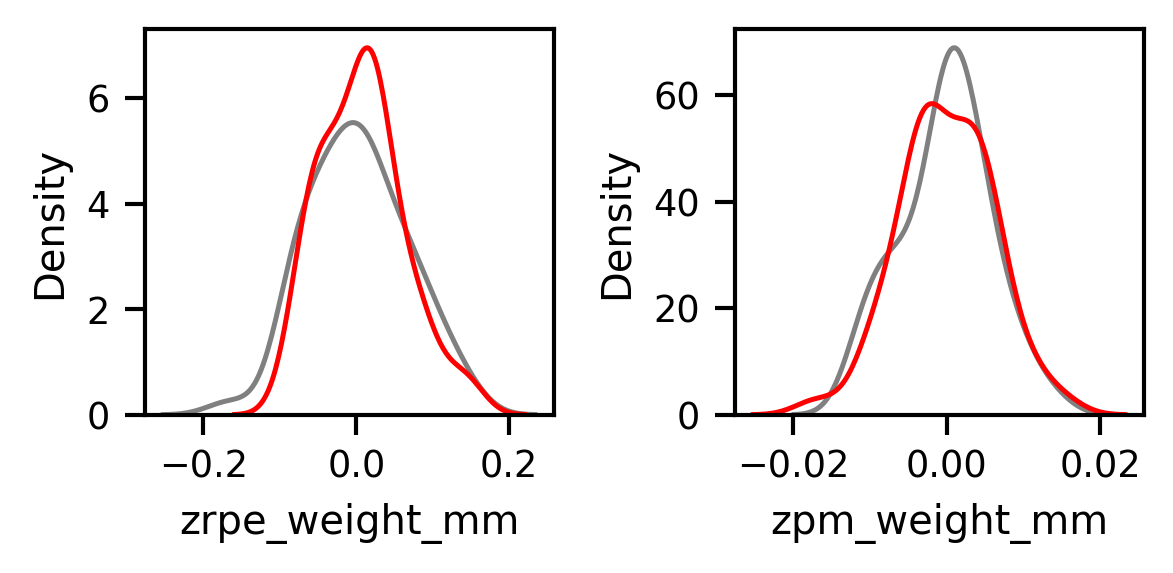

In [300]:
f, ax = plt.subplots(1,2, dpi=300, figsize=(4,2))
sns.kdeplot(data=model1_df_subj[model1_df_subj.f1_state=='low'], x='zrpe_weight_mm', color='gray', ax=ax[0])
sns.kdeplot(data=model1_df_subj[model1_df_subj.f1_state=='high'], x='zrpe_weight_mm', color='red', ax=ax[0])
sns.kdeplot(data=model1_df_subj[model1_df_subj.f1_state=='low'], x='zpm_weight_mm', color='gray', ax=ax[1])
sns.kdeplot(data=model1_df_subj[model1_df_subj.f1_state=='high'], x='zpm_weight_mm', color='red', ax=ax[1])
f.tight_layout()

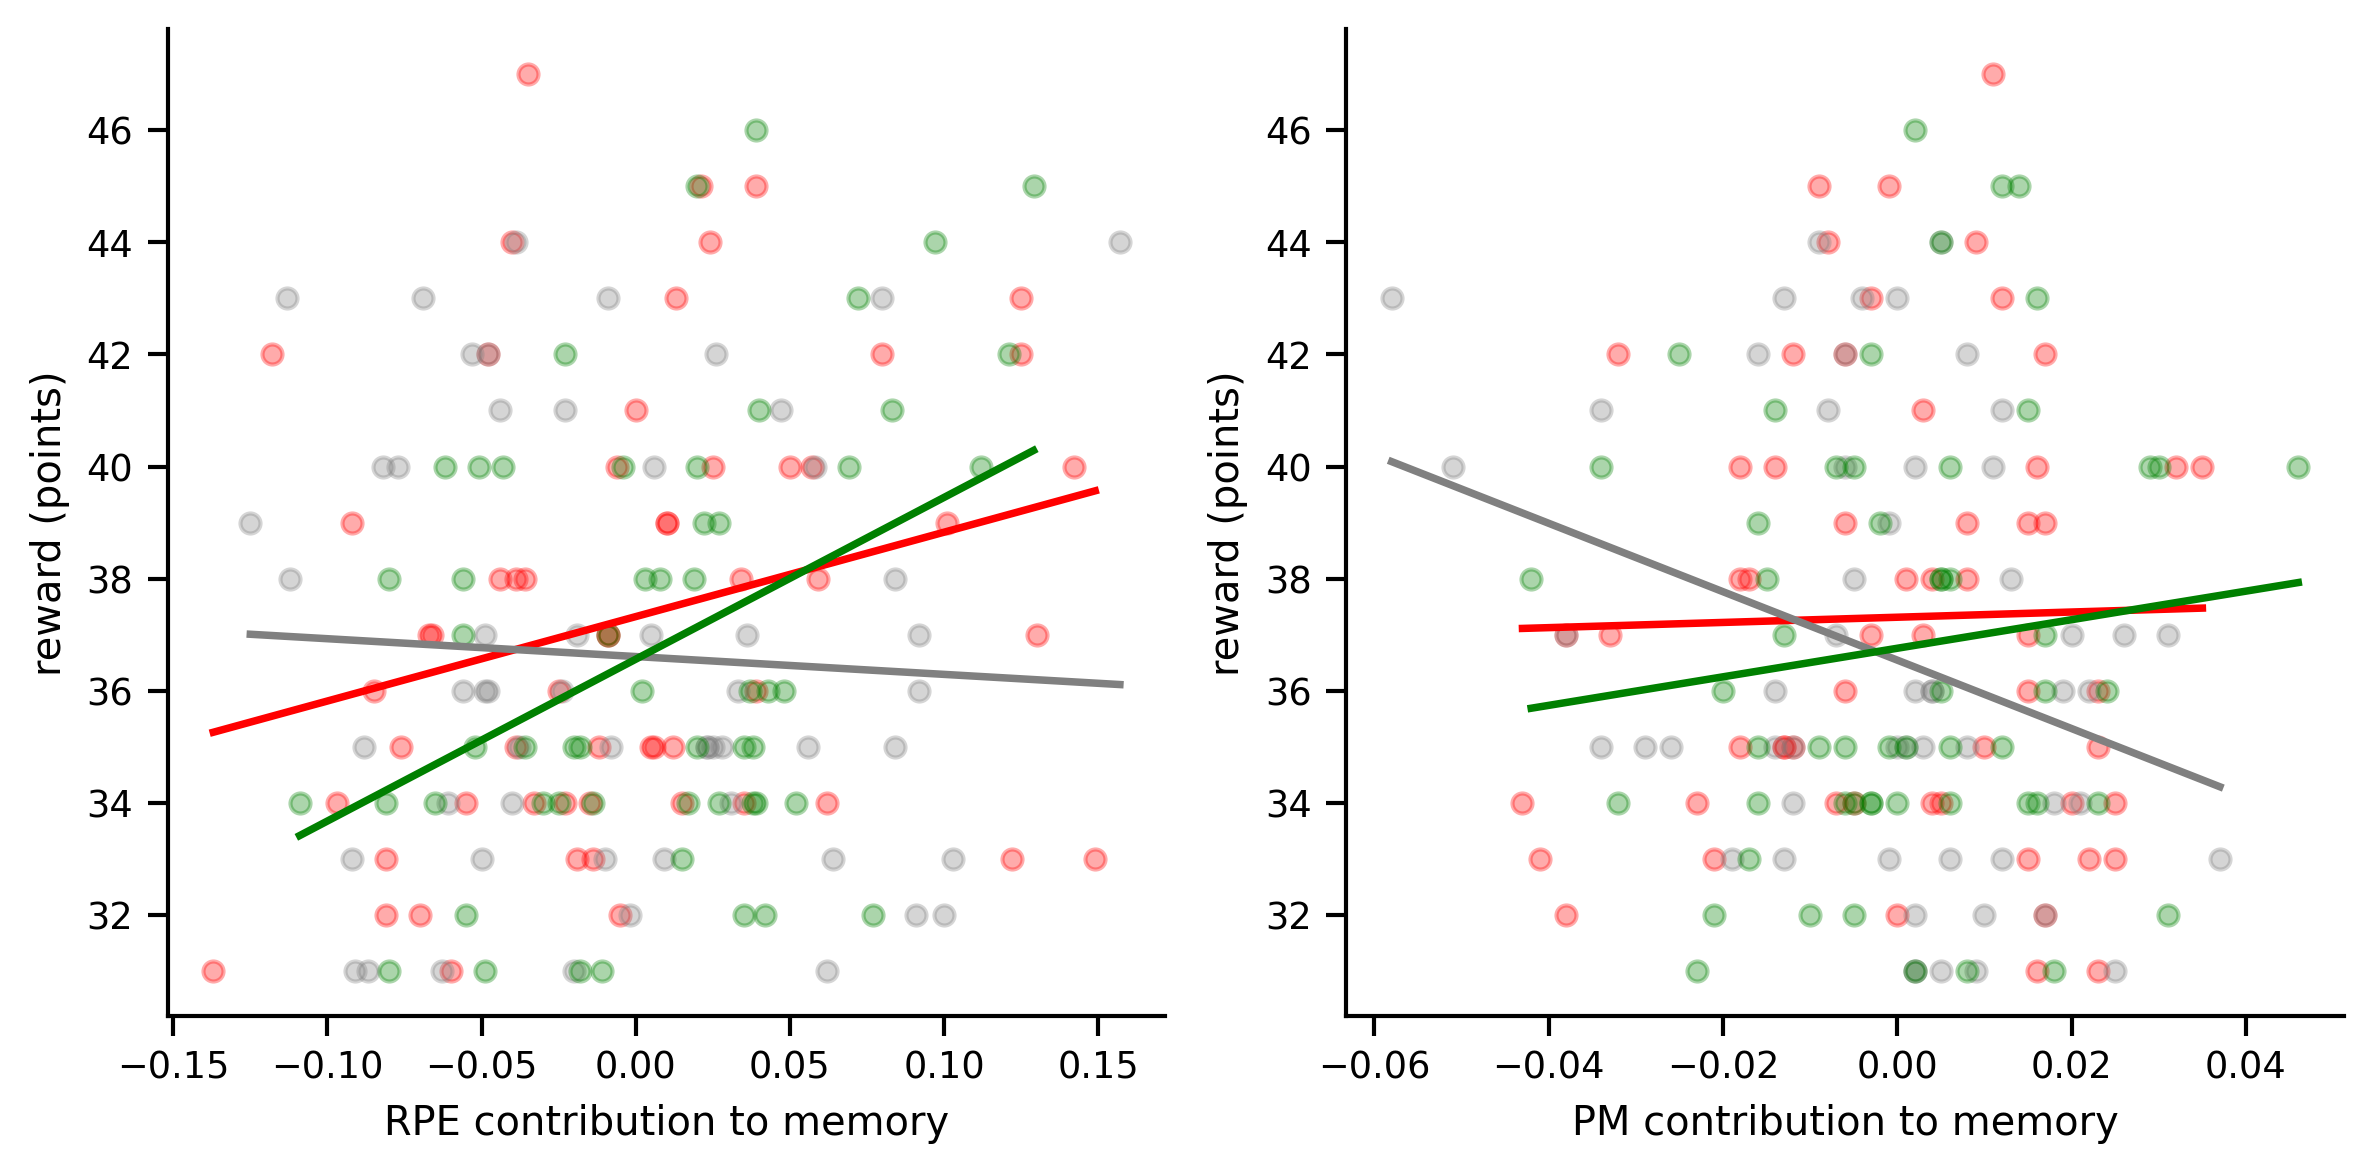

In [187]:
# sns.regplot(data=subj_mean_df, x='subj_dprime', y='aucs')
with PdfPages(f'{save_dir_plots}/Model1_Reward_Weights_F1.pdf') as pdf:    
    f, ax = plt.subplots(1,2, dpi=300, figsize=(8,4), sharey=False)
    sns.regplot(data=model1_df_subj[model1_df_subj.f1_state=='low'], y='subj_reward', x='zrpe_weight_mm', ci=None, ax=ax[0], scatter_kws={'alpha':0.33}, color='red')
    sns.regplot(data=model1_df_subj[model1_df_subj.f1_state=='low'], y='subj_reward', x='zpm_weight_mm', ci=None, ax=ax[1], scatter_kws={'alpha':0.33}, color='red')
    sns.regplot(data=model1_df_subj[model1_df_subj.f1_state=='med'], y='subj_reward', x='zrpe_weight_mm', ci=None, ax=ax[0], scatter_kws={'alpha':0.33}, color='gray')
    sns.regplot(data=model1_df_subj[model1_df_subj.f1_state=='med'], y='subj_reward', x='zpm_weight_mm', ci=None, ax=ax[1], scatter_kws={'alpha':0.33}, color='gray')
    sns.regplot(data=model1_df_subj[model1_df_subj.f1_state=='high'], y='subj_reward', x='zrpe_weight_mm', ci=None, ax=ax[0], scatter_kws={'alpha':0.33}, color='green')
    sns.regplot(data=model1_df_subj[model1_df_subj.f1_state=='high'], y='subj_reward', x='zpm_weight_mm', ci=None, ax=ax[1], scatter_kws={'alpha':0.33}, color='green')
    ax[0].set(ylabel = 'reward (points)', xlabel='RPE contribution to memory')
    ax[1].set(ylabel = 'reward (points)', xlabel='PM contribution to memory')
    sns.despine()
    f.tight_layout()
    pdf.savefig()

In [188]:
r1, p1 = pearsonr(model1_df_subj[model1_df_subj.f1_state=='low'].dropna(subset='subj_reward').zrpe_weight_mm, 
        model1_df_subj[model1_df_subj.f1_state=='low'].dropna(subset='subj_reward').subj_reward)
r2, p2 = pearsonr(model1_df_subj[model1_df_subj.f1_state=='high'].dropna(subset='subj_reward').zrpe_weight_mm, 
        model1_df_subj[model1_df_subj.f1_state=='high'].dropna(subset='subj_reward').subj_reward)
F, p = compare_corr(r1, r2, 
                    model1_df_subj[model1_df_subj.f1_state=='low'].dropna(subset='subj_reward').subj_reward.shape[0], 
                    model1_df_subj[model1_df_subj.f1_state=='high'].dropna(subset='subj_reward').subj_reward.shape[0])
print(F, p )

0.8477254489986815 0.3965908899948223


In [56]:
f1_regress = smf.ols(formula='subj_reward ~ f1_score*zrpe_weight_mm', 
                     data=model1_df_subj).fit()
f1_regress.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            subj_reward   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     3.430
Date:                Mon, 26 Jun 2023   Prob (F-statistic):             0.0185
Time:                        11:15:18   Log-Likelihood:                -465.13
No. Observations:                 170   AIC:                             938.3
Df Residuals:                     166   BIC:                             950.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  36.8921      0.290    127.326      0.000      36.320      37.464
f1_score                   -0.0778      0.299     -0.260      0.795      -0.669       0.513
zrpe_weight_mm             14.2179      4.850      2.931      0.004       4.642      23.794
f1_score:zrpe_weight_mm     6.7445      5.082      1.327      0.186      -3.290      16.779
==============================================================================
Omnibus:                        8.947   Durbin-Watson:                   2.168
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                7.354
Skew:                           0.417   Prob(JB):                       0.0253
Kurtosis:                       2.414   Cond. No.                         17.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
f1_regress = smf.ols(formula='subj_reward ~ f1_score*zpm_weight_mm', 
                     data=model1_df_subj).fit()
f1_regress.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            subj_reward   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     2.014
Date:                Mon, 26 Jun 2023   Prob (F-statistic):              0.114
Time:                        11:15:22   Log-Likelihood:                -467.20
No. Observations:                 170   AIC:                             942.4
Df Residuals:                     166   BIC:                             954.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 36.9084      0.293    125.836      0.000      36.329      37.488
f1_score                  -0.1360      0.305     -0.446      0.656      -0.738       0.466
zpm_weight_mm            -79.2903     48.953     -1.620      0.107    -175.940      17.360
f1_score:zpm_weight_mm   -89.7565     47.845     -1.876      0.062    -184.219       4.706
==============================================================================
Omnibus:                       10.306   Durbin-Watson:                   2.173
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                8.097
Skew:                           0.432   Prob(JB):                       0.0175
Kurtosis:                       2.371   Cond. No.                         168.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/tmp/ipykernel_205148/1777046067.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=model1_df_subj[model1_df_subj.zpm_weight_mm>0], x='f1_state', y='subj_reward',
/tmp/ipykernel_205148/1777046067.py:12: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=model1_df_subj[model1_df_subj.zpm_weight_mm<=0], x='f1_state', y='subj_reward',


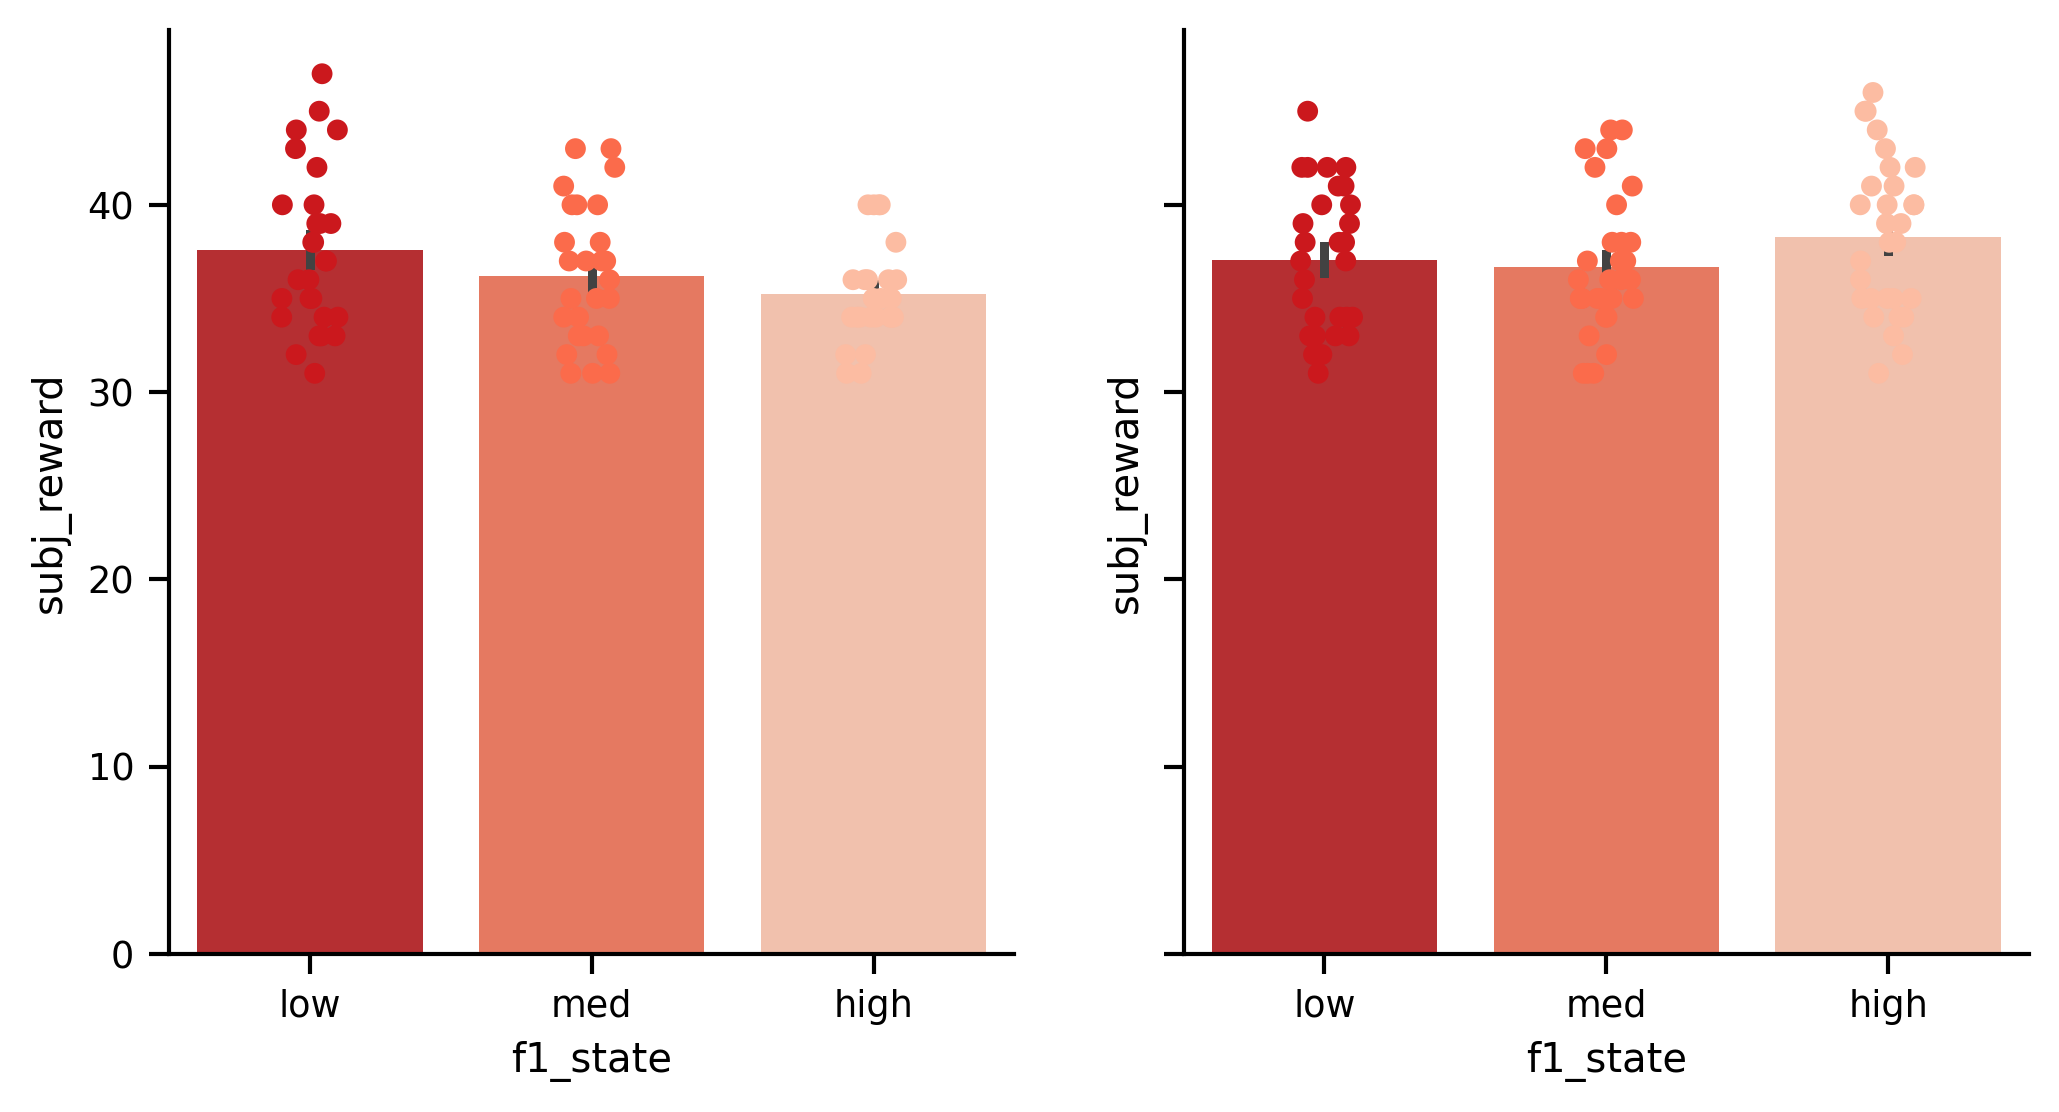

In [525]:
with PdfPages(f'{save_dir_plots}/Model1_Reward_Weights_F1_bar.pdf') as pdf:
    f, ax = plt.subplots(1,2, dpi=300, figsize=(8,4), sharey=True)
    sns.barplot(data=model1_df_subj[model1_df_subj.zpm_weight_mm>0], x='f1_state', y='subj_reward', 
                errorbar='se', palette='Reds_r', ax=ax[0])
    sns.despine()
    sns.stripplot(data=model1_df_subj[model1_df_subj.zpm_weight_mm>0], x='f1_state', y='subj_reward', 
                  palette='Reds_r', ax=ax[0])

    sns.barplot(data=model1_df_subj[model1_df_subj.zpm_weight_mm<=0], x='f1_state', y='subj_reward', 
                errorbar='se', palette='Reds_r', ax=ax[1])
    sns.despine()
    sns.stripplot(data=model1_df_subj[model1_df_subj.zpm_weight_mm<=0], x='f1_state', y='subj_reward', 
                  palette='Reds_r', ax=ax[1])
    
    pdf.savefig()

In [498]:
# r1, p1 = pearsonr(model1_df_subj.zrpe_weight, 
#         model1_df_subj.subj_reward)
# r2, p2 = pearsonr(model1_df_subj.zpm_weight, 
#         model1_df_subj.subj_reward)
# F, p = compare_corr(r1, r2, 
#                     model1_df_subj.subj_reward.shape[0], model1_df_subj.subj_reward.shape[0])
# print(F, p )

In [302]:
# # sns.regplot(data=subj_mean_df, x='subj_dprime', y='aucs')
# with PdfPages(f'{save_dir_plots}/Fig_LogRegress_WeightsvMemory_F1.pdf') as pdf:    
#     f, ax = plt.subplots(1,2, dpi=300, figsize=(8,4), sharey=True)
#     sns.regplot(data=model1_df_subj[model1_df_subj.depr_state=='low'], x='zrpe_weight_mm', y='subj_dprime', ci=None, ax=ax[0], scatter_kws={'alpha':0.33}, color='gray')
#     sns.regplot(data=model1_df_subj[model1_df_subj.depr_state=='low'], x='zpm_weight_mm', y='subj_dprime', ci=None, ax=ax[1], scatter_kws={'alpha':0.33}, color='gray')
#     sns.regplot(data=model1_df_subj[model1_df_subj.depr_state=='high'], x='zrpe_weight_mm', y='subj_dprime', ci=None, ax=ax[0], scatter_kws={'alpha':0.33}, color='r')
#     sns.regplot(data=model1_df_subj[model1_df_subj.depr_state=='high'], x='zpm_weight_mm', y='subj_dprime', ci=None, ax=ax[1], scatter_kws={'alpha':0.33}, color='r')
#     ax[0].set(xlabel = 'RPE contribution to memory', ylabel='memory (d)')
#     ax[1].set(xlabel = 'PM contribution to memory', ylabel='memory (d)')
#     sns.despine()
#     f.tight_layout()
#     pdf.savefig()

In [303]:
# r1, p1 = pearsonr(model1_df_subj[model1_df_subj.depr_state=='low'].dropna(subset='subj_dprime').zrpe_weight_mm, 
#         model1_df_subj[model1_df_subj.depr_state=='low'].dropna(subset='subj_dprime').subj_dprime)
# r2, p2 = pearsonr(model1_df_subj[model1_df_subj.depr_state=='high'].dropna(subset='subj_dprime').zrpe_weight_mm, 
#         model1_df_subj[model1_df_subj.depr_state=='high'].dropna(subset='subj_dprime').subj_dprime)
# F, p = compare_corr(r1, r2, 
#                     model1_df_subj[model1_df_subj.depr_state=='low'].dropna(subset='subj_dprime').subj_dprime.shape[0], 
#                     model1_df_subj[model1_df_subj.depr_state=='high'].dropna(subset='subj_dprime').subj_dprime.shape[0])
# print(F, p )

<AxesSubplot: xlabel='f1_score', ylabel='zrpe_weight_mm'>

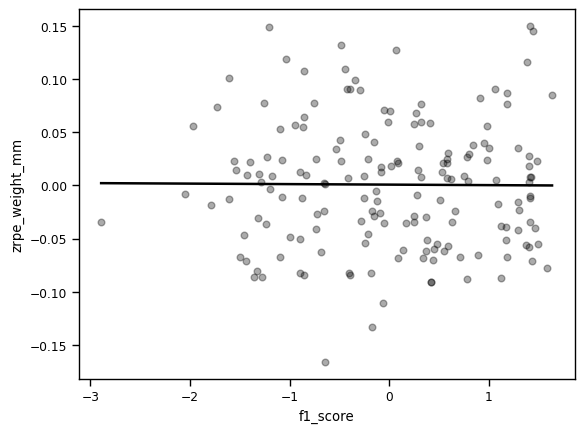

In [66]:
sns.regplot(data=model1_df_subj, x='f1_score', y='zrpe_weight_mm', ci=None, scatter_kws={'alpha':0.33}, color='black')


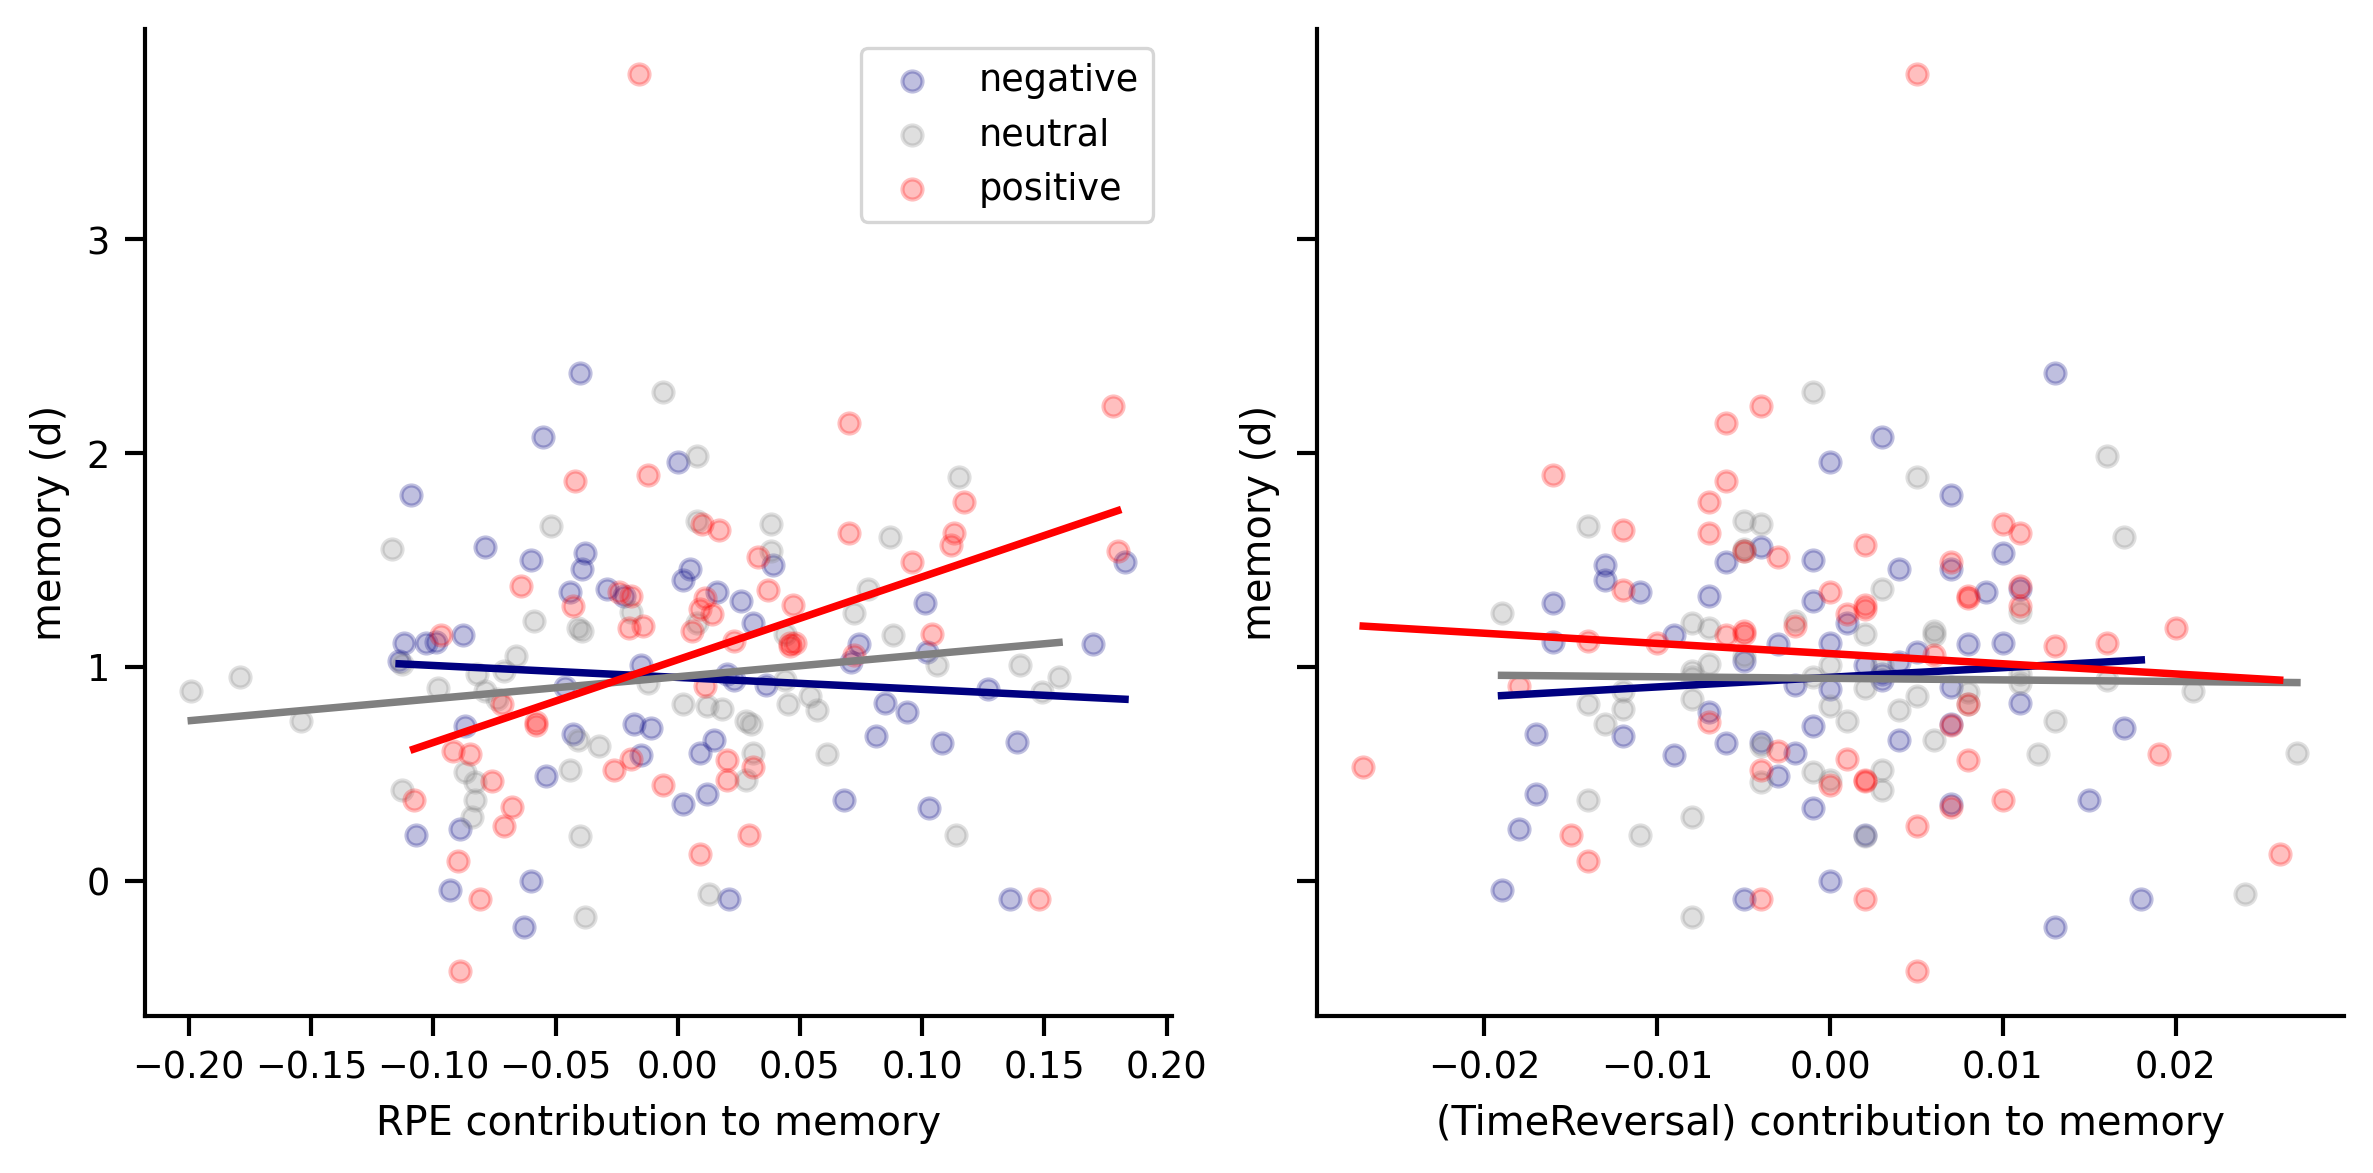

In [27]:
# sns.regplot(data=subj_mean_df, x='subj_dprime', y='aucs')
with PdfPages(f'{save_dir_plots}/Fig_LogRegress_WeightsvMemory_F1_Expanded_Revision.pdf') as pdf:    
    f, ax = plt.subplots(1,2, dpi=300, figsize=(8,4), sharey=True)
    sns.regplot(data=model1_df_subj[model1_df_subj.f1_state=='low'], x='zrpe_weight_mm', y='subj_dprime', label='negative',
                ci=None, ax=ax[0], scatter_kws={'alpha':0.25}, color='navy')
    sns.regplot(data=model1_df_subj[model1_df_subj.f1_state=='low'], x='zpm_weight_mm', y='subj_dprime', 
                ci=None, ax=ax[1], scatter_kws={'alpha':0.25}, color='navy')
    sns.regplot(data=model1_df_subj[model1_df_subj.f1_state=='med'], x='zrpe_weight_mm', y='subj_dprime', label='neutral',
                ci=None, ax=ax[0], scatter_kws={'alpha':0.25}, color='gray')
    sns.regplot(data=model1_df_subj[model1_df_subj.f1_state=='med'], x='zpm_weight_mm', y='subj_dprime', 
                ci=None, ax=ax[1], scatter_kws={'alpha':0.25}, color='gray')
    sns.regplot(data=model1_df_subj[model1_df_subj.f1_state=='high'], x='zrpe_weight_mm', y='subj_dprime', label='positive',
                ci=None, ax=ax[0], scatter_kws={'alpha':0.25}, color='red')
    sns.regplot(data=model1_df_subj[model1_df_subj.f1_state=='high'], x='zpm_weight_mm', y='subj_dprime', 
                ci=None, ax=ax[1], scatter_kws={'alpha':0.25}, color='red')
    ax[0].set(xlabel = 'RPE contribution to memory', ylabel='memory (d)')
    ax[1].set(xlabel = '(TimeReversal) contribution to memory', ylabel='memory (d)')
    ax[0].legend()
    sns.despine()
    f.tight_layout()
    pdf.savefig()

In [265]:
f1_regress = smf.ols(formula='subj_dprime ~ f1_score*ztimereversal_weight', 
                     data=model1_df_subj).fit()
f1_regress.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            subj_dprime   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.8333
Date:                Fri, 28 Jul 2023   Prob (F-statistic):              0.477
Time:                        12:05:46   Log-Likelihood:                -147.64
No. Observations:                 170   AIC:                             303.3
Df Residuals:                     166   BIC:                             315.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         0.9848      0.045     22.000      0.000       0.896       1.073
f3_score                         -0.0328      0.047     -0.694      0.489      -0.126       0.061
ztimereversal_weight              1.6372      1.680      0.974      0.331      -1.680       4.954
f3_score:ztimereversal_weight    -1.8014      1.578     -1.141      0.255      -4.918       1.315
==============================================================================
Omnibus:                       22.086   Durbin-Watson:                   2.237
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.157
Skew:                           0.573   Prob(JB):                     5.75e-11
Kurtosis:                       5.311   Cond. No.                         38.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

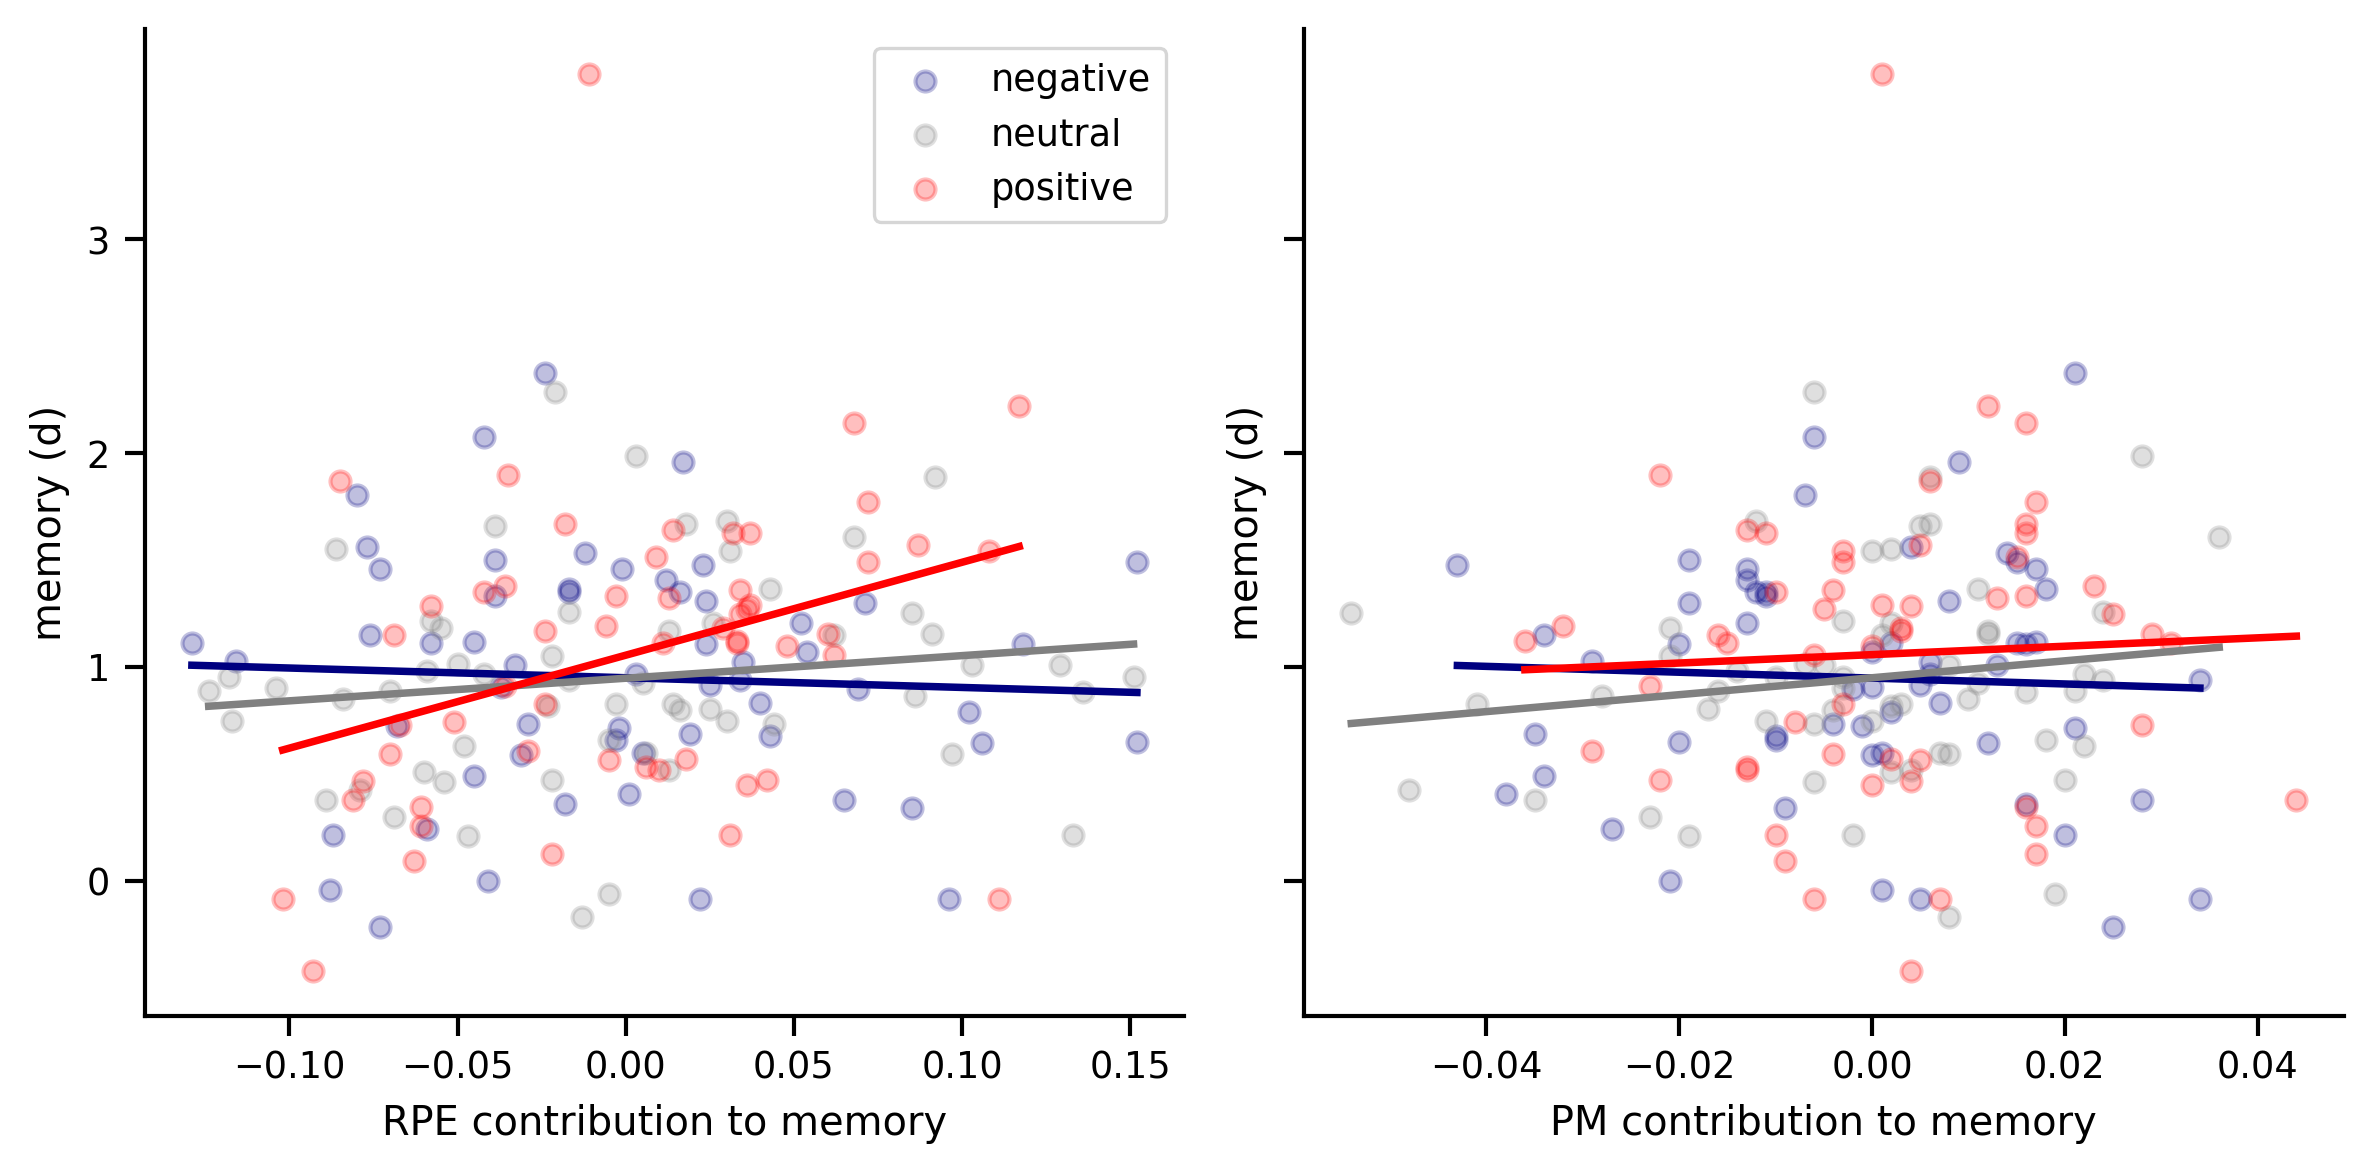

In [412]:
# sns.regplot(data=subj_mean_df, x='subj_dprime', y='aucs')
with PdfPages(f'{save_dir_plots}/Fig_LogRegress_WeightsvMemory_F1_Expanded.pdf') as pdf:    
    f, ax = plt.subplots(1,2, dpi=300, figsize=(8,4), sharey=True)
    sns.regplot(data=model1_df_subj[model1_df_subj.f1_state=='low'], x='zrpe_weight_mm', y='subj_dprime', label='negative',
                ci=None, ax=ax[0], scatter_kws={'alpha':0.25}, color='navy')
    sns.regplot(data=model1_df_subj[model1_df_subj.f1_state=='low'], x='zpm_weight_mm', y='subj_dprime', 
                ci=None, ax=ax[1], scatter_kws={'alpha':0.25}, color='navy')
    sns.regplot(data=model1_df_subj[model1_df_subj.f1_state=='med'], x='zrpe_weight_mm', y='subj_dprime', label='neutral',
                ci=None, ax=ax[0], scatter_kws={'alpha':0.25}, color='gray')
    sns.regplot(data=model1_df_subj[model1_df_subj.f1_state=='med'], x='zpm_weight_mm', y='subj_dprime', 
                ci=None, ax=ax[1], scatter_kws={'alpha':0.25}, color='gray')
    sns.regplot(data=model1_df_subj[model1_df_subj.f1_state=='high'], x='zrpe_weight_mm', y='subj_dprime', label='positive',
                ci=None, ax=ax[0], scatter_kws={'alpha':0.25}, color='red')
    sns.regplot(data=model1_df_subj[model1_df_subj.f1_state=='high'], x='zpm_weight_mm', y='subj_dprime', 
                ci=None, ax=ax[1], scatter_kws={'alpha':0.25}, color='red')
    ax[0].set(xlabel = 'RPE contribution to memory', ylabel='memory (d)')
    ax[1].set(xlabel = 'PM contribution to memory', ylabel='memory (d)')
    ax[0].legend()
    sns.despine()
    f.tight_layout()
    pdf.savefig()

In [479]:
f1_regress = smf.ols(formula='subj_dprime ~ f1_score*zrpe_weight_mm', 
                     data=model1_df_subj).fit()
f1_regress.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            subj_dprime   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     4.290
Date:                Fri, 10 May 2024   Prob (F-statistic):            0.00604
Time:                        10:50:38   Log-Likelihood:                -142.57
No. Observations:                 170   AIC:                             293.1
Df Residuals:                     166   BIC:                             305.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.9816      0.043     22.590      0.000       0.896       1.067
f1_score                    0.0327      0.043      0.767      0.444      -0.052       0.117
zrpe_weight_mm              1.2881      0.571      2.256      0.025       0.161       2.415
f1_score:zrpe_weight_mm     1.4183      0.553      2.563      0.011       0.326       2.511
==============================================================================
Omnibus:                       26.500   Durbin-Watson:                   2.193
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.047
Skew:                           0.565   Prob(JB):                     6.84e-18
Kurtosis:                       6.144   Cond. No.                         13.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
f1_pm_mod = smf.ols(formula='subj_dprime ~ f1_score*zpm_weight_mm', 
                     data=model1_df_subj).fit()
print(f1_pm_mod.summary())
print(eq_test(f1_pm_mod, regressor='f1_score:zpm_weight_mm', equivalence_margin=0.1, alpha=0.05))


                            OLS Regression Results                            
Dep. Variable:            subj_dprime   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.7212
Date:                Fri, 10 May 2024   Prob (F-statistic):              0.541
Time:                        18:11:07   Log-Likelihood:                -147.81
No. Observations:                 170   AIC:                             303.6
Df Residuals:                     166   BIC:                             316.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

(-1.0270476140592328,
 0.15294613909005939,
 1.0270476140592328,
 0.15294613909005939)

In [814]:
0.152*2

0.304

In [48]:
f2_rpe_mod = smf.ols(formula='subj_dprime ~ f2_score*zrpe_weight_mm', 
                     data=model1_df_subj).fit()
print(f2_rpe_mod.summary())
print(eq_test(f2_rpe_mod, regressor='f2_score:zrpe_weight_mm', equivalence_margin=0.1, alpha=0.05))

                            OLS Regression Results                            
Dep. Variable:            subj_dprime   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.142
Date:                Fri, 10 May 2024   Prob (F-statistic):             0.0969
Time:                        18:18:45   Log-Likelihood:                -145.69
No. Observations:                 170   AIC:                             299.4
Df Residuals:                     166   BIC:                             311.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [49]:
f3_rpe_mod = smf.ols(formula='subj_dprime ~ f3_score*zrpe_weight_mm', 
                     data=model1_df_subj).fit()
print(f3_rpe_mod.summary())
print(eq_test(f3_rpe_mod, regressor='f3_score:zrpe_weight_mm', equivalence_margin=0.1, alpha=0.05))

                            OLS Regression Results                            
Dep. Variable:            subj_dprime   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     1.930
Date:                Fri, 10 May 2024   Prob (F-statistic):              0.127
Time:                        18:20:07   Log-Likelihood:                -146.00
No. Observations:                 170   AIC:                             300.0
Df Residuals:                     166   BIC:                             312.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [820]:
eq_test(f3_rpe_mod, regressor='f3_score:zrpe_weight_mm', equivalence_margin=0, alpha=0.05)

(-0.5481071181120788,
 0.29217733122853007,
 0.5481071181120788,
 0.29217733122853007)

In [822]:
0.292 * 2

0.584

Equivalence testing our regression coefficients below: 

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9225631/

In [467]:
from scipy.stats import t



In [754]:
eq_test(f1a_regress, regressor='f1_score:zpm_weight_mm', equivalence_margin=0.5, alpha=0.05)

KeyError: 'f1_score:zpm_weight_mm'

In [435]:
test_statistic

0.21290740443108974

In [436]:
p_value

0.8316573149539417

In [61]:
r1, p1 = pearsonr(model1_df_subj[model1_df_subj.f1_state=='low'].dropna(subset='subj_dprime').zrpe_weight_mm, 
        model1_df_subj[model1_df_subj.f1_state=='low'].dropna(subset='subj_dprime').subj_dprime)
r2, p2 = pearsonr(model1_df_subj[model1_df_subj.f1_state=='high'].dropna(subset='subj_dprime').zrpe_weight_mm, 
        model1_df_subj[model1_df_subj.f1_state=='high'].dropna(subset='subj_dprime').subj_dprime)
F, p = compare_corr(r1, r2, 
                    model1_df_subj[model1_df_subj.f1_state=='low'].dropna(subset='subj_dprime').subj_dprime.shape[0], 
                    model1_df_subj[model1_df_subj.f1_state=='high'].dropna(subset='subj_dprime').subj_dprime.shape[0])
print(F, p )

2.9570025174441112 0.0031064558162374745


/tmp/ipykernel_251105/234448034.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=model1_df_subj[model1_df_subj.zrpe_weight_mm>0], x='f1_state', y='subj_dprime',
/tmp/ipykernel_251105/234448034.py:12: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=model1_df_subj[model1_df_subj.zrpe_weight_mm<=0], x='f1_state', y='subj_dprime',


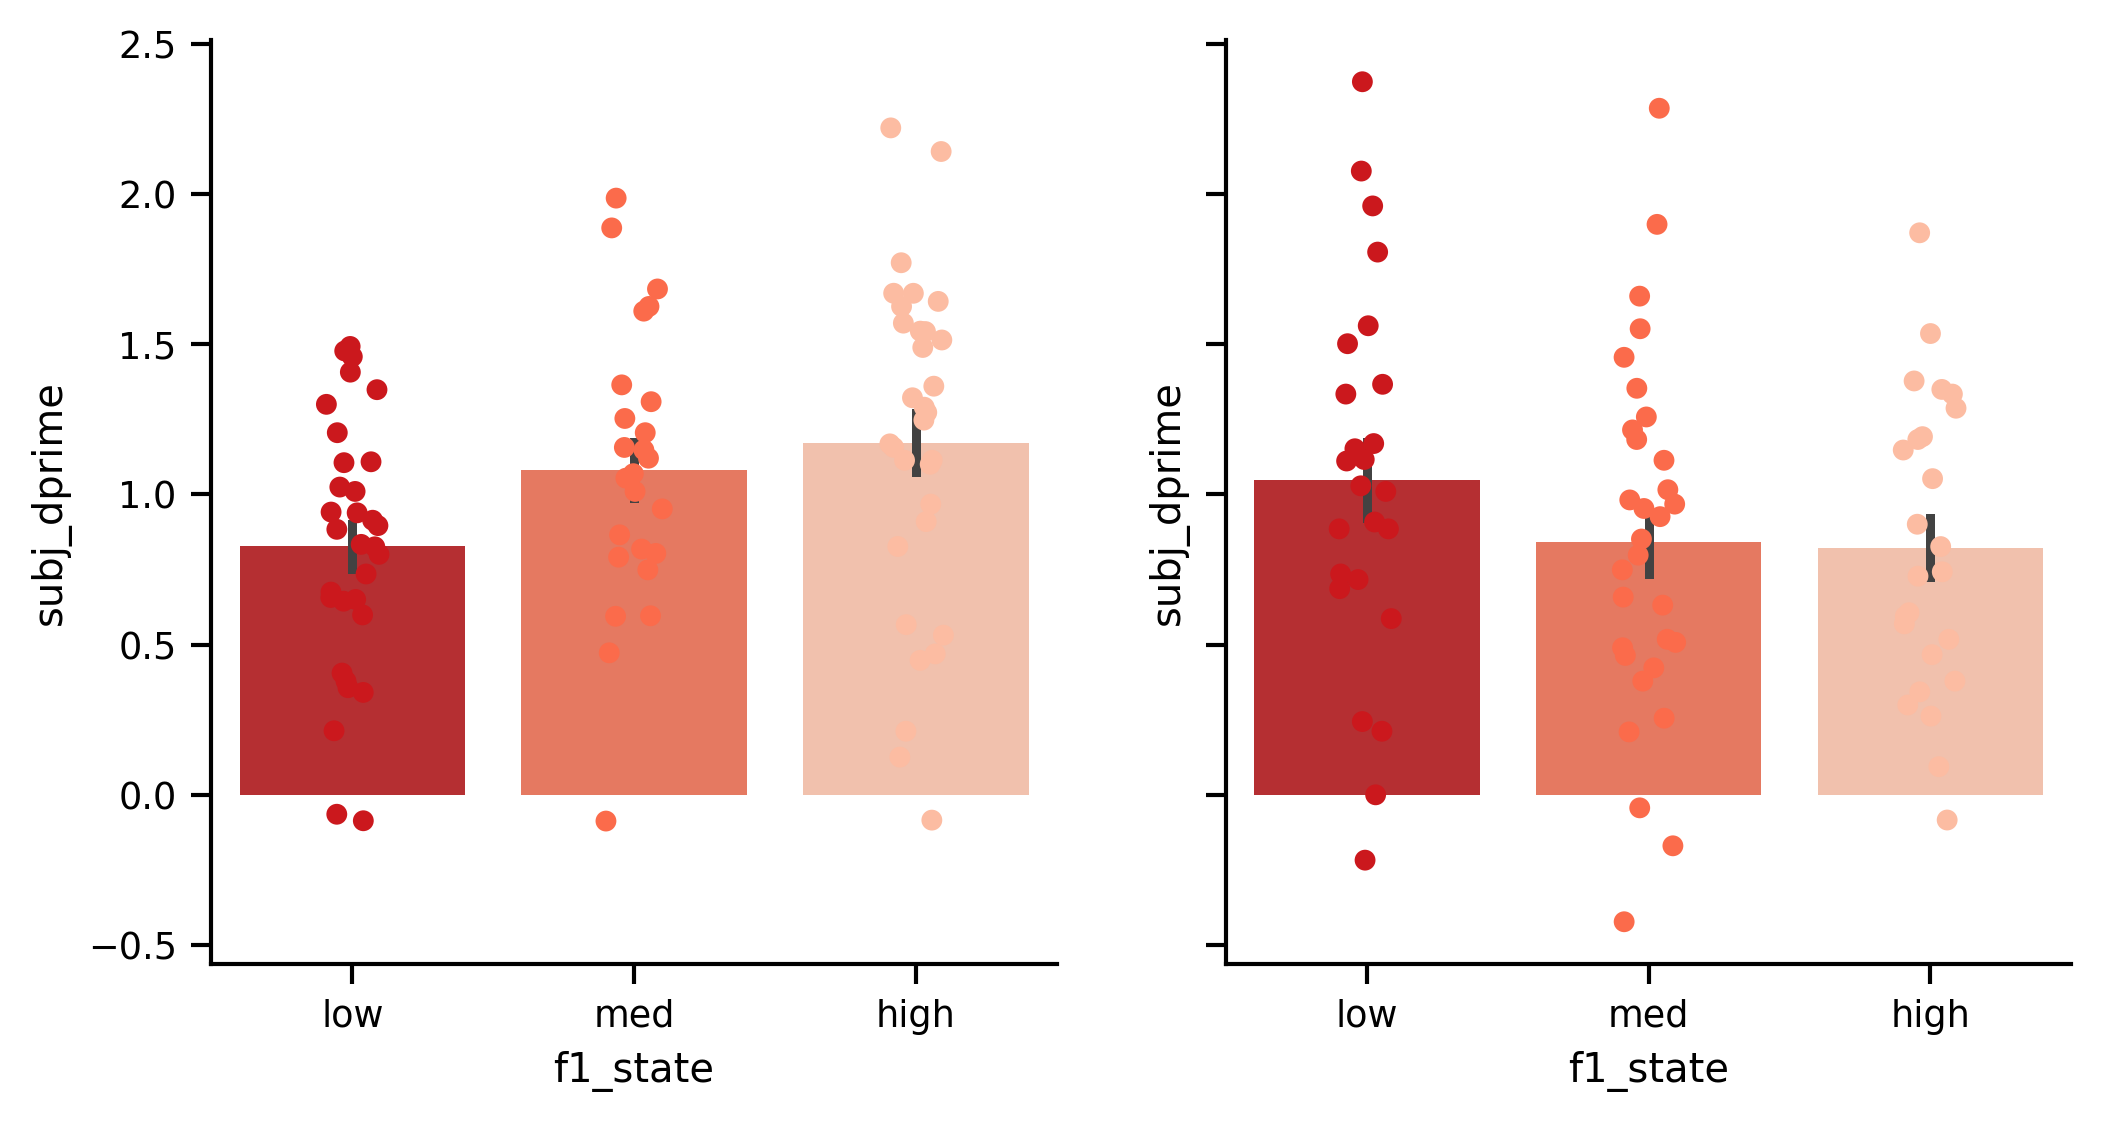

In [62]:
with PdfPages(f'{save_dir_plots}/Fig_LogRegress_WeightsvMemory_F1_bar.pdf') as pdf:
    f, ax = plt.subplots(1,2, dpi=300, figsize=(8,4), sharey=True)
    sns.barplot(data=model1_df_subj[model1_df_subj.zrpe_weight_mm>0], x='f1_state', y='subj_dprime', 
                errorbar='se', palette='Reds_r', ax=ax[0])
    sns.despine()
    sns.stripplot(data=model1_df_subj[model1_df_subj.zrpe_weight_mm>0], x='f1_state', y='subj_dprime', 
                  palette='Reds_r', ax=ax[0])

    sns.barplot(data=model1_df_subj[model1_df_subj.zrpe_weight_mm<=0], x='f1_state', y='subj_dprime', 
                errorbar='se', palette='Reds_r', ax=ax[1])
    sns.despine()
    sns.stripplot(data=model1_df_subj[model1_df_subj.zrpe_weight_mm<=0], x='f1_state', y='subj_dprime', 
                  palette='Reds_r', ax=ax[1])
    
    pdf.savefig()

Note: This doesn't work for the other factors!!

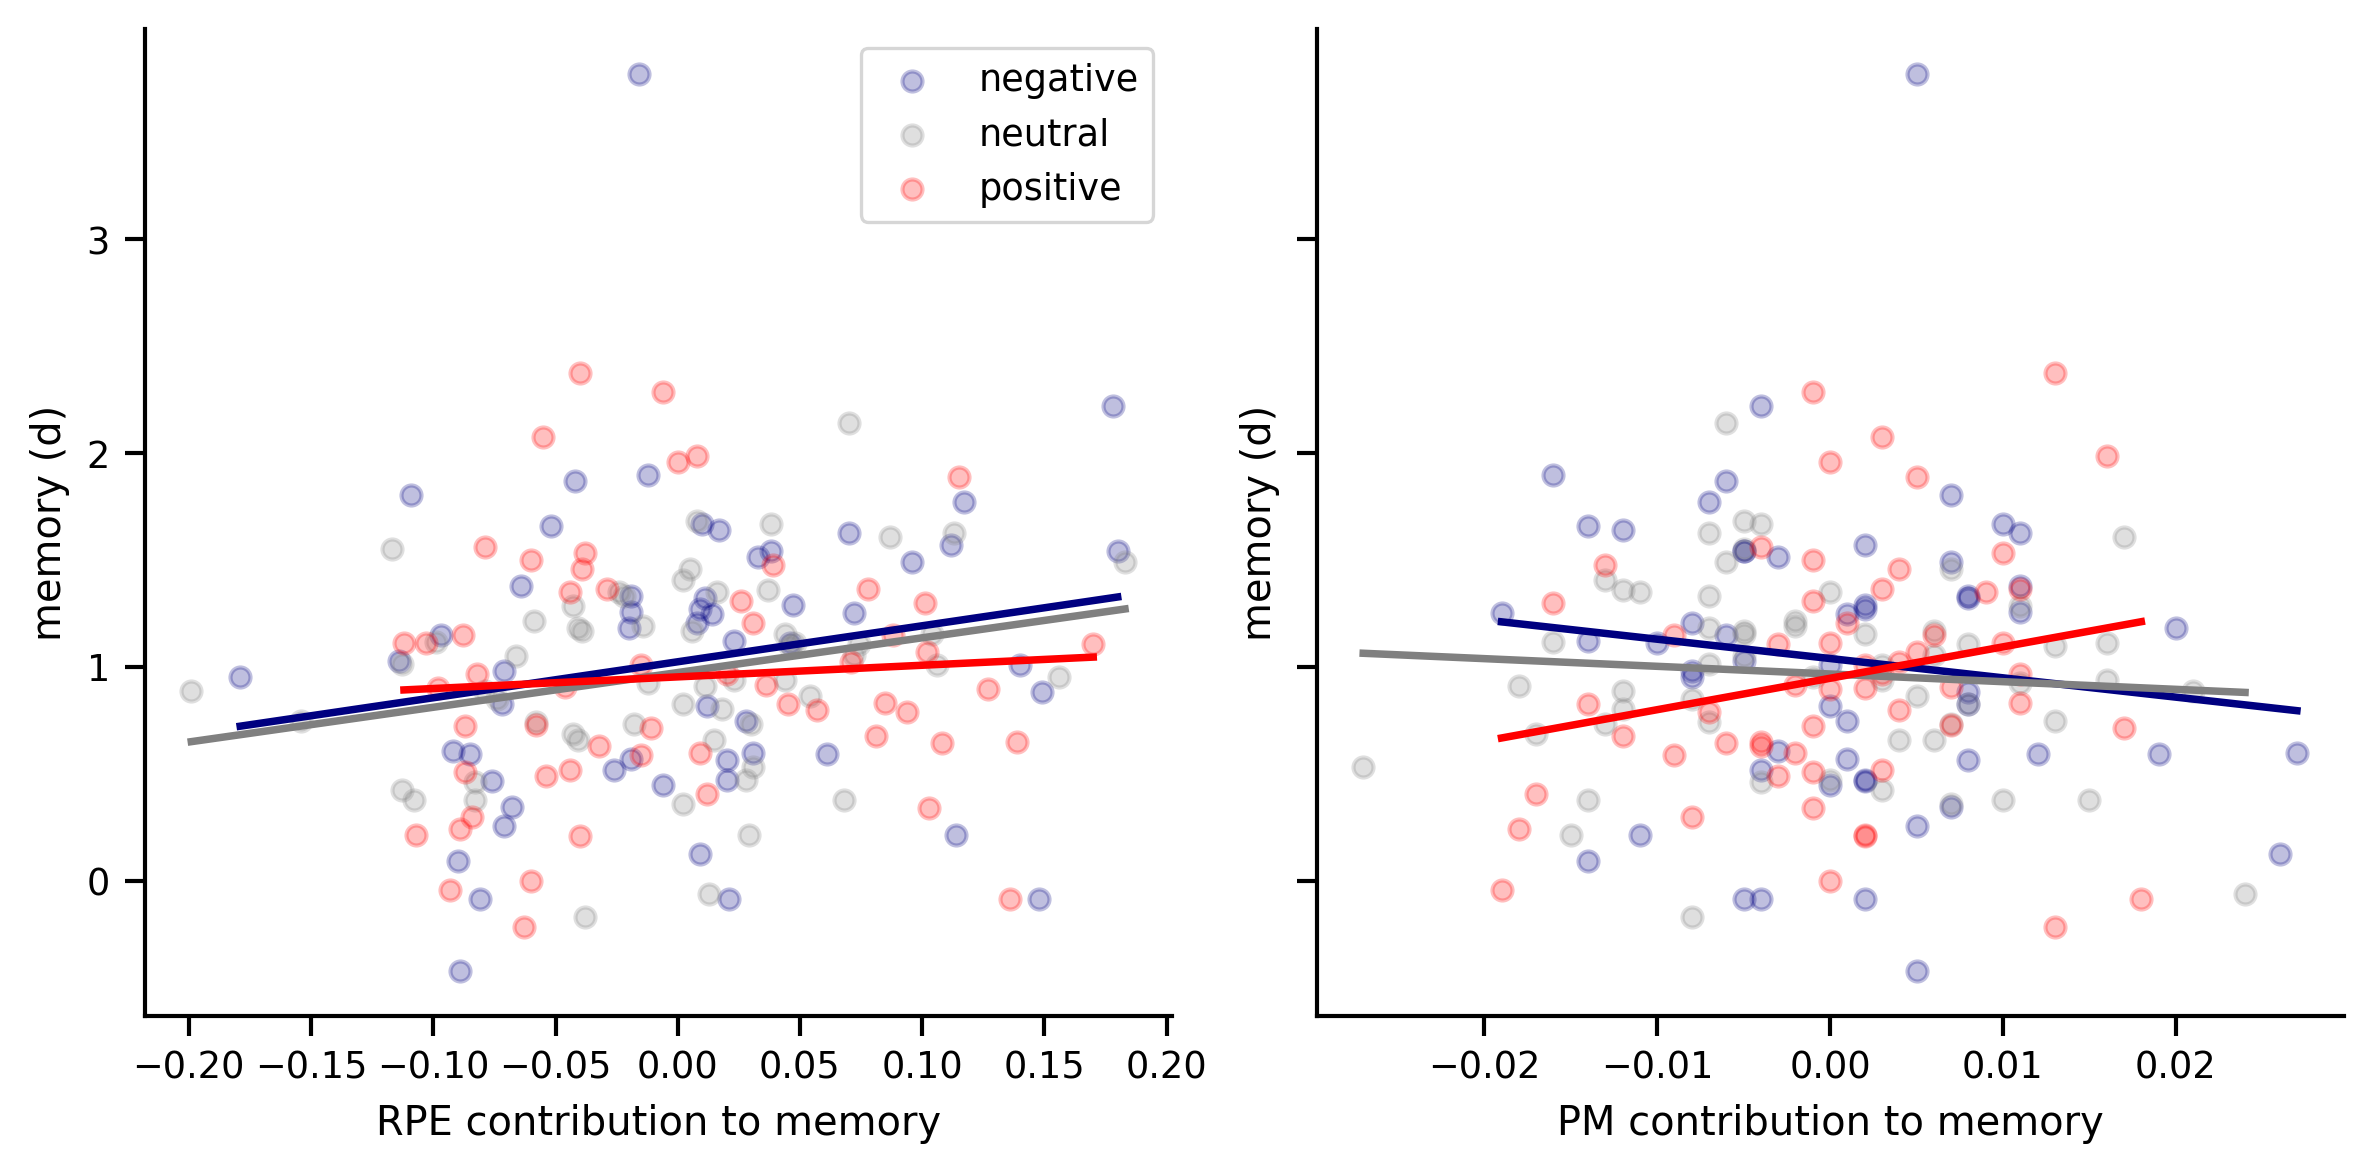

In [21]:
# sns.regplot(data=subj_mean_df, x='subj_dprime', y='aucs')
with PdfPages(f'{save_dir_plots}/Fig_LogRegress_WeightsvMemory_F2_Expanded.pdf') as pdf:    
    f, ax = plt.subplots(1,2, dpi=300, figsize=(8,4), sharey=True)
    sns.regplot(data=model1_df_subj[model1_df_subj.f2_state=='low'], x='zrpe_weight_mm', y='subj_dprime', label='negative',
                ci=None, ax=ax[0], scatter_kws={'alpha':0.25}, color='navy')
    sns.regplot(data=model1_df_subj[model1_df_subj.f2_state=='low'], x='zpm_weight_mm', y='subj_dprime', 
                ci=None, ax=ax[1], scatter_kws={'alpha':0.25}, color='navy')
    sns.regplot(data=model1_df_subj[model1_df_subj.f2_state=='med'], x='zrpe_weight_mm', y='subj_dprime', label='neutral',
                ci=None, ax=ax[0], scatter_kws={'alpha':0.25}, color='gray')
    sns.regplot(data=model1_df_subj[model1_df_subj.f2_state=='med'], x='zpm_weight_mm', y='subj_dprime', 
                ci=None, ax=ax[1], scatter_kws={'alpha':0.25}, color='gray')
    sns.regplot(data=model1_df_subj[model1_df_subj.f2_state=='high'], x='zrpe_weight_mm', y='subj_dprime', label='positive',
                ci=None, ax=ax[0], scatter_kws={'alpha':0.25}, color='red')
    sns.regplot(data=model1_df_subj[model1_df_subj.f2_state=='high'],` x='zpm_weight_mm', y='subj_dprime', 
                ci=None, ax=ax[1], scatter_kws={'alpha':0.25}, color='red')
    ax[0].set(xlabel = 'RPE contribution to memory', ylabel='memory (d)')
    ax[1].set(xlabel = 'PM contribution to memory', ylabel='memory (d)')
    ax[0].legend()
    sns.despine()
    f.tight_layout()
    pdf.savefig()

In [27]:
save_dir_plots

'/sc/arion/projects/guLab/Salman/MemoryBanditManuscript/Figures/Exp1'

In [567]:
f1_regress = smf.ols(formula='subj_dprime ~ f2_score*zpm_weight_mm', 
                     data=model1_df_subj).fit()
f1_regress.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            subj_dprime   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     2.214
Date:                Fri, 10 May 2024   Prob (F-statistic):             0.0884
Time:                        11:29:33   Log-Likelihood:                -145.58
No. Observations:                 170   AIC:                             299.2
Df Residuals:                     166   BIC:                             311.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.9896      0.044     22.325      0.000       0.902       1.077
f2_score                  -0.0334      0.045     -0.736      0.463      -0.123       0.056
zpm_weight_mm              1.4855      4.599      0.323      0.747      -7.594      10.565
f2_score:zpm_weight_mm    12.7915      5.185      2.467      0.015       2.554      23.029
==============================================================================
Omnibus:                       23.562   Durbin-Watson:                   2.242
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.262
Skew:                           0.538   Prob(JB):                     4.98e-14
Kurtosis:                       5.737   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
f1_regress = smf.ols(formula='subj_dprime ~ f2_score*zpm_weight_mm', 
                     data=model1_df_subj).fit()
f1_regress.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            subj_dprime   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     2.214
Date:                Wed, 10 Apr 2024   Prob (F-statistic):             0.0884
Time:                        01:22:51   Log-Likelihood:                -145.58
No. Observations:                 170   AIC:                             299.2
Df Residuals:                     166   BIC:                             311.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.9896      0.044     22.325      0.000       0.902       1.077
f2_score                  -0.0334      0.045     -0.736      0.463      -0.123       0.056
zpm_weight_mm              1.4855      4.599      0.323      0.747      -7.594      10.565
f2_score:zpm_weight_mm    12.7915      5.185      2.467      0.015       2.554      23.029
==============================================================================
Omnibus:                       23.562   Durbin-Watson:                   2.242
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.262
Skew:                           0.538   Prob(JB):                     4.98e-14
Kurtosis:                       5.737   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

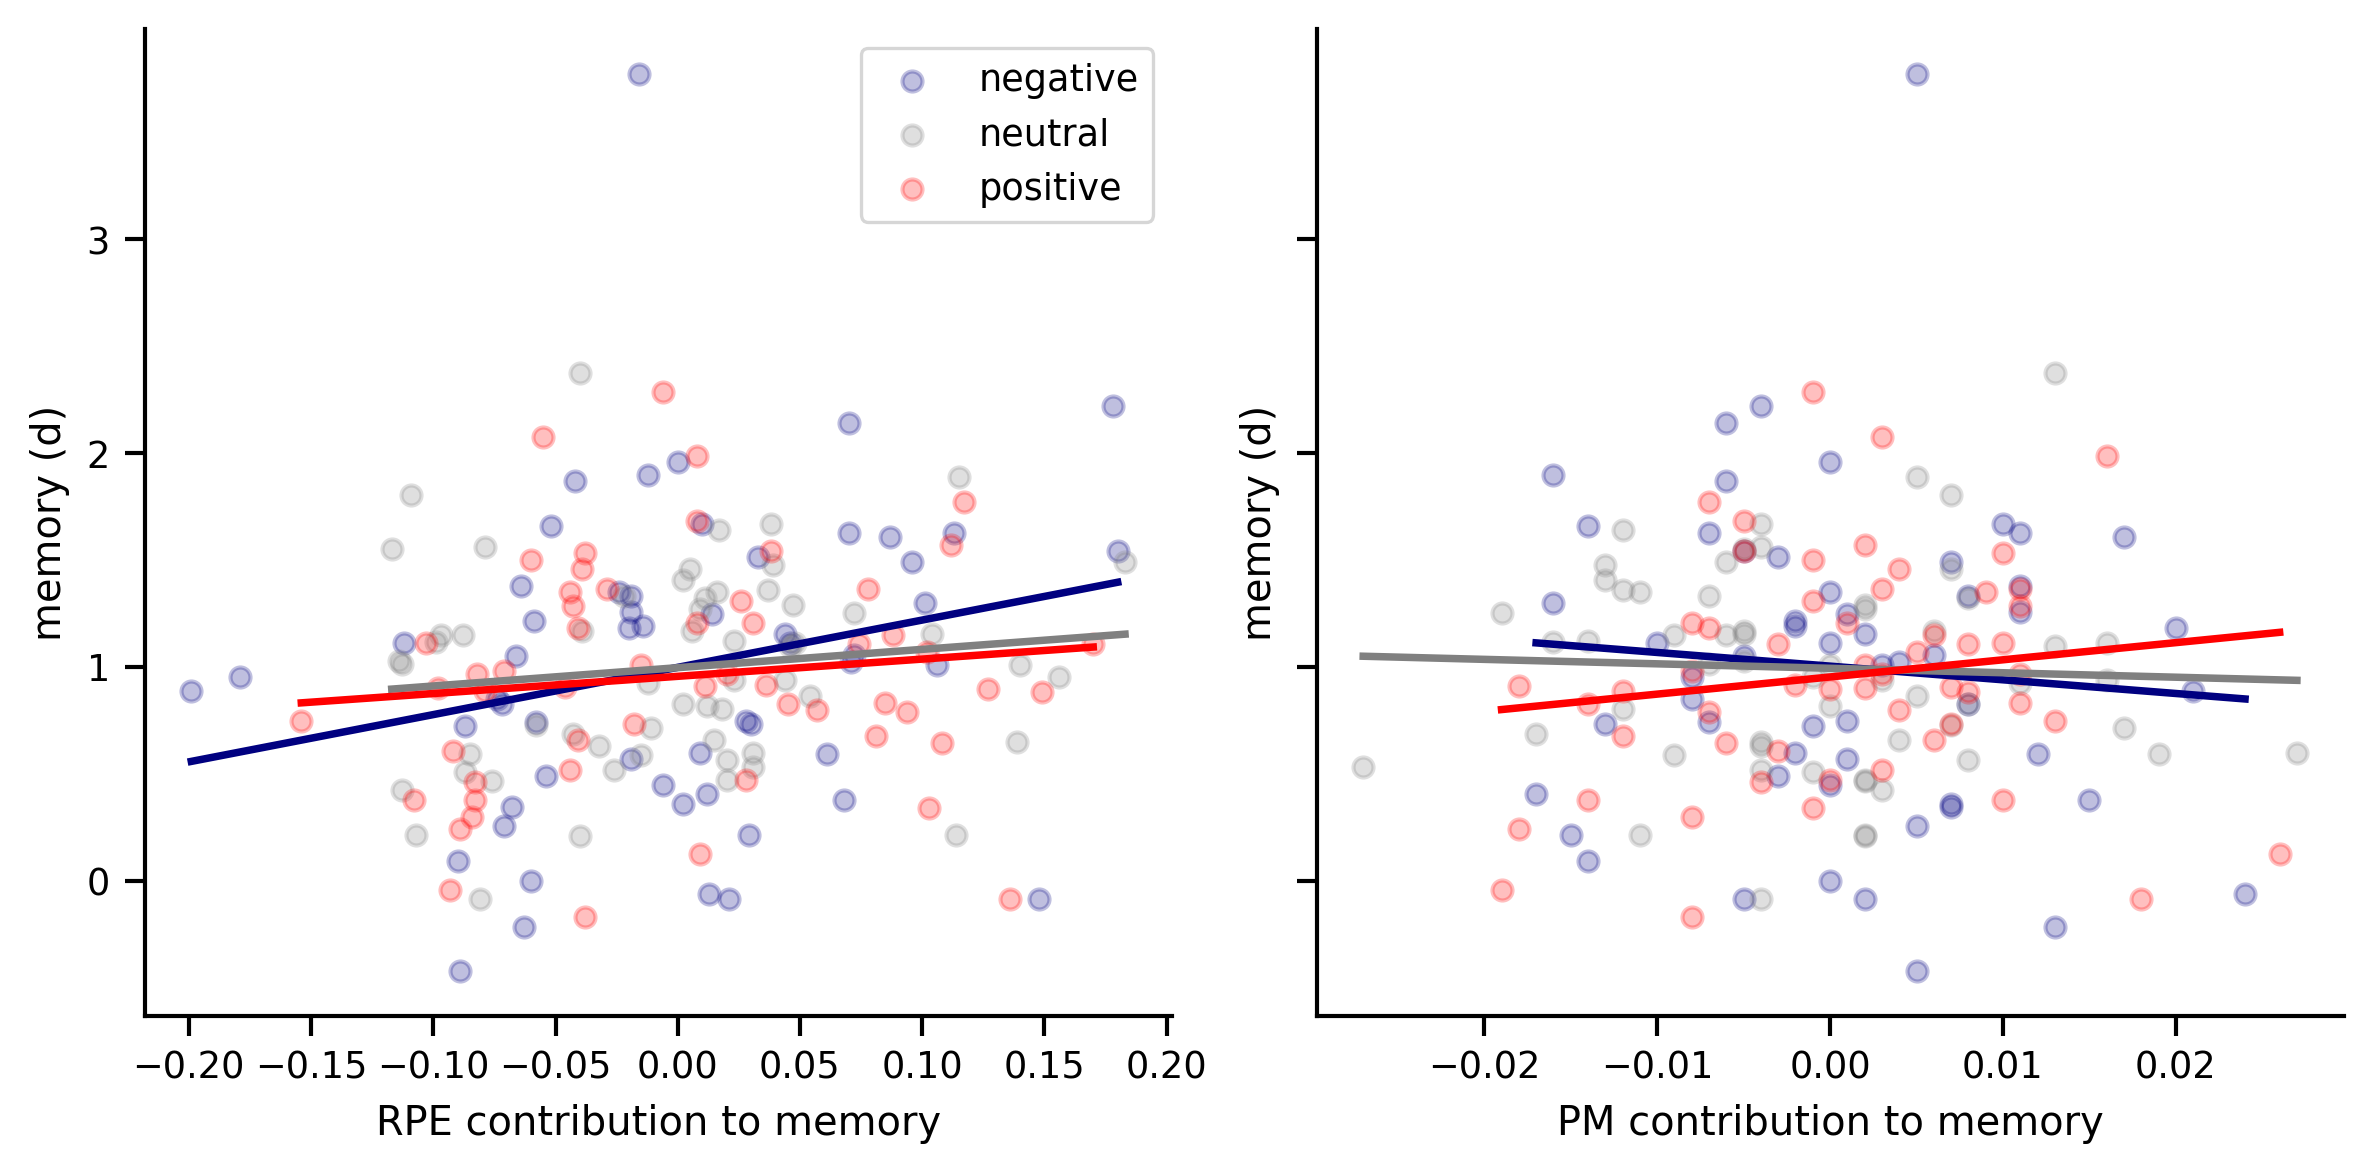

In [24]:
# sns.regplot(data=subj_mean_df, x='subj_dprime', y='aucs')
with PdfPages(f'{save_dir_plots}/Fig_LogRegress_WeightsvMemory_F3_Expanded.pdf') as pdf:    
    f, ax = plt.subplots(1,2, dpi=300, figsize=(8,4), sharey=True)
    sns.regplot(data=model1_df_subj[model1_df_subj.f3_state=='low'], x='zrpe_weight_mm', y='subj_dprime', label='negative',
                ci=None, ax=ax[0], scatter_kws={'alpha':0.25}, color='navy')
    sns.regplot(data=model1_df_subj[model1_df_subj.f3_state=='low'], x='zpm_weight_mm', y='subj_dprime', 
                ci=None, ax=ax[1], scatter_kws={'alpha':0.25}, color='navy')
    sns.regplot(data=model1_df_subj[model1_df_subj.f3_state=='med'], x='zrpe_weight_mm', y='subj_dprime', label='neutral',
                ci=None, ax=ax[0], scatter_kws={'alpha':0.25}, color='gray')
    sns.regplot(data=model1_df_subj[model1_df_subj.f3_state=='med'], x='zpm_weight_mm', y='subj_dprime', 
                ci=None, ax=ax[1], scatter_kws={'alpha':0.25}, color='gray')
    sns.regplot(data=model1_df_subj[model1_df_subj.f3_state=='high'], x='zrpe_weight_mm', y='subj_dprime', label='positive',
                ci=None, ax=ax[0], scatter_kws={'alpha':0.25}, color='red')
    sns.regplot(data=model1_df_subj[model1_df_subj.f3_state=='high'], x='zpm_weight_mm', y='subj_dprime', 
                ci=None, ax=ax[1], scatter_kws={'alpha':0.25}, color='red')
    ax[0].set(xlabel = 'RPE contribution to memory', ylabel='memory (d)')
    ax[1].set(xlabel = 'PM contribution to memory', ylabel='memory (d)')
    ax[0].legend()
    sns.despine()
    f.tight_layout()
    pdf.savefig()

In [25]:
f1_regress = smf.ols(formula='subj_dprime ~ f3_score*zrpe_weight_mm', 
                     data=model1_df_subj).fit()
f1_regress.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            subj_dprime   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     1.930
Date:                Wed, 10 Apr 2024   Prob (F-statistic):              0.127
Time:                        01:23:50   Log-Likelihood:                -146.00
No. Observations:                 170   AIC:                             300.0
Df Residuals:                     166   BIC:                             312.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.9854      0.044     22.194      0.000       0.898       1.073
f3_score                   -0.0317      0.046     -0.688      0.492      -0.123       0.059
zrpe_weight_mm              1.3132      0.583      2.253      0.026       0.162       2.464
f3_score:zrpe_weight_mm    -0.3362      0.613     -0.548      0.584      -1.547       0.875
==============================================================================
Omnibus:                       23.702   Durbin-Watson:                   2.181
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.590
Skew:                           0.589   Prob(JB):                     1.40e-12
Kurtosis:                       5.514   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
f1_regress = smf.ols(formula='subj_dprime ~ f3_score*zpm_weight_mm', 
                     data=model1_df_subj).fit()
f1_regress.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            subj_dprime   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.4791
Date:                Wed, 10 Apr 2024   Prob (F-statistic):              0.697
Time:                        01:23:59   Log-Likelihood:                -148.18
No. Observations:                 170   AIC:                             304.4
Df Residuals:                     166   BIC:                             316.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.9870      0.045     21.937      0.000       0.898       1.076
f3_score                  -0.0298      0.046     -0.642      0.522      -0.122       0.062
zpm_weight_mm             -0.4016      4.583     -0.088      0.930      -9.451       8.648
f3_score:zpm_weight_mm     5.0225      5.145      0.976      0.330      -5.136      15.181
==============================================================================
Omnibus:                       21.810   Durbin-Watson:                   2.219
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.414
Skew:                           0.567   Prob(JB):                     8.34e-11
Kurtosis:                       5.295   Cond. No.                         117.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""